# Kết nối Google Drive

In [46]:
# Kết nối Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [47]:
# Chỉ định thư mục làm việc hiện hành
import os
colab_dir = '/content/gdrive/My Drive/Colab Notebooks'
my_dir    = '/Machine Learning'
path      = colab_dir + my_dir

# Chuyển thư mục hiện hành
%cd $path 

/content/gdrive/My Drive/Colab Notebooks/Machine Learning


# **Câu 1: Crawl dữ liệu từ Tiki**

## **Cách 1: Crawl data Tiki bằng API và requests**

In [ ]:
import requests
import time
import random
import pandas as pd
from tqdm import tqdm

### ***crawl product id***

***Tiki cung cấp API giúp crawl dữ liệu từ trang web***

Cách lấy API:
- Vào trang danh mục sản phẩm cần crawl data (ở đây chọn "thời trang nữ), sau đó chuột phải chọn Inspect
- Chọn thẻ Network, chọn Fetch/XHR
- Chọn "listing?limit=40..." để lấy data product id
- Vào thẻ Headers để lấy thông tin headers (user-agent, x-guest-token,...))
- Vào thẻ Payload để lấy thông tin params (urlKey, category...)


In [ ]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
    'Accept': 'application/json, text/plain, */*',
    'Accept-Language': 'vi-VN,vi;q=0.9,en-US;q=0.8,en;q=0.7,ja-JP;q=0.6,ja;q=0.5,fr-FR;q=0.4,fr;q=0.3',
    'Referer': 'https://tiki.vn/thoi-trang-nu/c931',
    'x-guest-token': 'WRYQMdNGHBegZt9EkisAb0v38SKflCOa',
    'Connection': 'keep-alive',
    'TE': 'Trailers',
}

params = {
    'limit': '40', # mỗi page hiển thị tối đa 40 sp
    'include': 'advertisement',
    'aggregations': '2',
    'trackity_id': '3053cea0-02d4-bea1-47f4-6c78cddf1fb2',
    'category': '931',
    'page': '1',
    'src': 'c931',
    'urlKey':  'thoi-trang-nu', # danh mục sp "thời trang nữ"
}

product_id = []
for i in range(1, 51): # Quét 50 pages để lấy product id
                       # Có thể giảm xuống 2-5 pages để tiết kiệm th.gian
    params['page'] = i
    response = requests.get('https://tiki.vn/api/personalish/v1/blocks/listings', headers=headers, params=params)#, cookies=cookies)
    if response.status_code == 200: 
        print('request success!!!')
        for record in response.json().get('data'):
            product_id.append({'id': record.get('id')})
    time.sleep(random.randrange(1, 3))

df = pd.DataFrame(product_id)
df.to_csv('product_id_ncds.csv', index=False)

request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!
request success!!!


In [ ]:
df

,id
0,210445261
1,205989625
2,196152645
3,206026017
4,198792881
...,...
1995,183056741
1996,193092951
1997,80875173
1998,125777168


### ***crawl product data***

- Truy cập vào link của 1 sản phẩm bất kỳ trong danh mục sp "thời trang nữ" để lấy thông tin chi tiết của sản phẩm đó.
- Tạo vòng lặp làm tương tự làm với các sản phẩm khác bằng cách thay id theo danh danh sách product id đã crawl ở bước trên.
- Dùng time.sleep để tránh tốc độ requests quá nhanh bị trang web chặn lại

In [ ]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
    'Accept': 'application/json, text/plain, */*',
    'Accept-Language': 'vi-VN,vi;q=0.9,en-US;q=0.8,en;q=0.7,ja-JP;q=0.6,ja;q=0.5,fr-FR;q=0.4,fr;q=0.3',
    'Referer': 'https://tiki.vn/quan-tay-cong-so_q02-p10576055.html?itm_campaign=CTP_YPD_TKA_PLA_UNK_ALL_UNK_UNK_UNK_UNK_X.217383_Y.1799703_Z.3608209_CN.Product-Ads-06%2F02%2F2023&itm_medium=CPC&itm_source=tiki-ads&spid=10576061',
    'x-guest-token': 'WRYQMdNGHBegZt9EkisAb0v38SKflCOa',
    'Connection': 'keep-alive',
    'TE': 'Trailers',
}

params = (
    ('platform', 'web'),
    ('spid', 10576061) 
)

def parser_product(json):
    d = dict()
    d['id'] = json.get('id')
    d['sku'] = json.get('sku')
    d['name'] = json.get('name')
    d['short_description'] = json.get('short_description')
    d['price'] = json.get('price')
    d['list_price'] = json.get('list_price')
    d['discount'] = json.get('discount')
    d['discount_rate'] = json.get('discount_rate')
    d['review_count'] = json.get('review_count')
    d['stock_item_qty'] = json.get('stock_item').get('qty')
    d['stock_item_max_sale_qty'] = json.get('stock_item').get('max_sale_qty')
    d['product_name'] = json.get('meta_title')
    d['brand_id'] = json.get('brand').get('id')
    d['brand_name'] = json.get('brand').get('name')
    return d

df_id = pd.read_csv('product_id_ncds.csv')
p_ids = df_id.id.to_list()
print(p_ids)
result = []
for pid in tqdm(p_ids, total=len(p_ids)):
    response = requests.get('https://tiki.vn/api/v2/products/{}'.format(pid), headers=headers, params=params, cookies=cookies)
    if response.status_code == 200:
        print('Crawl data {} success !!!'.format(pid))
        result.append(parser_product(response.json()))
        time.sleep(random.randrange(1, 3))
df_product = pd.DataFrame(result)
df_product.to_csv('crawled_data_ncds.csv', index=False)

[210445261, 205989625, 196152645, 206026017, 198792881, 44248342, 74855108, 55578594, 7286351, 45600236, 58338964, 82700848, 193920267, 190461291, 208187119, 163710659, 216205538, 206205191, 193159964, 216199136, 82700818, 82914882, 155833290, 82700777, 88000356, 181404888, 197366597, 160796434, 170325367, 175551986, 70816541, 180347781, 198031338, 83757503, 115124758, 159498658, 183058686, 101094389, 58356166, 172427456, 210445261, 216205035, 83637256, 173191030, 202956779, 178062830, 147043717, 68091120, 204038208, 162350958, 132700179, 142994343, 201878743, 23290310, 82695200, 176439310, 196152645, 137903777, 172296304, 172693435, 155279613, 153470267, 68201195, 179534910, 106882856, 165106956, 75365191, 45347477, 84446029, 19415013, 73243081, 180590012, 143362784, 125400909, 95181024, 154249772, 151898685, 108365031, 174113214, 89479713, 216205195, 216199136, 172666766, 204443302, 32047144, 154135275, 57318339, 115832898, 136581729, 160753815, 146927979, 145990224, 90174963, 157827

  0%|          | 0/2000 [00:00<?, ?it/s]

Crawl data 210445261 success !!!


  0%|          | 1/2000 [00:01<42:59,  1.29s/it]

Crawl data 205989625 success !!!


  0%|          | 2/2000 [00:02<43:10,  1.30s/it]

Crawl data 196152645 success !!!


  0%|          | 3/2000 [00:03<43:30,  1.31s/it]

Crawl data 206026017 success !!!


  0%|          | 4/2000 [00:05<43:16,  1.30s/it]

Crawl data 198792881 success !!!


  0%|          | 5/2000 [00:06<43:09,  1.30s/it]

Crawl data 44248342 success !!!


  0%|          | 6/2000 [00:08<54:18,  1.63s/it]

Crawl data 74855108 success !!!


  0%|          | 7/2000 [00:11<1:01:37,  1.86s/it]

Crawl data 55578594 success !!!


  0%|          | 8/2000 [00:12<56:03,  1.69s/it]  

Crawl data 7286351 success !!!


  0%|          | 9/2000 [00:14<1:02:11,  1.87s/it]

Crawl data 45600236 success !!!


  0%|          | 10/2000 [00:16<1:06:26,  2.00s/it]

Crawl data 58338964 success !!!


  1%|          | 11/2000 [00:18<59:11,  1.79s/it]  

Crawl data 82700848 success !!!


  1%|          | 12/2000 [00:20<1:04:19,  1.94s/it]

Crawl data 193920267 success !!!


  1%|          | 13/2000 [00:22<1:08:23,  2.07s/it]

Crawl data 190461291 success !!!


  1%|          | 14/2000 [00:25<1:10:49,  2.14s/it]

Crawl data 208187119 success !!!


  1%|          | 15/2000 [00:27<1:12:28,  2.19s/it]

Crawl data 163710659 success !!!


  1%|          | 16/2000 [00:29<1:13:35,  2.23s/it]

Crawl data 216205538 success !!!


  1%|          | 17/2000 [00:31<1:04:23,  1.95s/it]

Crawl data 206205191 success !!!


  1%|          | 18/2000 [00:33<1:07:46,  2.05s/it]

Crawl data 193159964 success !!!


  1%|          | 19/2000 [00:34<1:00:12,  1.82s/it]

Crawl data 216199136 success !!!


  1%|          | 20/2000 [00:36<55:10,  1.67s/it]  

Crawl data 82700818 success !!!


  1%|          | 21/2000 [00:38<1:01:34,  1.87s/it]

Crawl data 82914882 success !!!


  1%|          | 22/2000 [00:40<1:05:34,  1.99s/it]

Crawl data 155833290 success !!!


  1%|          | 23/2000 [00:41<58:44,  1.78s/it]  

Crawl data 82700777 success !!!


  1%|          | 24/2000 [00:44<1:04:05,  1.95s/it]

Crawl data 88000356 success !!!


  1%|▏         | 25/2000 [00:46<1:07:27,  2.05s/it]

Crawl data 181404888 success !!!


  1%|▏         | 26/2000 [00:47<59:45,  1.82s/it]  

Crawl data 197366597 success !!!


  1%|▏         | 27/2000 [00:49<54:50,  1.67s/it]

Crawl data 160796434 success !!!


  1%|▏         | 28/2000 [00:50<51:23,  1.56s/it]

Crawl data 170325367 success !!!


  1%|▏         | 29/2000 [00:52<58:38,  1.78s/it]

Crawl data 175551986 success !!!


  2%|▏         | 30/2000 [00:55<1:03:34,  1.94s/it]

Crawl data 70816541 success !!!


  2%|▏         | 31/2000 [00:56<57:06,  1.74s/it]  

Crawl data 180347781 success !!!


  2%|▏         | 32/2000 [00:58<1:02:42,  1.91s/it]

Crawl data 198031338 success !!!


  2%|▏         | 33/2000 [00:59<56:44,  1.73s/it]  

Crawl data 83757503 success !!!


  2%|▏         | 34/2000 [01:01<52:33,  1.60s/it]

Crawl data 115124758 success !!!


  2%|▏         | 35/2000 [01:02<49:47,  1.52s/it]

Crawl data 159498658 success !!!


  2%|▏         | 36/2000 [01:04<57:18,  1.75s/it]

Crawl data 183058686 success !!!


  2%|▏         | 37/2000 [01:06<52:48,  1.61s/it]

Crawl data 101094389 success !!!


  2%|▏         | 38/2000 [01:07<50:55,  1.56s/it]

Crawl data 58356166 success !!!


  2%|▏         | 39/2000 [01:08<48:07,  1.47s/it]

Crawl data 172427456 success !!!


  2%|▏         | 40/2000 [01:11<56:03,  1.72s/it]

Crawl data 210445261 success !!!


  2%|▏         | 41/2000 [01:13<1:01:28,  1.88s/it]

Crawl data 216205035 success !!!


  2%|▏         | 42/2000 [01:15<1:05:35,  2.01s/it]

Crawl data 83637256 success !!!


  2%|▏         | 43/2000 [01:17<58:39,  1.80s/it]  

Crawl data 173191030 success !!!


  2%|▏         | 44/2000 [01:19<1:03:34,  1.95s/it]

Crawl data 202956779 success !!!


  2%|▏         | 45/2000 [01:21<1:07:10,  2.06s/it]

Crawl data 178062830 success !!!


  2%|▏         | 46/2000 [01:23<59:44,  1.83s/it]  

Crawl data 147043717 success !!!


  2%|▏         | 47/2000 [01:24<54:18,  1.67s/it]

Crawl data 68091120 success !!!


  2%|▏         | 48/2000 [01:25<50:31,  1.55s/it]

Crawl data 204038208 success !!!


  2%|▏         | 49/2000 [01:26<48:08,  1.48s/it]

Crawl data 162350958 success !!!


  2%|▎         | 50/2000 [01:28<47:02,  1.45s/it]

Crawl data 132700179 success !!!


  3%|▎         | 51/2000 [01:29<45:17,  1.39s/it]

Crawl data 142994343 success !!!


  3%|▎         | 52/2000 [01:30<44:11,  1.36s/it]

Crawl data 201878743 success !!!


  3%|▎         | 53/2000 [01:32<43:32,  1.34s/it]

Crawl data 23290310 success !!!


  3%|▎         | 54/2000 [01:34<52:46,  1.63s/it]

Crawl data 82695200 success !!!


  3%|▎         | 55/2000 [01:36<59:16,  1.83s/it]

Crawl data 176439310 success !!!


  3%|▎         | 56/2000 [01:38<54:10,  1.67s/it]

Crawl data 196152645 success !!!


  3%|▎         | 57/2000 [01:39<50:28,  1.56s/it]

Crawl data 137903777 success !!!


  3%|▎         | 58/2000 [01:41<57:38,  1.78s/it]

Crawl data 172296304 success !!!


  3%|▎         | 59/2000 [01:43<1:02:52,  1.94s/it]

Crawl data 172693435 success !!!


  3%|▎         | 60/2000 [01:46<1:06:08,  2.05s/it]

Crawl data 155279613 success !!!


  3%|▎         | 61/2000 [01:48<1:08:39,  2.12s/it]

Crawl data 153470267 success !!!


  3%|▎         | 62/2000 [01:49<1:00:23,  1.87s/it]

Crawl data 68201195 success !!!


  3%|▎         | 63/2000 [01:52<1:04:40,  2.00s/it]

Crawl data 179534910 success !!!


  3%|▎         | 64/2000 [01:53<57:50,  1.79s/it]  

Crawl data 106882856 success !!!


  3%|▎         | 65/2000 [01:54<53:03,  1.65s/it]

Crawl data 165106956 success !!!


  3%|▎         | 66/2000 [01:55<49:29,  1.54s/it]

Crawl data 75365191 success !!!


  3%|▎         | 67/2000 [01:58<56:59,  1.77s/it]

Crawl data 45347477 success !!!


  3%|▎         | 68/2000 [02:00<1:02:05,  1.93s/it]

Crawl data 84446029 success !!!


  3%|▎         | 69/2000 [02:02<1:05:40,  2.04s/it]

Crawl data 19415013 success !!!


  4%|▎         | 70/2000 [02:05<1:08:20,  2.12s/it]

Crawl data 73243081 success !!!


  4%|▎         | 71/2000 [02:08<1:16:19,  2.37s/it]

Crawl data 180590012 success !!!


  4%|▎         | 72/2000 [02:10<1:15:46,  2.36s/it]

Crawl data 143362784 success !!!


  4%|▎         | 73/2000 [02:12<1:15:17,  2.34s/it]

Crawl data 125400909 success !!!


  4%|▎         | 74/2000 [02:15<1:14:40,  2.33s/it]

Crawl data 95181024 success !!!


  4%|▍         | 75/2000 [02:16<1:04:33,  2.01s/it]

Crawl data 154249772 success !!!


  4%|▍         | 76/2000 [02:17<58:05,  1.81s/it]  

Crawl data 151898685 success !!!


  4%|▍         | 77/2000 [02:20<1:02:47,  1.96s/it]

Crawl data 108365031 success !!!


  4%|▍         | 78/2000 [02:22<1:06:06,  2.06s/it]

Crawl data 174113214 success !!!


  4%|▍         | 79/2000 [02:23<58:39,  1.83s/it]  

Crawl data 89479713 success !!!


  4%|▍         | 80/2000 [02:25<1:03:11,  1.97s/it]

Crawl data 216205195 success !!!


  4%|▍         | 81/2000 [02:27<56:34,  1.77s/it]  

Crawl data 216199136 success !!!


  4%|▍         | 82/2000 [02:29<1:01:41,  1.93s/it]

Crawl data 172666766 success !!!


  4%|▍         | 83/2000 [02:30<55:44,  1.74s/it]  

Crawl data 204443302 success !!!


  4%|▍         | 84/2000 [02:33<1:01:09,  1.92s/it]

Crawl data 32047144 success !!!


  4%|▍         | 85/2000 [02:36<1:10:52,  2.22s/it]

Crawl data 154135275 success !!!


  4%|▍         | 86/2000 [02:38<1:08:07,  2.14s/it]

Crawl data 57318339 success !!!


  4%|▍         | 87/2000 [02:39<1:00:09,  1.89s/it]

Crawl data 115832898 success !!!


  4%|▍         | 88/2000 [02:40<54:25,  1.71s/it]  

Crawl data 136581729 success !!!


  4%|▍         | 89/2000 [02:41<50:26,  1.58s/it]

Crawl data 160753815 success !!!


  4%|▍         | 90/2000 [02:44<57:37,  1.81s/it]

Crawl data 146927979 success !!!


  5%|▍         | 91/2000 [02:46<58:35,  1.84s/it]

Crawl data 145990224 success !!!


  5%|▍         | 92/2000 [02:48<1:02:48,  1.97s/it]

Crawl data 90174963 success !!!


  5%|▍         | 93/2000 [02:50<1:05:42,  2.07s/it]

Crawl data 157827091 success !!!


  5%|▍         | 94/2000 [02:52<58:20,  1.84s/it]  

Crawl data 55060248 success !!!


  5%|▍         | 95/2000 [02:54<1:02:35,  1.97s/it]

Crawl data 67863150 success !!!


  5%|▍         | 96/2000 [02:56<1:05:52,  2.08s/it]

Crawl data 171929698 success !!!


  5%|▍         | 97/2000 [02:58<1:07:51,  2.14s/it]

Crawl data 72016777 success !!!


  5%|▍         | 98/2000 [03:00<59:49,  1.89s/it]  

Crawl data 205495680 success !!!


  5%|▍         | 99/2000 [03:02<1:03:59,  2.02s/it]

Crawl data 72298386 success !!!


  5%|▌         | 100/2000 [03:04<1:06:34,  2.10s/it]

Crawl data 97676376 success !!!


  5%|▌         | 101/2000 [03:07<1:08:25,  2.16s/it]

Crawl data 167968916 success !!!


  5%|▌         | 102/2000 [03:08<1:00:04,  1.90s/it]

Crawl data 188554146 success !!!


  5%|▌         | 103/2000 [03:10<1:03:50,  2.02s/it]

Crawl data 75661630 success !!!


  5%|▌         | 104/2000 [03:13<1:06:17,  2.10s/it]

Crawl data 204754548 success !!!


  5%|▌         | 105/2000 [03:14<58:58,  1.87s/it]  

Crawl data 127377927 success !!!


  5%|▌         | 106/2000 [03:15<53:48,  1.70s/it]

Crawl data 146632962 success !!!


  5%|▌         | 107/2000 [03:16<50:08,  1.59s/it]

Crawl data 190505746 success !!!


  5%|▌         | 108/2000 [03:18<47:38,  1.51s/it]

Crawl data 168903940 success !!!


  5%|▌         | 109/2000 [03:20<55:09,  1.75s/it]

Crawl data 102049282 success !!!


  6%|▌         | 110/2000 [03:21<50:58,  1.62s/it]

Crawl data 43816670 success !!!


  6%|▌         | 111/2000 [03:23<48:30,  1.54s/it]

Crawl data 55023823 success !!!


  6%|▌         | 112/2000 [03:24<46:15,  1.47s/it]

Crawl data 196827767 success !!!


  6%|▌         | 113/2000 [03:26<50:27,  1.60s/it]

Crawl data 161955257 success !!!


  6%|▌         | 114/2000 [03:27<47:26,  1.51s/it]

Crawl data 165602384 success !!!


  6%|▌         | 115/2000 [03:29<45:20,  1.44s/it]

Crawl data 93372828 success !!!


  6%|▌         | 116/2000 [03:30<44:21,  1.41s/it]

Crawl data 124240293 success !!!


  6%|▌         | 117/2000 [03:32<52:36,  1.68s/it]

Crawl data 85010533 success !!!


  6%|▌         | 118/2000 [03:35<59:23,  1.89s/it]

Crawl data 194133665 success !!!


  6%|▌         | 119/2000 [03:36<53:56,  1.72s/it]

Crawl data 103388378 success !!!


  6%|▌         | 120/2000 [03:37<50:01,  1.60s/it]

Crawl data 173015547 success !!!


  6%|▌         | 121/2000 [03:40<56:52,  1.82s/it]

Crawl data 59378641 success !!!


  6%|▌         | 122/2000 [03:41<52:02,  1.66s/it]

Crawl data 111694609 success !!!


  6%|▌         | 123/2000 [03:42<48:33,  1.55s/it]

Crawl data 121258680 success !!!


  6%|▌         | 124/2000 [03:43<46:01,  1.47s/it]

Crawl data 36061260 success !!!


  6%|▋         | 125/2000 [03:45<44:37,  1.43s/it]

Crawl data 163710659 success !!!


  6%|▋         | 126/2000 [03:47<53:01,  1.70s/it]

Crawl data 95877962 success !!!


  6%|▋         | 127/2000 [03:49<58:58,  1.89s/it]

Crawl data 162132681 success !!!


  6%|▋         | 128/2000 [03:52<1:02:46,  2.01s/it]

Crawl data 82917876 success !!!


  6%|▋         | 129/2000 [03:54<1:05:31,  2.10s/it]

Crawl data 110104976 success !!!


  6%|▋         | 130/2000 [03:55<59:00,  1.89s/it]  

Crawl data 167957548 success !!!


  7%|▋         | 131/2000 [03:58<1:02:34,  2.01s/it]

Crawl data 203883094 success !!!


  7%|▋         | 132/2000 [04:00<1:05:28,  2.10s/it]

Crawl data 177320879 success !!!


  7%|▋         | 133/2000 [04:02<1:07:12,  2.16s/it]

Crawl data 97758054 success !!!


  7%|▋         | 134/2000 [04:04<59:20,  1.91s/it]  

Crawl data 97732361 success !!!


  7%|▋         | 135/2000 [04:05<53:22,  1.72s/it]

Crawl data 54976434 success !!!


  7%|▋         | 136/2000 [04:06<49:16,  1.59s/it]

Crawl data 106765137 success !!!


  7%|▋         | 137/2000 [04:08<46:39,  1.50s/it]

Crawl data 146241077 success !!!


  7%|▋         | 138/2000 [04:10<53:56,  1.74s/it]

Crawl data 150956806 success !!!


  7%|▋         | 139/2000 [04:11<49:50,  1.61s/it]

Crawl data 150311109 success !!!


  7%|▋         | 140/2000 [04:13<56:39,  1.83s/it]

Crawl data 79606998 success !!!


  7%|▋         | 141/2000 [04:15<51:35,  1.67s/it]

Crawl data 205739358 success !!!


  7%|▋         | 142/2000 [04:16<48:00,  1.55s/it]

Crawl data 178725046 success !!!


  7%|▋         | 143/2000 [04:18<55:09,  1.78s/it]

Crawl data 141126132 success !!!


  7%|▋         | 144/2000 [04:20<50:31,  1.63s/it]

Crawl data 112658777 success !!!


  7%|▋         | 145/2000 [04:22<56:38,  1.83s/it]

Crawl data 37833320 success !!!


  7%|▋         | 146/2000 [04:24<1:01:00,  1.97s/it]

Crawl data 172998034 success !!!


  7%|▋         | 147/2000 [04:26<55:29,  1.80s/it]  

Crawl data 172926829 success !!!


  7%|▋         | 148/2000 [04:28<1:00:09,  1.95s/it]

Crawl data 7189977 success !!!


  7%|▋         | 149/2000 [04:30<1:03:32,  2.06s/it]

Crawl data 83907537 success !!!


  8%|▊         | 150/2000 [04:33<1:05:52,  2.14s/it]

Crawl data 188134497 success !!!


  8%|▊         | 151/2000 [04:35<1:07:21,  2.19s/it]

Crawl data 55096570 success !!!


  8%|▊         | 152/2000 [04:36<59:00,  1.92s/it]  

Crawl data 82905115 success !!!


  8%|▊         | 153/2000 [04:37<53:21,  1.73s/it]

Crawl data 196718744 success !!!


  8%|▊         | 154/2000 [04:39<49:24,  1.61s/it]

Crawl data 164253104 success !!!


  8%|▊         | 155/2000 [04:41<55:46,  1.81s/it]

Crawl data 32076990 success !!!


  8%|▊         | 156/2000 [04:42<51:09,  1.66s/it]

Crawl data 197650194 success !!!


  8%|▊         | 157/2000 [04:44<47:56,  1.56s/it]

Crawl data 199044236 success !!!


  8%|▊         | 158/2000 [04:46<54:53,  1.79s/it]

Crawl data 129427556 success !!!


  8%|▊         | 159/2000 [04:47<50:38,  1.65s/it]

Crawl data 185884763 success !!!


  8%|▊         | 160/2000 [04:49<47:22,  1.54s/it]

Crawl data 95181333 success !!!


  8%|▊         | 161/2000 [04:51<54:19,  1.77s/it]

Crawl data 183588024 success !!!


  8%|▊         | 162/2000 [04:52<50:02,  1.63s/it]

Crawl data 74844904 success !!!


  8%|▊         | 163/2000 [04:54<46:46,  1.53s/it]

Crawl data 165193110 success !!!


  8%|▊         | 164/2000 [04:56<54:06,  1.77s/it]

Crawl data 172072606 success !!!


  8%|▊         | 165/2000 [04:57<49:49,  1.63s/it]

Crawl data 101279091 success !!!


  8%|▊         | 166/2000 [04:59<55:52,  1.83s/it]

Crawl data 72030136 success !!!


  8%|▊         | 167/2000 [05:02<1:00:16,  1.97s/it]

Crawl data 108431580 success !!!


  8%|▊         | 168/2000 [05:04<1:03:09,  2.07s/it]

Crawl data 152163246 success !!!


  8%|▊         | 169/2000 [05:07<1:10:48,  2.32s/it]

Crawl data 192710205 success !!!


  8%|▊         | 170/2000 [05:08<1:01:23,  2.01s/it]

Crawl data 112193938 success !!!


  9%|▊         | 171/2000 [05:10<54:52,  1.80s/it]  

Crawl data 184777456 success !!!


  9%|▊         | 172/2000 [05:11<50:41,  1.66s/it]

Crawl data 179372130 success !!!


  9%|▊         | 173/2000 [05:12<47:27,  1.56s/it]

Crawl data 38898641 success !!!


  9%|▊         | 174/2000 [05:15<54:28,  1.79s/it]

Crawl data 195515821 success !!!


  9%|▉         | 175/2000 [05:17<59:11,  1.95s/it]

Crawl data 77923382 success !!!


  9%|▉         | 176/2000 [05:19<1:02:34,  2.06s/it]

Crawl data 96990192 success !!!


  9%|▉         | 177/2000 [05:22<1:04:45,  2.13s/it]

Crawl data 152374845 success !!!


  9%|▉         | 178/2000 [05:24<1:06:18,  2.18s/it]

Crawl data 92019136 success !!!


  9%|▉         | 179/2000 [05:26<1:07:22,  2.22s/it]

Crawl data 125802234 success !!!


  9%|▉         | 180/2000 [05:28<1:08:01,  2.24s/it]

Crawl data 154897502 success !!!


  9%|▉         | 181/2000 [05:31<1:08:42,  2.27s/it]

Crawl data 176054422 success !!!


  9%|▉         | 182/2000 [05:32<1:00:56,  2.01s/it]

Crawl data 141955316 success !!!


  9%|▉         | 183/2000 [05:34<1:03:31,  2.10s/it]

Crawl data 114617603 success !!!


  9%|▉         | 184/2000 [05:36<56:17,  1.86s/it]  

Crawl data 109137583 success !!!


  9%|▉         | 185/2000 [05:37<51:04,  1.69s/it]

Crawl data 98555458 success !!!


  9%|▉         | 186/2000 [05:38<47:27,  1.57s/it]

Crawl data 95940103 success !!!


  9%|▉         | 187/2000 [05:40<45:22,  1.50s/it]

Crawl data 23618307 success !!!


  9%|▉         | 188/2000 [05:41<43:35,  1.44s/it]

Crawl data 176050171 success !!!


  9%|▉         | 189/2000 [05:43<51:48,  1.72s/it]

Crawl data 9982241 success !!!


 10%|▉         | 190/2000 [05:46<57:19,  1.90s/it]

Crawl data 183540185 success !!!


 10%|▉         | 191/2000 [05:47<51:40,  1.71s/it]

Crawl data 105085800 success !!!


 10%|▉         | 192/2000 [05:48<48:07,  1.60s/it]

Crawl data 179520697 success !!!


 10%|▉         | 193/2000 [05:50<45:33,  1.51s/it]

Crawl data 173864989 success !!!


 10%|▉         | 194/2000 [05:52<52:46,  1.75s/it]

Crawl data 39159456 success !!!


 10%|▉         | 195/2000 [05:53<48:26,  1.61s/it]

Crawl data 138143391 success !!!


 10%|▉         | 196/2000 [05:55<54:39,  1.82s/it]

Crawl data 176021615 success !!!


 10%|▉         | 197/2000 [05:57<49:51,  1.66s/it]

Crawl data 114794875 success !!!


 10%|▉         | 198/2000 [05:58<46:48,  1.56s/it]

Crawl data 193859399 success !!!


 10%|▉         | 199/2000 [06:00<50:01,  1.67s/it]

Crawl data 196999667 success !!!


 10%|█         | 200/2000 [06:01<46:52,  1.56s/it]

Crawl data 167430064 success !!!


 10%|█         | 201/2000 [06:03<44:37,  1.49s/it]

Crawl data 206907803 success !!!


 10%|█         | 202/2000 [06:04<43:02,  1.44s/it]

Crawl data 47117757 success !!!


 10%|█         | 203/2000 [06:05<41:55,  1.40s/it]

Crawl data 133013278 success !!!


 10%|█         | 204/2000 [06:08<50:09,  1.68s/it]

Crawl data 55279177 success !!!


 10%|█         | 205/2000 [06:10<56:30,  1.89s/it]

Crawl data 170828094 success !!!


 10%|█         | 206/2000 [06:11<51:19,  1.72s/it]

Crawl data 162526714 success !!!


 10%|█         | 207/2000 [06:13<47:45,  1.60s/it]

Crawl data 127226679 success !!!


 10%|█         | 208/2000 [06:14<45:15,  1.52s/it]

Crawl data 147452552 success !!!


 10%|█         | 209/2000 [06:15<43:43,  1.46s/it]

Crawl data 177767384 success !!!


 10%|█         | 210/2000 [06:18<51:26,  1.72s/it]

Crawl data 182100666 success !!!


 11%|█         | 211/2000 [06:20<56:32,  1.90s/it]

Crawl data 204278210 success !!!


 11%|█         | 212/2000 [06:21<51:14,  1.72s/it]

Crawl data 143784273 success !!!


 11%|█         | 213/2000 [06:23<47:20,  1.59s/it]

Crawl data 102563434 success !!!


 11%|█         | 214/2000 [06:24<44:55,  1.51s/it]

Crawl data 76406687 success !!!


 11%|█         | 215/2000 [06:26<51:56,  1.75s/it]

Crawl data 200715637 success !!!


 11%|█         | 216/2000 [06:27<48:08,  1.62s/it]

Crawl data 168581214 success !!!


 11%|█         | 217/2000 [06:30<54:43,  1.84s/it]

Crawl data 197008854 success !!!


 11%|█         | 218/2000 [06:32<59:01,  1.99s/it]

Crawl data 143112354 success !!!


 11%|█         | 219/2000 [06:33<53:00,  1.79s/it]

Crawl data 172110981 success !!!


 11%|█         | 220/2000 [06:35<49:01,  1.65s/it]

Crawl data 157054985 success !!!


 11%|█         | 221/2000 [06:36<45:43,  1.54s/it]

Crawl data 123227918 success !!!


 11%|█         | 222/2000 [06:37<43:50,  1.48s/it]

Crawl data 154720259 success !!!


 11%|█         | 223/2000 [06:39<42:16,  1.43s/it]

Crawl data 109692870 success !!!


 11%|█         | 224/2000 [06:41<50:01,  1.69s/it]

Crawl data 77118687 success !!!


 11%|█▏        | 225/2000 [06:42<46:21,  1.57s/it]

Crawl data 29272015 success !!!


 11%|█▏        | 226/2000 [06:44<43:53,  1.48s/it]

Crawl data 77125481 success !!!


 11%|█▏        | 227/2000 [06:46<51:14,  1.73s/it]

Crawl data 197354745 success !!!


 11%|█▏        | 228/2000 [06:47<47:49,  1.62s/it]

Crawl data 198865421 success !!!


 11%|█▏        | 229/2000 [06:49<45:12,  1.53s/it]

Crawl data 152018446 success !!!


 12%|█▏        | 230/2000 [06:51<52:00,  1.76s/it]

Crawl data 144752353 success !!!


 12%|█▏        | 231/2000 [06:52<48:14,  1.64s/it]

Crawl data 169777215 success !!!


 12%|█▏        | 232/2000 [06:55<54:04,  1.84s/it]

Crawl data 117732205 success !!!


 12%|█▏        | 233/2000 [06:56<49:19,  1.67s/it]

Crawl data 194787464 success !!!


 12%|█▏        | 234/2000 [06:57<46:11,  1.57s/it]

Crawl data 150312179 success !!!


 12%|█▏        | 235/2000 [07:00<53:00,  1.80s/it]

Crawl data 76778992 success !!!


 12%|█▏        | 236/2000 [07:02<57:14,  1.95s/it]

Crawl data 46331782 success !!!


 12%|█▏        | 237/2000 [07:03<51:39,  1.76s/it]

Crawl data 73496530 success !!!


 12%|█▏        | 238/2000 [07:05<51:37,  1.76s/it]

Crawl data 44580442 success !!!


 12%|█▏        | 239/2000 [07:07<56:16,  1.92s/it]

Crawl data 175793460 success !!!


 12%|█▏        | 240/2000 [07:08<51:00,  1.74s/it]

Crawl data 95111353 success !!!


 12%|█▏        | 241/2000 [07:10<47:42,  1.63s/it]

Crawl data 191918603 success !!!


 12%|█▏        | 242/2000 [07:11<44:52,  1.53s/it]

Crawl data 196443208 success !!!


 12%|█▏        | 243/2000 [07:12<42:42,  1.46s/it]

Crawl data 104323725 success !!!


 12%|█▏        | 244/2000 [07:15<50:06,  1.71s/it]

Crawl data 212232443 success !!!


 12%|█▏        | 245/2000 [07:16<46:24,  1.59s/it]

Crawl data 24842907 success !!!


 12%|█▏        | 246/2000 [07:17<43:56,  1.50s/it]

Crawl data 193859566 success !!!


 12%|█▏        | 247/2000 [07:20<50:47,  1.74s/it]

Crawl data 188128259 success !!!


 12%|█▏        | 248/2000 [07:22<55:51,  1.91s/it]

Crawl data 127629643 success !!!


 12%|█▏        | 249/2000 [07:25<1:05:07,  2.23s/it]

Crawl data 185447729 success !!!


 12%|█▎        | 250/2000 [07:27<1:06:05,  2.27s/it]

Crawl data 107904912 success !!!


 13%|█▎        | 251/2000 [07:30<1:06:36,  2.28s/it]

Crawl data 59234719 success !!!


 13%|█▎        | 252/2000 [07:32<1:06:35,  2.29s/it]

Crawl data 73113198 success !!!


 13%|█▎        | 253/2000 [07:34<1:06:35,  2.29s/it]

Crawl data 201885280 success !!!


 13%|█▎        | 254/2000 [07:36<1:06:36,  2.29s/it]

Crawl data 165627409 success !!!


 13%|█▎        | 255/2000 [07:38<58:05,  2.00s/it]  

Crawl data 155349658 success !!!


 13%|█▎        | 256/2000 [07:40<1:00:46,  2.09s/it]

Crawl data 42735160 success !!!


 13%|█▎        | 257/2000 [07:43<1:08:07,  2.34s/it]

Crawl data 122183166 success !!!


 13%|█▎        | 258/2000 [07:44<59:40,  2.06s/it]  

Crawl data 81091419 success !!!


 13%|█▎        | 259/2000 [07:47<1:01:49,  2.13s/it]

Crawl data 118083451 success !!!


 13%|█▎        | 260/2000 [07:48<55:05,  1.90s/it]  

Crawl data 207256963 success !!!


 13%|█▎        | 261/2000 [07:50<58:38,  2.02s/it]

Crawl data 42106643 success !!!


 13%|█▎        | 262/2000 [07:53<1:00:48,  2.10s/it]

Crawl data 162161966 success !!!


 13%|█▎        | 263/2000 [07:54<54:40,  1.89s/it]  

Crawl data 14435906 success !!!


 13%|█▎        | 264/2000 [07:57<1:03:45,  2.20s/it]

Crawl data 152005389 success !!!


 13%|█▎        | 265/2000 [07:59<1:04:38,  2.24s/it]

Crawl data 205885990 success !!!


 13%|█▎        | 266/2000 [08:02<1:05:07,  2.25s/it]

Crawl data 170276357 success !!!


 13%|█▎        | 267/2000 [08:04<1:05:38,  2.27s/it]

Crawl data 59099378 success !!!


 13%|█▎        | 268/2000 [08:06<1:06:00,  2.29s/it]

Crawl data 77738462 success !!!


 13%|█▎        | 269/2000 [08:08<57:26,  1.99s/it]  

Crawl data 145305016 success !!!


 14%|█▎        | 270/2000 [08:09<51:26,  1.78s/it]

Crawl data 106002718 success !!!


 14%|█▎        | 271/2000 [08:11<55:44,  1.93s/it]

Crawl data 171439414 success !!!


 14%|█▎        | 272/2000 [08:13<58:48,  2.04s/it]

Crawl data 16294671 success !!!


 14%|█▎        | 273/2000 [08:16<1:00:59,  2.12s/it]

Crawl data 58255254 success !!!


 14%|█▎        | 274/2000 [08:17<53:51,  1.87s/it]  

Crawl data 70662805 success !!!


 14%|█▍        | 275/2000 [08:18<48:59,  1.70s/it]

Crawl data 32366074 success !!!


 14%|█▍        | 276/2000 [08:21<54:42,  1.90s/it]

Crawl data 51033486 success !!!


 14%|█▍        | 277/2000 [08:24<1:03:38,  2.22s/it]

Crawl data 104665186 success !!!


 14%|█▍        | 278/2000 [08:25<56:00,  1.95s/it]  

Crawl data 167598351 success !!!


 14%|█▍        | 279/2000 [08:27<59:20,  2.07s/it]

Crawl data 59477629 success !!!


 14%|█▍        | 280/2000 [08:29<52:39,  1.84s/it]

Crawl data 178084908 success !!!


 14%|█▍        | 281/2000 [08:30<49:07,  1.71s/it]

Crawl data 200713811 success !!!


 14%|█▍        | 282/2000 [08:31<45:52,  1.60s/it]

Crawl data 72204483 success !!!


 14%|█▍        | 283/2000 [08:34<52:04,  1.82s/it]

Crawl data 197854032 success !!!


 14%|█▍        | 284/2000 [08:35<48:06,  1.68s/it]

Crawl data 74605558 success !!!


 14%|█▍        | 285/2000 [08:36<45:13,  1.58s/it]

Crawl data 162179879 success !!!


 14%|█▍        | 286/2000 [08:38<43:09,  1.51s/it]

Crawl data 195559198 success !!!


 14%|█▍        | 287/2000 [08:39<41:40,  1.46s/it]

Crawl data 185333092 success !!!


 14%|█▍        | 288/2000 [08:40<40:28,  1.42s/it]

Crawl data 152897577 success !!!


 14%|█▍        | 289/2000 [08:43<47:56,  1.68s/it]

Crawl data 140950740 success !!!


 14%|█▍        | 290/2000 [08:44<44:36,  1.57s/it]

Crawl data 152559283 success !!!


 15%|█▍        | 291/2000 [08:46<50:44,  1.78s/it]

Crawl data 67208476 success !!!


 15%|█▍        | 292/2000 [08:49<55:02,  1.93s/it]

Crawl data 167976191 success !!!


 15%|█▍        | 293/2000 [08:50<50:02,  1.76s/it]

Crawl data 72835543 success !!!


 15%|█▍        | 294/2000 [08:52<54:38,  1.92s/it]

Crawl data 104708184 success !!!


 15%|█▍        | 295/2000 [08:55<1:03:16,  2.23s/it]

Crawl data 195701485 success !!!


 15%|█▍        | 296/2000 [08:58<1:04:03,  2.26s/it]

Crawl data 124863608 success !!!


 15%|█▍        | 297/2000 [08:59<55:57,  1.97s/it]  

Crawl data 19761901 success !!!


 15%|█▍        | 298/2000 [09:01<58:36,  2.07s/it]

Crawl data 14351933 success !!!


 15%|█▍        | 299/2000 [09:03<1:00:30,  2.13s/it]

Crawl data 84471450 success !!!


 15%|█▌        | 300/2000 [09:05<53:35,  1.89s/it]  

Crawl data 201889513 success !!!


 15%|█▌        | 301/2000 [09:08<1:02:32,  2.21s/it]

Crawl data 73390971 success !!!


 15%|█▌        | 302/2000 [09:09<54:41,  1.93s/it]  

Crawl data 184847372 success !!!


 15%|█▌        | 303/2000 [09:10<49:33,  1.75s/it]

Crawl data 194562917 success !!!


 15%|█▌        | 304/2000 [09:13<54:07,  1.91s/it]

Crawl data 176756474 success !!!


 15%|█▌        | 305/2000 [09:14<48:42,  1.72s/it]

Crawl data 77743928 success !!!


 15%|█▌        | 306/2000 [09:16<53:39,  1.90s/it]

Crawl data 58493562 success !!!


 15%|█▌        | 307/2000 [09:18<48:41,  1.73s/it]

Crawl data 175656316 success !!!


 15%|█▌        | 308/2000 [09:20<53:37,  1.90s/it]

Crawl data 182148167 success !!!


 15%|█▌        | 309/2000 [09:21<48:29,  1.72s/it]

Crawl data 200712870 success !!!


 16%|█▌        | 310/2000 [09:23<53:17,  1.89s/it]

Crawl data 205297609 success !!!


 16%|█▌        | 311/2000 [09:25<48:54,  1.74s/it]

Crawl data 107056424 success !!!


 16%|█▌        | 312/2000 [09:26<45:09,  1.60s/it]

Crawl data 180346569 success !!!


 16%|█▌        | 313/2000 [09:28<51:04,  1.82s/it]

Crawl data 134389408 success !!!


 16%|█▌        | 314/2000 [09:31<55:31,  1.98s/it]

Crawl data 150312927 success !!!


 16%|█▌        | 315/2000 [09:32<49:50,  1.77s/it]

Crawl data 128124358 success !!!


 16%|█▌        | 316/2000 [09:34<54:41,  1.95s/it]

Crawl data 74402336 success !!!


 16%|█▌        | 317/2000 [09:37<58:45,  2.09s/it]

Crawl data 186253988 success !!!


 16%|█▌        | 318/2000 [09:38<52:15,  1.86s/it]

Crawl data 201881251 success !!!


 16%|█▌        | 319/2000 [09:40<55:53,  1.99s/it]

Crawl data 204436325 success !!!


 16%|█▌        | 320/2000 [09:42<50:25,  1.80s/it]

Crawl data 188975900 success !!!


 16%|█▌        | 321/2000 [09:44<54:42,  1.95s/it]

Crawl data 161265815 success !!!


 16%|█▌        | 322/2000 [09:45<49:22,  1.77s/it]

Crawl data 148840283 success !!!


 16%|█▌        | 323/2000 [09:48<53:57,  1.93s/it]

Crawl data 102262050 success !!!


 16%|█▌        | 324/2000 [09:49<48:31,  1.74s/it]

Crawl data 117105650 success !!!


 16%|█▋        | 325/2000 [09:50<44:35,  1.60s/it]

Crawl data 67112230 success !!!


 16%|█▋        | 326/2000 [09:53<50:35,  1.81s/it]

Crawl data 147369077 success !!!


 16%|█▋        | 327/2000 [09:54<46:27,  1.67s/it]

Crawl data 181247693 success !!!


 16%|█▋        | 328/2000 [09:56<52:07,  1.87s/it]

Crawl data 195549407 success !!!


 16%|█▋        | 329/2000 [09:59<55:29,  1.99s/it]

Crawl data 86049538 success !!!


 16%|█▋        | 330/2000 [10:00<49:44,  1.79s/it]

Crawl data 205884479 success !!!


 17%|█▋        | 331/2000 [10:01<45:41,  1.64s/it]

Crawl data 97730654 success !!!


 17%|█▋        | 332/2000 [10:04<51:11,  1.84s/it]

Crawl data 21203272 success !!!


 17%|█▋        | 333/2000 [10:05<46:36,  1.68s/it]

Crawl data 109194375 success !!!


 17%|█▋        | 334/2000 [10:06<43:32,  1.57s/it]

Crawl data 66711697 success !!!


 17%|█▋        | 335/2000 [10:08<49:47,  1.79s/it]

Crawl data 109190787 success !!!


 17%|█▋        | 336/2000 [10:10<45:36,  1.64s/it]

Crawl data 117032561 success !!!


 17%|█▋        | 337/2000 [10:12<50:56,  1.84s/it]

Crawl data 200732646 success !!!


 17%|█▋        | 338/2000 [10:14<55:18,  2.00s/it]

Crawl data 162751035 success !!!


 17%|█▋        | 339/2000 [10:16<49:34,  1.79s/it]

Crawl data 77029858 success !!!


 17%|█▋        | 340/2000 [10:17<45:35,  1.65s/it]

Crawl data 192677519 success !!!


 17%|█▋        | 341/2000 [10:18<42:39,  1.54s/it]

Crawl data 172535890 success !!!


 17%|█▋        | 342/2000 [10:21<49:04,  1.78s/it]

Crawl data 200866962 success !!!


 17%|█▋        | 343/2000 [10:22<45:43,  1.66s/it]

Crawl data 193763025 success !!!


 17%|█▋        | 344/2000 [10:24<50:55,  1.85s/it]

Crawl data 195707779 success !!!


 17%|█▋        | 345/2000 [10:27<54:43,  1.98s/it]

Crawl data 165120206 success !!!


 17%|█▋        | 346/2000 [10:29<57:15,  2.08s/it]

Crawl data 198792881 success !!!


 17%|█▋        | 347/2000 [10:31<59:09,  2.15s/it]

Crawl data 132171246 success !!!


 17%|█▋        | 348/2000 [10:33<52:18,  1.90s/it]

Crawl data 111059296 success !!!


 17%|█▋        | 349/2000 [10:35<55:40,  2.02s/it]

Crawl data 181247126 success !!!


 18%|█▊        | 350/2000 [10:37<58:04,  2.11s/it]

Crawl data 160819392 success !!!


 18%|█▊        | 351/2000 [10:38<51:31,  1.87s/it]

Crawl data 165211929 success !!!


 18%|█▊        | 352/2000 [10:41<55:16,  2.01s/it]

Crawl data 146365730 success !!!


 18%|█▊        | 353/2000 [10:42<49:45,  1.81s/it]

Crawl data 114279515 success !!!


 18%|█▊        | 354/2000 [10:43<45:32,  1.66s/it]

Crawl data 168422284 success !!!


 18%|█▊        | 355/2000 [10:46<50:35,  1.85s/it]

Crawl data 51033605 success !!!


 18%|█▊        | 356/2000 [10:47<46:14,  1.69s/it]

Crawl data 97705793 success !!!


 18%|█▊        | 357/2000 [10:48<43:08,  1.58s/it]

Crawl data 10606028 success !!!


 18%|█▊        | 358/2000 [10:50<41:03,  1.50s/it]

Crawl data 73486525 success !!!


 18%|█▊        | 359/2000 [10:51<39:26,  1.44s/it]

Crawl data 40823315 success !!!


 18%|█▊        | 360/2000 [10:52<38:40,  1.42s/it]

Crawl data 107475368 success !!!


 18%|█▊        | 361/2000 [10:55<46:12,  1.69s/it]

Crawl data 178218167 success !!!


 18%|█▊        | 362/2000 [10:56<43:19,  1.59s/it]

Crawl data 165205923 success !!!


 18%|█▊        | 363/2000 [10:57<41:10,  1.51s/it]

Crawl data 105085769 success !!!


 18%|█▊        | 364/2000 [11:00<47:49,  1.75s/it]

Crawl data 185380164 success !!!


 18%|█▊        | 365/2000 [11:02<52:13,  1.92s/it]

Crawl data 119641926 success !!!


 18%|█▊        | 366/2000 [11:04<55:27,  2.04s/it]

Crawl data 97819167 success !!!


 18%|█▊        | 367/2000 [11:07<57:29,  2.11s/it]

Crawl data 204429458 success !!!


 18%|█▊        | 368/2000 [11:09<59:03,  2.17s/it]

Crawl data 71980037 success !!!


 18%|█▊        | 369/2000 [11:10<52:01,  1.91s/it]

Crawl data 95941151 success !!!


 18%|█▊        | 370/2000 [11:13<55:17,  2.04s/it]

Crawl data 84721263 success !!!


 19%|█▊        | 371/2000 [11:14<49:19,  1.82s/it]

Crawl data 142986302 success !!!


 19%|█▊        | 372/2000 [11:16<53:34,  1.97s/it]

Crawl data 201885696 success !!!


 19%|█▊        | 373/2000 [11:18<48:14,  1.78s/it]

Crawl data 97033776 success !!!


 19%|█▊        | 374/2000 [11:19<44:21,  1.64s/it]

Crawl data 150691305 success !!!


 19%|█▉        | 375/2000 [11:21<49:50,  1.84s/it]

Crawl data 145092584 success !!!


 19%|█▉        | 376/2000 [11:23<53:24,  1.97s/it]

Crawl data 186305135 success !!!


 19%|█▉        | 377/2000 [11:25<48:03,  1.78s/it]

Crawl data 202733716 success !!!


 19%|█▉        | 378/2000 [11:26<44:22,  1.64s/it]

Crawl data 173630073 success !!!


 19%|█▉        | 379/2000 [11:28<49:47,  1.84s/it]

Crawl data 169777057 success !!!


 19%|█▉        | 380/2000 [11:30<45:31,  1.69s/it]

Crawl data 193334867 success !!!


 19%|█▉        | 381/2000 [11:31<42:36,  1.58s/it]

Crawl data 206618750 success !!!


 19%|█▉        | 382/2000 [11:32<40:34,  1.50s/it]

Crawl data 34493312 success !!!


 19%|█▉        | 383/2000 [11:34<38:48,  1.44s/it]

Crawl data 97579700 success !!!


 19%|█▉        | 384/2000 [11:36<45:54,  1.70s/it]

Crawl data 165245365 success !!!


 19%|█▉        | 385/2000 [11:38<50:51,  1.89s/it]

Crawl data 204702969 success !!!


 19%|█▉        | 386/2000 [11:41<54:16,  2.02s/it]

Crawl data 56876762 success !!!


 19%|█▉        | 387/2000 [11:42<48:54,  1.82s/it]

Crawl data 82700722 success !!!


 19%|█▉        | 388/2000 [11:43<44:43,  1.66s/it]

Crawl data 201879477 success !!!


 19%|█▉        | 389/2000 [11:46<49:58,  1.86s/it]

Crawl data 143148979 success !!!


 20%|█▉        | 390/2000 [11:48<53:50,  2.01s/it]

Crawl data 125605398 success !!!


 20%|█▉        | 391/2000 [11:50<56:09,  2.09s/it]

Crawl data 161904544 success !!!


 20%|█▉        | 392/2000 [11:53<57:49,  2.16s/it]

Crawl data 138030038 success !!!


 20%|█▉        | 393/2000 [11:55<58:53,  2.20s/it]

Crawl data 199957830 success !!!


 20%|█▉        | 394/2000 [11:57<59:42,  2.23s/it]

Crawl data 88243426 success !!!


 20%|█▉        | 395/2000 [11:58<52:17,  1.95s/it]

Crawl data 59470004 success !!!


 20%|█▉        | 396/2000 [12:01<55:04,  2.06s/it]

Crawl data 198216744 success !!!


 20%|█▉        | 397/2000 [12:02<49:11,  1.84s/it]

Crawl data 88913284 success !!!


 20%|█▉        | 398/2000 [12:04<53:05,  1.99s/it]

Crawl data 78523044 success !!!


 20%|█▉        | 399/2000 [12:07<55:39,  2.09s/it]

Crawl data 77755258 success !!!


 20%|██        | 400/2000 [12:09<57:48,  2.17s/it]

Crawl data 114445919 success !!!


 20%|██        | 401/2000 [12:11<58:57,  2.21s/it]

Crawl data 205884420 success !!!


 20%|██        | 402/2000 [12:13<51:40,  1.94s/it]

Crawl data 102394898 success !!!


 20%|██        | 403/2000 [12:15<55:11,  2.07s/it]

Crawl data 148840304 success !!!


 20%|██        | 404/2000 [12:16<49:05,  1.85s/it]

Crawl data 172920086 success !!!


 20%|██        | 405/2000 [12:19<53:11,  2.00s/it]

Crawl data 68839018 success !!!


 20%|██        | 406/2000 [12:21<55:49,  2.10s/it]

Crawl data 21143506 success !!!


 20%|██        | 407/2000 [12:22<49:36,  1.87s/it]

Crawl data 55042458 success !!!


 20%|██        | 408/2000 [12:25<53:14,  2.01s/it]

Crawl data 87384766 success !!!


 20%|██        | 409/2000 [12:26<47:40,  1.80s/it]

Crawl data 164242318 success !!!


 20%|██        | 410/2000 [12:28<52:09,  1.97s/it]

Crawl data 191652801 success !!!


 21%|██        | 411/2000 [12:30<47:13,  1.78s/it]

Crawl data 95038395 success !!!


 21%|██        | 412/2000 [12:32<51:44,  1.96s/it]

Crawl data 203478140 success !!!


 21%|██        | 413/2000 [12:34<54:33,  2.06s/it]

Crawl data 193768467 success !!!


 21%|██        | 414/2000 [12:37<56:26,  2.14s/it]

Crawl data 182120264 success !!!


 21%|██        | 415/2000 [12:40<1:02:58,  2.38s/it]

Crawl data 196936825 success !!!


 21%|██        | 416/2000 [12:41<54:26,  2.06s/it]  

Crawl data 154702187 success !!!


 21%|██        | 417/2000 [12:44<1:01:56,  2.35s/it]

Crawl data 84327535 success !!!


 21%|██        | 418/2000 [12:46<1:01:25,  2.33s/it]

Crawl data 51152096 success !!!


 21%|██        | 419/2000 [12:48<53:09,  2.02s/it]  

Crawl data 207772660 success !!!


 21%|██        | 420/2000 [12:50<55:33,  2.11s/it]

Crawl data 192303246 success !!!


 21%|██        | 421/2000 [12:51<49:17,  1.87s/it]

Crawl data 95142133 success !!!


 21%|██        | 422/2000 [12:54<52:53,  2.01s/it]

Crawl data 193922578 success !!!


 21%|██        | 423/2000 [12:55<47:25,  1.80s/it]

Crawl data 162156967 success !!!


 21%|██        | 424/2000 [12:56<43:30,  1.66s/it]

Crawl data 165844516 success !!!


 21%|██▏       | 425/2000 [12:58<40:40,  1.55s/it]

Crawl data 14257817 success !!!


 21%|██▏       | 426/2000 [13:00<47:02,  1.79s/it]

Crawl data 84698240 success !!!


 21%|██▏       | 427/2000 [13:01<43:13,  1.65s/it]

Crawl data 90354068 success !!!


 21%|██▏       | 428/2000 [13:02<40:22,  1.54s/it]

Crawl data 165250858 success !!!


 21%|██▏       | 429/2000 [13:05<51:31,  1.97s/it]

Crawl data 82704547 success !!!


 22%|██▏       | 430/2000 [13:07<46:16,  1.77s/it]

Crawl data 164424162 success !!!


 22%|██▏       | 431/2000 [13:08<43:09,  1.65s/it]

Crawl data 184521972 success !!!


 22%|██▏       | 432/2000 [13:10<48:11,  1.84s/it]

Crawl data 196043288 success !!!


 22%|██▏       | 433/2000 [13:12<44:20,  1.70s/it]

Crawl data 162342685 success !!!


 22%|██▏       | 434/2000 [13:14<49:34,  1.90s/it]

Crawl data 122902712 success !!!


 22%|██▏       | 435/2000 [13:15<44:52,  1.72s/it]

Crawl data 155009976 success !!!


 22%|██▏       | 436/2000 [13:18<49:49,  1.91s/it]

Crawl data 44043834 success !!!


 22%|██▏       | 437/2000 [13:20<50:03,  1.92s/it]

Crawl data 104908173 success !!!


 22%|██▏       | 438/2000 [13:22<53:08,  2.04s/it]

Crawl data 183053751 success !!!


 22%|██▏       | 439/2000 [13:23<47:41,  1.83s/it]

Crawl data 144629470 success !!!


 22%|██▏       | 440/2000 [13:25<43:36,  1.68s/it]

Crawl data 184311838 success !!!


 22%|██▏       | 441/2000 [13:26<40:55,  1.58s/it]

Crawl data 138452782 success !!!


 22%|██▏       | 442/2000 [13:28<46:39,  1.80s/it]

Crawl data 5918629 success !!!


 22%|██▏       | 443/2000 [13:31<50:25,  1.94s/it]

Crawl data 150311176 success !!!


 22%|██▏       | 444/2000 [13:32<45:27,  1.75s/it]

Crawl data 101118216 success !!!


 22%|██▏       | 445/2000 [13:34<50:17,  1.94s/it]

Crawl data 196812234 success !!!


 22%|██▏       | 446/2000 [13:36<45:28,  1.76s/it]

Crawl data 150957034 success !!!


 22%|██▏       | 447/2000 [13:37<41:58,  1.62s/it]

Crawl data 201877717 success !!!


 22%|██▏       | 448/2000 [13:39<47:14,  1.83s/it]

Crawl data 149097062 success !!!


 22%|██▏       | 449/2000 [13:41<43:10,  1.67s/it]

Crawl data 84558773 success !!!


 22%|██▎       | 450/2000 [13:42<40:18,  1.56s/it]

Crawl data 158732070 success !!!


 23%|██▎       | 451/2000 [13:44<46:23,  1.80s/it]

Crawl data 122483987 success !!!


 23%|██▎       | 452/2000 [13:47<55:06,  2.14s/it]

Crawl data 89449964 success !!!


 23%|██▎       | 453/2000 [13:49<56:22,  2.19s/it]

Crawl data 129863058 success !!!


 23%|██▎       | 454/2000 [13:51<49:32,  1.92s/it]

Crawl data 173998889 success !!!


 23%|██▎       | 455/2000 [13:52<44:54,  1.74s/it]

Crawl data 193734109 success !!!


 23%|██▎       | 456/2000 [13:53<41:24,  1.61s/it]

Crawl data 101456873 success !!!


 23%|██▎       | 457/2000 [13:56<46:37,  1.81s/it]

Crawl data 188650753 success !!!


 23%|██▎       | 458/2000 [13:58<50:22,  1.96s/it]

Crawl data 95282759 success !!!


 23%|██▎       | 459/2000 [13:59<45:25,  1.77s/it]

Crawl data 13893263 success !!!


 23%|██▎       | 460/2000 [14:02<51:15,  2.00s/it]

Crawl data 105192727 success !!!


 23%|██▎       | 461/2000 [14:04<55:02,  2.15s/it]

Crawl data 83022244 success !!!


 23%|██▎       | 462/2000 [14:06<48:40,  1.90s/it]

Crawl data 113063588 success !!!


 23%|██▎       | 463/2000 [14:07<44:12,  1.73s/it]

Crawl data 143157220 success !!!


 23%|██▎       | 464/2000 [14:09<48:42,  1.90s/it]

Crawl data 79715242 success !!!


 23%|██▎       | 465/2000 [14:11<44:04,  1.72s/it]

Crawl data 176108096 success !!!


 23%|██▎       | 466/2000 [14:13<48:41,  1.90s/it]

Crawl data 173863802 success !!!


 23%|██▎       | 467/2000 [14:15<51:46,  2.03s/it]

Crawl data 207290544 success !!!


 23%|██▎       | 468/2000 [14:18<53:54,  2.11s/it]

Crawl data 179237347 success !!!


 23%|██▎       | 469/2000 [14:19<47:44,  1.87s/it]

Crawl data 143306359 success !!!


 24%|██▎       | 470/2000 [14:21<51:04,  2.00s/it]

Crawl data 9670279 success !!!


 24%|██▎       | 471/2000 [14:23<45:46,  1.80s/it]

Crawl data 210510118 success !!!


 24%|██▎       | 472/2000 [14:24<42:03,  1.65s/it]

Crawl data 7595886 success !!!


 24%|██▎       | 473/2000 [14:26<46:59,  1.85s/it]

Crawl data 205885019 success !!!


 24%|██▎       | 474/2000 [14:27<42:48,  1.68s/it]

Crawl data 60191919 success !!!


 24%|██▍       | 475/2000 [14:29<39:57,  1.57s/it]

Crawl data 36904256 success !!!


 24%|██▍       | 476/2000 [14:30<37:49,  1.49s/it]

Crawl data 102488377 success !!!


 24%|██▍       | 477/2000 [14:33<48:55,  1.93s/it]

Crawl data 207254992 success !!!


 24%|██▍       | 478/2000 [14:34<44:05,  1.74s/it]

Crawl data 172802620 success !!!


 24%|██▍       | 479/2000 [14:37<48:21,  1.91s/it]

Crawl data 152558673 success !!!


 24%|██▍       | 480/2000 [14:38<43:54,  1.73s/it]

Crawl data 152558673 success !!!


 24%|██▍       | 481/2000 [14:39<40:38,  1.61s/it]

Crawl data 129557861 success !!!


 24%|██▍       | 482/2000 [14:42<45:51,  1.81s/it]

Crawl data 97685241 success !!!


 24%|██▍       | 483/2000 [14:44<49:51,  1.97s/it]

Crawl data 191391999 success !!!


 24%|██▍       | 484/2000 [14:46<52:20,  2.07s/it]

Crawl data 198800083 success !!!


 24%|██▍       | 485/2000 [14:47<46:30,  1.84s/it]

Crawl data 152568781 success !!!


 24%|██▍       | 486/2000 [14:49<42:30,  1.68s/it]

Crawl data 132170814 success !!!


 24%|██▍       | 487/2000 [14:50<39:35,  1.57s/it]

Crawl data 24753944 success !!!


 24%|██▍       | 488/2000 [14:53<50:00,  1.98s/it]

Crawl data 47420560 success !!!


 24%|██▍       | 489/2000 [14:54<44:46,  1.78s/it]

Crawl data 169191209 success !!!


 24%|██▍       | 490/2000 [14:56<40:58,  1.63s/it]

Crawl data 184248184 success !!!


 25%|██▍       | 491/2000 [14:58<45:51,  1.82s/it]

Crawl data 198119208 success !!!


 25%|██▍       | 492/2000 [15:00<49:18,  1.96s/it]

Crawl data 189371678 success !!!


 25%|██▍       | 493/2000 [15:02<44:38,  1.78s/it]

Crawl data 196923050 success !!!


 25%|██▍       | 494/2000 [15:04<48:38,  1.94s/it]

Crawl data 74864797 success !!!


 25%|██▍       | 495/2000 [15:05<44:10,  1.76s/it]

Crawl data 200712289 success !!!


 25%|██▍       | 496/2000 [15:08<48:55,  1.95s/it]

Crawl data 71929064 success !!!


 25%|██▍       | 497/2000 [15:09<43:49,  1.75s/it]

Crawl data 66743902 success !!!


 25%|██▍       | 498/2000 [15:10<40:40,  1.63s/it]

Crawl data 207773698 success !!!


 25%|██▍       | 499/2000 [15:13<46:30,  1.86s/it]

Crawl data 202815140 success !!!


 25%|██▌       | 500/2000 [15:14<42:52,  1.71s/it]

Crawl data 192686806 success !!!


 25%|██▌       | 501/2000 [15:16<47:12,  1.89s/it]

Crawl data 86873994 success !!!


 25%|██▌       | 502/2000 [15:18<43:49,  1.76s/it]

Crawl data 95312684 success !!!


 25%|██▌       | 503/2000 [15:20<47:57,  1.92s/it]

Crawl data 144870196 success !!!


 25%|██▌       | 504/2000 [15:22<50:34,  2.03s/it]

Crawl data 161451555 success !!!


 25%|██▌       | 505/2000 [15:25<52:47,  2.12s/it]

Crawl data 207753371 success !!!


 25%|██▌       | 506/2000 [15:27<54:12,  2.18s/it]

Crawl data 108462912 success !!!


 25%|██▌       | 507/2000 [15:28<48:26,  1.95s/it]

Crawl data 21858909 success !!!


 25%|██▌       | 508/2000 [15:30<43:38,  1.75s/it]

Crawl data 177169383 success !!!


 25%|██▌       | 509/2000 [15:31<40:13,  1.62s/it]

Crawl data 115124655 success !!!


 26%|██▌       | 510/2000 [15:33<45:21,  1.83s/it]

Crawl data 204805074 success !!!


 26%|██▌       | 511/2000 [15:35<41:22,  1.67s/it]

Crawl data 22186417 success !!!


 26%|██▌       | 512/2000 [15:36<39:03,  1.57s/it]

Crawl data 169880920 success !!!


 26%|██▌       | 513/2000 [15:37<36:58,  1.49s/it]

Crawl data 170917746 success !!!


 26%|██▌       | 514/2000 [15:39<35:37,  1.44s/it]

Crawl data 157635176 success !!!


 26%|██▌       | 515/2000 [15:40<35:09,  1.42s/it]

Crawl data 123873297 success !!!


 26%|██▌       | 516/2000 [15:41<34:14,  1.38s/it]

Crawl data 85184191 success !!!


 26%|██▌       | 517/2000 [15:44<41:07,  1.66s/it]

Crawl data 125802427 success !!!


 26%|██▌       | 518/2000 [15:46<45:45,  1.85s/it]

Crawl data 68152427 success !!!


 26%|██▌       | 519/2000 [15:48<49:09,  1.99s/it]

Crawl data 185717433 success !!!


 26%|██▌       | 520/2000 [15:50<51:18,  2.08s/it]

Crawl data 116384748 success !!!


 26%|██▌       | 521/2000 [15:53<52:46,  2.14s/it]

Crawl data 186268548 success !!!


 26%|██▌       | 522/2000 [15:55<54:04,  2.19s/it]

Crawl data 167616137 success !!!


 26%|██▌       | 523/2000 [15:57<55:39,  2.26s/it]

Crawl data 146593840 success !!!


 26%|██▌       | 524/2000 [15:59<48:27,  1.97s/it]

Crawl data 73172942 success !!!


 26%|██▋       | 525/2000 [16:01<51:12,  2.08s/it]

Crawl data 93048719 success !!!


 26%|██▋       | 526/2000 [16:02<45:50,  1.87s/it]

Crawl data 123870474 success !!!


 26%|██▋       | 527/2000 [16:04<41:46,  1.70s/it]

Crawl data 68019710 success !!!


 26%|██▋       | 528/2000 [16:05<39:18,  1.60s/it]

Crawl data 115639331 success !!!


 26%|██▋       | 529/2000 [16:07<37:35,  1.53s/it]

Crawl data 172677701 success !!!


 26%|██▋       | 530/2000 [16:08<36:04,  1.47s/it]

Crawl data 146228143 success !!!


 27%|██▋       | 531/2000 [16:10<43:02,  1.76s/it]

Crawl data 155315255 success !!!


 27%|██▋       | 532/2000 [16:13<47:03,  1.92s/it]

Crawl data 67825908 success !!!


 27%|██▋       | 533/2000 [16:14<42:38,  1.74s/it]

Crawl data 37118813 success !!!


 27%|██▋       | 534/2000 [16:16<46:42,  1.91s/it]

Crawl data 195962365 success !!!


 27%|██▋       | 535/2000 [16:19<49:33,  2.03s/it]

Crawl data 78916357 success !!!


 27%|██▋       | 536/2000 [16:21<51:48,  2.12s/it]

Crawl data 117973118 success !!!


 27%|██▋       | 537/2000 [16:23<53:57,  2.21s/it]

Crawl data 178101993 success !!!


 27%|██▋       | 538/2000 [16:26<54:37,  2.24s/it]

Crawl data 75954844 success !!!


 27%|██▋       | 539/2000 [16:28<54:51,  2.25s/it]

Crawl data 115643270 success !!!


 27%|██▋       | 540/2000 [16:29<47:55,  1.97s/it]

Crawl data 209475863 success !!!


 27%|██▋       | 541/2000 [16:31<48:12,  1.98s/it]

Crawl data 84985042 success !!!


 27%|██▋       | 542/2000 [16:33<44:36,  1.84s/it]

Crawl data 199571056 success !!!


 27%|██▋       | 543/2000 [16:35<48:15,  1.99s/it]

Crawl data 71159407 success !!!


 27%|██▋       | 544/2000 [16:36<43:17,  1.78s/it]

Crawl data 151425630 success !!!


 27%|██▋       | 545/2000 [16:38<39:48,  1.64s/it]

Crawl data 59297411 success !!!


 27%|██▋       | 546/2000 [16:39<37:25,  1.54s/it]

Crawl data 84439427 success !!!


 27%|██▋       | 547/2000 [16:40<35:58,  1.49s/it]

Crawl data 177344701 success !!!


 27%|██▋       | 548/2000 [16:42<34:43,  1.43s/it]

Crawl data 1818803 success !!!


 27%|██▋       | 549/2000 [16:43<33:52,  1.40s/it]

Crawl data 139021993 success !!!


 28%|██▊       | 550/2000 [16:45<41:15,  1.71s/it]

Crawl data 136240916 success !!!


 28%|██▊       | 551/2000 [16:47<38:34,  1.60s/it]

Crawl data 84532478 success !!!


 28%|██▊       | 552/2000 [16:49<43:36,  1.81s/it]

Crawl data 183580169 success !!!


 28%|██▊       | 553/2000 [16:51<47:04,  1.95s/it]

Crawl data 195124820 success !!!


 28%|██▊       | 554/2000 [16:53<42:20,  1.76s/it]

Crawl data 105657199 success !!!


 28%|██▊       | 555/2000 [16:55<46:25,  1.93s/it]

Crawl data 149366269 success !!!


 28%|██▊       | 556/2000 [16:56<42:05,  1.75s/it]

Crawl data 95111532 success !!!


 28%|██▊       | 557/2000 [16:58<38:46,  1.61s/it]

Crawl data 107035764 success !!!


 28%|██▊       | 558/2000 [16:59<36:41,  1.53s/it]

Crawl data 71923579 success !!!


 28%|██▊       | 559/2000 [17:00<35:08,  1.46s/it]

Crawl data 191630064 success !!!


 28%|██▊       | 560/2000 [17:02<34:07,  1.42s/it]

Crawl data 191630064 success !!!


 28%|██▊       | 561/2000 [17:04<40:23,  1.68s/it]

Crawl data 207282275 success !!!


 28%|██▊       | 562/2000 [17:06<44:51,  1.87s/it]

Crawl data 125685964 success !!!


 28%|██▊       | 563/2000 [17:08<47:48,  2.00s/it]

Crawl data 196942751 success !!!


 28%|██▊       | 564/2000 [17:10<42:37,  1.78s/it]

Crawl data 108635744 success !!!


 28%|██▊       | 565/2000 [17:11<39:26,  1.65s/it]

Crawl data 82874281 success !!!


 28%|██▊       | 566/2000 [17:12<37:22,  1.56s/it]

Crawl data 193762403 success !!!


 28%|██▊       | 567/2000 [17:15<42:43,  1.79s/it]

Crawl data 73517557 success !!!


 28%|██▊       | 568/2000 [17:17<46:20,  1.94s/it]

Crawl data 21306397 success !!!


 28%|██▊       | 569/2000 [17:19<48:58,  2.05s/it]

Crawl data 25728603 success !!!


 28%|██▊       | 570/2000 [17:22<50:41,  2.13s/it]

Crawl data 106782807 success !!!


 29%|██▊       | 571/2000 [17:23<45:02,  1.89s/it]

Crawl data 14432854 success !!!


 29%|██▊       | 572/2000 [17:25<48:09,  2.02s/it]

Crawl data 74342785 success !!!


 29%|██▊       | 573/2000 [17:27<43:10,  1.82s/it]

Crawl data 102504815 success !!!


 29%|██▊       | 574/2000 [17:28<39:33,  1.66s/it]

Crawl data 15155073 success !!!


 29%|██▉       | 575/2000 [17:30<43:53,  1.85s/it]

Crawl data 72322033 success !!!


 29%|██▉       | 576/2000 [17:32<46:59,  1.98s/it]

Crawl data 145694916 success !!!


 29%|██▉       | 577/2000 [17:35<49:20,  2.08s/it]

Crawl data 174382359 success !!!


 29%|██▉       | 578/2000 [17:36<43:55,  1.85s/it]

Crawl data 191821478 success !!!


 29%|██▉       | 579/2000 [17:37<40:01,  1.69s/it]

Crawl data 103356793 success !!!


 29%|██▉       | 580/2000 [17:39<37:16,  1.57s/it]

Crawl data 118497239 success !!!


 29%|██▉       | 581/2000 [17:41<42:27,  1.79s/it]

Crawl data 178509289 success !!!


 29%|██▉       | 582/2000 [17:42<38:56,  1.65s/it]

Crawl data 114277491 success !!!


 29%|██▉       | 583/2000 [17:44<36:21,  1.54s/it]

Crawl data 104372577 success !!!


 29%|██▉       | 584/2000 [17:46<41:45,  1.77s/it]

Crawl data 177438472 success !!!


 29%|██▉       | 585/2000 [17:48<45:23,  1.92s/it]

Crawl data 134618699 success !!!


 29%|██▉       | 586/2000 [17:51<47:58,  2.04s/it]

Crawl data 98618685 success !!!


 29%|██▉       | 587/2000 [17:53<49:47,  2.11s/it]

Crawl data 138140651 success !!!


 29%|██▉       | 588/2000 [17:54<43:58,  1.87s/it]

Crawl data 192801714 success !!!


 29%|██▉       | 589/2000 [17:56<46:59,  2.00s/it]

Crawl data 175793683 success !!!


 30%|██▉       | 590/2000 [17:58<42:10,  1.79s/it]

Crawl data 116777140 success !!!


 30%|██▉       | 591/2000 [17:59<38:48,  1.65s/it]

Crawl data 129405024 success !!!


 30%|██▉       | 592/2000 [18:01<43:29,  1.85s/it]

Crawl data 148858901 success !!!


 30%|██▉       | 593/2000 [18:03<39:39,  1.69s/it]

Crawl data 195886232 success !!!


 30%|██▉       | 594/2000 [18:05<41:22,  1.77s/it]

Crawl data 114927233 success !!!


 30%|██▉       | 595/2000 [18:06<38:53,  1.66s/it]

Crawl data 144355159 success !!!


 30%|██▉       | 596/2000 [18:07<36:28,  1.56s/it]

Crawl data 10398277 success !!!


 30%|██▉       | 597/2000 [18:10<41:58,  1.80s/it]

Crawl data 151034420 success !!!


 30%|██▉       | 598/2000 [18:12<43:12,  1.85s/it]

Crawl data 39089651 success !!!


 30%|██▉       | 599/2000 [18:14<46:24,  1.99s/it]

Crawl data 142904087 success !!!


 30%|███       | 600/2000 [18:16<48:42,  2.09s/it]

Crawl data 124859088 success !!!


 30%|███       | 601/2000 [18:18<43:27,  1.86s/it]

Crawl data 135534156 success !!!


 30%|███       | 602/2000 [18:20<46:37,  2.00s/it]

Crawl data 192216945 success !!!


 30%|███       | 603/2000 [18:22<49:20,  2.12s/it]

Crawl data 136627293 success !!!


 30%|███       | 604/2000 [18:24<43:35,  1.87s/it]

Crawl data 178577530 success !!!


 30%|███       | 605/2000 [18:25<39:29,  1.70s/it]

Crawl data 179982332 success !!!


 30%|███       | 606/2000 [18:26<36:42,  1.58s/it]

Crawl data 180369844 success !!!


 30%|███       | 607/2000 [18:28<34:47,  1.50s/it]

Crawl data 108824591 success !!!


 30%|███       | 608/2000 [18:29<33:19,  1.44s/it]

Crawl data 134885560 success !!!


 30%|███       | 609/2000 [18:31<39:34,  1.71s/it]

Crawl data 135456195 success !!!


 30%|███       | 610/2000 [18:33<36:57,  1.60s/it]

Crawl data 143828144 success !!!


 31%|███       | 611/2000 [18:35<42:00,  1.81s/it]

Crawl data 197535707 success !!!


 31%|███       | 612/2000 [18:36<38:33,  1.67s/it]

Crawl data 113145582 success !!!


 31%|███       | 613/2000 [18:38<36:10,  1.56s/it]

Crawl data 185684232 success !!!


 31%|███       | 614/2000 [18:39<34:34,  1.50s/it]

Crawl data 104371437 success !!!


 31%|███       | 615/2000 [18:41<40:18,  1.75s/it]

Crawl data 69031626 success !!!


 31%|███       | 616/2000 [18:42<37:06,  1.61s/it]

Crawl data 68536663 success !!!


 31%|███       | 617/2000 [18:45<42:07,  1.83s/it]

Crawl data 114277091 success !!!


 31%|███       | 618/2000 [18:46<38:27,  1.67s/it]

Crawl data 157637213 success !!!


 31%|███       | 619/2000 [18:48<42:58,  1.87s/it]

Crawl data 157635412 success !!!


 31%|███       | 620/2000 [18:51<46:22,  2.02s/it]

Crawl data 106304291 success !!!


 31%|███       | 621/2000 [18:52<41:36,  1.81s/it]

Crawl data 90333691 success !!!


 31%|███       | 622/2000 [18:54<44:52,  1.95s/it]

Crawl data 108650293 success !!!


 31%|███       | 623/2000 [18:56<40:24,  1.76s/it]

Crawl data 174379620 success !!!


 31%|███       | 624/2000 [18:58<44:06,  1.92s/it]

Crawl data 97547387 success !!!


 31%|███▏      | 625/2000 [19:00<46:56,  2.05s/it]

Crawl data 46581631 success !!!


 31%|███▏      | 626/2000 [19:02<41:49,  1.83s/it]

Crawl data 78862785 success !!!


 31%|███▏      | 627/2000 [19:03<38:09,  1.67s/it]

Crawl data 193582670 success !!!


 31%|███▏      | 628/2000 [19:05<42:50,  1.87s/it]

Crawl data 111074444 success !!!


 31%|███▏      | 629/2000 [19:07<38:53,  1.70s/it]

Crawl data 198542195 success !!!


 32%|███▏      | 630/2000 [19:08<36:03,  1.58s/it]

Crawl data 112734501 success !!!


 32%|███▏      | 631/2000 [19:09<34:03,  1.49s/it]

Crawl data 143715266 success !!!


 32%|███▏      | 632/2000 [19:11<32:40,  1.43s/it]

Crawl data 198016605 success !!!


 32%|███▏      | 633/2000 [19:13<38:44,  1.70s/it]

Crawl data 167968919 success !!!


 32%|███▏      | 634/2000 [19:15<40:18,  1.77s/it]

Crawl data 121400671 success !!!


 32%|███▏      | 635/2000 [19:17<43:57,  1.93s/it]

Crawl data 168404409 success !!!


 32%|███▏      | 636/2000 [19:18<40:16,  1.77s/it]

Crawl data 87567184 success !!!


 32%|███▏      | 637/2000 [19:20<37:07,  1.63s/it]

Crawl data 89703450 success !!!


 32%|███▏      | 638/2000 [19:22<41:47,  1.84s/it]

Crawl data 96310837 success !!!


 32%|███▏      | 639/2000 [19:25<46:24,  2.05s/it]

Crawl data 194489846 success !!!


 32%|███▏      | 640/2000 [19:26<41:13,  1.82s/it]

Crawl data 175848804 success !!!


 32%|███▏      | 641/2000 [19:28<44:32,  1.97s/it]

Crawl data 95006729 success !!!


 32%|███▏      | 642/2000 [19:30<40:16,  1.78s/it]

Crawl data 144453152 success !!!


 32%|███▏      | 643/2000 [19:32<43:57,  1.94s/it]

Crawl data 128641578 success !!!


 32%|███▏      | 644/2000 [19:34<46:37,  2.06s/it]

Crawl data 132922301 success !!!


 32%|███▏      | 645/2000 [19:36<41:41,  1.85s/it]

Crawl data 173814386 success !!!


 32%|███▏      | 646/2000 [19:39<49:14,  2.18s/it]

Crawl data 175787074 success !!!


 32%|███▏      | 647/2000 [19:41<49:52,  2.21s/it]

Crawl data 175785861 success !!!


 32%|███▏      | 648/2000 [19:43<50:48,  2.25s/it]

Crawl data 111154274 success !!!


 32%|███▏      | 649/2000 [19:45<44:45,  1.99s/it]

Crawl data 107541551 success !!!


 32%|███▎      | 650/2000 [19:47<47:07,  2.09s/it]

Crawl data 138605717 success !!!


 33%|███▎      | 651/2000 [19:48<41:50,  1.86s/it]

Crawl data 153871629 success !!!


 33%|███▎      | 652/2000 [19:51<45:27,  2.02s/it]

Crawl data 162152046 success !!!


 33%|███▎      | 653/2000 [19:54<51:54,  2.31s/it]

Crawl data 52603721 success !!!


 33%|███▎      | 654/2000 [19:55<45:08,  2.01s/it]

Crawl data 50769021 success !!!


 33%|███▎      | 655/2000 [19:56<40:20,  1.80s/it]

Crawl data 187875944 success !!!


 33%|███▎      | 656/2000 [19:58<37:17,  1.67s/it]

Crawl data 157944406 success !!!


 33%|███▎      | 657/2000 [20:00<41:42,  1.86s/it]

Crawl data 63436664 success !!!


 33%|███▎      | 658/2000 [20:03<49:03,  2.19s/it]

Crawl data 50308845 success !!!


 33%|███▎      | 659/2000 [20:04<43:13,  1.93s/it]

Crawl data 71656151 success !!!


 33%|███▎      | 660/2000 [20:05<38:56,  1.74s/it]

Crawl data 186601769 success !!!


 33%|███▎      | 661/2000 [20:08<42:38,  1.91s/it]

Crawl data 111621592 success !!!


 33%|███▎      | 662/2000 [20:09<38:37,  1.73s/it]

Crawl data 186869331 success !!!


 33%|███▎      | 663/2000 [20:10<36:11,  1.62s/it]

Crawl data 106709344 success !!!


 33%|███▎      | 664/2000 [20:13<44:55,  2.02s/it]

Crawl data 114487083 success !!!


 33%|███▎      | 665/2000 [20:15<40:13,  1.81s/it]

Crawl data 59112896 success !!!


 33%|███▎      | 666/2000 [20:18<47:47,  2.15s/it]

Crawl data 149674840 success !!!


 33%|███▎      | 667/2000 [20:19<42:22,  1.91s/it]

Crawl data 118693532 success !!!


 33%|███▎      | 668/2000 [20:21<45:13,  2.04s/it]

Crawl data 157511542 success !!!


 33%|███▎      | 669/2000 [20:24<47:14,  2.13s/it]

Crawl data 151033894 success !!!


 34%|███▎      | 670/2000 [20:26<47:13,  2.13s/it]

Crawl data 111621526 success !!!


 34%|███▎      | 671/2000 [20:29<56:57,  2.57s/it]

Crawl data 151034253 success !!!


 34%|███▎      | 672/2000 [20:32<59:52,  2.71s/it]

Crawl data 157282191 success !!!


 34%|███▎      | 673/2000 [20:35<57:36,  2.60s/it]

Crawl data 138595798 success !!!


 34%|███▎      | 674/2000 [20:37<56:26,  2.55s/it]

Crawl data 151978037 success !!!


 34%|███▍      | 675/2000 [20:39<48:06,  2.18s/it]

Crawl data 51715766 success !!!


 34%|███▍      | 676/2000 [20:41<48:55,  2.22s/it]

Crawl data 58243215 success !!!


 34%|███▍      | 677/2000 [20:43<49:38,  2.25s/it]

Crawl data 158421971 success !!!


 34%|███▍      | 678/2000 [20:45<44:16,  2.01s/it]

Crawl data 108179076 success !!!


 34%|███▍      | 679/2000 [20:47<46:13,  2.10s/it]

Crawl data 84838151 success !!!


 34%|███▍      | 680/2000 [20:48<40:53,  1.86s/it]

Crawl data 203870023 success !!!


 34%|███▍      | 681/2000 [20:51<43:50,  1.99s/it]

Crawl data 12302122 success !!!


 34%|███▍      | 682/2000 [20:53<45:50,  2.09s/it]

Crawl data 106526711 success !!!


 34%|███▍      | 683/2000 [20:54<40:39,  1.85s/it]

Crawl data 129402526 success !!!


 34%|███▍      | 684/2000 [20:57<43:51,  2.00s/it]

Crawl data 193581997 success !!!


 34%|███▍      | 685/2000 [20:58<39:27,  1.80s/it]

Crawl data 76396264 success !!!


 34%|███▍      | 686/2000 [20:59<36:19,  1.66s/it]

Crawl data 111870033 success !!!


 34%|███▍      | 687/2000 [21:00<33:56,  1.55s/it]

Crawl data 19706049 success !!!


 34%|███▍      | 688/2000 [21:03<39:04,  1.79s/it]

Crawl data 153766869 success !!!


 34%|███▍      | 689/2000 [21:05<42:43,  1.96s/it]

Crawl data 93961670 success !!!


 34%|███▍      | 690/2000 [21:07<45:05,  2.07s/it]

Crawl data 134827500 success !!!


 35%|███▍      | 691/2000 [21:10<46:34,  2.13s/it]

Crawl data 90469947 success !!!


 35%|███▍      | 692/2000 [21:11<41:09,  1.89s/it]

Crawl data 179941675 success !!!


 35%|███▍      | 693/2000 [21:12<37:29,  1.72s/it]

Crawl data 97846729 success !!!


 35%|███▍      | 694/2000 [21:14<35:08,  1.61s/it]

Crawl data 185262356 success !!!


 35%|███▍      | 695/2000 [21:15<33:12,  1.53s/it]

Crawl data 195948152 success !!!


 35%|███▍      | 696/2000 [21:17<38:17,  1.76s/it]

Crawl data 184610395 success !!!


 35%|███▍      | 697/2000 [21:19<35:09,  1.62s/it]

Crawl data 122184441 success !!!


 35%|███▍      | 698/2000 [21:21<39:50,  1.84s/it]

Crawl data 178233423 success !!!


 35%|███▍      | 699/2000 [21:22<36:31,  1.68s/it]

Crawl data 186277472 success !!!


 35%|███▌      | 700/2000 [21:25<40:35,  1.87s/it]

Crawl data 89588640 success !!!


 35%|███▌      | 701/2000 [21:27<43:26,  2.01s/it]

Crawl data 145290037 success !!!


 35%|███▌      | 702/2000 [21:29<45:21,  2.10s/it]

Crawl data 190322954 success !!!


 35%|███▌      | 703/2000 [21:32<46:40,  2.16s/it]

Crawl data 97691573 success !!!


 35%|███▌      | 704/2000 [21:33<41:10,  1.91s/it]

Crawl data 150312119 success !!!


 35%|███▌      | 705/2000 [21:35<44:01,  2.04s/it]

Crawl data 36256630 success !!!


 35%|███▌      | 706/2000 [21:38<45:42,  2.12s/it]

Crawl data 181428806 success !!!


 35%|███▌      | 707/2000 [21:40<47:09,  2.19s/it]

Crawl data 131418467 success !!!


 35%|███▌      | 708/2000 [21:41<41:33,  1.93s/it]

Crawl data 150312811 success !!!


 35%|███▌      | 709/2000 [21:43<37:27,  1.74s/it]

Crawl data 177394514 success !!!


 36%|███▌      | 710/2000 [21:45<41:11,  1.92s/it]

Crawl data 180925432 success !!!


 36%|███▌      | 711/2000 [21:48<46:00,  2.14s/it]

Crawl data 74006072 success !!!


 36%|███▌      | 712/2000 [21:50<47:23,  2.21s/it]

Crawl data 194456588 success !!!


 36%|███▌      | 713/2000 [21:52<47:58,  2.24s/it]

Crawl data 97809494 success !!!


 36%|███▌      | 714/2000 [21:54<41:56,  1.96s/it]

Crawl data 175791551 success !!!


 36%|███▌      | 715/2000 [21:55<37:36,  1.76s/it]

Crawl data 162253640 success !!!


 36%|███▌      | 716/2000 [21:56<34:43,  1.62s/it]

Crawl data 173383815 success !!!


 36%|███▌      | 717/2000 [21:58<39:05,  1.83s/it]

Crawl data 97575207 success !!!


 36%|███▌      | 718/2000 [22:00<35:46,  1.67s/it]

Crawl data 73221983 success !!!


 36%|███▌      | 719/2000 [22:02<39:55,  1.87s/it]

Crawl data 178787824 success !!!


 36%|███▌      | 720/2000 [22:04<42:42,  2.00s/it]

Crawl data 69981984 success !!!


 36%|███▌      | 721/2000 [22:07<44:51,  2.10s/it]

Crawl data 108914943 success !!!


 36%|███▌      | 722/2000 [22:09<46:04,  2.16s/it]

Crawl data 181428689 success !!!


 36%|███▌      | 723/2000 [22:11<46:56,  2.21s/it]

Crawl data 200731434 success !!!


 36%|███▌      | 724/2000 [22:14<47:47,  2.25s/it]

Crawl data 76030080 success !!!


 36%|███▋      | 725/2000 [22:15<41:49,  1.97s/it]

Crawl data 83685398 success !!!


 36%|███▋      | 726/2000 [22:17<43:53,  2.07s/it]

Crawl data 145289676 success !!!


 36%|███▋      | 727/2000 [22:20<45:21,  2.14s/it]

Crawl data 205600493 success !!!


 36%|███▋      | 728/2000 [22:22<47:32,  2.24s/it]

Crawl data 114442109 success !!!


 36%|███▋      | 729/2000 [22:24<48:06,  2.27s/it]

Crawl data 69343852 success !!!


 36%|███▋      | 730/2000 [22:27<48:17,  2.28s/it]

Crawl data 98375777 success !!!


 37%|███▋      | 731/2000 [22:28<42:01,  1.99s/it]

Crawl data 178541462 success !!!


 37%|███▋      | 732/2000 [22:29<37:47,  1.79s/it]

Crawl data 39070168 success !!!


 37%|███▋      | 733/2000 [22:32<41:27,  1.96s/it]

Crawl data 69028851 success !!!


 37%|███▋      | 734/2000 [22:33<37:12,  1.76s/it]

Crawl data 20907379 success !!!


 37%|███▋      | 735/2000 [22:34<34:41,  1.65s/it]

Crawl data 161302686 success !!!


 37%|███▋      | 736/2000 [22:36<32:27,  1.54s/it]

Crawl data 169987039 success !!!


 37%|███▋      | 737/2000 [22:37<30:59,  1.47s/it]

Crawl data 186199402 success !!!


 37%|███▋      | 738/2000 [22:40<40:27,  1.92s/it]

Crawl data 138011946 success !!!


 37%|███▋      | 739/2000 [22:42<42:42,  2.03s/it]

Crawl data 114290981 success !!!


 37%|███▋      | 740/2000 [22:44<38:30,  1.83s/it]

Crawl data 141345264 success !!!


 37%|███▋      | 741/2000 [22:45<35:04,  1.67s/it]

Crawl data 103437019 success !!!


 37%|███▋      | 742/2000 [22:48<42:17,  2.02s/it]

Crawl data 73902798 success !!!


 37%|███▋      | 743/2000 [22:50<43:56,  2.10s/it]

Crawl data 93051774 success !!!


 37%|███▋      | 744/2000 [22:52<45:23,  2.17s/it]

Crawl data 110972205 success !!!


 37%|███▋      | 745/2000 [22:54<40:04,  1.92s/it]

Crawl data 184612407 success !!!


 37%|███▋      | 746/2000 [22:56<42:47,  2.05s/it]

Crawl data 150942225 success !!!


 37%|███▋      | 747/2000 [22:57<38:06,  1.82s/it]

Crawl data 113473589 success !!!


 37%|███▋      | 748/2000 [22:59<35:09,  1.68s/it]

Crawl data 57732270 success !!!


 37%|███▋      | 749/2000 [23:00<32:47,  1.57s/it]

Crawl data 137454575 success !!!


 38%|███▊      | 750/2000 [23:01<31:18,  1.50s/it]

Crawl data 180925310 success !!!


 38%|███▊      | 751/2000 [23:03<30:01,  1.44s/it]

Crawl data 86052147 success !!!


 38%|███▊      | 752/2000 [23:05<35:12,  1.69s/it]

Crawl data 199554936 success !!!


 38%|███▊      | 753/2000 [23:07<38:59,  1.88s/it]

Crawl data 14966787 success !!!


 38%|███▊      | 754/2000 [23:09<35:23,  1.70s/it]

Crawl data 25124569 success !!!


 38%|███▊      | 755/2000 [23:10<32:54,  1.59s/it]

Crawl data 119239576 success !!!


 38%|███▊      | 756/2000 [23:12<37:22,  1.80s/it]

Crawl data 162362887 success !!!


 38%|███▊      | 757/2000 [23:15<40:33,  1.96s/it]

Crawl data 95050242 success !!!


 38%|███▊      | 758/2000 [23:17<43:25,  2.10s/it]

Crawl data 134818009 success !!!


 38%|███▊      | 759/2000 [23:19<44:37,  2.16s/it]

Crawl data 138030010 success !!!


 38%|███▊      | 760/2000 [23:22<45:37,  2.21s/it]

Crawl data 79861011 success !!!


 38%|███▊      | 761/2000 [23:24<50:01,  2.42s/it]

Crawl data 141585529 success !!!


 38%|███▊      | 762/2000 [23:27<49:13,  2.39s/it]

Crawl data 80020477 success !!!


 38%|███▊      | 763/2000 [23:29<49:05,  2.38s/it]

Crawl data 113145374 success !!!


 38%|███▊      | 764/2000 [23:31<48:43,  2.37s/it]

Crawl data 94081677 success !!!


 38%|███▊      | 765/2000 [23:34<48:35,  2.36s/it]

Crawl data 73345021 success !!!


 38%|███▊      | 766/2000 [23:35<42:49,  2.08s/it]

Crawl data 174249107 success !!!


 38%|███▊      | 767/2000 [23:38<44:11,  2.15s/it]

Crawl data 115770131 success !!!


 38%|███▊      | 768/2000 [23:39<42:48,  2.08s/it]

Crawl data 883272 success !!!


 38%|███▊      | 769/2000 [23:41<37:59,  1.85s/it]

Crawl data 173205586 success !!!


 38%|███▊      | 770/2000 [23:43<40:43,  1.99s/it]

Crawl data 164987201 success !!!


 39%|███▊      | 771/2000 [23:45<42:55,  2.10s/it]

Crawl data 157286083 success !!!


 39%|███▊      | 772/2000 [23:48<44:23,  2.17s/it]

Crawl data 157287217 success !!!


 39%|███▊      | 773/2000 [23:49<39:33,  1.93s/it]

Crawl data 164208933 success !!!


 39%|███▊      | 774/2000 [23:51<41:47,  2.04s/it]

Crawl data 111549221 success !!!


 39%|███▉      | 775/2000 [23:54<43:41,  2.14s/it]

Crawl data 161030454 success !!!


 39%|███▉      | 776/2000 [23:55<38:34,  1.89s/it]

Crawl data 118685660 success !!!


 39%|███▉      | 777/2000 [23:56<34:48,  1.71s/it]

Crawl data 69022585 success !!!


 39%|███▉      | 778/2000 [23:58<32:19,  1.59s/it]

Crawl data 207898466 success !!!


 39%|███▉      | 779/2000 [24:00<36:47,  1.81s/it]

Crawl data 193043876 success !!!


 39%|███▉      | 780/2000 [24:01<33:39,  1.66s/it]

Crawl data 138755296 success !!!


 39%|███▉      | 781/2000 [24:04<37:50,  1.86s/it]

Crawl data 171323327 success !!!


 39%|███▉      | 782/2000 [24:06<40:27,  1.99s/it]

Crawl data 73276203 success !!!


 39%|███▉      | 783/2000 [24:07<36:23,  1.79s/it]

Crawl data 197120305 success !!!


 39%|███▉      | 784/2000 [24:10<39:31,  1.95s/it]

Crawl data 132923242 success !!!


 39%|███▉      | 785/2000 [24:12<41:50,  2.07s/it]

Crawl data 114207365 success !!!


 39%|███▉      | 786/2000 [24:14<43:19,  2.14s/it]

Crawl data 13412609 success !!!


 39%|███▉      | 787/2000 [24:16<38:10,  1.89s/it]

Crawl data 174295310 success !!!


 39%|███▉      | 788/2000 [24:18<40:44,  2.02s/it]

Crawl data 8448325 success !!!


 39%|███▉      | 789/2000 [24:20<42:47,  2.12s/it]

Crawl data 52727852 success !!!


 40%|███▉      | 790/2000 [24:23<43:56,  2.18s/it]

Crawl data 179417238 success !!!


 40%|███▉      | 791/2000 [24:24<38:47,  1.93s/it]

Crawl data 68921047 success !!!


 40%|███▉      | 792/2000 [24:26<41:07,  2.04s/it]

Crawl data 101797918 success !!!


 40%|███▉      | 793/2000 [24:28<36:53,  1.83s/it]

Crawl data 67096689 success !!!


 40%|███▉      | 794/2000 [24:30<39:36,  1.97s/it]

Crawl data 32447780 success !!!


 40%|███▉      | 795/2000 [24:32<41:35,  2.07s/it]

Crawl data 103565740 success !!!


 40%|███▉      | 796/2000 [24:34<42:53,  2.14s/it]

Crawl data 10813538 success !!!


 40%|███▉      | 797/2000 [24:36<38:03,  1.90s/it]

Crawl data 81312695 success !!!


 40%|███▉      | 798/2000 [24:38<40:52,  2.04s/it]

Crawl data 78918979 success !!!


 40%|███▉      | 799/2000 [24:39<36:18,  1.81s/it]

Crawl data 193245174 success !!!


 40%|████      | 800/2000 [24:42<39:16,  1.96s/it]

Crawl data 6164119 success !!!


 40%|████      | 801/2000 [24:44<41:10,  2.06s/it]

Crawl data 210943858 success !!!


 40%|████      | 802/2000 [24:45<36:33,  1.83s/it]

Crawl data 177702710 success !!!


 40%|████      | 803/2000 [24:47<33:31,  1.68s/it]

Crawl data 63535366 success !!!


 40%|████      | 804/2000 [24:48<31:15,  1.57s/it]

Crawl data 124324764 success !!!


 40%|████      | 805/2000 [24:49<30:05,  1.51s/it]

Crawl data 185333122 success !!!


 40%|████      | 806/2000 [24:52<34:48,  1.75s/it]

Crawl data 70175328 success !!!


 40%|████      | 807/2000 [24:54<38:03,  1.91s/it]

Crawl data 134498214 success !!!


 40%|████      | 808/2000 [24:56<40:28,  2.04s/it]

Crawl data 114340888 success !!!


 40%|████      | 809/2000 [24:58<36:02,  1.82s/it]

Crawl data 116407392 success !!!


 40%|████      | 810/2000 [24:59<32:59,  1.66s/it]

Crawl data 124323249 success !!!


 41%|████      | 811/2000 [25:01<36:53,  1.86s/it]

Crawl data 157636500 success !!!


 41%|████      | 812/2000 [25:04<39:47,  2.01s/it]

Crawl data 86326099 success !!!


 41%|████      | 813/2000 [25:05<35:36,  1.80s/it]

Crawl data 113143694 success !!!


 41%|████      | 814/2000 [25:07<38:50,  1.97s/it]

Crawl data 155881945 success !!!


 41%|████      | 815/2000 [25:09<34:49,  1.76s/it]

Crawl data 95940589 success !!!


 41%|████      | 816/2000 [25:11<38:03,  1.93s/it]

Crawl data 79863911 success !!!


 41%|████      | 817/2000 [25:12<34:26,  1.75s/it]

Crawl data 149148546 success !!!


 41%|████      | 818/2000 [25:15<37:51,  1.92s/it]

Crawl data 211900114 success !!!


 41%|████      | 819/2000 [25:16<34:05,  1.73s/it]

Crawl data 201670764 success !!!


 41%|████      | 820/2000 [25:18<37:30,  1.91s/it]

Crawl data 115832745 success !!!


 41%|████      | 821/2000 [25:19<33:59,  1.73s/it]

Crawl data 188415579 success !!!


 41%|████      | 822/2000 [25:21<35:16,  1.80s/it]

Crawl data 153492113 success !!!


 41%|████      | 823/2000 [25:23<32:15,  1.64s/it]

Crawl data 194809450 success !!!


 41%|████      | 824/2000 [25:25<36:11,  1.85s/it]

Crawl data 114277695 success !!!


 41%|████▏     | 825/2000 [25:26<33:05,  1.69s/it]

Crawl data 168355545 success !!!


 41%|████▏     | 826/2000 [25:29<36:48,  1.88s/it]

Crawl data 11677271 success !!!


 41%|████▏     | 827/2000 [25:30<33:22,  1.71s/it]

Crawl data 115125298 success !!!


 41%|████▏     | 828/2000 [25:32<36:52,  1.89s/it]

Crawl data 196549945 success !!!


 41%|████▏     | 829/2000 [25:34<33:24,  1.71s/it]

Crawl data 175790984 success !!!


 42%|████▏     | 830/2000 [25:36<36:46,  1.89s/it]

Crawl data 72007520 success !!!


 42%|████▏     | 831/2000 [25:37<33:23,  1.71s/it]

Crawl data 96845184 success !!!


 42%|████▏     | 832/2000 [25:40<37:03,  1.90s/it]

Crawl data 185449671 success !!!


 42%|████▏     | 833/2000 [25:41<33:53,  1.74s/it]

Crawl data 56745499 success !!!


 42%|████▏     | 834/2000 [25:42<31:18,  1.61s/it]

Crawl data 142994722 success !!!


 42%|████▏     | 835/2000 [25:44<35:14,  1.81s/it]

Crawl data 105374349 success !!!


 42%|████▏     | 836/2000 [25:47<38:05,  1.96s/it]

Crawl data 88778463 success !!!


 42%|████▏     | 837/2000 [25:48<34:16,  1.77s/it]

Crawl data 102523040 success !!!


 42%|████▏     | 838/2000 [25:50<37:21,  1.93s/it]

Crawl data 114453639 success !!!


 42%|████▏     | 839/2000 [25:52<34:08,  1.76s/it]

Crawl data 119112669 success !!!


 42%|████▏     | 840/2000 [25:53<31:23,  1.62s/it]

Crawl data 50924654 success !!!


 42%|████▏     | 841/2000 [25:54<29:31,  1.53s/it]

Crawl data 149847384 success !!!


 42%|████▏     | 842/2000 [25:57<34:11,  1.77s/it]

Crawl data 75409881 success !!!


 42%|████▏     | 843/2000 [25:59<37:15,  1.93s/it]

Crawl data 96991475 success !!!


 42%|████▏     | 844/2000 [26:01<39:22,  2.04s/it]

Crawl data 72337537 success !!!


 42%|████▏     | 845/2000 [26:03<35:00,  1.82s/it]

Crawl data 104050175 success !!!


 42%|████▏     | 846/2000 [26:04<31:59,  1.66s/it]

Crawl data 105026068 success !!!


 42%|████▏     | 847/2000 [26:06<35:39,  1.86s/it]

Crawl data 153510887 success !!!


 42%|████▏     | 848/2000 [26:09<38:20,  2.00s/it]

Crawl data 73187448 success !!!


 42%|████▏     | 849/2000 [26:12<43:45,  2.28s/it]

Crawl data 83852718 success !!!


 42%|████▎     | 850/2000 [26:14<43:45,  2.28s/it]

Crawl data 155186123 success !!!


 43%|████▎     | 851/2000 [26:15<38:09,  1.99s/it]

Crawl data 175990776 success !!!


 43%|████▎     | 852/2000 [26:17<40:03,  2.09s/it]

Crawl data 77737407 success !!!


 43%|████▎     | 853/2000 [26:19<39:17,  2.06s/it]

Crawl data 150957373 success !!!


 43%|████▎     | 854/2000 [26:21<35:21,  1.85s/it]

Crawl data 148641488 success !!!


 43%|████▎     | 855/2000 [26:22<32:22,  1.70s/it]

Crawl data 67820689 success !!!


 43%|████▎     | 856/2000 [26:24<35:55,  1.88s/it]

Crawl data 94476983 success !!!


 43%|████▎     | 857/2000 [26:29<50:21,  2.64s/it]

Crawl data 101236517 success !!!


 43%|████▎     | 858/2000 [26:30<42:46,  2.25s/it]

Crawl data 43212357 success !!!


 43%|████▎     | 859/2000 [26:32<43:08,  2.27s/it]

Crawl data 202640107 success !!!


 43%|████▎     | 860/2000 [26:34<37:42,  1.98s/it]

Crawl data 130452631 success !!!


 43%|████▎     | 861/2000 [26:37<43:02,  2.27s/it]

Crawl data 38041495 success !!!


 43%|████▎     | 862/2000 [26:39<43:32,  2.30s/it]

Crawl data 187910899 success !!!


 43%|████▎     | 863/2000 [26:41<43:39,  2.30s/it]

Crawl data 198308487 success !!!


 43%|████▎     | 864/2000 [26:44<43:50,  2.32s/it]

Crawl data 117177201 success !!!


 43%|████▎     | 865/2000 [26:45<38:17,  2.02s/it]

Crawl data 161544518 success !!!


 43%|████▎     | 866/2000 [26:47<39:52,  2.11s/it]

Crawl data 181185919 success !!!


 43%|████▎     | 867/2000 [26:49<35:12,  1.86s/it]

Crawl data 103098515 success !!!


 43%|████▎     | 868/2000 [26:50<31:57,  1.69s/it]

Crawl data 146504228 success !!!


 43%|████▎     | 869/2000 [26:51<29:54,  1.59s/it]

Crawl data 187278904 success !!!


 44%|████▎     | 870/2000 [26:53<28:21,  1.51s/it]

Crawl data 174650325 success !!!


 44%|████▎     | 871/2000 [26:55<33:02,  1.76s/it]

Crawl data 178292335 success !!!


 44%|████▎     | 872/2000 [26:57<36:27,  1.94s/it]

Crawl data 121649089 success !!!


 44%|████▎     | 873/2000 [26:59<32:58,  1.76s/it]

Crawl data 157634561 success !!!


 44%|████▎     | 874/2000 [27:01<36:12,  1.93s/it]

Crawl data 126677081 success !!!


 44%|████▍     | 875/2000 [27:03<38:35,  2.06s/it]

Crawl data 109585278 success !!!


 44%|████▍     | 876/2000 [27:06<40:01,  2.14s/it]

Crawl data 171718037 success !!!


 44%|████▍     | 877/2000 [27:08<41:38,  2.22s/it]

Crawl data 196340125 success !!!


 44%|████▍     | 878/2000 [27:10<36:57,  1.98s/it]

Crawl data 191055864 success !!!


 44%|████▍     | 879/2000 [27:12<38:51,  2.08s/it]

Crawl data 130997641 success !!!


 44%|████▍     | 880/2000 [27:13<34:32,  1.85s/it]

Crawl data 86076256 success !!!


 44%|████▍     | 881/2000 [27:14<31:32,  1.69s/it]

Crawl data 114313044 success !!!


 44%|████▍     | 882/2000 [27:16<29:57,  1.61s/it]

Crawl data 172942939 success !!!


 44%|████▍     | 883/2000 [27:18<33:59,  1.83s/it]

Crawl data 201887518 success !!!


 44%|████▍     | 884/2000 [27:21<36:49,  1.98s/it]

Crawl data 201878242 success !!!


 44%|████▍     | 885/2000 [27:23<38:46,  2.09s/it]

Crawl data 145557128 success !!!


 44%|████▍     | 886/2000 [27:24<34:31,  1.86s/it]

Crawl data 201879852 success !!!


 44%|████▍     | 887/2000 [27:26<31:50,  1.72s/it]

Crawl data 195787934 success !!!


 44%|████▍     | 888/2000 [27:28<35:08,  1.90s/it]

Crawl data 103215796 success !!!


 44%|████▍     | 889/2000 [27:29<31:55,  1.72s/it]

Crawl data 111538285 success !!!


 44%|████▍     | 890/2000 [27:32<35:27,  1.92s/it]

Crawl data 164357255 success !!!


 45%|████▍     | 891/2000 [27:34<38:07,  2.06s/it]

Crawl data 112446349 success !!!


 45%|████▍     | 892/2000 [27:36<39:37,  2.15s/it]

Crawl data 83604167 success !!!


 45%|████▍     | 893/2000 [27:38<35:01,  1.90s/it]

Crawl data 146635392 success !!!


 45%|████▍     | 894/2000 [27:40<37:32,  2.04s/it]

Crawl data 53090891 success !!!


 45%|████▍     | 895/2000 [27:42<39:12,  2.13s/it]

Crawl data 194587469 success !!!


 45%|████▍     | 896/2000 [27:45<40:19,  2.19s/it]

Crawl data 193421800 success !!!


 45%|████▍     | 897/2000 [27:46<35:28,  1.93s/it]

Crawl data 202560036 success !!!


 45%|████▍     | 898/2000 [27:49<41:03,  2.24s/it]

Crawl data 169545649 success !!!


 45%|████▍     | 899/2000 [27:51<41:35,  2.27s/it]

Crawl data 110984363 success !!!


 45%|████▌     | 900/2000 [27:54<41:51,  2.28s/it]

Crawl data 26303961 success !!!


 45%|████▌     | 901/2000 [27:56<41:50,  2.28s/it]

Crawl data 65208314 success !!!


 45%|████▌     | 902/2000 [27:57<36:31,  2.00s/it]

Crawl data 38250736 success !!!


 45%|████▌     | 903/2000 [27:59<33:00,  1.81s/it]

Crawl data 68497924 success !!!


 45%|████▌     | 904/2000 [28:00<30:13,  1.65s/it]

Crawl data 135417800 success !!!


 45%|████▌     | 905/2000 [28:02<33:42,  1.85s/it]

Crawl data 59285030 success !!!


 45%|████▌     | 906/2000 [28:05<36:17,  1.99s/it]

Crawl data 89479706 success !!!


 45%|████▌     | 907/2000 [28:06<32:45,  1.80s/it]

Crawl data 53549767 success !!!


 45%|████▌     | 908/2000 [28:07<30:12,  1.66s/it]

Crawl data 9948081 success !!!


 45%|████▌     | 909/2000 [28:09<31:59,  1.76s/it]

Crawl data 114442535 success !!!


 46%|████▌     | 910/2000 [28:12<35:15,  1.94s/it]

Crawl data 116574971 success !!!


 46%|████▌     | 911/2000 [28:14<37:23,  2.06s/it]

Crawl data 172535831 success !!!


 46%|████▌     | 912/2000 [28:15<33:36,  1.85s/it]

Crawl data 68198549 success !!!


 46%|████▌     | 913/2000 [28:17<30:39,  1.69s/it]

Crawl data 106657302 success !!!


 46%|████▌     | 914/2000 [28:19<33:55,  1.87s/it]

Crawl data 132126123 success !!!


 46%|████▌     | 915/2000 [28:20<30:52,  1.71s/it]

Crawl data 132136401 success !!!


 46%|████▌     | 916/2000 [28:22<28:53,  1.60s/it]

Crawl data 24198792 success !!!


 46%|████▌     | 917/2000 [28:24<32:49,  1.82s/it]

Crawl data 105616492 success !!!


 46%|████▌     | 918/2000 [28:25<29:53,  1.66s/it]

Crawl data 45351044 success !!!


 46%|████▌     | 919/2000 [28:28<36:36,  2.03s/it]

Crawl data 50870726 success !!!


 46%|████▌     | 920/2000 [28:29<32:41,  1.82s/it]

Crawl data 118181639 success !!!


 46%|████▌     | 921/2000 [28:31<30:08,  1.68s/it]

Crawl data 75338572 success !!!


 46%|████▌     | 922/2000 [28:32<28:11,  1.57s/it]

Crawl data 127368560 success !!!


 46%|████▌     | 923/2000 [28:33<27:01,  1.51s/it]

Crawl data 89046892 success !!!


 46%|████▌     | 924/2000 [28:36<31:24,  1.75s/it]

Crawl data 198140098 success !!!


 46%|████▋     | 925/2000 [28:37<29:01,  1.62s/it]

Crawl data 167543329 success !!!


 46%|████▋     | 926/2000 [28:39<32:48,  1.83s/it]

Crawl data 102110709 success !!!


 46%|████▋     | 927/2000 [28:41<30:04,  1.68s/it]

Crawl data 110581106 success !!!


 46%|████▋     | 928/2000 [28:43<33:29,  1.87s/it]

Crawl data 48023477 success !!!


 46%|████▋     | 929/2000 [28:44<30:22,  1.70s/it]

Crawl data 172348443 success !!!


 46%|████▋     | 930/2000 [28:47<33:30,  1.88s/it]

Crawl data 107038225 success !!!


 47%|████▋     | 931/2000 [28:48<30:40,  1.72s/it]

Crawl data 90764392 success !!!


 47%|████▋     | 932/2000 [28:50<34:05,  1.91s/it]

Crawl data 107362506 success !!!


 47%|████▋     | 933/2000 [28:52<30:59,  1.74s/it]

Crawl data 74865203 success !!!


 47%|████▋     | 934/2000 [28:54<34:04,  1.92s/it]

Crawl data 76033238 success !!!


 47%|████▋     | 935/2000 [28:55<31:04,  1.75s/it]

Crawl data 85170901 success !!!


 47%|████▋     | 936/2000 [28:57<28:50,  1.63s/it]

Crawl data 102563320 success !!!


 47%|████▋     | 937/2000 [28:58<27:12,  1.54s/it]

Crawl data 127342421 success !!!


 47%|████▋     | 938/2000 [29:00<31:23,  1.77s/it]

Crawl data 141092233 success !!!


 47%|████▋     | 939/2000 [29:02<28:53,  1.63s/it]

Crawl data 140889491 success !!!


 47%|████▋     | 940/2000 [29:03<27:10,  1.54s/it]

Crawl data 99275578 success !!!


 47%|████▋     | 941/2000 [29:05<31:05,  1.76s/it]

Crawl data 110215027 success !!!


 47%|████▋     | 942/2000 [29:08<33:53,  1.92s/it]

Crawl data 136820296 success !!!


 47%|████▋     | 943/2000 [29:10<35:52,  2.04s/it]

Crawl data 108081687 success !!!


 47%|████▋     | 944/2000 [29:11<31:57,  1.82s/it]

Crawl data 107042355 success !!!


 47%|████▋     | 945/2000 [29:14<37:57,  2.16s/it]

Crawl data 90062448 success !!!


 47%|████▋     | 946/2000 [29:16<38:43,  2.20s/it]

Crawl data 157825346 success !!!


 47%|████▋     | 947/2000 [29:19<39:21,  2.24s/it]

Crawl data 195676612 success !!!


 47%|████▋     | 948/2000 [29:21<39:45,  2.27s/it]

Crawl data 152375167 success !!!


 47%|████▋     | 949/2000 [29:23<39:54,  2.28s/it]

Crawl data 93051317 success !!!


 48%|████▊     | 950/2000 [29:26<40:26,  2.31s/it]

Crawl data 197806439 success !!!


 48%|████▊     | 951/2000 [29:28<40:22,  2.31s/it]

Crawl data 167114504 success !!!


 48%|████▊     | 952/2000 [29:29<35:02,  2.01s/it]

Crawl data 193421627 success !!!


 48%|████▊     | 953/2000 [29:31<31:19,  1.79s/it]

Crawl data 204958670 success !!!


 48%|████▊     | 954/2000 [29:32<28:49,  1.65s/it]

Crawl data 97446606 success !!!


 48%|████▊     | 955/2000 [29:33<27:26,  1.58s/it]

Crawl data 3481391 success !!!


 48%|████▊     | 956/2000 [29:36<31:13,  1.79s/it]

Crawl data 47583935 success !!!


 48%|████▊     | 957/2000 [29:38<33:45,  1.94s/it]

Crawl data 70087428 success !!!


 48%|████▊     | 958/2000 [29:40<36:07,  2.08s/it]

Crawl data 32111628 success !!!


 48%|████▊     | 959/2000 [29:43<37:14,  2.15s/it]

Crawl data 204958537 success !!!


 48%|████▊     | 960/2000 [29:45<38:12,  2.20s/it]

Crawl data 204958537 success !!!


 48%|████▊     | 961/2000 [29:47<38:44,  2.24s/it]

Crawl data 75327164 success !!!


 48%|████▊     | 962/2000 [29:50<39:07,  2.26s/it]

Crawl data 163747223 success !!!


 48%|████▊     | 963/2000 [29:53<42:38,  2.47s/it]

Crawl data 128523060 success !!!


 48%|████▊     | 964/2000 [29:55<42:24,  2.46s/it]

Crawl data 67323175 success !!!


 48%|████▊     | 965/2000 [29:57<41:38,  2.41s/it]

Crawl data 121307142 success !!!


 48%|████▊     | 966/2000 [29:59<35:54,  2.08s/it]

Crawl data 10705017 success !!!


 48%|████▊     | 967/2000 [30:01<36:58,  2.15s/it]

Crawl data 13443986 success !!!


 48%|████▊     | 968/2000 [30:02<32:34,  1.89s/it]

Crawl data 172936035 success !!!


 48%|████▊     | 969/2000 [30:05<34:49,  2.03s/it]

Crawl data 172959928 success !!!


 48%|████▊     | 970/2000 [30:06<31:07,  1.81s/it]

Crawl data 208290319 success !!!


 49%|████▊     | 971/2000 [30:07<28:37,  1.67s/it]

Crawl data 113046240 success !!!


 49%|████▊     | 972/2000 [30:09<26:50,  1.57s/it]

Crawl data 67419461 success !!!


 49%|████▊     | 973/2000 [30:11<30:40,  1.79s/it]

Crawl data 142995282 success !!!


 49%|████▊     | 974/2000 [30:13<33:38,  1.97s/it]

Crawl data 144324230 success !!!


 49%|████▉     | 975/2000 [30:15<33:36,  1.97s/it]

Crawl data 101825059 success !!!


 49%|████▉     | 976/2000 [30:18<35:25,  2.08s/it]

Crawl data 31375190 success !!!


 49%|████▉     | 977/2000 [30:20<36:39,  2.15s/it]

Crawl data 58530005 success !!!


 49%|████▉     | 978/2000 [30:21<32:19,  1.90s/it]

Crawl data 40979802 success !!!


 49%|████▉     | 979/2000 [30:24<34:22,  2.02s/it]

Crawl data 206335812 success !!!


 49%|████▉     | 980/2000 [30:25<30:47,  1.81s/it]

Crawl data 172908218 success !!!


 49%|████▉     | 981/2000 [30:27<33:46,  1.99s/it]

Crawl data 55395168 success !!!


 49%|████▉     | 982/2000 [30:29<30:14,  1.78s/it]

Crawl data 49097390 success !!!


 49%|████▉     | 983/2000 [30:31<32:49,  1.94s/it]

Crawl data 164082385 success !!!


 49%|████▉     | 984/2000 [30:32<29:57,  1.77s/it]

Crawl data 162215263 success !!!


 49%|████▉     | 985/2000 [30:34<27:42,  1.64s/it]

Crawl data 106790215 success !!!


 49%|████▉     | 986/2000 [30:35<26:00,  1.54s/it]

Crawl data 43043942 success !!!


 49%|████▉     | 987/2000 [30:36<24:54,  1.48s/it]

Crawl data 193709939 success !!!


 49%|████▉     | 988/2000 [30:38<24:03,  1.43s/it]

Crawl data 58296516 success !!!


 49%|████▉     | 989/2000 [30:40<28:45,  1.71s/it]

Crawl data 192684586 success !!!


 50%|████▉     | 990/2000 [30:42<29:46,  1.77s/it]

Crawl data 191316591 success !!!


 50%|████▉     | 991/2000 [30:44<30:36,  1.82s/it]

Crawl data 89571725 success !!!


 50%|████▉     | 992/2000 [30:46<33:04,  1.97s/it]

Crawl data 180323367 success !!!


 50%|████▉     | 993/2000 [30:47<29:45,  1.77s/it]

Crawl data 106043930 success !!!


 50%|████▉     | 994/2000 [30:50<32:21,  1.93s/it]

Crawl data 177298437 success !!!


 50%|████▉     | 995/2000 [30:51<29:22,  1.75s/it]

Crawl data 63663961 success !!!


 50%|████▉     | 996/2000 [30:52<27:16,  1.63s/it]

Crawl data 191740458 success !!!


 50%|████▉     | 997/2000 [30:55<30:34,  1.83s/it]

Crawl data 162188116 success !!!


 50%|████▉     | 998/2000 [30:57<33:04,  1.98s/it]

Crawl data 55332210 success !!!


 50%|████▉     | 999/2000 [30:58<29:47,  1.79s/it]

Crawl data 44059391 success !!!


 50%|█████     | 1000/2000 [31:00<27:29,  1.65s/it]

Crawl data 214666934 success !!!


 50%|█████     | 1001/2000 [31:01<25:46,  1.55s/it]

Crawl data 188209663 success !!!


 50%|█████     | 1002/2000 [31:03<29:40,  1.78s/it]

Crawl data 171137530 success !!!


 50%|█████     | 1003/2000 [31:06<32:18,  1.94s/it]

Crawl data 113334128 success !!!


 50%|█████     | 1004/2000 [31:07<29:23,  1.77s/it]

Crawl data 112094527 success !!!


 50%|█████     | 1005/2000 [31:09<32:19,  1.95s/it]

Crawl data 195566854 success !!!


 50%|█████     | 1006/2000 [31:11<29:10,  1.76s/it]

Crawl data 138415692 success !!!


 50%|█████     | 1007/2000 [31:12<27:20,  1.65s/it]

Crawl data 30694198 success !!!


 50%|█████     | 1008/2000 [31:13<25:38,  1.55s/it]

Crawl data 175175554 success !!!


 50%|█████     | 1009/2000 [31:15<24:28,  1.48s/it]

Crawl data 82373988 success !!!


 50%|█████     | 1010/2000 [31:16<23:40,  1.43s/it]

Crawl data 34823976 success !!!


 51%|█████     | 1011/2000 [31:18<28:06,  1.71s/it]

Crawl data 138416913 success !!!


 51%|█████     | 1012/2000 [31:21<31:16,  1.90s/it]

Crawl data 52413062 success !!!


 51%|█████     | 1013/2000 [31:23<33:22,  2.03s/it]

Crawl data 89492839 success !!!


 51%|█████     | 1014/2000 [31:24<29:48,  1.81s/it]

Crawl data 189699916 success !!!


 51%|█████     | 1015/2000 [31:27<32:22,  1.97s/it]

Crawl data 145575873 success !!!


 51%|█████     | 1016/2000 [31:29<34:27,  2.10s/it]

Crawl data 176491701 success !!!


 51%|█████     | 1017/2000 [31:31<35:25,  2.16s/it]

Crawl data 190118408 success !!!


 51%|█████     | 1018/2000 [31:34<36:11,  2.21s/it]

Crawl data 203065356 success !!!


 51%|█████     | 1019/2000 [31:35<31:49,  1.95s/it]

Crawl data 196561333 success !!!


 51%|█████     | 1020/2000 [31:36<28:37,  1.75s/it]

Crawl data 143779712 success !!!


 51%|█████     | 1021/2000 [31:38<26:19,  1.61s/it]

Crawl data 191465153 success !!!


 51%|█████     | 1022/2000 [31:39<24:49,  1.52s/it]

Crawl data 115281525 success !!!


 51%|█████     | 1023/2000 [31:40<23:43,  1.46s/it]

Crawl data 182135486 success !!!


 51%|█████     | 1024/2000 [31:42<23:07,  1.42s/it]

Crawl data 208235759 success !!!


 51%|█████▏    | 1025/2000 [31:44<27:28,  1.69s/it]

Crawl data 72556311 success !!!


 51%|█████▏    | 1026/2000 [31:46<30:32,  1.88s/it]

Crawl data 77543589 success !!!


 51%|█████▏    | 1027/2000 [31:49<32:27,  2.00s/it]

Crawl data 51407838 success !!!


 51%|█████▏    | 1028/2000 [31:50<29:12,  1.80s/it]

Crawl data 169004521 success !!!


 51%|█████▏    | 1029/2000 [31:51<26:40,  1.65s/it]

Crawl data 51714933 success !!!


 52%|█████▏    | 1030/2000 [31:53<25:11,  1.56s/it]

Crawl data 197901853 success !!!


 52%|█████▏    | 1031/2000 [31:54<23:57,  1.48s/it]

Crawl data 195665105 success !!!


 52%|█████▏    | 1032/2000 [31:55<23:13,  1.44s/it]

Crawl data 178240768 success !!!


 52%|█████▏    | 1033/2000 [31:57<27:26,  1.70s/it]

Crawl data 207291601 success !!!


 52%|█████▏    | 1034/2000 [32:00<30:23,  1.89s/it]

Crawl data 103888950 success !!!


 52%|█████▏    | 1035/2000 [32:02<32:18,  2.01s/it]

Crawl data 168956147 success !!!


 52%|█████▏    | 1036/2000 [32:04<33:40,  2.10s/it]

Crawl data 187940687 success !!!


 52%|█████▏    | 1037/2000 [32:06<29:49,  1.86s/it]

Crawl data 174622192 success !!!


 52%|█████▏    | 1038/2000 [32:08<30:19,  1.89s/it]

Crawl data 196756941 success !!!


 52%|█████▏    | 1039/2000 [32:09<27:21,  1.71s/it]

Crawl data 196086005 success !!!


 52%|█████▏    | 1040/2000 [32:11<30:06,  1.88s/it]

Crawl data 114381977 success !!!


 52%|█████▏    | 1041/2000 [32:14<32:09,  2.01s/it]

Crawl data 111036092 success !!!


 52%|█████▏    | 1042/2000 [32:16<33:22,  2.09s/it]

Crawl data 111412540 success !!!


 52%|█████▏    | 1043/2000 [32:18<34:33,  2.17s/it]

Crawl data 107971207 success !!!


 52%|█████▏    | 1044/2000 [32:20<30:32,  1.92s/it]

Crawl data 195436263 success !!!


 52%|█████▏    | 1045/2000 [32:22<32:30,  2.04s/it]

Crawl data 108243342 success !!!


 52%|█████▏    | 1046/2000 [32:24<33:46,  2.12s/it]

Crawl data 173863798 success !!!


 52%|█████▏    | 1047/2000 [32:26<34:42,  2.19s/it]

Crawl data 158449300 success !!!


 52%|█████▏    | 1048/2000 [32:28<30:32,  1.92s/it]

Crawl data 103952298 success !!!


 52%|█████▏    | 1049/2000 [32:30<32:15,  2.04s/it]

Crawl data 120526892 success !!!


 52%|█████▎    | 1050/2000 [32:32<33:41,  2.13s/it]

Crawl data 125139863 success !!!


 53%|█████▎    | 1051/2000 [32:34<29:52,  1.89s/it]

Crawl data 138101938 success !!!


 53%|█████▎    | 1052/2000 [32:35<27:05,  1.71s/it]

Crawl data 70797011 success !!!


 53%|█████▎    | 1053/2000 [32:36<25:08,  1.59s/it]

Crawl data 86024853 success !!!


 53%|█████▎    | 1054/2000 [32:38<24:04,  1.53s/it]

Crawl data 55607660 success !!!


 53%|█████▎    | 1055/2000 [32:39<22:54,  1.45s/it]

Crawl data 170999033 success !!!


 53%|█████▎    | 1056/2000 [32:40<22:11,  1.41s/it]

Crawl data 112733361 success !!!


 53%|█████▎    | 1057/2000 [32:42<21:40,  1.38s/it]

Crawl data 90061720 success !!!


 53%|█████▎    | 1058/2000 [32:44<26:05,  1.66s/it]

Crawl data 15505967 success !!!


 53%|█████▎    | 1059/2000 [32:46<29:14,  1.86s/it]

Crawl data 79663117 success !!!


 53%|█████▎    | 1060/2000 [32:49<31:19,  2.00s/it]

Crawl data 107038159 success !!!


 53%|█████▎    | 1061/2000 [32:50<28:23,  1.81s/it]

Crawl data 28164777 success !!!


 53%|█████▎    | 1062/2000 [32:51<25:58,  1.66s/it]

Crawl data 205958856 success !!!


 53%|█████▎    | 1063/2000 [32:54<29:00,  1.86s/it]

Crawl data 143359387 success !!!


 53%|█████▎    | 1064/2000 [32:56<31:10,  2.00s/it]

Crawl data 131254457 success !!!


 53%|█████▎    | 1065/2000 [32:58<32:38,  2.09s/it]

Crawl data 131255892 success !!!


 53%|█████▎    | 1066/2000 [33:00<31:55,  2.05s/it]

Crawl data 10280258 success !!!


 53%|█████▎    | 1067/2000 [33:02<28:29,  1.83s/it]

Crawl data 34316617 success !!!


 53%|█████▎    | 1068/2000 [33:04<30:52,  1.99s/it]

Crawl data 126524096 success !!!


 53%|█████▎    | 1069/2000 [33:05<27:41,  1.78s/it]

Crawl data 37885529 success !!!


 54%|█████▎    | 1070/2000 [33:08<30:03,  1.94s/it]

Crawl data 201802522 success !!!


 54%|█████▎    | 1071/2000 [33:10<31:46,  2.05s/it]

Crawl data 184901657 success !!!


 54%|█████▎    | 1072/2000 [33:12<33:02,  2.14s/it]

Crawl data 99178089 success !!!


 54%|█████▎    | 1073/2000 [33:13<29:05,  1.88s/it]

Crawl data 84573821 success !!!


 54%|█████▎    | 1074/2000 [33:16<30:56,  2.00s/it]

Crawl data 81091379 success !!!


 54%|█████▍    | 1075/2000 [33:18<32:18,  2.10s/it]

Crawl data 81759963 success !!!


 54%|█████▍    | 1076/2000 [33:19<28:32,  1.85s/it]

Crawl data 73527940 success !!!


 54%|█████▍    | 1077/2000 [33:21<26:04,  1.70s/it]

Crawl data 52418277 success !!!


 54%|█████▍    | 1078/2000 [33:22<24:18,  1.58s/it]

Crawl data 56882351 success !!!


 54%|█████▍    | 1079/2000 [33:24<27:39,  1.80s/it]

Crawl data 92326618 success !!!


 54%|█████▍    | 1080/2000 [33:27<29:49,  1.95s/it]

Crawl data 141092501 success !!!


 54%|█████▍    | 1081/2000 [33:29<31:28,  2.05s/it]

Crawl data 124861601 success !!!


 54%|█████▍    | 1082/2000 [33:30<28:35,  1.87s/it]

Crawl data 129573733 success !!!


 54%|█████▍    | 1083/2000 [33:32<25:54,  1.70s/it]

Crawl data 143679260 success !!!


 54%|█████▍    | 1084/2000 [33:33<24:08,  1.58s/it]

Crawl data 212554199 success !!!


 54%|█████▍    | 1085/2000 [33:34<23:05,  1.51s/it]

Crawl data 143117503 success !!!


 54%|█████▍    | 1086/2000 [33:37<26:51,  1.76s/it]

Crawl data 15328603 success !!!


 54%|█████▍    | 1087/2000 [33:38<24:38,  1.62s/it]

Crawl data 2085839 success !!!


 54%|█████▍    | 1088/2000 [33:39<23:15,  1.53s/it]

Crawl data 184080295 success !!!


 54%|█████▍    | 1089/2000 [33:41<22:16,  1.47s/it]

Crawl data 201649319 success !!!


 55%|█████▍    | 1090/2000 [33:43<26:07,  1.72s/it]

Crawl data 174888263 success !!!


 55%|█████▍    | 1091/2000 [33:44<24:16,  1.60s/it]

Crawl data 150313251 success !!!


 55%|█████▍    | 1092/2000 [33:47<27:30,  1.82s/it]

Crawl data 151422736 success !!!


 55%|█████▍    | 1093/2000 [33:49<29:46,  1.97s/it]

Crawl data 198460500 success !!!


 55%|█████▍    | 1094/2000 [33:51<31:19,  2.07s/it]

Crawl data 115287990 success !!!


 55%|█████▍    | 1095/2000 [33:53<32:19,  2.14s/it]

Crawl data 139603365 success !!!


 55%|█████▍    | 1096/2000 [33:55<31:37,  2.10s/it]

Crawl data 55075941 success !!!


 55%|█████▍    | 1097/2000 [33:57<28:06,  1.87s/it]

Crawl data 74564323 success !!!


 55%|█████▍    | 1098/2000 [33:59<30:10,  2.01s/it]

Crawl data 87961625 success !!!


 55%|█████▍    | 1099/2000 [34:01<31:31,  2.10s/it]

Crawl data 54190046 success !!!


 55%|█████▌    | 1100/2000 [34:04<32:23,  2.16s/it]

Crawl data 207936088 success !!!


 55%|█████▌    | 1101/2000 [34:05<28:28,  1.90s/it]

Crawl data 113143494 success !!!


 55%|█████▌    | 1102/2000 [34:07<30:17,  2.02s/it]

Crawl data 181185978 success !!!


 55%|█████▌    | 1103/2000 [34:09<26:57,  1.80s/it]

Crawl data 196582102 success !!!


 55%|█████▌    | 1104/2000 [34:11<29:07,  1.95s/it]

Crawl data 191044777 success !!!


 55%|█████▌    | 1105/2000 [34:13<30:43,  2.06s/it]

Crawl data 73238895 success !!!


 55%|█████▌    | 1106/2000 [34:16<31:56,  2.14s/it]

Crawl data 19314204 success !!!


 55%|█████▌    | 1107/2000 [34:18<32:44,  2.20s/it]

Crawl data 200984449 success !!!


 55%|█████▌    | 1108/2000 [34:20<33:09,  2.23s/it]

Crawl data 86989258 success !!!


 55%|█████▌    | 1109/2000 [34:23<33:39,  2.27s/it]

Crawl data 26046257 success !!!


 56%|█████▌    | 1110/2000 [34:25<33:56,  2.29s/it]

Crawl data 146287044 success !!!


 56%|█████▌    | 1111/2000 [34:26<30:02,  2.03s/it]

Crawl data 20877355 success !!!


 56%|█████▌    | 1112/2000 [34:29<31:11,  2.11s/it]

Crawl data 105825382 success !!!


 56%|█████▌    | 1113/2000 [34:31<32:07,  2.17s/it]

Crawl data 44057426 success !!!


 56%|█████▌    | 1114/2000 [34:32<28:14,  1.91s/it]

Crawl data 14436058 success !!!


 56%|█████▌    | 1115/2000 [34:34<25:30,  1.73s/it]

Crawl data 67692900 success !!!


 56%|█████▌    | 1116/2000 [34:35<23:36,  1.60s/it]

Crawl data 102485779 success !!!


 56%|█████▌    | 1117/2000 [34:36<22:20,  1.52s/it]

Crawl data 178096896 success !!!


 56%|█████▌    | 1118/2000 [34:37<21:26,  1.46s/it]

Crawl data 21023181 success !!!


 56%|█████▌    | 1119/2000 [34:40<25:13,  1.72s/it]

Crawl data 206566791 success !!!


 56%|█████▌    | 1120/2000 [34:42<27:49,  1.90s/it]

Crawl data 138139283 success !!!


 56%|█████▌    | 1121/2000 [34:43<25:11,  1.72s/it]

Crawl data 146635344 success !!!


 56%|█████▌    | 1122/2000 [34:46<27:53,  1.91s/it]

Crawl data 142994349 success !!!


 56%|█████▌    | 1123/2000 [34:48<29:36,  2.03s/it]

Crawl data 69024043 success !!!


 56%|█████▌    | 1124/2000 [34:50<30:51,  2.11s/it]

Crawl data 68231355 success !!!


 56%|█████▋    | 1125/2000 [34:53<31:43,  2.18s/it]

Crawl data 20113540 success !!!


 56%|█████▋    | 1126/2000 [34:55<32:20,  2.22s/it]

Crawl data 136818293 success !!!


 56%|█████▋    | 1127/2000 [34:57<32:37,  2.24s/it]

Crawl data 20123775 success !!!


 56%|█████▋    | 1128/2000 [34:59<28:23,  1.95s/it]

Crawl data 38573497 success !!!


 56%|█████▋    | 1129/2000 [35:00<25:40,  1.77s/it]

Crawl data 69922146 success !!!


 56%|█████▋    | 1130/2000 [35:02<28:00,  1.93s/it]

Crawl data 145867772 success !!!


 57%|█████▋    | 1131/2000 [35:05<29:40,  2.05s/it]

Crawl data 188007150 success !!!


 57%|█████▋    | 1132/2000 [35:06<26:28,  1.83s/it]

Crawl data 48357722 success !!!


 57%|█████▋    | 1133/2000 [35:08<26:58,  1.87s/it]

Crawl data 73289180 success !!!


 57%|█████▋    | 1134/2000 [35:10<28:51,  2.00s/it]

Crawl data 106790642 success !!!


 57%|█████▋    | 1135/2000 [35:11<25:49,  1.79s/it]

Crawl data 209269853 success !!!


 57%|█████▋    | 1136/2000 [35:13<24:13,  1.68s/it]

Crawl data 113057391 success !!!


 57%|█████▋    | 1137/2000 [35:14<22:48,  1.59s/it]

Crawl data 68196229 success !!!


 57%|█████▋    | 1138/2000 [35:17<25:58,  1.81s/it]

Crawl data 118219092 success !!!


 57%|█████▋    | 1139/2000 [35:18<23:50,  1.66s/it]

Crawl data 73474201 success !!!


 57%|█████▋    | 1140/2000 [35:19<22:17,  1.56s/it]

Crawl data 174593650 success !!!


 57%|█████▋    | 1141/2000 [35:22<25:27,  1.78s/it]

Crawl data 201432127 success !!!


 57%|█████▋    | 1142/2000 [35:23<23:22,  1.63s/it]

Crawl data 181186467 success !!!


 57%|█████▋    | 1143/2000 [35:25<26:12,  1.84s/it]

Crawl data 187058471 success !!!


 57%|█████▋    | 1144/2000 [35:26<23:52,  1.67s/it]

Crawl data 176545246 success !!!


 57%|█████▋    | 1145/2000 [35:29<29:22,  2.06s/it]

Crawl data 85301926 success !!!


 57%|█████▋    | 1146/2000 [35:31<26:19,  1.85s/it]

Crawl data 161009474 success !!!


 57%|█████▋    | 1147/2000 [35:33<28:39,  2.02s/it]

Crawl data 128555279 success !!!


 57%|█████▋    | 1148/2000 [35:35<29:53,  2.11s/it]

Crawl data 146636313 success !!!


 57%|█████▋    | 1149/2000 [35:37<26:25,  1.86s/it]

Crawl data 109643548 success !!!


 57%|█████▊    | 1150/2000 [35:38<24:06,  1.70s/it]

Crawl data 195241850 success !!!


 58%|█████▊    | 1151/2000 [35:39<22:20,  1.58s/it]

Crawl data 98084034 success !!!


 58%|█████▊    | 1152/2000 [35:41<21:34,  1.53s/it]

Crawl data 125442791 success !!!


 58%|█████▊    | 1153/2000 [35:44<27:39,  1.96s/it]

Crawl data 1367145 success !!!


 58%|█████▊    | 1154/2000 [35:46<29:04,  2.06s/it]

Crawl data 179409785 success !!!


 58%|█████▊    | 1155/2000 [35:48<28:39,  2.03s/it]

Crawl data 131898487 success !!!


 58%|█████▊    | 1156/2000 [35:50<29:55,  2.13s/it]

Crawl data 55832276 success !!!


 58%|█████▊    | 1157/2000 [35:53<30:39,  2.18s/it]

Crawl data 68571774 success !!!


 58%|█████▊    | 1158/2000 [35:54<26:57,  1.92s/it]

Crawl data 166405996 success !!!


 58%|█████▊    | 1159/2000 [35:55<24:27,  1.75s/it]

Crawl data 110900438 success !!!


 58%|█████▊    | 1160/2000 [35:58<27:04,  1.93s/it]

Crawl data 175885795 success !!!


 58%|█████▊    | 1161/2000 [35:59<24:31,  1.75s/it]

Crawl data 1921271 success !!!


 58%|█████▊    | 1162/2000 [36:00<22:33,  1.62s/it]

Crawl data 95142708 success !!!


 58%|█████▊    | 1163/2000 [36:02<21:16,  1.53s/it]

Crawl data 125897412 success !!!


 58%|█████▊    | 1164/2000 [36:04<24:38,  1.77s/it]

Crawl data 109319891 success !!!


 58%|█████▊    | 1165/2000 [36:06<26:59,  1.94s/it]

Crawl data 98280452 success !!!


 58%|█████▊    | 1166/2000 [36:08<24:27,  1.76s/it]

Crawl data 180370574 success !!!


 58%|█████▊    | 1167/2000 [36:10<26:45,  1.93s/it]

Crawl data 155684485 success !!!


 58%|█████▊    | 1168/2000 [36:11<24:12,  1.75s/it]

Crawl data 116003134 success !!!


 58%|█████▊    | 1169/2000 [36:14<26:41,  1.93s/it]

Crawl data 208171406 success !!!


 58%|█████▊    | 1170/2000 [36:16<28:15,  2.04s/it]

Crawl data 138854714 success !!!


 59%|█████▊    | 1171/2000 [36:18<29:27,  2.13s/it]

Crawl data 71188276 success !!!


 59%|█████▊    | 1172/2000 [36:21<30:44,  2.23s/it]

Crawl data 185713822 success !!!


 59%|█████▊    | 1173/2000 [36:23<31:11,  2.26s/it]

Crawl data 104793266 success !!!


 59%|█████▊    | 1174/2000 [36:24<27:11,  1.98s/it]

Crawl data 87931145 success !!!


 59%|█████▉    | 1175/2000 [36:27<28:31,  2.07s/it]

Crawl data 68360302 success !!!


 59%|█████▉    | 1176/2000 [36:29<29:26,  2.14s/it]

Crawl data 68419614 success !!!


 59%|█████▉    | 1177/2000 [36:31<30:21,  2.21s/it]

Crawl data 77953294 success !!!


 59%|█████▉    | 1178/2000 [36:33<26:38,  1.94s/it]

Crawl data 20443808 success !!!


 59%|█████▉    | 1179/2000 [36:34<24:03,  1.76s/it]

Crawl data 68644273 success !!!


 59%|█████▉    | 1180/2000 [36:36<26:19,  1.93s/it]

Crawl data 184226134 success !!!


 59%|█████▉    | 1181/2000 [36:39<27:48,  2.04s/it]

Crawl data 189328844 success !!!


 59%|█████▉    | 1182/2000 [36:41<28:48,  2.11s/it]

Crawl data 166124136 success !!!


 59%|█████▉    | 1183/2000 [36:42<25:29,  1.87s/it]

Crawl data 191573032 success !!!


 59%|█████▉    | 1184/2000 [36:45<27:18,  2.01s/it]

Crawl data 198103495 success !!!


 59%|█████▉    | 1185/2000 [36:47<28:35,  2.11s/it]

Crawl data 195332822 success !!!


 59%|█████▉    | 1186/2000 [36:48<25:18,  1.87s/it]

Crawl data 170768519 success !!!


 59%|█████▉    | 1187/2000 [36:51<27:15,  2.01s/it]

Crawl data 184242779 success !!!


 59%|█████▉    | 1188/2000 [36:53<28:33,  2.11s/it]

Crawl data 193748372 success !!!


 59%|█████▉    | 1189/2000 [36:54<25:15,  1.87s/it]

Crawl data 177207607 success !!!


 60%|█████▉    | 1190/2000 [36:56<25:39,  1.90s/it]

Crawl data 203467393 success !!!


 60%|█████▉    | 1191/2000 [36:58<27:15,  2.02s/it]

Crawl data 189376900 success !!!


 60%|█████▉    | 1192/2000 [37:00<24:25,  1.81s/it]

Crawl data 197746744 success !!!


 60%|█████▉    | 1193/2000 [37:02<26:21,  1.96s/it]

Crawl data 203471893 success !!!


 60%|█████▉    | 1194/2000 [37:03<23:44,  1.77s/it]

Crawl data 196940311 success !!!


 60%|█████▉    | 1195/2000 [37:05<21:51,  1.63s/it]

Crawl data 197603678 success !!!


 60%|█████▉    | 1196/2000 [37:06<20:36,  1.54s/it]

Crawl data 127050484 success !!!


 60%|█████▉    | 1197/2000 [37:08<23:40,  1.77s/it]

Crawl data 100930082 success !!!


 60%|█████▉    | 1198/2000 [37:11<25:50,  1.93s/it]

Crawl data 10647132 success !!!


 60%|█████▉    | 1199/2000 [37:13<27:19,  2.05s/it]

Crawl data 98604901 success !!!


 60%|██████    | 1200/2000 [37:14<24:22,  1.83s/it]

Crawl data 197879886 success !!!


 60%|██████    | 1201/2000 [37:17<26:11,  1.97s/it]

Crawl data 979203 success !!!


 60%|██████    | 1202/2000 [37:19<27:26,  2.06s/it]

Crawl data 198069286 success !!!


 60%|██████    | 1203/2000 [37:20<24:25,  1.84s/it]

Crawl data 84819659 success !!!


 60%|██████    | 1204/2000 [37:22<22:18,  1.68s/it]

Crawl data 109877142 success !!!


 60%|██████    | 1205/2000 [37:23<20:48,  1.57s/it]

Crawl data 198460581 success !!!


 60%|██████    | 1206/2000 [37:24<19:55,  1.51s/it]

Crawl data 10916741 success !!!


 60%|██████    | 1207/2000 [37:25<19:10,  1.45s/it]

Crawl data 152805909 success !!!


 60%|██████    | 1208/2000 [37:27<18:38,  1.41s/it]

Crawl data 111069944 success !!!


 60%|██████    | 1209/2000 [37:29<22:12,  1.69s/it]

Crawl data 199941779 success !!!


 60%|██████    | 1210/2000 [37:31<20:58,  1.59s/it]

Crawl data 193211120 success !!!


 61%|██████    | 1211/2000 [37:32<19:43,  1.50s/it]

Crawl data 169706617 success !!!


 61%|██████    | 1212/2000 [37:33<19:08,  1.46s/it]

Crawl data 118017979 success !!!


 61%|██████    | 1213/2000 [37:35<19:02,  1.45s/it]

Crawl data 181986604 success !!!


 61%|██████    | 1214/2000 [37:37<22:24,  1.71s/it]

Crawl data 180316314 success !!!


 61%|██████    | 1215/2000 [37:38<20:55,  1.60s/it]

Crawl data 198308720 success !!!


 61%|██████    | 1216/2000 [37:40<19:51,  1.52s/it]

Crawl data 166118146 success !!!


 61%|██████    | 1217/2000 [37:42<22:52,  1.75s/it]

Crawl data 195887219 success !!!


 61%|██████    | 1218/2000 [37:44<24:57,  1.92s/it]

Crawl data 192140099 success !!!


 61%|██████    | 1219/2000 [37:45<22:34,  1.73s/it]

Crawl data 167617003 success !!!


 61%|██████    | 1220/2000 [37:48<25:04,  1.93s/it]

Crawl data 92565475 success !!!


 61%|██████    | 1221/2000 [37:50<26:31,  2.04s/it]

Crawl data 135155941 success !!!


 61%|██████    | 1222/2000 [37:53<27:54,  2.15s/it]

Crawl data 155792751 success !!!


 61%|██████    | 1223/2000 [37:55<28:26,  2.20s/it]

Crawl data 193645793 success !!!


 61%|██████    | 1224/2000 [37:57<28:47,  2.23s/it]

Crawl data 198523811 success !!!


 61%|██████▏   | 1225/2000 [37:59<29:04,  2.25s/it]

Crawl data 198930047 success !!!


 61%|██████▏   | 1226/2000 [38:01<25:19,  1.96s/it]

Crawl data 196055357 success !!!


 61%|██████▏   | 1227/2000 [38:03<26:36,  2.07s/it]

Crawl data 198927846 success !!!


 61%|██████▏   | 1228/2000 [38:05<27:36,  2.15s/it]

Crawl data 191655973 success !!!


 61%|██████▏   | 1229/2000 [38:07<24:22,  1.90s/it]

Crawl data 140721024 success !!!


 62%|██████▏   | 1230/2000 [38:09<25:58,  2.02s/it]

Crawl data 197027194 success !!!


 62%|██████▏   | 1231/2000 [38:10<23:10,  1.81s/it]

Crawl data 194960058 success !!!


 62%|██████▏   | 1232/2000 [38:12<21:13,  1.66s/it]

Crawl data 97081624 success !!!


 62%|██████▏   | 1233/2000 [38:14<23:55,  1.87s/it]

Crawl data 90056824 success !!!


 62%|██████▏   | 1234/2000 [38:17<28:07,  2.20s/it]

Crawl data 200985286 success !!!


 62%|██████▏   | 1235/2000 [38:19<28:45,  2.26s/it]

Crawl data 150286576 success !!!


 62%|██████▏   | 1236/2000 [38:21<25:15,  1.98s/it]

Crawl data 193967937 success !!!


 62%|██████▏   | 1237/2000 [38:23<26:28,  2.08s/it]

Crawl data 164357816 success !!!


 62%|██████▏   | 1238/2000 [38:24<23:30,  1.85s/it]

Crawl data 204378347 success !!!


 62%|██████▏   | 1239/2000 [38:27<25:15,  1.99s/it]

Crawl data 82700771 success !!!


 62%|██████▏   | 1240/2000 [38:29<26:24,  2.08s/it]

Crawl data 96935747 success !!!


 62%|██████▏   | 1241/2000 [38:31<27:10,  2.15s/it]

Crawl data 83489669 success !!!


 62%|██████▏   | 1242/2000 [38:34<30:01,  2.38s/it]

Crawl data 72973435 success !!!


 62%|██████▏   | 1243/2000 [38:36<29:40,  2.35s/it]

Crawl data 98599085 success !!!


 62%|██████▏   | 1244/2000 [38:38<25:42,  2.04s/it]

Crawl data 92518652 success !!!


 62%|██████▏   | 1245/2000 [38:39<23:01,  1.83s/it]

Crawl data 19804445 success !!!


 62%|██████▏   | 1246/2000 [38:40<21:08,  1.68s/it]

Crawl data 82698680 success !!!


 62%|██████▏   | 1247/2000 [38:42<19:37,  1.56s/it]

Crawl data 74829472 success !!!


 62%|██████▏   | 1248/2000 [38:44<22:19,  1.78s/it]

Crawl data 99703591 success !!!


 62%|██████▏   | 1249/2000 [38:46<24:14,  1.94s/it]

Crawl data 105656761 success !!!


 62%|██████▎   | 1250/2000 [38:48<21:49,  1.75s/it]

Crawl data 169219687 success !!!


 63%|██████▎   | 1251/2000 [38:50<23:53,  1.91s/it]

Crawl data 67365174 success !!!


 63%|██████▎   | 1252/2000 [38:52<25:20,  2.03s/it]

Crawl data 191500992 success !!!


 63%|██████▎   | 1253/2000 [38:55<26:26,  2.12s/it]

Crawl data 165205422 success !!!


 63%|██████▎   | 1254/2000 [38:56<23:26,  1.89s/it]

Crawl data 160897585 success !!!


 63%|██████▎   | 1255/2000 [38:58<25:06,  2.02s/it]

Crawl data 197021419 success !!!


 63%|██████▎   | 1256/2000 [39:01<26:04,  2.10s/it]

Crawl data 104369832 success !!!


 63%|██████▎   | 1257/2000 [39:03<26:50,  2.17s/it]

Crawl data 198366495 success !!!


 63%|██████▎   | 1258/2000 [39:05<27:19,  2.21s/it]

Crawl data 141835567 success !!!


 63%|██████▎   | 1259/2000 [39:07<27:36,  2.23s/it]

Crawl data 69611178 success !!!


 63%|██████▎   | 1260/2000 [39:10<27:45,  2.25s/it]

Crawl data 48023456 success !!!


 63%|██████▎   | 1261/2000 [39:11<24:18,  1.97s/it]

Crawl data 152042250 success !!!


 63%|██████▎   | 1262/2000 [39:12<21:47,  1.77s/it]

Crawl data 106319030 success !!!


 63%|██████▎   | 1263/2000 [39:14<20:02,  1.63s/it]

Crawl data 193618772 success !!!


 63%|██████▎   | 1264/2000 [39:16<22:30,  1.83s/it]

Crawl data 41588409 success !!!


 63%|██████▎   | 1265/2000 [39:18<24:11,  1.97s/it]

Crawl data 126524112 success !!!


 63%|██████▎   | 1266/2000 [39:20<21:43,  1.78s/it]

Crawl data 155283629 success !!!


 63%|██████▎   | 1267/2000 [39:21<20:00,  1.64s/it]

Crawl data 124748191 success !!!


 63%|██████▎   | 1268/2000 [39:22<18:58,  1.55s/it]

Crawl data 166532192 success !!!


 63%|██████▎   | 1269/2000 [39:25<21:44,  1.78s/it]

Crawl data 33398184 success !!!


 64%|██████▎   | 1270/2000 [39:26<19:56,  1.64s/it]

Crawl data 15980403 success !!!


 64%|██████▎   | 1271/2000 [39:27<18:40,  1.54s/it]

Crawl data 14956975 success !!!


 64%|██████▎   | 1272/2000 [39:29<18:11,  1.50s/it]

Crawl data 44921813 success !!!


 64%|██████▎   | 1273/2000 [39:30<17:37,  1.45s/it]

Crawl data 57036688 success !!!


 64%|██████▎   | 1274/2000 [39:31<17:10,  1.42s/it]

Crawl data 5869159 success !!!


 64%|██████▍   | 1275/2000 [39:34<20:22,  1.69s/it]

Crawl data 58330864 success !!!


 64%|██████▍   | 1276/2000 [39:36<22:42,  1.88s/it]

Crawl data 42499041 success !!!


 64%|██████▍   | 1277/2000 [39:38<24:09,  2.00s/it]

Crawl data 108915574 success !!!


 64%|██████▍   | 1278/2000 [39:40<21:33,  1.79s/it]

Crawl data 147454605 success !!!


 64%|██████▍   | 1279/2000 [39:42<23:37,  1.97s/it]

Crawl data 192216666 success !!!


 64%|██████▍   | 1280/2000 [39:43<21:23,  1.78s/it]

Crawl data 147453013 success !!!


 64%|██████▍   | 1281/2000 [39:45<19:55,  1.66s/it]

Crawl data 82219847 success !!!


 64%|██████▍   | 1282/2000 [39:47<22:17,  1.86s/it]

Crawl data 134250937 success !!!


 64%|██████▍   | 1283/2000 [39:49<23:57,  2.00s/it]

Crawl data 162180219 success !!!


 64%|██████▍   | 1284/2000 [39:51<21:34,  1.81s/it]

Crawl data 162180371 success !!!


 64%|██████▍   | 1285/2000 [39:52<19:48,  1.66s/it]

Crawl data 174238331 success !!!


 64%|██████▍   | 1286/2000 [39:54<22:09,  1.86s/it]

Crawl data 163644847 success !!!


 64%|██████▍   | 1287/2000 [39:57<23:42,  2.00s/it]

Crawl data 147453441 success !!!


 64%|██████▍   | 1288/2000 [39:59<25:01,  2.11s/it]

Crawl data 164697518 success !!!


 64%|██████▍   | 1289/2000 [40:00<22:05,  1.86s/it]

Crawl data 178074936 success !!!


 64%|██████▍   | 1290/2000 [40:03<23:40,  2.00s/it]

Crawl data 107540359 success !!!


 65%|██████▍   | 1291/2000 [40:05<24:45,  2.10s/it]

Crawl data 197743823 success !!!


 65%|██████▍   | 1292/2000 [40:06<21:53,  1.85s/it]

Crawl data 162215455 success !!!


 65%|██████▍   | 1293/2000 [40:08<19:54,  1.69s/it]

Crawl data 187860821 success !!!


 65%|██████▍   | 1294/2000 [40:10<22:07,  1.88s/it]

Crawl data 162125459 success !!!


 65%|██████▍   | 1295/2000 [40:12<23:33,  2.00s/it]

Crawl data 165237019 success !!!


 65%|██████▍   | 1296/2000 [40:14<24:34,  2.09s/it]

Crawl data 108706760 success !!!


 65%|██████▍   | 1297/2000 [40:17<25:15,  2.16s/it]

Crawl data 151033750 success !!!


 65%|██████▍   | 1298/2000 [40:18<22:16,  1.90s/it]

Crawl data 37944835 success !!!


 65%|██████▍   | 1299/2000 [40:20<23:38,  2.02s/it]

Crawl data 40056065 success !!!


 65%|██████▌   | 1300/2000 [40:23<24:29,  2.10s/it]

Crawl data 148910284 success !!!


 65%|██████▌   | 1301/2000 [40:25<25:18,  2.17s/it]

Crawl data 178246667 success !!!


 65%|██████▌   | 1302/2000 [40:26<22:19,  1.92s/it]

Crawl data 9952803 success !!!


 65%|██████▌   | 1303/2000 [40:28<20:08,  1.73s/it]

Crawl data 68196547 success !!!


 65%|██████▌   | 1304/2000 [40:30<22:10,  1.91s/it]

Crawl data 45345834 success !!!


 65%|██████▌   | 1305/2000 [40:32<23:31,  2.03s/it]

Crawl data 15322989 success !!!


 65%|██████▌   | 1306/2000 [40:34<20:57,  1.81s/it]

Crawl data 181461112 success !!!


 65%|██████▌   | 1307/2000 [40:36<22:43,  1.97s/it]

Crawl data 126622602 success !!!


 65%|██████▌   | 1308/2000 [40:37<20:24,  1.77s/it]

Crawl data 179981997 success !!!


 65%|██████▌   | 1309/2000 [40:39<18:48,  1.63s/it]

Crawl data 98618384 success !!!


 66%|██████▌   | 1310/2000 [40:41<21:04,  1.83s/it]

Crawl data 129403933 success !!!


 66%|██████▌   | 1311/2000 [40:42<19:11,  1.67s/it]

Crawl data 155181863 success !!!


 66%|██████▌   | 1312/2000 [40:45<21:36,  1.88s/it]

Crawl data 155284541 success !!!


 66%|██████▌   | 1313/2000 [40:47<23:00,  2.01s/it]

Crawl data 178537439 success !!!


 66%|██████▌   | 1314/2000 [40:49<24:00,  2.10s/it]

Crawl data 195886719 success !!!


 66%|██████▌   | 1315/2000 [40:50<21:18,  1.87s/it]

Crawl data 171323268 success !!!


 66%|██████▌   | 1316/2000 [40:52<19:20,  1.70s/it]

Crawl data 171512264 success !!!


 66%|██████▌   | 1317/2000 [40:54<21:28,  1.89s/it]

Crawl data 8934642 success !!!


 66%|██████▌   | 1318/2000 [40:55<19:39,  1.73s/it]

Crawl data 110899035 success !!!


 66%|██████▌   | 1319/2000 [40:57<18:09,  1.60s/it]

Crawl data 206681860 success !!!


 66%|██████▌   | 1320/2000 [40:59<20:36,  1.82s/it]

Crawl data 192755151 success !!!


 66%|██████▌   | 1321/2000 [41:00<18:52,  1.67s/it]

Crawl data 169092107 success !!!


 66%|██████▌   | 1322/2000 [41:03<21:04,  1.87s/it]

Crawl data 154124245 success !!!


 66%|██████▌   | 1323/2000 [41:05<22:29,  1.99s/it]

Crawl data 135533661 success !!!


 66%|██████▌   | 1324/2000 [41:06<20:08,  1.79s/it]

Crawl data 173711899 success !!!


 66%|██████▋   | 1325/2000 [41:08<18:29,  1.64s/it]

Crawl data 192760470 success !!!


 66%|██████▋   | 1326/2000 [41:10<20:43,  1.84s/it]

Crawl data 202523978 success !!!


 66%|██████▋   | 1327/2000 [41:12<22:13,  1.98s/it]

Crawl data 166431921 success !!!


 66%|██████▋   | 1328/2000 [41:15<23:17,  2.08s/it]

Crawl data 108923701 success !!!


 66%|██████▋   | 1329/2000 [41:17<24:08,  2.16s/it]

Crawl data 174232892 success !!!


 66%|██████▋   | 1330/2000 [41:18<21:15,  1.90s/it]

Crawl data 91020331 success !!!


 67%|██████▋   | 1331/2000 [41:20<22:31,  2.02s/it]

Crawl data 179689103 success !!!


 67%|██████▋   | 1332/2000 [41:22<20:07,  1.81s/it]

Crawl data 175849076 success !!!


 67%|██████▋   | 1333/2000 [41:23<18:25,  1.66s/it]

Crawl data 174486383 success !!!


 67%|██████▋   | 1334/2000 [41:25<20:34,  1.85s/it]

Crawl data 160330875 success !!!


 67%|██████▋   | 1335/2000 [41:27<18:41,  1.69s/it]

Crawl data 166533617 success !!!


 67%|██████▋   | 1336/2000 [41:29<20:48,  1.88s/it]

Crawl data 174379541 success !!!


 67%|██████▋   | 1337/2000 [41:30<18:55,  1.71s/it]

Crawl data 70251831 success !!!


 67%|██████▋   | 1338/2000 [41:33<20:51,  1.89s/it]

Crawl data 108462209 success !!!


 67%|██████▋   | 1339/2000 [41:34<18:55,  1.72s/it]

Crawl data 108555111 success !!!


 67%|██████▋   | 1340/2000 [41:35<17:29,  1.59s/it]

Crawl data 126241340 success !!!


 67%|██████▋   | 1341/2000 [41:38<19:52,  1.81s/it]

Crawl data 161891039 success !!!


 67%|██████▋   | 1342/2000 [41:40<21:32,  1.96s/it]

Crawl data 155185605 success !!!


 67%|██████▋   | 1343/2000 [41:41<19:38,  1.79s/it]

Crawl data 134373926 success !!!


 67%|██████▋   | 1344/2000 [41:44<21:25,  1.96s/it]

Crawl data 106311639 success !!!


 67%|██████▋   | 1345/2000 [41:45<19:11,  1.76s/it]

Crawl data 34362410 success !!!


 67%|██████▋   | 1346/2000 [41:46<17:35,  1.61s/it]

Crawl data 143766927 success !!!


 67%|██████▋   | 1347/2000 [41:49<19:54,  1.83s/it]

Crawl data 103356842 success !!!


 67%|██████▋   | 1348/2000 [41:50<18:09,  1.67s/it]

Crawl data 75403848 success !!!


 67%|██████▋   | 1349/2000 [41:51<16:54,  1.56s/it]

Crawl data 126178580 success !!!


 68%|██████▊   | 1350/2000 [41:54<19:37,  1.81s/it]

Crawl data 130418328 success !!!


 68%|██████▊   | 1351/2000 [41:56<21:09,  1.96s/it]

Crawl data 113464788 success !!!


 68%|██████▊   | 1352/2000 [41:58<22:16,  2.06s/it]

Crawl data 126002683 success !!!


 68%|██████▊   | 1353/2000 [41:59<19:52,  1.84s/it]

Crawl data 179373516 success !!!


 68%|██████▊   | 1354/2000 [42:01<18:09,  1.69s/it]

Crawl data 186624968 success !!!


 68%|██████▊   | 1355/2000 [42:02<16:52,  1.57s/it]

Crawl data 188128323 success !!!


 68%|██████▊   | 1356/2000 [42:05<21:19,  1.99s/it]

Crawl data 162537447 success !!!


 68%|██████▊   | 1357/2000 [42:06<19:09,  1.79s/it]

Crawl data 80487819 success !!!


 68%|██████▊   | 1358/2000 [42:08<17:31,  1.64s/it]

Crawl data 157286178 success !!!


 68%|██████▊   | 1359/2000 [42:09<16:38,  1.56s/it]

Crawl data 185654133 success !!!


 68%|██████▊   | 1360/2000 [42:11<18:05,  1.70s/it]

Crawl data 124842481 success !!!


 68%|██████▊   | 1361/2000 [42:12<16:50,  1.58s/it]

Crawl data 125782954 success !!!


 68%|██████▊   | 1362/2000 [42:14<15:54,  1.50s/it]

Crawl data 94565300 success !!!


 68%|██████▊   | 1363/2000 [42:15<15:20,  1.45s/it]

Crawl data 173884941 success !!!


 68%|██████▊   | 1364/2000 [42:16<14:54,  1.41s/it]

Crawl data 136940014 success !!!


 68%|██████▊   | 1365/2000 [42:19<17:44,  1.68s/it]

Crawl data 113100661 success !!!


 68%|██████▊   | 1366/2000 [42:21<19:45,  1.87s/it]

Crawl data 125730915 success !!!


 68%|██████▊   | 1367/2000 [42:22<17:57,  1.70s/it]

Crawl data 89873806 success !!!


 68%|██████▊   | 1368/2000 [42:25<19:50,  1.88s/it]

Crawl data 83780123 success !!!


 68%|██████▊   | 1369/2000 [42:27<21:06,  2.01s/it]

Crawl data 174217270 success !!!


 68%|██████▊   | 1370/2000 [42:28<18:51,  1.80s/it]

Crawl data 125875729 success !!!


 69%|██████▊   | 1371/2000 [42:29<17:19,  1.65s/it]

Crawl data 96514934 success !!!


 69%|██████▊   | 1372/2000 [42:31<16:15,  1.55s/it]

Crawl data 116776227 success !!!


 69%|██████▊   | 1373/2000 [42:32<15:25,  1.48s/it]

Crawl data 108505196 success !!!


 69%|██████▊   | 1374/2000 [42:33<14:49,  1.42s/it]

Crawl data 106654222 success !!!


 69%|██████▉   | 1375/2000 [42:36<17:31,  1.68s/it]

Crawl data 183053159 success !!!


 69%|██████▉   | 1376/2000 [42:38<19:27,  1.87s/it]

Crawl data 85398734 success !!!


 69%|██████▉   | 1377/2000 [42:40<20:46,  2.00s/it]

Crawl data 150312963 success !!!


 69%|██████▉   | 1378/2000 [42:42<18:39,  1.80s/it]

Crawl data 125725099 success !!!


 69%|██████▉   | 1379/2000 [42:44<20:10,  1.95s/it]

Crawl data 102394815 success !!!


 69%|██████▉   | 1380/2000 [42:45<18:50,  1.82s/it]

Crawl data 178509146 success !!!


 69%|██████▉   | 1381/2000 [42:48<20:19,  1.97s/it]

Crawl data 176686289 success !!!


 69%|██████▉   | 1382/2000 [42:50<21:27,  2.08s/it]

Crawl data 55366460 success !!!


 69%|██████▉   | 1383/2000 [42:52<22:10,  2.16s/it]

Crawl data 176752430 success !!!


 69%|██████▉   | 1384/2000 [42:54<19:30,  1.90s/it]

Crawl data 27609555 success !!!


 69%|██████▉   | 1385/2000 [42:55<17:37,  1.72s/it]

Crawl data 141111043 success !!!


 69%|██████▉   | 1386/2000 [42:56<16:23,  1.60s/it]

Crawl data 191144966 success !!!


 69%|██████▉   | 1387/2000 [42:59<18:33,  1.82s/it]

Crawl data 36018894 success !!!


 69%|██████▉   | 1388/2000 [43:01<20:14,  1.98s/it]

Crawl data 149465436 success !!!


 69%|██████▉   | 1389/2000 [43:02<18:17,  1.80s/it]

Crawl data 153848369 success !!!


 70%|██████▉   | 1390/2000 [43:05<20:03,  1.97s/it]

Crawl data 70642488 success !!!


 70%|██████▉   | 1391/2000 [43:07<21:02,  2.07s/it]

Crawl data 113047143 success !!!


 70%|██████▉   | 1392/2000 [43:09<20:57,  2.07s/it]

Crawl data 186261584 success !!!


 70%|██████▉   | 1393/2000 [43:11<21:40,  2.14s/it]

Crawl data 129404347 success !!!


 70%|██████▉   | 1394/2000 [43:14<22:11,  2.20s/it]

Crawl data 141591054 success !!!


 70%|██████▉   | 1395/2000 [43:15<19:23,  1.92s/it]

Crawl data 164971005 success !!!


 70%|██████▉   | 1396/2000 [43:17<20:34,  2.04s/it]

Crawl data 171046012 success !!!


 70%|██████▉   | 1397/2000 [43:19<18:13,  1.81s/it]

Crawl data 185275072 success !!!


 70%|██████▉   | 1398/2000 [43:21<19:42,  1.96s/it]

Crawl data 196154234 success !!!


 70%|██████▉   | 1399/2000 [43:23<20:44,  2.07s/it]

Crawl data 114503714 success !!!


 70%|███████   | 1400/2000 [43:26<21:27,  2.15s/it]

Crawl data 114473074 success !!!


 70%|███████   | 1401/2000 [43:28<22:03,  2.21s/it]

Crawl data 148639649 success !!!


 70%|███████   | 1402/2000 [43:29<19:22,  1.94s/it]

Crawl data 116142879 success !!!


 70%|███████   | 1403/2000 [43:32<20:33,  2.07s/it]

Crawl data 142651963 success !!!


 70%|███████   | 1404/2000 [43:33<18:14,  1.84s/it]

Crawl data 141320466 success !!!


 70%|███████   | 1405/2000 [43:35<19:40,  1.98s/it]

Crawl data 114503284 success !!!


 70%|███████   | 1406/2000 [43:38<20:35,  2.08s/it]

Crawl data 140914742 success !!!


 70%|███████   | 1407/2000 [43:40<21:13,  2.15s/it]

Crawl data 114277706 success !!!


 70%|███████   | 1408/2000 [43:42<21:38,  2.19s/it]

Crawl data 124324957 success !!!


 70%|███████   | 1409/2000 [43:45<21:56,  2.23s/it]

Crawl data 70684404 success !!!


 70%|███████   | 1410/2000 [43:47<22:15,  2.26s/it]

Crawl data 69664560 success !!!


 71%|███████   | 1411/2000 [43:48<19:21,  1.97s/it]

Crawl data 115125564 success !!!


 71%|███████   | 1412/2000 [43:50<20:19,  2.07s/it]

Crawl data 115125802 success !!!


 71%|███████   | 1413/2000 [43:52<18:06,  1.85s/it]

Crawl data 52616132 success !!!


 71%|███████   | 1414/2000 [43:54<19:28,  1.99s/it]

Crawl data 176802179 success !!!


 71%|███████   | 1415/2000 [43:55<17:24,  1.78s/it]

Crawl data 87670597 success !!!


 71%|███████   | 1416/2000 [43:57<15:59,  1.64s/it]

Crawl data 138543163 success !!!


 71%|███████   | 1417/2000 [43:58<15:03,  1.55s/it]

Crawl data 127473278 success !!!


 71%|███████   | 1418/2000 [44:00<17:15,  1.78s/it]

Crawl data 99870383 success !!!


 71%|███████   | 1419/2000 [44:03<18:48,  1.94s/it]

Crawl data 74871570 success !!!


 71%|███████   | 1420/2000 [44:05<19:52,  2.06s/it]

Crawl data 43740891 success !!!


 71%|███████   | 1421/2000 [44:07<20:37,  2.14s/it]

Crawl data 129819646 success !!!


 71%|███████   | 1422/2000 [44:10<21:05,  2.19s/it]

Crawl data 181418144 success !!!


 71%|███████   | 1423/2000 [44:12<21:25,  2.23s/it]

Crawl data 107143413 success !!!


 71%|███████   | 1424/2000 [44:14<21:33,  2.25s/it]

Crawl data 189552784 success !!!


 71%|███████▏  | 1425/2000 [44:16<18:55,  1.98s/it]

Crawl data 161344224 success !!!


 71%|███████▏  | 1426/2000 [44:18<19:52,  2.08s/it]

Crawl data 116967329 success !!!


 71%|███████▏  | 1427/2000 [44:19<17:39,  1.85s/it]

Crawl data 116966950 success !!!


 71%|███████▏  | 1428/2000 [44:22<19:12,  2.02s/it]

Crawl data 167272271 success !!!


 71%|███████▏  | 1429/2000 [44:23<17:10,  1.81s/it]

Crawl data 91934476 success !!!


 72%|███████▏  | 1430/2000 [44:24<15:53,  1.67s/it]

Crawl data 108509387 success !!!


 72%|███████▏  | 1431/2000 [44:26<14:50,  1.56s/it]

Crawl data 176156760 success !!!


 72%|███████▏  | 1432/2000 [44:28<16:59,  1.79s/it]

Crawl data 93045907 success !!!


 72%|███████▏  | 1433/2000 [44:29<15:40,  1.66s/it]

Crawl data 150311860 success !!!


 72%|███████▏  | 1434/2000 [44:31<14:39,  1.55s/it]

Crawl data 161208644 success !!!


 72%|███████▏  | 1435/2000 [44:32<14:03,  1.49s/it]

Crawl data 150312456 success !!!


 72%|███████▏  | 1436/2000 [44:35<17:01,  1.81s/it]

Crawl data 200731983 success !!!


 72%|███████▏  | 1437/2000 [44:37<18:31,  1.97s/it]

Crawl data 136350633 success !!!


 72%|███████▏  | 1438/2000 [44:39<19:26,  2.08s/it]

Crawl data 127340560 success !!!


 72%|███████▏  | 1439/2000 [44:41<17:13,  1.84s/it]

Crawl data 176534607 success !!!


 72%|███████▏  | 1440/2000 [44:43<18:32,  1.99s/it]

Crawl data 87108337 success !!!


 72%|███████▏  | 1441/2000 [44:44<16:35,  1.78s/it]

Crawl data 198283263 success !!!


 72%|███████▏  | 1442/2000 [44:46<18:04,  1.94s/it]

Crawl data 14815686 success !!!


 72%|███████▏  | 1443/2000 [44:49<19:00,  2.05s/it]

Crawl data 147923481 success !!!


 72%|███████▏  | 1444/2000 [44:51<19:40,  2.12s/it]

Crawl data 50039091 success !!!


 72%|███████▏  | 1445/2000 [44:53<20:10,  2.18s/it]

Crawl data 129832742 success !!!


 72%|███████▏  | 1446/2000 [44:56<20:31,  2.22s/it]

Crawl data 75750021 success !!!


 72%|███████▏  | 1447/2000 [44:57<17:57,  1.95s/it]

Crawl data 175143365 success !!!


 72%|███████▏  | 1448/2000 [44:58<16:09,  1.76s/it]

Crawl data 167976431 success !!!


 72%|███████▏  | 1449/2000 [45:00<14:54,  1.62s/it]

Crawl data 72193950 success !!!


 72%|███████▎  | 1450/2000 [45:02<16:46,  1.83s/it]

Crawl data 78625687 success !!!


 73%|███████▎  | 1451/2000 [45:04<17:58,  1.97s/it]

Crawl data 188490069 success !!!


 73%|███████▎  | 1452/2000 [45:05<16:05,  1.76s/it]

Crawl data 204805527 success !!!


 73%|███████▎  | 1453/2000 [45:07<14:48,  1.62s/it]

Crawl data 138029735 success !!!


 73%|███████▎  | 1454/2000 [45:08<13:57,  1.53s/it]

Crawl data 193082590 success !!!


 73%|███████▎  | 1455/2000 [45:10<16:02,  1.77s/it]

Crawl data 183056930 success !!!


 73%|███████▎  | 1456/2000 [45:13<17:28,  1.93s/it]

Crawl data 32900689 success !!!


 73%|███████▎  | 1457/2000 [45:15<18:28,  2.04s/it]

Crawl data 147004119 success !!!


 73%|███████▎  | 1458/2000 [45:16<16:27,  1.82s/it]

Crawl data 90064463 success !!!


 73%|███████▎  | 1459/2000 [45:18<15:05,  1.67s/it]

Crawl data 167968983 success !!!


 73%|███████▎  | 1460/2000 [45:20<16:51,  1.87s/it]

Crawl data 145972185 success !!!


 73%|███████▎  | 1461/2000 [45:21<15:21,  1.71s/it]

Crawl data 108141056 success !!!


 73%|███████▎  | 1462/2000 [45:24<17:04,  1.90s/it]

Crawl data 105781949 success !!!


 73%|███████▎  | 1463/2000 [45:25<15:23,  1.72s/it]

Crawl data 193581920 success !!!


 73%|███████▎  | 1464/2000 [45:26<14:20,  1.60s/it]

Crawl data 147124086 success !!!


 73%|███████▎  | 1465/2000 [45:28<13:38,  1.53s/it]

Crawl data 98132782 success !!!


 73%|███████▎  | 1466/2000 [45:29<13:05,  1.47s/it]

Crawl data 76905002 success !!!


 73%|███████▎  | 1467/2000 [45:31<15:15,  1.72s/it]

Crawl data 103431539 success !!!


 73%|███████▎  | 1468/2000 [45:34<16:51,  1.90s/it]

Crawl data 184609007 success !!!


 73%|███████▎  | 1469/2000 [45:35<15:18,  1.73s/it]

Crawl data 207035669 success !!!


 74%|███████▎  | 1470/2000 [45:37<16:45,  1.90s/it]

Crawl data 68962758 success !!!


 74%|███████▎  | 1471/2000 [45:40<17:48,  2.02s/it]

Crawl data 104518796 success !!!


 74%|███████▎  | 1472/2000 [45:41<15:54,  1.81s/it]

Crawl data 177272024 success !!!


 74%|███████▎  | 1473/2000 [45:42<14:34,  1.66s/it]

Crawl data 158085449 success !!!


 74%|███████▎  | 1474/2000 [45:44<16:14,  1.85s/it]

Crawl data 122184432 success !!!


 74%|███████▍  | 1475/2000 [45:46<14:52,  1.70s/it]

Crawl data 118142091 success !!!


 74%|███████▍  | 1476/2000 [45:47<13:53,  1.59s/it]

Crawl data 147123611 success !!!


 74%|███████▍  | 1477/2000 [45:49<15:47,  1.81s/it]

Crawl data 68482409 success !!!


 74%|███████▍  | 1478/2000 [45:52<17:03,  1.96s/it]

Crawl data 183513576 success !!!


 74%|███████▍  | 1479/2000 [45:53<15:22,  1.77s/it]

Crawl data 125022180 success !!!


 74%|███████▍  | 1480/2000 [45:55<16:44,  1.93s/it]

Crawl data 169657525 success !!!


 74%|███████▍  | 1481/2000 [45:58<19:23,  2.24s/it]

Crawl data 145289718 success !!!


 74%|███████▍  | 1482/2000 [46:00<16:55,  1.96s/it]

Crawl data 103432350 success !!!


 74%|███████▍  | 1483/2000 [46:02<17:50,  2.07s/it]

Crawl data 182841437 success !!!


 74%|███████▍  | 1484/2000 [46:04<18:33,  2.16s/it]

Crawl data 50351284 success !!!


 74%|███████▍  | 1485/2000 [46:06<16:18,  1.90s/it]

Crawl data 138014943 success !!!


 74%|███████▍  | 1486/2000 [46:07<14:43,  1.72s/it]

Crawl data 94658811 success !!!


 74%|███████▍  | 1487/2000 [46:08<13:36,  1.59s/it]

Crawl data 130104594 success !!!


 74%|███████▍  | 1488/2000 [46:10<12:51,  1.51s/it]

Crawl data 146768750 success !!!


 74%|███████▍  | 1489/2000 [46:11<12:23,  1.45s/it]

Crawl data 90062326 success !!!


 74%|███████▍  | 1490/2000 [46:12<11:57,  1.41s/it]

Crawl data 185232368 success !!!


 75%|███████▍  | 1491/2000 [46:15<14:24,  1.70s/it]

Crawl data 201802822 success !!!


 75%|███████▍  | 1492/2000 [46:17<15:00,  1.77s/it]

Crawl data 178034821 success !!!


 75%|███████▍  | 1493/2000 [46:19<16:35,  1.96s/it]

Crawl data 208389114 success !!!


 75%|███████▍  | 1494/2000 [46:21<17:27,  2.07s/it]

Crawl data 181214687 success !!!


 75%|███████▍  | 1495/2000 [46:23<15:31,  1.85s/it]

Crawl data 103875236 success !!!


 75%|███████▍  | 1496/2000 [46:24<14:09,  1.69s/it]

Crawl data 110872343 success !!!


 75%|███████▍  | 1497/2000 [46:26<15:43,  1.88s/it]

Crawl data 135322298 success !!!


 75%|███████▍  | 1498/2000 [46:29<16:49,  2.01s/it]

Crawl data 72969804 success !!!


 75%|███████▍  | 1499/2000 [46:30<15:02,  1.80s/it]

Crawl data 142986142 success !!!


 75%|███████▌  | 1500/2000 [46:32<16:17,  1.96s/it]

Crawl data 21012587 success !!!


 75%|███████▌  | 1501/2000 [46:33<14:38,  1.76s/it]

Crawl data 73162029 success !!!


 75%|███████▌  | 1502/2000 [46:36<16:00,  1.93s/it]

Crawl data 68454996 success !!!


 75%|███████▌  | 1503/2000 [46:38<16:56,  2.05s/it]

Crawl data 53280692 success !!!


 75%|███████▌  | 1504/2000 [46:40<17:32,  2.12s/it]

Crawl data 69139362 success !!!


 75%|███████▌  | 1505/2000 [46:43<18:00,  2.18s/it]

Crawl data 97606692 success !!!


 75%|███████▌  | 1506/2000 [46:45<18:18,  2.22s/it]

Crawl data 53382837 success !!!


 75%|███████▌  | 1507/2000 [46:46<15:59,  1.95s/it]

Crawl data 32664203 success !!!


 75%|███████▌  | 1508/2000 [46:49<16:51,  2.06s/it]

Crawl data 73230479 success !!!


 75%|███████▌  | 1509/2000 [46:50<15:14,  1.86s/it]

Crawl data 146773096 success !!!


 76%|███████▌  | 1510/2000 [46:51<13:53,  1.70s/it]

Crawl data 150312774 success !!!


 76%|███████▌  | 1511/2000 [46:53<13:06,  1.61s/it]

Crawl data 26208960 success !!!


 76%|███████▌  | 1512/2000 [46:55<14:49,  1.82s/it]

Crawl data 43768593 success !!!


 76%|███████▌  | 1513/2000 [46:56<13:33,  1.67s/it]

Crawl data 2918707 success !!!


 76%|███████▌  | 1514/2000 [46:58<12:42,  1.57s/it]

Crawl data 128117298 success !!!


 76%|███████▌  | 1515/2000 [46:59<12:03,  1.49s/it]

Crawl data 148910243 success !!!


 76%|███████▌  | 1516/2000 [47:01<14:03,  1.74s/it]

Crawl data 104707063 success !!!


 76%|███████▌  | 1517/2000 [47:03<14:32,  1.81s/it]

Crawl data 147196959 success !!!


 76%|███████▌  | 1518/2000 [47:06<15:44,  1.96s/it]

Crawl data 167125579 success !!!


 76%|███████▌  | 1519/2000 [47:07<14:08,  1.76s/it]

Crawl data 147759024 success !!!


 76%|███████▌  | 1520/2000 [47:09<15:27,  1.93s/it]

Crawl data 167124236 success !!!


 76%|███████▌  | 1521/2000 [47:11<13:59,  1.75s/it]

Crawl data 108289611 success !!!


 76%|███████▌  | 1522/2000 [47:12<12:55,  1.62s/it]

Crawl data 127344148 success !!!


 76%|███████▌  | 1523/2000 [47:13<12:11,  1.53s/it]

Crawl data 176310610 success !!!


 76%|███████▌  | 1524/2000 [47:16<14:07,  1.78s/it]

Crawl data 185176203 success !!!


 76%|███████▋  | 1525/2000 [47:18<15:28,  1.95s/it]

Crawl data 93313414 success !!!


 76%|███████▋  | 1526/2000 [47:20<16:18,  2.06s/it]

Crawl data 73515769 success !!!


 76%|███████▋  | 1527/2000 [47:23<16:51,  2.14s/it]

Crawl data 91160217 success !!!


 76%|███████▋  | 1528/2000 [47:25<17:13,  2.19s/it]

Crawl data 91169688 success !!!


 76%|███████▋  | 1529/2000 [47:27<17:29,  2.23s/it]

Crawl data 167853215 success !!!


 76%|███████▋  | 1530/2000 [47:30<17:39,  2.25s/it]

Crawl data 117389718 success !!!


 77%|███████▋  | 1531/2000 [47:31<15:22,  1.97s/it]

Crawl data 77966691 success !!!


 77%|███████▋  | 1532/2000 [47:33<16:09,  2.07s/it]

Crawl data 182815213 success !!!


 77%|███████▋  | 1533/2000 [47:36<16:46,  2.15s/it]

Crawl data 174817987 success !!!


 77%|███████▋  | 1534/2000 [47:37<14:46,  1.90s/it]

Crawl data 207292631 success !!!


 77%|███████▋  | 1535/2000 [47:38<13:22,  1.73s/it]

Crawl data 45813770 success !!!


 77%|███████▋  | 1536/2000 [47:39<12:21,  1.60s/it]

Crawl data 207293659 success !!!


 77%|███████▋  | 1537/2000 [47:42<13:55,  1.81s/it]

Crawl data 155327283 success !!!


 77%|███████▋  | 1538/2000 [47:43<12:42,  1.65s/it]

Crawl data 17915633 success !!!


 77%|███████▋  | 1539/2000 [47:45<14:12,  1.85s/it]

Crawl data 196350089 success !!!


 77%|███████▋  | 1540/2000 [47:48<15:13,  1.99s/it]

Crawl data 97028828 success !!!


 77%|███████▋  | 1541/2000 [47:50<15:56,  2.08s/it]

Crawl data 146373355 success !!!


 77%|███████▋  | 1542/2000 [47:52<15:36,  2.05s/it]

Crawl data 194809584 success !!!


 77%|███████▋  | 1543/2000 [47:53<13:54,  1.83s/it]

Crawl data 147203631 success !!!


 77%|███████▋  | 1544/2000 [47:56<15:02,  1.98s/it]

Crawl data 125605111 success !!!


 77%|███████▋  | 1545/2000 [47:57<13:30,  1.78s/it]

Crawl data 111039009 success !!!


 77%|███████▋  | 1546/2000 [47:58<12:24,  1.64s/it]

Crawl data 212079208 success !!!


 77%|███████▋  | 1547/2000 [48:00<11:36,  1.54s/it]

Crawl data 160755388 success !!!


 77%|███████▋  | 1548/2000 [48:01<11:11,  1.49s/it]

Crawl data 83685898 success !!!


 77%|███████▋  | 1549/2000 [48:03<12:58,  1.73s/it]

Crawl data 199217194 success !!!


 78%|███████▊  | 1550/2000 [48:06<14:24,  1.92s/it]

Crawl data 91859830 success !!!


 78%|███████▊  | 1551/2000 [48:08<15:17,  2.04s/it]

Crawl data 67862847 success !!!


 78%|███████▊  | 1552/2000 [48:10<15:53,  2.13s/it]

Crawl data 177995815 success !!!


 78%|███████▊  | 1553/2000 [48:13<16:16,  2.19s/it]

Crawl data 118180941 success !!!


 78%|███████▊  | 1554/2000 [48:15<16:32,  2.22s/it]

Crawl data 86049681 success !!!


 78%|███████▊  | 1555/2000 [48:16<14:28,  1.95s/it]

Crawl data 73743713 success !!!


 78%|███████▊  | 1556/2000 [48:17<13:00,  1.76s/it]

Crawl data 19714570 success !!!


 78%|███████▊  | 1557/2000 [48:20<14:14,  1.93s/it]

Crawl data 96925086 success !!!


 78%|███████▊  | 1558/2000 [48:22<15:01,  2.04s/it]

Crawl data 71919685 success !!!


 78%|███████▊  | 1559/2000 [48:24<15:35,  2.12s/it]

Crawl data 73741777 success !!!


 78%|███████▊  | 1560/2000 [48:26<13:44,  1.87s/it]

Crawl data 17469684 success !!!


 78%|███████▊  | 1561/2000 [48:27<12:25,  1.70s/it]

Crawl data 127352298 success !!!


 78%|███████▊  | 1562/2000 [48:29<13:43,  1.88s/it]

Crawl data 89871745 success !!!


 78%|███████▊  | 1563/2000 [48:31<12:29,  1.72s/it]

Crawl data 145093525 success !!!


 78%|███████▊  | 1564/2000 [48:33<13:44,  1.89s/it]

Crawl data 108364902 success !!!


 78%|███████▊  | 1565/2000 [48:35<14:35,  2.01s/it]

Crawl data 10730888 success !!!


 78%|███████▊  | 1566/2000 [48:37<13:03,  1.81s/it]

Crawl data 72726313 success !!!


 78%|███████▊  | 1567/2000 [48:39<14:06,  1.96s/it]

Crawl data 77773397 success !!!


 78%|███████▊  | 1568/2000 [48:40<12:45,  1.77s/it]

Crawl data 94653745 success !!!


 78%|███████▊  | 1569/2000 [48:42<11:45,  1.64s/it]

Crawl data 98658111 success !!!


 78%|███████▊  | 1570/2000 [48:44<13:13,  1.84s/it]

Crawl data 151460358 success !!!


 79%|███████▊  | 1571/2000 [48:46<13:24,  1.88s/it]

Crawl data 127985387 success !!!


 79%|███████▊  | 1572/2000 [48:48<14:21,  2.01s/it]

Crawl data 186392558 success !!!


 79%|███████▊  | 1573/2000 [48:50<14:55,  2.10s/it]

Crawl data 32424032 success !!!


 79%|███████▊  | 1574/2000 [48:53<15:24,  2.17s/it]

Crawl data 15150540 success !!!


 79%|███████▉  | 1575/2000 [48:55<15:43,  2.22s/it]

Crawl data 103098849 success !!!


 79%|███████▉  | 1576/2000 [48:57<15:54,  2.25s/it]

Crawl data 202495088 success !!!


 79%|███████▉  | 1577/2000 [48:59<13:53,  1.97s/it]

Crawl data 58119177 success !!!


 79%|███████▉  | 1578/2000 [49:01<14:34,  2.07s/it]

Crawl data 173650614 success !!!


 79%|███████▉  | 1579/2000 [49:03<15:05,  2.15s/it]

Crawl data 121400832 success !!!


 79%|███████▉  | 1580/2000 [49:06<15:25,  2.20s/it]

Crawl data 149412240 success !!!


 79%|███████▉  | 1581/2000 [49:07<13:31,  1.94s/it]

Crawl data 55523443 success !!!


 79%|███████▉  | 1582/2000 [49:08<12:10,  1.75s/it]

Crawl data 168819403 success !!!


 79%|███████▉  | 1583/2000 [49:11<14:40,  2.11s/it]

Crawl data 182591971 success !!!


 79%|███████▉  | 1584/2000 [49:13<13:00,  1.88s/it]

Crawl data 155723290 success !!!


 79%|███████▉  | 1585/2000 [49:15<13:51,  2.00s/it]

Crawl data 151844020 success !!!


 79%|███████▉  | 1586/2000 [49:17<14:26,  2.09s/it]

Crawl data 201890639 success !!!


 79%|███████▉  | 1587/2000 [49:20<14:49,  2.15s/it]

Crawl data 191298089 success !!!


 79%|███████▉  | 1588/2000 [49:22<15:10,  2.21s/it]

Crawl data 193886632 success !!!


 79%|███████▉  | 1589/2000 [49:23<13:18,  1.94s/it]

Crawl data 172381595 success !!!


 80%|███████▉  | 1590/2000 [49:26<15:22,  2.25s/it]

Crawl data 197744093 success !!!


 80%|███████▉  | 1591/2000 [49:27<13:22,  1.96s/it]

Crawl data 186094509 success !!!


 80%|███████▉  | 1592/2000 [49:30<14:02,  2.06s/it]

Crawl data 202877118 success !!!


 80%|███████▉  | 1593/2000 [49:32<14:29,  2.14s/it]

Crawl data 147865820 success !!!


 80%|███████▉  | 1594/2000 [49:34<14:52,  2.20s/it]

Crawl data 194449285 success !!!


 80%|███████▉  | 1595/2000 [49:37<15:02,  2.23s/it]

Crawl data 96040923 success !!!


 80%|███████▉  | 1596/2000 [49:38<13:12,  1.96s/it]

Crawl data 73832910 success !!!


 80%|███████▉  | 1597/2000 [49:40<13:52,  2.07s/it]

Crawl data 173889481 success !!!


 80%|███████▉  | 1598/2000 [49:43<14:24,  2.15s/it]

Crawl data 153255920 success !!!


 80%|███████▉  | 1599/2000 [49:44<12:39,  1.89s/it]

Crawl data 198160877 success !!!


 80%|████████  | 1600/2000 [49:45<11:46,  1.77s/it]

Crawl data 72081660 success !!!


 80%|████████  | 1601/2000 [49:47<10:50,  1.63s/it]

Crawl data 70032240 success !!!


 80%|████████  | 1602/2000 [49:49<12:08,  1.83s/it]

Crawl data 192262104 success !!!


 80%|████████  | 1603/2000 [49:50<11:01,  1.67s/it]

Crawl data 68168117 success !!!


 80%|████████  | 1604/2000 [49:53<12:17,  1.86s/it]

Crawl data 4386273 success !!!


 80%|████████  | 1605/2000 [49:55<13:10,  2.00s/it]

Crawl data 48121732 success !!!


 80%|████████  | 1606/2000 [49:56<11:46,  1.79s/it]

Crawl data 34499006 success !!!


 80%|████████  | 1607/2000 [49:58<10:59,  1.68s/it]

Crawl data 167237268 success !!!


 80%|████████  | 1608/2000 [49:59<10:18,  1.58s/it]

Crawl data 130905169 success !!!


 80%|████████  | 1609/2000 [50:00<09:45,  1.50s/it]

Crawl data 111551318 success !!!


 80%|████████  | 1610/2000 [50:03<11:20,  1.74s/it]

Crawl data 195456196 success !!!


 81%|████████  | 1611/2000 [50:05<12:21,  1.91s/it]

Crawl data 160990003 success !!!


 81%|████████  | 1612/2000 [50:07<13:05,  2.02s/it]

Crawl data 167237120 success !!!


 81%|████████  | 1613/2000 [50:09<11:39,  1.81s/it]

Crawl data 115905382 success !!!


 81%|████████  | 1614/2000 [50:11<12:33,  1.95s/it]

Crawl data 141260416 success !!!


 81%|████████  | 1615/2000 [50:12<11:14,  1.75s/it]

Crawl data 201884814 success !!!


 81%|████████  | 1616/2000 [50:14<12:19,  1.93s/it]

Crawl data 118184175 success !!!


 81%|████████  | 1617/2000 [50:17<13:07,  2.06s/it]

Crawl data 167268713 success !!!


 81%|████████  | 1618/2000 [50:18<11:42,  1.84s/it]

Crawl data 127456522 success !!!


 81%|████████  | 1619/2000 [50:20<12:37,  1.99s/it]

Crawl data 167508015 success !!!


 81%|████████  | 1620/2000 [50:22<11:24,  1.80s/it]

Crawl data 108889476 success !!!


 81%|████████  | 1621/2000 [50:24<12:22,  1.96s/it]

Crawl data 9688804 success !!!


 81%|████████  | 1622/2000 [50:26<13:00,  2.07s/it]

Crawl data 73253349 success !!!


 81%|████████  | 1623/2000 [50:29<13:25,  2.14s/it]

Crawl data 170482195 success !!!


 81%|████████  | 1624/2000 [50:31<13:44,  2.19s/it]

Crawl data 145290253 success !!!


 81%|████████▏ | 1625/2000 [50:33<13:57,  2.23s/it]

Crawl data 129402069 success !!!


 81%|████████▏ | 1626/2000 [50:36<14:08,  2.27s/it]

Crawl data 163578202 success !!!


 81%|████████▏ | 1627/2000 [50:38<13:32,  2.18s/it]

Crawl data 103294200 success !!!


 81%|████████▏ | 1628/2000 [50:39<11:52,  1.92s/it]

Crawl data 165674162 success !!!


 81%|████████▏ | 1629/2000 [50:41<12:34,  2.03s/it]

Crawl data 197551618 success !!!


 82%|████████▏ | 1630/2000 [50:44<13:00,  2.11s/it]

Crawl data 167951813 success !!!


 82%|████████▏ | 1631/2000 [50:46<13:17,  2.16s/it]

Crawl data 167976374 success !!!


 82%|████████▏ | 1632/2000 [50:47<11:41,  1.91s/it]

Crawl data 193099510 success !!!


 82%|████████▏ | 1633/2000 [50:49<10:36,  1.73s/it]

Crawl data 212606339 success !!!


 82%|████████▏ | 1634/2000 [50:50<09:49,  1.61s/it]

Crawl data 116206931 success !!!


 82%|████████▏ | 1635/2000 [50:52<11:04,  1.82s/it]

Crawl data 111646610 success !!!


 82%|████████▏ | 1636/2000 [50:54<10:05,  1.66s/it]

Crawl data 17972363 success !!!


 82%|████████▏ | 1637/2000 [50:56<11:18,  1.87s/it]

Crawl data 169848063 success !!!


 82%|████████▏ | 1638/2000 [50:57<10:16,  1.70s/it]

Crawl data 59168608 success !!!


 82%|████████▏ | 1639/2000 [50:59<09:38,  1.60s/it]

Crawl data 3146305 success !!!


 82%|████████▏ | 1640/2000 [51:00<09:06,  1.52s/it]

Crawl data 103227273 success !!!


 82%|████████▏ | 1641/2000 [51:02<10:04,  1.68s/it]

Crawl data 173296974 success !!!


 82%|████████▏ | 1642/2000 [51:03<09:23,  1.57s/it]

Crawl data 147124085 success !!!


 82%|████████▏ | 1643/2000 [51:05<08:52,  1.49s/it]

Crawl data 193716087 success !!!


 82%|████████▏ | 1644/2000 [51:06<08:31,  1.44s/it]

Crawl data 85392984 success !!!


 82%|████████▏ | 1645/2000 [51:07<08:21,  1.41s/it]

Crawl data 126345165 success !!!


 82%|████████▏ | 1646/2000 [51:10<09:55,  1.68s/it]

Crawl data 186976514 success !!!


 82%|████████▏ | 1647/2000 [51:11<09:11,  1.56s/it]

Crawl data 73399843 success !!!


 82%|████████▏ | 1648/2000 [51:13<10:30,  1.79s/it]

Crawl data 69240853 success !!!


 82%|████████▏ | 1649/2000 [51:15<11:26,  1.96s/it]

Crawl data 193420542 success !!!


 82%|████████▎ | 1650/2000 [51:18<12:02,  2.06s/it]

Crawl data 187595116 success !!!


 83%|████████▎ | 1651/2000 [51:20<12:26,  2.14s/it]

Crawl data 138422782 success !!!


 83%|████████▎ | 1652/2000 [51:22<12:44,  2.20s/it]

Crawl data 100021057 success !!!


 83%|████████▎ | 1653/2000 [51:25<12:56,  2.24s/it]

Crawl data 138358762 success !!!


 83%|████████▎ | 1654/2000 [51:27<13:00,  2.26s/it]

Crawl data 100512987 success !!!


 83%|████████▎ | 1655/2000 [51:29<13:03,  2.27s/it]

Crawl data 187315027 success !!!


 83%|████████▎ | 1656/2000 [51:31<11:19,  1.98s/it]

Crawl data 143148330 success !!!


 83%|████████▎ | 1657/2000 [51:32<10:07,  1.77s/it]

Crawl data 143147950 success !!!


 83%|████████▎ | 1658/2000 [51:34<11:02,  1.94s/it]

Crawl data 143149076 success !!!


 83%|████████▎ | 1659/2000 [51:37<11:39,  2.05s/it]

Crawl data 149174503 success !!!


 83%|████████▎ | 1660/2000 [51:38<10:22,  1.83s/it]

Crawl data 208491177 success !!!


 83%|████████▎ | 1661/2000 [51:39<09:30,  1.68s/it]

Crawl data 134244429 success !!!


 83%|████████▎ | 1662/2000 [51:42<10:33,  1.87s/it]

Crawl data 173797143 success !!!


 83%|████████▎ | 1663/2000 [51:44<11:15,  2.01s/it]

Crawl data 187382539 success !!!


 83%|████████▎ | 1664/2000 [51:45<10:05,  1.80s/it]

Crawl data 165120049 success !!!


 83%|████████▎ | 1665/2000 [51:48<10:52,  1.95s/it]

Crawl data 164548486 success !!!


 83%|████████▎ | 1666/2000 [51:49<09:48,  1.76s/it]

Crawl data 67693705 success !!!


 83%|████████▎ | 1667/2000 [51:51<10:42,  1.93s/it]

Crawl data 170485741 success !!!


 83%|████████▎ | 1668/2000 [51:54<11:22,  2.06s/it]

Crawl data 212469263 success !!!


 83%|████████▎ | 1669/2000 [51:55<10:10,  1.84s/it]

Crawl data 186277441 success !!!


 84%|████████▎ | 1670/2000 [51:57<10:53,  1.98s/it]

Crawl data 172915408 success !!!


 84%|████████▎ | 1671/2000 [52:00<11:28,  2.09s/it]

Crawl data 120794762 success !!!


 84%|████████▎ | 1672/2000 [52:02<11:46,  2.15s/it]

Crawl data 160883219 success !!!


 84%|████████▎ | 1673/2000 [52:04<12:03,  2.21s/it]

Crawl data 185024165 success !!!


 84%|████████▎ | 1674/2000 [52:06<12:10,  2.24s/it]

Crawl data 201796528 success !!!


 84%|████████▍ | 1675/2000 [52:09<12:16,  2.27s/it]

Crawl data 177061927 success !!!


 84%|████████▍ | 1676/2000 [52:10<10:38,  1.97s/it]

Crawl data 33694112 success !!!


 84%|████████▍ | 1677/2000 [52:11<09:31,  1.77s/it]

Crawl data 198510684 success !!!


 84%|████████▍ | 1678/2000 [52:14<10:22,  1.93s/it]

Crawl data 67402713 success !!!


 84%|████████▍ | 1679/2000 [52:16<10:56,  2.05s/it]

Crawl data 130471805 success !!!


 84%|████████▍ | 1680/2000 [52:18<11:25,  2.14s/it]

Crawl data 71519054 success !!!


 84%|████████▍ | 1681/2000 [52:21<11:37,  2.19s/it]

Crawl data 198459317 success !!!


 84%|████████▍ | 1682/2000 [52:22<10:10,  1.92s/it]

Crawl data 116039232 success !!!


 84%|████████▍ | 1683/2000 [52:23<09:09,  1.73s/it]

Crawl data 184516909 success !!!


 84%|████████▍ | 1684/2000 [52:26<10:02,  1.91s/it]

Crawl data 164547366 success !!!


 84%|████████▍ | 1685/2000 [52:28<10:43,  2.04s/it]

Crawl data 138416130 success !!!


 84%|████████▍ | 1686/2000 [52:30<11:10,  2.14s/it]

Crawl data 21742034 success !!!


 84%|████████▍ | 1687/2000 [52:32<09:50,  1.89s/it]

Crawl data 90981396 success !!!


 84%|████████▍ | 1688/2000 [52:34<10:28,  2.02s/it]

Crawl data 196156173 success !!!


 84%|████████▍ | 1689/2000 [52:35<09:22,  1.81s/it]

Crawl data 173716978 success !!!


 84%|████████▍ | 1690/2000 [52:38<10:06,  1.96s/it]

Crawl data 138421101 success !!!


 85%|████████▍ | 1691/2000 [52:39<09:05,  1.77s/it]

Crawl data 198530425 success !!!


 85%|████████▍ | 1692/2000 [52:40<08:24,  1.64s/it]

Crawl data 191814775 success !!!


 85%|████████▍ | 1693/2000 [52:42<09:22,  1.83s/it]

Crawl data 172485702 success !!!


 85%|████████▍ | 1694/2000 [52:45<10:05,  1.98s/it]

Crawl data 74309526 success !!!


 85%|████████▍ | 1695/2000 [52:46<09:03,  1.78s/it]

Crawl data 75581340 success !!!


 85%|████████▍ | 1696/2000 [52:48<09:48,  1.94s/it]

Crawl data 46906122 success !!!


 85%|████████▍ | 1697/2000 [52:50<08:47,  1.74s/it]

Crawl data 178310811 success !!!


 85%|████████▍ | 1698/2000 [52:51<08:10,  1.63s/it]

Crawl data 116118870 success !!!


 85%|████████▍ | 1699/2000 [52:53<09:10,  1.83s/it]

Crawl data 177704099 success !!!


 85%|████████▌ | 1700/2000 [52:55<08:20,  1.67s/it]

Crawl data 142219683 success !!!


 85%|████████▌ | 1701/2000 [52:56<07:51,  1.58s/it]

Crawl data 200672928 success !!!


 85%|████████▌ | 1702/2000 [52:57<07:25,  1.49s/it]

Crawl data 163564486 success !!!


 85%|████████▌ | 1703/2000 [52:59<07:07,  1.44s/it]

Crawl data 187913240 success !!!


 85%|████████▌ | 1704/2000 [53:00<07:18,  1.48s/it]

Crawl data 155789474 success !!!


 85%|████████▌ | 1705/2000 [53:02<07:02,  1.43s/it]

Crawl data 56882133 success !!!


 85%|████████▌ | 1706/2000 [53:04<08:18,  1.70s/it]

Crawl data 201098696 success !!!


 85%|████████▌ | 1707/2000 [53:06<09:12,  1.88s/it]

Crawl data 170154781 success !!!


 85%|████████▌ | 1708/2000 [53:07<08:20,  1.71s/it]

Crawl data 170647470 success !!!


 85%|████████▌ | 1709/2000 [53:09<07:43,  1.59s/it]

Crawl data 13894753 success !!!


 86%|████████▌ | 1710/2000 [53:10<07:26,  1.54s/it]

Crawl data 192191619 success !!!


 86%|████████▌ | 1711/2000 [53:11<07:03,  1.47s/it]

Crawl data 201048407 success !!!


 86%|████████▌ | 1712/2000 [53:14<08:16,  1.72s/it]

Crawl data 171137650 success !!!


 86%|████████▌ | 1713/2000 [53:15<07:38,  1.60s/it]

Crawl data 51731795 success !!!


 86%|████████▌ | 1714/2000 [53:16<07:10,  1.50s/it]

Crawl data 194468265 success !!!


 86%|████████▌ | 1715/2000 [53:19<08:18,  1.75s/it]

Crawl data 105660632 success !!!


 86%|████████▌ | 1716/2000 [53:21<09:04,  1.92s/it]

Crawl data 197148722 success !!!


 86%|████████▌ | 1717/2000 [53:22<08:15,  1.75s/it]

Crawl data 190538075 success !!!


 86%|████████▌ | 1718/2000 [53:24<07:36,  1.62s/it]

Crawl data 74419727 success !!!


 86%|████████▌ | 1719/2000 [53:25<07:08,  1.52s/it]

Crawl data 74344688 success !!!


 86%|████████▌ | 1720/2000 [53:27<08:10,  1.75s/it]

Crawl data 58395785 success !!!


 86%|████████▌ | 1721/2000 [53:30<08:55,  1.92s/it]

Crawl data 174223870 success !!!


 86%|████████▌ | 1722/2000 [53:31<08:03,  1.74s/it]

Crawl data 213872612 success !!!


 86%|████████▌ | 1723/2000 [53:33<08:51,  1.92s/it]

Crawl data 157808467 success !!!


 86%|████████▌ | 1724/2000 [53:36<09:23,  2.04s/it]

Crawl data 138410090 success !!!


 86%|████████▋ | 1725/2000 [53:38<09:52,  2.15s/it]

Crawl data 26052875 success !!!


 86%|████████▋ | 1726/2000 [53:39<08:42,  1.91s/it]

Crawl data 193005853 success !!!


 86%|████████▋ | 1727/2000 [53:42<09:16,  2.04s/it]

Crawl data 196022631 success !!!


 86%|████████▋ | 1728/2000 [53:43<08:15,  1.82s/it]

Crawl data 147267632 success !!!


 86%|████████▋ | 1729/2000 [53:44<07:33,  1.67s/it]

Crawl data 978217 success !!!


 86%|████████▋ | 1730/2000 [53:46<07:03,  1.57s/it]

Crawl data 175425286 success !!!


 87%|████████▋ | 1731/2000 [53:48<08:00,  1.78s/it]

Crawl data 20696212 success !!!


 87%|████████▋ | 1732/2000 [53:49<07:20,  1.65s/it]

Crawl data 209171461 success !!!


 87%|████████▋ | 1733/2000 [53:52<08:15,  1.86s/it]

Crawl data 68778242 success !!!


 87%|████████▋ | 1734/2000 [53:53<07:30,  1.69s/it]

Crawl data 197590073 success !!!


 87%|████████▋ | 1735/2000 [53:55<08:17,  1.88s/it]

Crawl data 214096511 success !!!


 87%|████████▋ | 1736/2000 [53:57<07:32,  1.71s/it]

Crawl data 73200984 success !!!


 87%|████████▋ | 1737/2000 [53:59<08:17,  1.89s/it]

Crawl data 114306527 success !!!


 87%|████████▋ | 1738/2000 [54:01<08:54,  2.04s/it]

Crawl data 200711669 success !!!


 87%|████████▋ | 1739/2000 [54:04<10:01,  2.31s/it]

Crawl data 202854341 success !!!


 87%|████████▋ | 1740/2000 [54:06<08:43,  2.01s/it]

Crawl data 103697834 success !!!


 87%|████████▋ | 1741/2000 [54:08<09:04,  2.10s/it]

Crawl data 190300053 success !!!


 87%|████████▋ | 1742/2000 [54:10<09:19,  2.17s/it]

Crawl data 173890535 success !!!


 87%|████████▋ | 1743/2000 [54:12<09:27,  2.21s/it]

Crawl data 205158472 success !!!


 87%|████████▋ | 1744/2000 [54:14<08:16,  1.94s/it]

Crawl data 153255440 success !!!


 87%|████████▋ | 1745/2000 [54:15<07:27,  1.76s/it]

Crawl data 101530914 success !!!


 87%|████████▋ | 1746/2000 [54:16<06:51,  1.62s/it]

Crawl data 58179468 success !!!


 87%|████████▋ | 1747/2000 [54:19<07:46,  1.84s/it]

Crawl data 143666615 success !!!


 87%|████████▋ | 1748/2000 [54:21<08:21,  1.99s/it]

Crawl data 186638738 success !!!


 87%|████████▋ | 1749/2000 [54:23<08:44,  2.09s/it]

Crawl data 165192971 success !!!


 88%|████████▊ | 1750/2000 [54:25<07:43,  1.85s/it]

Crawl data 197663613 success !!!


 88%|████████▊ | 1751/2000 [54:26<07:02,  1.70s/it]

Crawl data 203758428 success !!!


 88%|████████▊ | 1752/2000 [54:28<07:47,  1.88s/it]

Crawl data 200991501 success !!!


 88%|████████▊ | 1753/2000 [54:31<08:20,  2.03s/it]

Crawl data 89122592 success !!!


 88%|████████▊ | 1754/2000 [54:32<07:30,  1.83s/it]

Crawl data 204269353 success !!!


 88%|████████▊ | 1755/2000 [54:33<06:50,  1.68s/it]

Crawl data 129404495 success !!!


 88%|████████▊ | 1756/2000 [54:36<07:34,  1.86s/it]

Crawl data 197778943 success !!!


 88%|████████▊ | 1757/2000 [54:37<06:53,  1.70s/it]

Crawl data 21742021 success !!!


 88%|████████▊ | 1758/2000 [54:39<07:37,  1.89s/it]

Crawl data 182100187 success !!!


 88%|████████▊ | 1759/2000 [54:42<08:07,  2.02s/it]

Crawl data 197778952 success !!!


 88%|████████▊ | 1760/2000 [54:44<08:29,  2.12s/it]

Crawl data 77743108 success !!!


 88%|████████▊ | 1761/2000 [54:46<08:43,  2.19s/it]

Crawl data 194406809 success !!!


 88%|████████▊ | 1762/2000 [54:48<07:39,  1.93s/it]

Crawl data 150313213 success !!!


 88%|████████▊ | 1763/2000 [54:49<06:55,  1.75s/it]

Crawl data 119613745 success !!!


 88%|████████▊ | 1764/2000 [54:51<07:35,  1.93s/it]

Crawl data 143222337 success !!!


 88%|████████▊ | 1765/2000 [54:54<08:02,  2.05s/it]

Crawl data 168527938 success !!!


 88%|████████▊ | 1766/2000 [54:55<07:11,  1.84s/it]

Crawl data 4426775 success !!!


 88%|████████▊ | 1767/2000 [54:56<06:32,  1.68s/it]

Crawl data 104394691 success !!!


 88%|████████▊ | 1768/2000 [54:58<06:07,  1.58s/it]

Crawl data 204050216 success !!!


 88%|████████▊ | 1769/2000 [54:59<05:48,  1.51s/it]

Crawl data 154190315 success !!!


 88%|████████▊ | 1770/2000 [55:00<05:35,  1.46s/it]

Crawl data 74004356 success !!!


 89%|████████▊ | 1771/2000 [55:03<06:33,  1.72s/it]

Crawl data 110005121 success !!!


 89%|████████▊ | 1772/2000 [55:04<06:06,  1.61s/it]

Crawl data 181379187 success !!!


 89%|████████▊ | 1773/2000 [55:05<05:46,  1.52s/it]

Crawl data 1818737 success !!!


 89%|████████▊ | 1774/2000 [55:08<06:48,  1.81s/it]

Crawl data 119285148 success !!!


 89%|████████▉ | 1775/2000 [55:10<07:20,  1.96s/it]

Crawl data 57938712 success !!!


 89%|████████▉ | 1776/2000 [55:13<07:40,  2.06s/it]

Crawl data 172536005 success !!!


 89%|████████▉ | 1777/2000 [55:14<06:55,  1.87s/it]

Crawl data 173523202 success !!!


 89%|████████▉ | 1778/2000 [55:15<06:18,  1.70s/it]

Crawl data 197551484 success !!!


 89%|████████▉ | 1779/2000 [55:17<05:50,  1.59s/it]

Crawl data 137958628 success !!!


 89%|████████▉ | 1780/2000 [55:18<05:29,  1.50s/it]

Crawl data 201802521 success !!!


 89%|████████▉ | 1781/2000 [55:19<05:14,  1.44s/it]

Crawl data 134976432 success !!!


 89%|████████▉ | 1782/2000 [55:20<05:04,  1.39s/it]

Crawl data 43735379 success !!!


 89%|████████▉ | 1783/2000 [55:23<06:01,  1.66s/it]

Crawl data 68308738 success !!!


 89%|████████▉ | 1784/2000 [55:25<06:42,  1.86s/it]

Crawl data 172535280 success !!!


 89%|████████▉ | 1785/2000 [55:27<07:11,  2.01s/it]

Crawl data 194130150 success !!!


 89%|████████▉ | 1786/2000 [55:29<06:25,  1.80s/it]

Crawl data 113543251 success !!!


 89%|████████▉ | 1787/2000 [55:30<06:06,  1.72s/it]

Crawl data 6600817 success !!!


 89%|████████▉ | 1788/2000 [55:33<06:42,  1.90s/it]

Crawl data 77738050 success !!!


 89%|████████▉ | 1789/2000 [55:34<06:02,  1.72s/it]

Crawl data 118017395 success !!!


 90%|████████▉ | 1790/2000 [55:36<06:46,  1.93s/it]

Crawl data 59469566 success !!!


 90%|████████▉ | 1791/2000 [55:38<06:05,  1.75s/it]

Crawl data 175785937 success !!!


 90%|████████▉ | 1792/2000 [55:39<05:39,  1.63s/it]

Crawl data 176070339 success !!!


 90%|████████▉ | 1793/2000 [55:40<05:18,  1.54s/it]

Crawl data 104791485 success !!!


 90%|████████▉ | 1794/2000 [55:43<06:02,  1.76s/it]

Crawl data 133118799 success !!!


 90%|████████▉ | 1795/2000 [55:44<05:32,  1.62s/it]

Crawl data 2386231 success !!!


 90%|████████▉ | 1796/2000 [55:46<06:12,  1.83s/it]

Crawl data 190856300 success !!!


 90%|████████▉ | 1797/2000 [55:48<05:40,  1.68s/it]

Crawl data 87616279 success !!!


 90%|████████▉ | 1798/2000 [55:49<05:17,  1.57s/it]

Crawl data 82369240 success !!!


 90%|████████▉ | 1799/2000 [55:51<06:00,  1.80s/it]

Crawl data 108479346 success !!!


 90%|█████████ | 1800/2000 [55:53<06:31,  1.96s/it]

Crawl data 98157717 success !!!


 90%|█████████ | 1801/2000 [55:56<06:50,  2.06s/it]

Crawl data 85300060 success !!!


 90%|█████████ | 1802/2000 [55:58<07:08,  2.16s/it]

Crawl data 70565482 success !!!


 90%|█████████ | 1803/2000 [56:01<07:15,  2.21s/it]

Crawl data 130866362 success !!!


 90%|█████████ | 1804/2000 [56:02<06:20,  1.94s/it]

Crawl data 198608955 success !!!


 90%|█████████ | 1805/2000 [56:03<05:45,  1.77s/it]

Crawl data 162191340 success !!!


 90%|█████████ | 1806/2000 [56:06<06:18,  1.95s/it]

Crawl data 201160788 success !!!


 90%|█████████ | 1807/2000 [56:08<06:39,  2.07s/it]

Crawl data 7595979 success !!!


 90%|█████████ | 1808/2000 [56:09<05:53,  1.84s/it]

Crawl data 44223211 success !!!


 90%|█████████ | 1809/2000 [56:11<05:58,  1.88s/it]

Crawl data 114471740 success !!!


 90%|█████████ | 1810/2000 [56:13<05:25,  1.71s/it]

Crawl data 145297132 success !!!


 91%|█████████ | 1811/2000 [56:14<05:01,  1.59s/it]

Crawl data 51267703 success !!!


 91%|█████████ | 1812/2000 [56:15<04:44,  1.51s/it]

Crawl data 109177894 success !!!


 91%|█████████ | 1813/2000 [56:16<04:31,  1.45s/it]

Crawl data 205792600 success !!!


 91%|█████████ | 1814/2000 [56:19<05:17,  1.71s/it]

Crawl data 43181269 success !!!


 91%|█████████ | 1815/2000 [56:21<05:53,  1.91s/it]

Crawl data 189174117 success !!!


 91%|█████████ | 1816/2000 [56:22<05:17,  1.72s/it]

Crawl data 181186784 success !!!


 91%|█████████ | 1817/2000 [56:24<04:51,  1.59s/it]

Crawl data 175552964 success !!!


 91%|█████████ | 1818/2000 [56:25<04:34,  1.51s/it]

Crawl data 176283955 success !!!


 91%|█████████ | 1819/2000 [56:26<04:24,  1.46s/it]

Crawl data 19307478 success !!!


 91%|█████████ | 1820/2000 [56:29<05:09,  1.72s/it]

Crawl data 72512842 success !!!


 91%|█████████ | 1821/2000 [56:30<04:48,  1.61s/it]

Crawl data 95940290 success !!!


 91%|█████████ | 1822/2000 [56:31<04:32,  1.53s/it]

Crawl data 166524330 success !!!


 91%|█████████ | 1823/2000 [56:34<05:12,  1.77s/it]

Crawl data 130336263 success !!!


 91%|█████████ | 1824/2000 [56:35<04:48,  1.64s/it]

Crawl data 73894921 success !!!


 91%|█████████▏| 1825/2000 [56:37<05:20,  1.83s/it]

Crawl data 167429704 success !!!


 91%|█████████▏| 1826/2000 [56:40<05:45,  1.98s/it]

Crawl data 193768974 success !!!


 91%|█████████▏| 1827/2000 [56:42<05:59,  2.08s/it]

Crawl data 182995569 success !!!


 91%|█████████▏| 1828/2000 [56:43<05:19,  1.86s/it]

Crawl data 1367185 success !!!


 91%|█████████▏| 1829/2000 [56:46<05:41,  2.00s/it]

Crawl data 71535025 success !!!


 92%|█████████▏| 1830/2000 [56:48<05:55,  2.09s/it]

Crawl data 193886657 success !!!


 92%|█████████▏| 1831/2000 [56:50<05:46,  2.05s/it]

Crawl data 72079786 success !!!


 92%|█████████▏| 1832/2000 [56:52<06:00,  2.15s/it]

Crawl data 7595959 success !!!


 92%|█████████▏| 1833/2000 [56:55<06:07,  2.20s/it]

Crawl data 175552144 success !!!


 92%|█████████▏| 1834/2000 [56:57<06:09,  2.23s/it]

Crawl data 66577278 success !!!


 92%|█████████▏| 1835/2000 [56:58<05:21,  1.95s/it]

Crawl data 192910324 success !!!


 92%|█████████▏| 1836/2000 [57:01<05:37,  2.06s/it]

Crawl data 52303124 success !!!


 92%|█████████▏| 1837/2000 [57:02<04:58,  1.83s/it]

Crawl data 112865644 success !!!


 92%|█████████▏| 1838/2000 [57:04<05:18,  1.97s/it]

Crawl data 143608133 success !!!


 92%|█████████▏| 1839/2000 [57:05<04:44,  1.77s/it]

Crawl data 14435950 success !!!


 92%|█████████▏| 1840/2000 [57:07<04:21,  1.64s/it]

Crawl data 14435950 success !!!


 92%|█████████▏| 1841/2000 [57:09<04:51,  1.83s/it]

Crawl data 175786623 success !!!


 92%|█████████▏| 1842/2000 [57:11<05:14,  1.99s/it]

Crawl data 185004828 success !!!


 92%|█████████▏| 1843/2000 [57:13<04:40,  1.79s/it]

Crawl data 181186314 success !!!


 92%|█████████▏| 1844/2000 [57:15<05:02,  1.94s/it]

Crawl data 104019068 success !!!


 92%|█████████▏| 1845/2000 [57:16<04:32,  1.76s/it]

Crawl data 100083656 success !!!


 92%|█████████▏| 1846/2000 [57:19<04:56,  1.93s/it]

Crawl data 26493182 success !!!


 92%|█████████▏| 1847/2000 [57:20<04:26,  1.74s/it]

Crawl data 116003301 success !!!


 92%|█████████▏| 1848/2000 [57:21<04:05,  1.61s/it]

Crawl data 124489997 success !!!


 92%|█████████▏| 1849/2000 [57:24<04:36,  1.83s/it]

Crawl data 95256286 success !!!


 92%|█████████▎| 1850/2000 [57:26<04:56,  1.98s/it]

Crawl data 191123435 success !!!


 93%|█████████▎| 1851/2000 [57:27<04:28,  1.80s/it]

Crawl data 67544350 success !!!


 93%|█████████▎| 1852/2000 [57:29<04:06,  1.66s/it]

Crawl data 197341518 success !!!


 93%|█████████▎| 1853/2000 [57:30<03:48,  1.56s/it]

Crawl data 109211147 success !!!


 93%|█████████▎| 1854/2000 [57:32<04:20,  1.78s/it]

Crawl data 97586335 success !!!


 93%|█████████▎| 1855/2000 [57:34<03:57,  1.64s/it]

Crawl data 181186736 success !!!


 93%|█████████▎| 1856/2000 [57:35<03:42,  1.54s/it]

Crawl data 102782853 success !!!


 93%|█████████▎| 1857/2000 [57:36<03:30,  1.47s/it]

Crawl data 69270755 success !!!


 93%|█████████▎| 1858/2000 [57:38<03:23,  1.43s/it]

Crawl data 14436213 success !!!


 93%|█████████▎| 1859/2000 [57:39<03:17,  1.40s/it]

Crawl data 205886059 success !!!


 93%|█████████▎| 1860/2000 [57:41<03:53,  1.67s/it]

Crawl data 212920958 success !!!


 93%|█████████▎| 1861/2000 [57:43<04:18,  1.86s/it]

Crawl data 109393443 success !!!


 93%|█████████▎| 1862/2000 [57:46<04:35,  1.99s/it]

Crawl data 209270969 success !!!


 93%|█████████▎| 1863/2000 [57:48<04:50,  2.12s/it]

Crawl data 101125514 success !!!


 93%|█████████▎| 1864/2000 [57:50<04:18,  1.90s/it]

Crawl data 173084741 success !!!


 93%|█████████▎| 1865/2000 [57:51<03:52,  1.72s/it]

Crawl data 168356585 success !!!


 93%|█████████▎| 1866/2000 [57:53<04:14,  1.90s/it]

Crawl data 73211194 success !!!


 93%|█████████▎| 1867/2000 [57:56<04:34,  2.07s/it]

Crawl data 84819342 success !!!


 93%|█████████▎| 1868/2000 [57:58<04:42,  2.14s/it]

Crawl data 199601908 success !!!


 93%|█████████▎| 1869/2000 [57:59<04:09,  1.90s/it]

Crawl data 134797063 success !!!


 94%|█████████▎| 1870/2000 [58:02<04:24,  2.03s/it]

Crawl data 13862233 success !!!


 94%|█████████▎| 1871/2000 [58:03<04:01,  1.87s/it]

Crawl data 101122310 success !!!


 94%|█████████▎| 1872/2000 [58:05<03:40,  1.72s/it]

Crawl data 119285154 success !!!


 94%|█████████▎| 1873/2000 [58:07<04:01,  1.90s/it]

Crawl data 146636028 success !!!


 94%|█████████▎| 1874/2000 [58:09<04:18,  2.05s/it]

Crawl data 152646087 success !!!


 94%|█████████▍| 1875/2000 [58:12<04:26,  2.13s/it]

Crawl data 45468925 success !!!


 94%|█████████▍| 1876/2000 [58:13<03:54,  1.89s/it]

Crawl data 201090945 success !!!


 94%|█████████▍| 1877/2000 [58:14<03:31,  1.72s/it]

Crawl data 109186989 success !!!


 94%|█████████▍| 1878/2000 [58:17<03:50,  1.89s/it]

Crawl data 167620070 success !!!


 94%|█████████▍| 1879/2000 [58:19<04:04,  2.02s/it]

Crawl data 102563849 success !!!


 94%|█████████▍| 1880/2000 [58:21<04:16,  2.13s/it]

Crawl data 102563849 success !!!


 94%|█████████▍| 1881/2000 [58:24<04:21,  2.20s/it]

Crawl data 184587438 success !!!


 94%|█████████▍| 1882/2000 [58:25<03:48,  1.94s/it]

Crawl data 157055978 success !!!


 94%|█████████▍| 1883/2000 [58:26<03:24,  1.75s/it]

Crawl data 178217964 success !!!


 94%|█████████▍| 1884/2000 [58:28<03:07,  1.62s/it]

Crawl data 51593404 success !!!


 94%|█████████▍| 1885/2000 [58:30<03:28,  1.82s/it]

Crawl data 186105036 success !!!


 94%|█████████▍| 1886/2000 [58:32<03:44,  1.97s/it]

Crawl data 175785998 success !!!


 94%|█████████▍| 1887/2000 [58:33<03:20,  1.77s/it]

Crawl data 179125402 success !!!


 94%|█████████▍| 1888/2000 [58:36<03:36,  1.93s/it]

Crawl data 170384388 success !!!


 94%|█████████▍| 1889/2000 [58:38<03:47,  2.05s/it]

Crawl data 122758828 success !!!


 94%|█████████▍| 1890/2000 [58:40<03:54,  2.14s/it]

Crawl data 188059428 success !!!


 95%|█████████▍| 1891/2000 [58:43<03:58,  2.19s/it]

Crawl data 102563818 success !!!


 95%|█████████▍| 1892/2000 [58:45<04:00,  2.22s/it]

Crawl data 182105920 success !!!


 95%|█████████▍| 1893/2000 [58:47<03:59,  2.24s/it]

Crawl data 116667520 success !!!


 95%|█████████▍| 1894/2000 [58:50<03:59,  2.26s/it]

Crawl data 198858293 success !!!


 95%|█████████▍| 1895/2000 [58:52<03:59,  2.28s/it]

Crawl data 3075099 success !!!


 95%|█████████▍| 1896/2000 [58:54<03:58,  2.29s/it]

Crawl data 176906560 success !!!


 95%|█████████▍| 1897/2000 [58:57<03:55,  2.29s/it]

Crawl data 207983915 success !!!


 95%|█████████▍| 1898/2000 [58:59<03:55,  2.31s/it]

Crawl data 196830171 success !!!


 95%|█████████▍| 1899/2000 [59:01<03:54,  2.32s/it]

Crawl data 96291393 success !!!


 95%|█████████▌| 1900/2000 [59:04<03:51,  2.32s/it]

Crawl data 117005234 success !!!


 95%|█████████▌| 1901/2000 [59:06<03:49,  2.31s/it]

Crawl data 112227636 success !!!


 95%|█████████▌| 1902/2000 [59:07<03:18,  2.02s/it]

Crawl data 160795522 success !!!


 95%|█████████▌| 1903/2000 [59:10<03:24,  2.10s/it]

Crawl data 165206570 success !!!


 95%|█████████▌| 1904/2000 [59:12<03:28,  2.17s/it]

Crawl data 77123173 success !!!


 95%|█████████▌| 1905/2000 [59:13<03:01,  1.91s/it]

Crawl data 191045271 success !!!


 95%|█████████▌| 1906/2000 [59:14<02:42,  1.73s/it]

Crawl data 169881065 success !!!


 95%|█████████▌| 1907/2000 [59:16<02:29,  1.61s/it]

Crawl data 103431559 success !!!


 95%|█████████▌| 1908/2000 [59:18<02:49,  1.85s/it]

Crawl data 123204534 success !!!


 95%|█████████▌| 1909/2000 [59:21<03:00,  1.99s/it]

Crawl data 26301544 success !!!


 96%|█████████▌| 1910/2000 [59:22<02:41,  1.80s/it]

Crawl data 173945050 success !!!


 96%|█████████▌| 1911/2000 [59:25<03:10,  2.14s/it]

Crawl data 155792292 success !!!


 96%|█████████▌| 1912/2000 [59:26<02:46,  1.89s/it]

Crawl data 165212534 success !!!


 96%|█████████▌| 1913/2000 [59:28<02:56,  2.03s/it]

Crawl data 136607855 success !!!


 96%|█████████▌| 1914/2000 [59:31<03:03,  2.13s/it]

Crawl data 157827374 success !!!


 96%|█████████▌| 1915/2000 [59:33<03:06,  2.19s/it]

Crawl data 167598461 success !!!


 96%|█████████▌| 1916/2000 [59:35<03:07,  2.23s/it]

Crawl data 95274186 success !!!


 96%|█████████▌| 1917/2000 [59:37<02:41,  1.95s/it]

Crawl data 101439243 success !!!


 96%|█████████▌| 1918/2000 [59:39<02:48,  2.06s/it]

Crawl data 167597953 success !!!


 96%|█████████▌| 1919/2000 [59:41<02:54,  2.16s/it]

Crawl data 181247724 success !!!


 96%|█████████▌| 1920/2000 [59:44<02:57,  2.22s/it]

Crawl data 97573441 success !!!


 96%|█████████▌| 1921/2000 [59:45<02:34,  1.96s/it]

Crawl data 82917998 success !!!


 96%|█████████▌| 1922/2000 [59:47<02:40,  2.06s/it]

Crawl data 108314567 success !!!


 96%|█████████▌| 1923/2000 [59:49<02:21,  1.83s/it]

Crawl data 89874276 success !!!


 96%|█████████▌| 1924/2000 [59:50<02:08,  1.69s/it]

Crawl data 58208540 success !!!


 96%|█████████▋| 1925/2000 [59:52<02:20,  1.88s/it]

Crawl data 180861314 success !!!


 96%|█████████▋| 1926/2000 [59:54<02:06,  1.71s/it]

Crawl data 210275972 success !!!


 96%|█████████▋| 1927/2000 [59:55<01:56,  1.60s/it]

Crawl data 101836959 success !!!


 96%|█████████▋| 1928/2000 [59:56<01:49,  1.52s/it]

Crawl data 161410761 success !!!


 96%|█████████▋| 1929/2000 [59:58<01:42,  1.45s/it]

Crawl data 73929481 success !!!


 96%|█████████▋| 1930/2000 [59:59<01:38,  1.41s/it]

Crawl data 51580298 success !!!


 97%|█████████▋| 1931/2000 [1:00:01<01:55,  1.68s/it]

Crawl data 175161980 success !!!


 97%|█████████▋| 1932/2000 [1:00:03<01:46,  1.57s/it]

Crawl data 155790530 success !!!


 97%|█████████▋| 1933/2000 [1:00:05<02:00,  1.80s/it]

Crawl data 181799189 success !!!


 97%|█████████▋| 1934/2000 [1:00:06<01:50,  1.67s/it]

Crawl data 214075955 success !!!


 97%|█████████▋| 1935/2000 [1:00:09<02:00,  1.86s/it]

Crawl data 191417510 success !!!


 97%|█████████▋| 1936/2000 [1:00:11<02:07,  1.99s/it]

Crawl data 199930848 success !!!


 97%|█████████▋| 1937/2000 [1:00:12<01:52,  1.79s/it]

Crawl data 167441295 success !!!


 97%|█████████▋| 1938/2000 [1:00:14<01:42,  1.65s/it]

Crawl data 132171331 success !!!


 97%|█████████▋| 1939/2000 [1:00:16<01:52,  1.85s/it]

Crawl data 84822657 success !!!


 97%|█████████▋| 1940/2000 [1:00:17<01:40,  1.68s/it]

Crawl data 196055154 success !!!


 97%|█████████▋| 1941/2000 [1:00:19<01:32,  1.57s/it]

Crawl data 207964738 success !!!


 97%|█████████▋| 1942/2000 [1:00:21<01:43,  1.79s/it]

Crawl data 185260654 success !!!


 97%|█████████▋| 1943/2000 [1:00:23<01:50,  1.95s/it]

Crawl data 196002889 success !!!


 97%|█████████▋| 1944/2000 [1:00:25<01:54,  2.05s/it]

Crawl data 213491244 success !!!


 97%|█████████▋| 1945/2000 [1:00:27<01:40,  1.83s/it]

Crawl data 197169872 success !!!


 97%|█████████▋| 1946/2000 [1:00:28<01:30,  1.67s/it]

Crawl data 184316171 success !!!


 97%|█████████▋| 1947/2000 [1:00:30<01:39,  1.87s/it]

Crawl data 115827998 success !!!


 97%|█████████▋| 1948/2000 [1:00:32<01:28,  1.71s/it]

Crawl data 177642014 success !!!


 97%|█████████▋| 1949/2000 [1:00:33<01:21,  1.59s/it]

Crawl data 161556176 success !!!


 98%|█████████▊| 1950/2000 [1:00:35<01:30,  1.81s/it]

Crawl data 102663594 success !!!


 98%|█████████▊| 1951/2000 [1:00:37<01:21,  1.66s/it]

Crawl data 195999638 success !!!


 98%|█████████▊| 1952/2000 [1:00:38<01:14,  1.55s/it]

Crawl data 190086641 success !!!


 98%|█████████▊| 1953/2000 [1:00:40<01:23,  1.78s/it]

Crawl data 190082519 success !!!


 98%|█████████▊| 1954/2000 [1:00:43<01:29,  1.94s/it]

Crawl data 199045206 success !!!


 98%|█████████▊| 1955/2000 [1:00:45<01:32,  2.05s/it]

Crawl data 34592981 success !!!


 98%|█████████▊| 1956/2000 [1:00:47<01:33,  2.13s/it]

Crawl data 80975840 success !!!


 98%|█████████▊| 1957/2000 [1:00:49<01:21,  1.89s/it]

Crawl data 45869915 success !!!


 98%|█████████▊| 1958/2000 [1:00:50<01:12,  1.73s/it]

Crawl data 202658508 success !!!


 98%|█████████▊| 1959/2000 [1:00:53<01:25,  2.10s/it]

Crawl data 209888081 success !!!


 98%|█████████▊| 1960/2000 [1:00:54<01:14,  1.86s/it]

Crawl data 104792372 success !!!


 98%|█████████▊| 1961/2000 [1:00:57<01:18,  2.01s/it]

Crawl data 207854557 success !!!


 98%|█████████▊| 1962/2000 [1:00:58<01:08,  1.80s/it]

Crawl data 172535110 success !!!


 98%|█████████▊| 1963/2000 [1:00:59<01:01,  1.66s/it]

Crawl data 203176059 success !!!


 98%|█████████▊| 1964/2000 [1:01:02<01:07,  1.86s/it]

Crawl data 201571757 success !!!


 98%|█████████▊| 1965/2000 [1:01:04<01:10,  2.01s/it]

Crawl data 177189072 success !!!


 98%|█████████▊| 1966/2000 [1:01:05<01:01,  1.81s/it]

Crawl data 200939480 success !!!


 98%|█████████▊| 1967/2000 [1:01:08<01:04,  1.96s/it]

Crawl data 108975749 success !!!


 98%|█████████▊| 1968/2000 [1:01:10<01:06,  2.08s/it]

Crawl data 32377292 success !!!


 98%|█████████▊| 1969/2000 [1:01:12<01:06,  2.15s/it]

Crawl data 47535365 success !!!


 98%|█████████▊| 1970/2000 [1:01:15<01:05,  2.20s/it]

Crawl data 172536447 success !!!


 99%|█████████▊| 1971/2000 [1:01:16<00:56,  1.95s/it]

Crawl data 84821027 success !!!


 99%|█████████▊| 1972/2000 [1:01:18<00:58,  2.07s/it]

Crawl data 55320846 success !!!


 99%|█████████▊| 1973/2000 [1:01:20<00:49,  1.85s/it]

Crawl data 107890012 success !!!


 99%|█████████▊| 1974/2000 [1:01:21<00:43,  1.69s/it]

Crawl data 70632011 success !!!


 99%|█████████▉| 1975/2000 [1:01:22<00:39,  1.58s/it]

Crawl data 97606021 success !!!


 99%|█████████▉| 1976/2000 [1:01:25<00:43,  1.81s/it]

Crawl data 172535023 success !!!


 99%|█████████▉| 1977/2000 [1:01:26<00:38,  1.66s/it]

Crawl data 168313579 success !!!


 99%|█████████▉| 1978/2000 [1:01:28<00:40,  1.85s/it]

Crawl data 51132201 success !!!


 99%|█████████▉| 1979/2000 [1:01:30<00:41,  2.00s/it]

Crawl data 37126497 success !!!


 99%|█████████▉| 1980/2000 [1:01:32<00:35,  1.79s/it]

Crawl data 6535769 success !!!


 99%|█████████▉| 1981/2000 [1:01:34<00:37,  1.95s/it]

Crawl data 42989462 success !!!


 99%|█████████▉| 1982/2000 [1:01:36<00:37,  2.06s/it]

Crawl data 73353615 success !!!


 99%|█████████▉| 1983/2000 [1:01:38<00:34,  2.04s/it]

Crawl data 186817527 success !!!


 99%|█████████▉| 1984/2000 [1:01:41<00:34,  2.13s/it]

Crawl data 207810857 success !!!


 99%|█████████▉| 1985/2000 [1:01:42<00:28,  1.89s/it]

Crawl data 214101565 success !!!


 99%|█████████▉| 1986/2000 [1:01:44<00:28,  2.03s/it]

Crawl data 145867787 success !!!


 99%|█████████▉| 1987/2000 [1:01:47<00:27,  2.12s/it]

Crawl data 82865098 success !!!


 99%|█████████▉| 1988/2000 [1:01:48<00:22,  1.89s/it]

Crawl data 138417511 success !!!


 99%|█████████▉| 1989/2000 [1:01:50<00:22,  2.03s/it]

Crawl data 190706710 success !!!


100%|█████████▉| 1990/2000 [1:01:53<00:21,  2.11s/it]

Crawl data 25733256 success !!!


100%|█████████▉| 1991/2000 [1:01:55<00:19,  2.18s/it]

Crawl data 110688681 success !!!


100%|█████████▉| 1992/2000 [1:01:56<00:15,  1.92s/it]

Crawl data 189177484 success !!!


100%|█████████▉| 1993/2000 [1:01:59<00:15,  2.23s/it]

Crawl data 164491605 success !!!


100%|█████████▉| 1994/2000 [1:02:01<00:11,  1.95s/it]

Crawl data 118140464 success !!!


100%|█████████▉| 1995/2000 [1:02:02<00:08,  1.75s/it]

Crawl data 183056741 success !!!


100%|█████████▉| 1996/2000 [1:02:04<00:07,  1.92s/it]

Crawl data 193092951 success !!!


100%|█████████▉| 1997/2000 [1:02:07<00:06,  2.04s/it]

Crawl data 80875173 success !!!


100%|█████████▉| 1998/2000 [1:02:08<00:03,  1.81s/it]

Crawl data 125777168 success !!!


100%|█████████▉| 1999/2000 [1:02:09<00:01,  1.66s/it]

Crawl data 191394057 success !!!


100%|██████████| 2000/2000 [1:02:12<00:00,  1.87s/it]


In [ ]:
df_product

,id,sku,name,short_description,price,list_price,discount,discount_rate,review_count,stock_item_qty,stock_item_max_sale_qty,product_name,brand_id,brand_name
0,210445261,6436991255682,Đầm xòe ren thiết kế TTV Store Cổ tim tay lỡ g...,THÔNG SỐ SẢN PHẨM- Chất liệu: Ren mềm cao cấp ...,465000,465000,0,0,0,1000,1000,,725785,TTV STORE
1,205989625,6896271788824,Đầm Maxi thiết kế trung niên Cổ tròn tay lỡ Đe...,- Chất liệu: Cotton Mỹ lót thun cotton loại 1 ...,384600,470000,85400,18,0,1000,1000,,725785,TTV STORE
2,196152645,4349211780744,Đồ Bộ Nữ CARDINA Chất Thô Trơn Nhật Cao Cấp Áo...,1. Thông tin sản phẩm: Đồ Bộ Nữ Chất Thô Trơn...,439000,599000,160000,27,9,1000,1000,,4759533,cardina elegant all four seasons
3,206026017,7072357908908,Đầm xòe thiết kế trung niên Cổ tròn tay bèo Đe...,Chất liệu: - Áo voan Hàn cao cấp có lót thun ...,465000,465000,0,0,0,1000,1000,,725785,TTV STORE
4,198792881,9675507844093,"Miếng dán ti silicon, miếng dán ngực cao cấp -...","Miếng dán ngực silicon, dán ti silicon cao cấp...",23750,25000,1250,5,15,1000,1000,,839837,FuNu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,183056741,5923398415299,MS539 Áo ba lỗ croptop kẻ ngang len tăm Quảng ...,Hàng nhà máy Quảng Châu 100% Shop K...,79000,79000,0,0,1,1000,1000,,111461,OEM
1996,193092951,5708526092419,Áo bầu mùa hè công sở A13 Áo bầu thiết kế chất...,Áo bầu mùa hè thời trang dạo phố phong ...,119000,119000,0,0,1,1000,1000,,111461,OEM
1997,80875173,8103924511558,Đầm Jean Nữ Ôm Body Thời Trang,Đầm Jean Nữ Ôm Body Thời Trang Chất Liệu: Jea...,198450,198450,0,0,1,1000,1000,,111461,OEM
1998,125777168,3692089482826,Bộ bơi váy tay ngắn (35_65kg),"YÊU CẦU NHẮN TIN SHOP CHỌN MẪU,ĐƠN NÀO K NHẮN ...",189000,211000,22000,10,4,1000,1000,,111461,OEM


### ***crawl comments***

- Chọn thẻ "reviews?limit=5..." (trong Inspect > Network > Fetch/XHR) để lấy data review sản phẩm
- Lấy thông tin params trong thẻ Payload (ở đây không cần headers)

In [ ]:
params = {
    'product_id': '10576055',
    'sort': 'score|desc,id|desc,stars|all',
    'page': '1',
    'limit': '5', # mỗi page hiển thị 5 comments
    'include': 'comments,contribute_info',
}

def comment_parser(json):
    d = dict()
    d['id'] = json.get('id')
    d['title'] = json.get('title')
    d['content'] = json.get('content')
    d['thank_count'] = json.get('thank_count')
    d['customer_id']  = json.get('customer_id')
    d['rating'] = json.get('rating')
    d['created_at'] = json.get('created_at')
    d['customer_name'] = json.get('created_by').get('name')
    d['purchased_at'] = json.get('created_by').get('purchased_at')
    return d


df_id = pd.read_csv('product_id_ncds.csv')
p_ids = df_id.id.to_list()
result = []
for pid in tqdm(p_ids, total=len(p_ids)):
    params['product_id'] = pid
    print('Crawl comment for product {}'.format(pid))
    for i in range(1,3): # load 2 pages comment của mỗi sp 
        params['page'] = i
        response = requests.get('https://tiki.vn/api/v2/reviews', headers=headers, params=params, cookies=cookies)
        if response.status_code == 200:
            print('Crawl comment page {} success!!!'.format(i))
            for comment in response.json().get('data'):
                result.append(comment_parser(comment))
df_comment = pd.DataFrame(result)
df_comment.to_csv('comments_data_ncds.csv', index=False)

  0%|          | 0/2000 [00:00<?, ?it/s]

Crawl comment for product 210445261
Crawl comment page 1 success!!!


  0%|          | 1/2000 [00:00<18:50,  1.77it/s]

Crawl comment page 2 success!!!
Crawl comment for product 205989625
Crawl comment page 1 success!!!


  0%|          | 2/2000 [00:01<18:31,  1.80it/s]

Crawl comment page 2 success!!!
Crawl comment for product 196152645
Crawl comment page 1 success!!!


  0%|          | 3/2000 [00:02<25:58,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 206026017
Crawl comment page 1 success!!!


  0%|          | 4/2000 [00:03<31:18,  1.06it/s]

Crawl comment page 2 success!!!
Crawl comment for product 198792881
Crawl comment page 1 success!!!


  0%|          | 5/2000 [00:04<32:31,  1.02it/s]

Crawl comment page 2 success!!!
Crawl comment for product 44248342
Crawl comment page 1 success!!!


  0%|          | 6/2000 [00:05<37:10,  1.12s/it]

Crawl comment page 2 success!!!
Crawl comment for product 74855108
Crawl comment page 1 success!!!


  0%|          | 7/2000 [00:06<31:24,  1.06it/s]

Crawl comment page 2 success!!!
Crawl comment for product 55578594
Crawl comment page 1 success!!!


  0%|          | 8/2000 [00:07<29:07,  1.14it/s]

Crawl comment page 2 success!!!
Crawl comment for product 7286351
Crawl comment page 1 success!!!


  0%|          | 9/2000 [00:07<26:32,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 45600236
Crawl comment page 1 success!!!


  0%|          | 10/2000 [00:09<31:57,  1.04it/s]

Crawl comment page 2 success!!!
Crawl comment for product 58338964
Crawl comment page 1 success!!!


  1%|          | 11/2000 [00:09<28:26,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 82700848
Crawl comment page 1 success!!!


  1%|          | 12/2000 [00:10<26:16,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193920267
Crawl comment page 1 success!!!


  1%|          | 13/2000 [00:10<24:21,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 190461291
Crawl comment page 1 success!!!


  1%|          | 14/2000 [00:12<29:00,  1.14it/s]

Crawl comment page 2 success!!!
Crawl comment for product 208187119
Crawl comment page 1 success!!!


  1%|          | 15/2000 [00:12<25:51,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 163710659
Crawl comment page 1 success!!!


  1%|          | 16/2000 [00:13<30:26,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 216205538
Crawl comment page 1 success!!!


  1%|          | 17/2000 [00:14<26:38,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 206205191
Crawl comment page 1 success!!!


  1%|          | 18/2000 [00:15<25:53,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193159964
Crawl comment page 1 success!!!


  1%|          | 19/2000 [00:15<23:33,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 216199136
Crawl comment page 1 success!!!


  1%|          | 20/2000 [00:16<21:48,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 82700818
Crawl comment page 1 success!!!


  1%|          | 21/2000 [00:17<22:24,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 82914882
Crawl comment page 1 success!!!


  1%|          | 22/2000 [00:17<24:52,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 155833290
Crawl comment page 1 success!!!


  1%|          | 23/2000 [00:18<27:17,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 82700777
Crawl comment page 1 success!!!


  1%|          | 24/2000 [00:19<25:30,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 88000356
Crawl comment page 1 success!!!


  1%|▏         | 25/2000 [00:20<24:09,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 181404888
Crawl comment page 1 success!!!


  1%|▏         | 26/2000 [00:21<29:06,  1.13it/s]

Crawl comment page 2 success!!!
Crawl comment for product 197366597
Crawl comment page 1 success!!!


  1%|▏         | 27/2000 [00:22<31:43,  1.04it/s]

Crawl comment page 2 success!!!
Crawl comment for product 160796434
Crawl comment page 1 success!!!


  1%|▏         | 28/2000 [00:23<33:20,  1.01s/it]

Crawl comment page 2 success!!!
Crawl comment for product 170325367
Crawl comment page 1 success!!!


  1%|▏         | 29/2000 [00:24<29:27,  1.11it/s]

Crawl comment page 2 success!!!
Crawl comment for product 175551986
Crawl comment page 1 success!!!


  2%|▏         | 30/2000 [00:25<26:43,  1.23it/s]

Crawl comment page 2 success!!!
Crawl comment for product 70816541
Crawl comment page 1 success!!!


  2%|▏         | 31/2000 [00:25<26:25,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 180347781
Crawl comment page 1 success!!!


  2%|▏         | 32/2000 [00:26<29:25,  1.11it/s]

Crawl comment page 2 success!!!
Crawl comment for product 198031338
Crawl comment page 1 success!!!


  2%|▏         | 33/2000 [00:28<33:02,  1.01s/it]

Crawl comment page 2 success!!!
Crawl comment for product 83757503
Crawl comment page 1 success!!!


  2%|▏         | 34/2000 [00:28<30:15,  1.08it/s]

Crawl comment page 2 success!!!
Crawl comment for product 115124758
Crawl comment page 1 success!!!


  2%|▏         | 35/2000 [00:29<28:43,  1.14it/s]

Crawl comment page 2 success!!!
Crawl comment for product 159498658
Crawl comment page 1 success!!!


  2%|▏         | 36/2000 [00:30<25:48,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 183058686
Crawl comment page 1 success!!!


  2%|▏         | 37/2000 [00:31<28:33,  1.15it/s]

Crawl comment page 2 success!!!
Crawl comment for product 101094389
Crawl comment page 1 success!!!


  2%|▏         | 38/2000 [00:32<31:24,  1.04it/s]

Crawl comment page 2 success!!!
Crawl comment for product 58356166
Crawl comment page 1 success!!!


  2%|▏         | 39/2000 [00:33<30:01,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 172427456
Crawl comment page 1 success!!!


  2%|▏         | 40/2000 [00:33<26:55,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 210445261
Crawl comment page 1 success!!!


  2%|▏         | 41/2000 [00:34<24:10,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 216205035
Crawl comment page 1 success!!!


  2%|▏         | 42/2000 [00:34<22:06,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 83637256
Crawl comment page 1 success!!!


  2%|▏         | 43/2000 [00:35<25:06,  1.30it/s]

Crawl comment page 2 success!!!
Crawl comment for product 173191030
Crawl comment page 1 success!!!


  2%|▏         | 44/2000 [00:37<28:57,  1.13it/s]

Crawl comment page 2 success!!!
Crawl comment for product 202956779
Crawl comment page 1 success!!!


  2%|▏         | 45/2000 [00:37<25:18,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 178062830
Crawl comment page 1 success!!!


  2%|▏         | 46/2000 [00:38<26:16,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 147043717
Crawl comment page 1 success!!!


  2%|▏         | 47/2000 [00:39<24:12,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 68091120
Crawl comment page 1 success!!!


  2%|▏         | 48/2000 [00:39<23:05,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 204038208
Crawl comment page 1 success!!!


  2%|▏         | 49/2000 [00:40<21:46,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 162350958
Crawl comment page 1 success!!!


  2%|▎         | 50/2000 [00:41<28:22,  1.15it/s]

Crawl comment page 2 success!!!
Crawl comment for product 132700179
Crawl comment page 1 success!!!


  3%|▎         | 51/2000 [00:42<26:14,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 142994343
Crawl comment page 1 success!!!


  3%|▎         | 52/2000 [00:42<23:46,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 201878743
Crawl comment page 1 success!!!


  3%|▎         | 53/2000 [00:43<21:58,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 23290310
Crawl comment page 1 success!!!


  3%|▎         | 54/2000 [00:44<21:46,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 82695200
Crawl comment page 1 success!!!


  3%|▎         | 55/2000 [00:44<20:59,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 176439310
Crawl comment page 1 success!!!


  3%|▎         | 56/2000 [00:45<26:08,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 196152645
Crawl comment page 1 success!!!


  3%|▎         | 57/2000 [00:46<28:35,  1.13it/s]

Crawl comment page 2 success!!!
Crawl comment for product 137903777
Crawl comment page 1 success!!!


  3%|▎         | 58/2000 [00:47<25:03,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 172296304
Crawl comment page 1 success!!!


  3%|▎         | 59/2000 [00:47<22:40,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 172693435
Crawl comment page 1 success!!!


  3%|▎         | 60/2000 [00:49<27:46,  1.16it/s]

Crawl comment page 2 success!!!
Crawl comment for product 155279613
Crawl comment page 1 success!!!


  3%|▎         | 61/2000 [00:50<30:45,  1.05it/s]

Crawl comment page 2 success!!!
Crawl comment for product 153470267
Crawl comment page 1 success!!!


  3%|▎         | 62/2000 [00:50<27:25,  1.18it/s]

Crawl comment page 2 success!!!
Crawl comment for product 68201195
Crawl comment page 1 success!!!


  3%|▎         | 63/2000 [00:52<29:40,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 179534910
Crawl comment page 1 success!!!


  3%|▎         | 64/2000 [00:52<27:08,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 106882856
Crawl comment page 1 success!!!


  3%|▎         | 65/2000 [00:53<25:07,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 165106956
Crawl comment page 1 success!!!


  3%|▎         | 66/2000 [00:54<30:14,  1.07it/s]

Crawl comment page 2 success!!!
Crawl comment for product 75365191
Crawl comment page 1 success!!!


  3%|▎         | 67/2000 [00:55<28:12,  1.14it/s]

Crawl comment page 2 success!!!
Crawl comment for product 45347477
Crawl comment page 1 success!!!


  3%|▎         | 68/2000 [00:56<27:30,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 84446029
Crawl comment page 1 success!!!


  3%|▎         | 69/2000 [00:56<25:16,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 19415013
Crawl comment page 1 success!!!


  4%|▎         | 70/2000 [00:57<23:22,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73243081
Crawl comment page 1 success!!!


  4%|▎         | 71/2000 [00:58<22:45,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 180590012
Crawl comment page 1 success!!!


  4%|▎         | 72/2000 [00:58<21:36,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 143362784
Crawl comment page 1 success!!!


  4%|▎         | 73/2000 [00:59<21:02,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 125400909
Crawl comment page 1 success!!!


  4%|▎         | 74/2000 [00:59<20:40,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 95181024
Crawl comment page 1 success!!!


  4%|▍         | 75/2000 [01:00<20:14,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 154249772
Crawl comment page 1 success!!!


  4%|▍         | 76/2000 [01:01<22:54,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 151898685
Crawl comment page 1 success!!!


  4%|▍         | 77/2000 [01:02<22:08,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 108365031
Crawl comment page 1 success!!!


  4%|▍         | 78/2000 [01:02<21:41,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 174113214
Crawl comment page 1 success!!!


  4%|▍         | 79/2000 [01:03<23:52,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 89479713
Crawl comment page 1 success!!!


  4%|▍         | 80/2000 [01:04<21:56,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 216205195
Crawl comment page 1 success!!!


  4%|▍         | 81/2000 [01:04<20:24,  1.57it/s]

Crawl comment page 2 success!!!
Crawl comment for product 216199136
Crawl comment page 1 success!!!


  4%|▍         | 82/2000 [01:05<19:16,  1.66it/s]

Crawl comment page 2 success!!!
Crawl comment for product 172666766
Crawl comment page 1 success!!!


  4%|▍         | 83/2000 [01:06<23:52,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 204443302
Crawl comment page 1 success!!!


  4%|▍         | 84/2000 [01:06<22:31,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 32047144
Crawl comment page 1 success!!!


  4%|▍         | 85/2000 [01:07<21:53,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 154135275
Crawl comment page 1 success!!!


  4%|▍         | 86/2000 [01:09<35:14,  1.10s/it]

Crawl comment page 2 success!!!
Crawl comment for product 57318339
Crawl comment page 1 success!!!


  4%|▍         | 87/2000 [01:10<32:30,  1.02s/it]

Crawl comment page 2 success!!!
Crawl comment for product 115832898
Crawl comment page 1 success!!!


  4%|▍         | 88/2000 [01:11<28:53,  1.10it/s]

Crawl comment page 2 success!!!
Crawl comment for product 136581729
Crawl comment page 1 success!!!


  4%|▍         | 89/2000 [01:11<25:41,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 160753815
Crawl comment page 1 success!!!


  4%|▍         | 90/2000 [01:12<26:03,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 146927979
Crawl comment page 1 success!!!


  5%|▍         | 91/2000 [01:13<23:18,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 145990224
Crawl comment page 1 success!!!


  5%|▍         | 92/2000 [01:13<21:17,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 90174963
Crawl comment page 1 success!!!


  5%|▍         | 93/2000 [01:14<20:50,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 157827091
Crawl comment page 1 success!!!


  5%|▍         | 94/2000 [01:14<20:28,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 55060248
Crawl comment page 1 success!!!


  5%|▍         | 95/2000 [01:15<20:21,  1.56it/s]

Crawl comment page 2 success!!!
Crawl comment for product 67863150
Crawl comment page 1 success!!!


  5%|▍         | 96/2000 [01:16<20:57,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 171929698
Crawl comment page 1 success!!!


  5%|▍         | 97/2000 [01:16<21:50,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 72016777
Crawl comment page 1 success!!!


  5%|▍         | 98/2000 [01:17<21:46,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 205495680
Crawl comment page 1 success!!!


  5%|▍         | 99/2000 [01:18<28:13,  1.12it/s]

Crawl comment page 2 success!!!
Crawl comment for product 72298386
Crawl comment page 1 success!!!


  5%|▌         | 100/2000 [01:19<26:48,  1.18it/s]

Crawl comment page 2 success!!!
Crawl comment for product 97676376
Crawl comment page 1 success!!!


  5%|▌         | 101/2000 [01:20<30:56,  1.02it/s]

Crawl comment page 2 success!!!
Crawl comment for product 167968916
Crawl comment page 1 success!!!


  5%|▌         | 102/2000 [01:21<26:37,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 188554146
Crawl comment page 1 success!!!


  5%|▌         | 103/2000 [01:22<23:38,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 75661630
Crawl comment page 1 success!!!


  5%|▌         | 104/2000 [01:22<22:10,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 204754548
Crawl comment page 1 success!!!


  5%|▌         | 105/2000 [01:23<20:33,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 127377927
Crawl comment page 1 success!!!


  5%|▌         | 106/2000 [01:23<19:20,  1.63it/s]

Crawl comment page 2 success!!!
Crawl comment for product 146632962
Crawl comment page 1 success!!!


  5%|▌         | 107/2000 [01:24<19:07,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 190505746
Crawl comment page 1 success!!!


  5%|▌         | 108/2000 [01:25<27:42,  1.14it/s]

Crawl comment page 2 success!!!
Crawl comment for product 168903940
Crawl comment page 1 success!!!


  5%|▌         | 109/2000 [01:26<25:07,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 102049282
Crawl comment page 1 success!!!


  6%|▌         | 110/2000 [01:26<23:27,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 43816670
Crawl comment page 1 success!!!


  6%|▌         | 111/2000 [01:27<22:54,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 55023823
Crawl comment page 1 success!!!


  6%|▌         | 112/2000 [01:28<21:46,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 196827767
Crawl comment page 1 success!!!


  6%|▌         | 113/2000 [01:28<20:10,  1.56it/s]

Crawl comment page 2 success!!!
Crawl comment for product 161955257
Crawl comment page 1 success!!!


  6%|▌         | 114/2000 [01:29<19:01,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 165602384
Crawl comment page 1 success!!!


  6%|▌         | 115/2000 [01:29<19:05,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 93372828
Crawl comment page 1 success!!!


  6%|▌         | 116/2000 [01:31<24:53,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 124240293
Crawl comment page 1 success!!!


  6%|▌         | 117/2000 [01:31<23:24,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 85010533
Crawl comment page 1 success!!!


  6%|▌         | 118/2000 [01:32<21:43,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 194133665
Crawl comment page 1 success!!!


  6%|▌         | 119/2000 [01:34<32:08,  1.03s/it]

Crawl comment page 2 success!!!
Crawl comment for product 103388378
Crawl comment page 1 success!!!


  6%|▌         | 120/2000 [01:34<28:16,  1.11it/s]

Crawl comment page 2 success!!!
Crawl comment for product 173015547
Crawl comment page 1 success!!!


  6%|▌         | 121/2000 [01:36<35:29,  1.13s/it]

Crawl comment page 2 success!!!
Crawl comment for product 59378641
Crawl comment page 1 success!!!


  6%|▌         | 122/2000 [01:37<31:00,  1.01it/s]

Crawl comment page 2 success!!!
Crawl comment for product 111694609
Crawl comment page 1 success!!!


  6%|▌         | 123/2000 [01:37<27:41,  1.13it/s]

Crawl comment page 2 success!!!
Crawl comment for product 121258680
Crawl comment page 1 success!!!


  6%|▌         | 124/2000 [01:38<26:33,  1.18it/s]

Crawl comment page 2 success!!!
Crawl comment for product 36061260
Crawl comment page 1 success!!!


  6%|▋         | 125/2000 [01:39<24:44,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 163710659
Crawl comment page 1 success!!!


  6%|▋         | 126/2000 [01:40<28:17,  1.10it/s]

Crawl comment page 2 success!!!
Crawl comment for product 95877962
Crawl comment page 1 success!!!


  6%|▋         | 127/2000 [01:41<30:43,  1.02it/s]

Crawl comment page 2 success!!!
Crawl comment for product 162132681
Crawl comment page 1 success!!!


  6%|▋         | 128/2000 [01:42<33:21,  1.07s/it]

Crawl comment page 2 success!!!
Crawl comment for product 82917876
Crawl comment page 1 success!!!


  6%|▋         | 129/2000 [01:43<29:11,  1.07it/s]

Crawl comment page 2 success!!!
Crawl comment for product 110104976
Crawl comment page 1 success!!!


  6%|▋         | 130/2000 [01:44<31:25,  1.01s/it]

Crawl comment page 2 success!!!
Crawl comment for product 167957548
Crawl comment page 1 success!!!


  7%|▋         | 131/2000 [01:45<28:07,  1.11it/s]

Crawl comment page 2 success!!!
Crawl comment for product 203883094
Crawl comment page 1 success!!!


  7%|▋         | 132/2000 [01:45<24:37,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 177320879
Crawl comment page 1 success!!!


  7%|▋         | 133/2000 [01:46<28:07,  1.11it/s]

Crawl comment page 2 success!!!
Crawl comment for product 97758054
Crawl comment page 1 success!!!


  7%|▋         | 134/2000 [01:47<25:41,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 97732361
Crawl comment page 1 success!!!


  7%|▋         | 135/2000 [01:48<29:30,  1.05it/s]

Crawl comment page 2 success!!!
Crawl comment for product 54976434
Crawl comment page 1 success!!!


  7%|▋         | 136/2000 [01:49<26:23,  1.18it/s]

Crawl comment page 2 success!!!
Crawl comment for product 106765137
Crawl comment page 1 success!!!


  7%|▋         | 137/2000 [01:50<24:23,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 146241077
Crawl comment page 1 success!!!


  7%|▋         | 138/2000 [01:50<23:52,  1.30it/s]

Crawl comment page 2 success!!!
Crawl comment for product 150956806
Crawl comment page 1 success!!!


  7%|▋         | 139/2000 [01:51<21:55,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 150311109
Crawl comment page 1 success!!!


  7%|▋         | 140/2000 [01:51<20:46,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 79606998
Crawl comment page 1 success!!!


  7%|▋         | 141/2000 [01:52<20:04,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 205739358
Crawl comment page 1 success!!!


  7%|▋         | 142/2000 [01:53<20:07,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 178725046
Crawl comment page 1 success!!!


  7%|▋         | 143/2000 [01:53<19:29,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 141126132
Crawl comment page 1 success!!!


  7%|▋         | 144/2000 [01:54<20:17,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 112658777
Crawl comment page 1 success!!!


  7%|▋         | 145/2000 [01:55<25:53,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 37833320
Crawl comment page 1 success!!!


  7%|▋         | 146/2000 [01:56<26:21,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 172998034
Crawl comment page 1 success!!!


  7%|▋         | 147/2000 [01:58<32:18,  1.05s/it]

Crawl comment page 2 success!!!
Crawl comment for product 172926829
Crawl comment page 1 success!!!


  7%|▋         | 148/2000 [01:59<32:21,  1.05s/it]

Crawl comment page 2 success!!!
Crawl comment for product 7189977
Crawl comment page 1 success!!!


  7%|▋         | 149/2000 [01:59<28:24,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 83907537
Crawl comment page 1 success!!!


  8%|▊         | 150/2000 [02:00<26:42,  1.15it/s]

Crawl comment page 2 success!!!
Crawl comment for product 188134497
Crawl comment page 1 success!!!


  8%|▊         | 151/2000 [02:01<28:27,  1.08it/s]

Crawl comment page 2 success!!!
Crawl comment for product 55096570
Crawl comment page 1 success!!!


  8%|▊         | 152/2000 [02:02<27:07,  1.14it/s]

Crawl comment page 2 success!!!
Crawl comment for product 82905115
Crawl comment page 1 success!!!


  8%|▊         | 153/2000 [02:03<24:28,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 196718744
Crawl comment page 1 success!!!


  8%|▊         | 154/2000 [02:03<22:36,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 164253104
Crawl comment page 1 success!!!


  8%|▊         | 155/2000 [02:04<24:50,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 32076990
Crawl comment page 1 success!!!


  8%|▊         | 156/2000 [02:05<23:33,  1.30it/s]

Crawl comment page 2 success!!!
Crawl comment for product 197650194
Crawl comment page 1 success!!!


  8%|▊         | 157/2000 [02:06<23:55,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 199044236
Crawl comment page 1 success!!!


  8%|▊         | 158/2000 [02:07<29:42,  1.03it/s]

Crawl comment page 2 success!!!
Crawl comment for product 129427556
Crawl comment page 1 success!!!


  8%|▊         | 159/2000 [02:08<26:15,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 185884763
Crawl comment page 1 success!!!


  8%|▊         | 160/2000 [02:08<23:20,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 95181333
Crawl comment page 1 success!!!


  8%|▊         | 161/2000 [02:09<22:04,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 183588024
Crawl comment page 1 success!!!


  8%|▊         | 162/2000 [02:10<25:57,  1.18it/s]

Crawl comment page 2 success!!!
Crawl comment for product 74844904
Crawl comment page 1 success!!!


  8%|▊         | 163/2000 [02:10<23:43,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 165193110
Crawl comment page 1 success!!!


  8%|▊         | 164/2000 [02:11<22:12,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 172072606
Crawl comment page 1 success!!!


  8%|▊         | 165/2000 [02:12<28:31,  1.07it/s]

Crawl comment page 2 success!!!
Crawl comment for product 101279091
Crawl comment page 1 success!!!


  8%|▊         | 166/2000 [02:13<25:12,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 72030136
Crawl comment page 1 success!!!


  8%|▊         | 167/2000 [02:14<26:02,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 108431580
Crawl comment page 1 success!!!


  8%|▊         | 168/2000 [02:15<25:14,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 152163246
Crawl comment page 1 success!!!


  8%|▊         | 169/2000 [02:15<22:30,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 192710205
Crawl comment page 1 success!!!


  8%|▊         | 170/2000 [02:16<20:32,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 112193938
Crawl comment page 1 success!!!


  9%|▊         | 171/2000 [02:16<20:07,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 184777456
Crawl comment page 1 success!!!


  9%|▊         | 172/2000 [02:17<18:59,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 179372130
Crawl comment page 1 success!!!


  9%|▊         | 173/2000 [02:17<17:58,  1.69it/s]

Crawl comment page 2 success!!!
Crawl comment for product 38898641
Crawl comment page 1 success!!!


  9%|▊         | 174/2000 [02:18<17:50,  1.71it/s]

Crawl comment page 2 success!!!
Crawl comment for product 195515821
Crawl comment page 1 success!!!


  9%|▉         | 175/2000 [02:19<17:28,  1.74it/s]

Crawl comment page 2 success!!!
Crawl comment for product 77923382
Crawl comment page 1 success!!!


  9%|▉         | 176/2000 [02:19<16:58,  1.79it/s]

Crawl comment page 2 success!!!
Crawl comment for product 96990192
Crawl comment page 1 success!!!


  9%|▉         | 177/2000 [02:20<16:42,  1.82it/s]

Crawl comment page 2 success!!!
Crawl comment for product 152374845
Crawl comment page 1 success!!!


  9%|▉         | 178/2000 [02:21<23:32,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 92019136
Crawl comment page 1 success!!!


  9%|▉         | 179/2000 [02:22<22:04,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 125802234
Crawl comment page 1 success!!!


  9%|▉         | 180/2000 [02:22<20:43,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 154897502
Crawl comment page 1 success!!!


  9%|▉         | 181/2000 [02:23<20:01,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 176054422
Crawl comment page 1 success!!!


  9%|▉         | 182/2000 [02:23<18:52,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 141955316
Crawl comment page 1 success!!!


  9%|▉         | 183/2000 [02:24<18:11,  1.66it/s]

Crawl comment page 2 success!!!
Crawl comment for product 114617603
Crawl comment page 1 success!!!


  9%|▉         | 184/2000 [02:25<19:17,  1.57it/s]

Crawl comment page 2 success!!!
Crawl comment for product 109137583
Crawl comment page 1 success!!!


  9%|▉         | 185/2000 [02:25<18:40,  1.62it/s]

Crawl comment page 2 success!!!
Crawl comment for product 98555458
Crawl comment page 1 success!!!


  9%|▉         | 186/2000 [02:26<18:16,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 95940103
Crawl comment page 1 success!!!


  9%|▉         | 187/2000 [02:26<18:40,  1.62it/s]

Crawl comment page 2 success!!!
Crawl comment for product 23618307
Crawl comment page 1 success!!!


  9%|▉         | 188/2000 [02:28<23:45,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 176050171
Crawl comment page 1 success!!!


  9%|▉         | 189/2000 [02:29<27:13,  1.11it/s]

Crawl comment page 2 success!!!
Crawl comment for product 9982241
Crawl comment page 1 success!!!


 10%|▉         | 190/2000 [02:30<28:45,  1.05it/s]

Crawl comment page 2 success!!!
Crawl comment for product 183540185
Crawl comment page 1 success!!!


 10%|▉         | 191/2000 [02:30<25:58,  1.16it/s]

Crawl comment page 2 success!!!
Crawl comment for product 105085800
Crawl comment page 1 success!!!


 10%|▉         | 192/2000 [02:31<24:31,  1.23it/s]

Crawl comment page 2 success!!!
Crawl comment for product 179520697
Crawl comment page 1 success!!!


 10%|▉         | 193/2000 [02:32<22:19,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 173864989
Crawl comment page 1 success!!!


 10%|▉         | 194/2000 [02:32<20:19,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 39159456
Crawl comment page 1 success!!!


 10%|▉         | 195/2000 [02:33<19:51,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 138143391
Crawl comment page 1 success!!!


 10%|▉         | 196/2000 [02:33<19:24,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 176021615
Crawl comment page 1 success!!!


 10%|▉         | 197/2000 [02:34<20:27,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 114794875
Crawl comment page 1 success!!!


 10%|▉         | 198/2000 [02:35<20:00,  1.50it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193859399
Crawl comment page 1 success!!!


 10%|▉         | 199/2000 [02:35<18:56,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 196999667
Crawl comment page 1 success!!!


 10%|█         | 200/2000 [02:36<21:46,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 167430064
Crawl comment page 1 success!!!


 10%|█         | 201/2000 [02:37<20:16,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 206907803
Crawl comment page 1 success!!!


 10%|█         | 202/2000 [02:37<18:54,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 47117757
Crawl comment page 1 success!!!


 10%|█         | 203/2000 [02:38<18:39,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 133013278
Crawl comment page 1 success!!!


 10%|█         | 204/2000 [02:39<18:04,  1.66it/s]

Crawl comment page 2 success!!!
Crawl comment for product 55279177
Crawl comment page 1 success!!!


 10%|█         | 205/2000 [02:39<18:11,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 170828094
Crawl comment page 1 success!!!


 10%|█         | 206/2000 [02:40<17:25,  1.72it/s]

Crawl comment page 2 success!!!
Crawl comment for product 162526714
Crawl comment page 1 success!!!


 10%|█         | 207/2000 [02:41<21:21,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 127226679
Crawl comment page 1 success!!!


 10%|█         | 208/2000 [02:41<19:41,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 147452552
Crawl comment page 1 success!!!


 10%|█         | 209/2000 [02:42<18:56,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 177767384
Crawl comment page 1 success!!!


 10%|█         | 210/2000 [02:43<22:24,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 182100666
Crawl comment page 1 success!!!


 11%|█         | 211/2000 [02:44<26:31,  1.12it/s]

Crawl comment page 2 success!!!
Crawl comment for product 204278210
Crawl comment page 1 success!!!


 11%|█         | 212/2000 [02:45<25:51,  1.15it/s]

Crawl comment page 2 success!!!
Crawl comment for product 143784273
Crawl comment page 1 success!!!


 11%|█         | 213/2000 [02:46<23:20,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 102563434
Crawl comment page 1 success!!!


 11%|█         | 214/2000 [02:46<21:53,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 76406687
Crawl comment page 1 success!!!


 11%|█         | 215/2000 [02:47<20:56,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 200715637
Crawl comment page 1 success!!!


 11%|█         | 216/2000 [02:47<19:40,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 168581214
Crawl comment page 1 success!!!


 11%|█         | 217/2000 [02:48<23:56,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 197008854
Crawl comment page 1 success!!!


 11%|█         | 218/2000 [02:49<22:33,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 143112354
Crawl comment page 1 success!!!


 11%|█         | 219/2000 [02:50<27:09,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 172110981
Crawl comment page 1 success!!!


 11%|█         | 220/2000 [02:52<30:33,  1.03s/it]

Crawl comment page 2 success!!!
Crawl comment for product 157054985
Crawl comment page 1 success!!!


 11%|█         | 221/2000 [02:53<28:51,  1.03it/s]

Crawl comment page 2 success!!!
Crawl comment for product 123227918
Crawl comment page 1 success!!!


 11%|█         | 222/2000 [02:53<24:56,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 154720259
Crawl comment page 1 success!!!


 11%|█         | 223/2000 [02:54<24:46,  1.20it/s]

Crawl comment page 2 success!!!
Crawl comment for product 109692870
Crawl comment page 1 success!!!


 11%|█         | 224/2000 [02:55<26:01,  1.14it/s]

Crawl comment page 2 success!!!
Crawl comment for product 77118687
Crawl comment page 1 success!!!


 11%|█▏        | 225/2000 [02:56<25:21,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 29272015
Crawl comment page 1 success!!!


 11%|█▏        | 226/2000 [02:56<23:27,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 77125481
Crawl comment page 1 success!!!


 11%|█▏        | 227/2000 [02:57<24:28,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 197354745
Crawl comment page 1 success!!!


 11%|█▏        | 228/2000 [02:59<30:23,  1.03s/it]

Crawl comment page 2 success!!!
Crawl comment for product 198865421
Crawl comment page 1 success!!!


 11%|█▏        | 229/2000 [03:00<31:31,  1.07s/it]

Crawl comment page 2 success!!!
Crawl comment for product 152018446
Crawl comment page 1 success!!!


 12%|█▏        | 230/2000 [03:01<30:23,  1.03s/it]

Crawl comment page 2 success!!!
Crawl comment for product 144752353
Crawl comment page 1 success!!!


 12%|█▏        | 231/2000 [03:02<30:07,  1.02s/it]

Crawl comment page 2 success!!!
Crawl comment for product 169777215
Crawl comment page 1 success!!!


 12%|█▏        | 232/2000 [03:02<26:05,  1.13it/s]

Crawl comment page 2 success!!!
Crawl comment for product 117732205
Crawl comment page 1 success!!!


 12%|█▏        | 233/2000 [03:03<23:01,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 194787464
Crawl comment page 1 success!!!


 12%|█▏        | 234/2000 [03:04<20:55,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 150312179
Crawl comment page 1 success!!!


 12%|█▏        | 235/2000 [03:04<20:01,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 76778992
Crawl comment page 1 success!!!


 12%|█▏        | 236/2000 [03:05<19:12,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 46331782
Crawl comment page 1 success!!!


 12%|█▏        | 237/2000 [03:05<18:17,  1.61it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73496530
Crawl comment page 1 success!!!


 12%|█▏        | 238/2000 [03:06<18:23,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 44580442
Crawl comment page 1 success!!!


 12%|█▏        | 239/2000 [03:07<23:46,  1.23it/s]

Crawl comment page 2 success!!!
Crawl comment for product 175793460
Crawl comment page 1 success!!!


 12%|█▏        | 240/2000 [03:08<22:09,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 95111353
Crawl comment page 1 success!!!


 12%|█▏        | 241/2000 [03:09<23:10,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 191918603
Crawl comment page 1 success!!!


 12%|█▏        | 242/2000 [03:10<26:32,  1.10it/s]

Crawl comment page 2 success!!!
Crawl comment for product 196443208
Crawl comment page 1 success!!!


 12%|█▏        | 243/2000 [03:10<23:15,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 104323725
Crawl comment page 1 success!!!


 12%|█▏        | 244/2000 [03:11<24:32,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 212232443
Crawl comment page 1 success!!!


 12%|█▏        | 245/2000 [03:12<22:37,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 24842907
Crawl comment page 1 success!!!


 12%|█▏        | 246/2000 [03:12<21:02,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193859566
Crawl comment page 1 success!!!


 12%|█▏        | 247/2000 [03:13<19:35,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 188128259
Crawl comment page 1 success!!!


 12%|█▏        | 248/2000 [03:14<22:02,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 127629643
Crawl comment page 1 success!!!


 12%|█▏        | 249/2000 [03:15<20:03,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 185447729
Crawl comment page 1 success!!!


 12%|█▎        | 250/2000 [03:15<19:39,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 107904912
Crawl comment page 1 success!!!


 13%|█▎        | 251/2000 [03:16<22:50,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 59234719
Crawl comment page 1 success!!!


 13%|█▎        | 252/2000 [03:17<22:09,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73113198
Crawl comment page 1 success!!!


 13%|█▎        | 253/2000 [03:17<20:17,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 201885280
Crawl comment page 1 success!!!


 13%|█▎        | 254/2000 [03:18<18:52,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 165627409
Crawl comment page 1 success!!!


 13%|█▎        | 255/2000 [03:19<17:53,  1.63it/s]

Crawl comment page 2 success!!!
Crawl comment for product 155349658
Crawl comment page 1 success!!!


 13%|█▎        | 256/2000 [03:19<17:43,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 42735160
Crawl comment page 1 success!!!


 13%|█▎        | 257/2000 [03:20<17:50,  1.63it/s]

Crawl comment page 2 success!!!
Crawl comment for product 122183166
Crawl comment page 1 success!!!


 13%|█▎        | 258/2000 [03:20<18:33,  1.56it/s]

Crawl comment page 2 success!!!
Crawl comment for product 81091419
Crawl comment page 1 success!!!


 13%|█▎        | 259/2000 [03:21<18:34,  1.56it/s]

Crawl comment page 2 success!!!
Crawl comment for product 118083451
Crawl comment page 1 success!!!


 13%|█▎        | 260/2000 [03:22<18:08,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 207256963
Crawl comment page 1 success!!!


 13%|█▎        | 261/2000 [03:22<18:58,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 42106643
Crawl comment page 1 success!!!


 13%|█▎        | 262/2000 [03:23<18:19,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 162161966
Crawl comment page 1 success!!!


 13%|█▎        | 263/2000 [03:24<24:00,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 14435906
Crawl comment page 1 success!!!


 13%|█▎        | 264/2000 [03:25<21:44,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 152005389
Crawl comment page 1 success!!!


 13%|█▎        | 265/2000 [03:26<26:10,  1.10it/s]

Crawl comment page 2 success!!!
Crawl comment for product 205885990
Crawl comment page 1 success!!!


 13%|█▎        | 266/2000 [03:27<22:59,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 170276357
Crawl comment page 1 success!!!


 13%|█▎        | 267/2000 [03:27<21:23,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 59099378
Crawl comment page 1 success!!!


 13%|█▎        | 268/2000 [03:28<20:16,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 77738462
Crawl comment page 1 success!!!


 13%|█▎        | 269/2000 [03:28<19:28,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 145305016
Crawl comment page 1 success!!!


 14%|█▎        | 270/2000 [03:29<18:11,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 106002718
Crawl comment page 1 success!!!


 14%|█▎        | 271/2000 [03:30<17:57,  1.61it/s]

Crawl comment page 2 success!!!
Crawl comment for product 171439414
Crawl comment page 1 success!!!


 14%|█▎        | 272/2000 [03:30<17:10,  1.68it/s]

Crawl comment page 2 success!!!
Crawl comment for product 16294671
Crawl comment page 1 success!!!


 14%|█▎        | 273/2000 [03:31<19:00,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 58255254
Crawl comment page 1 success!!!


 14%|█▎        | 274/2000 [03:32<22:01,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 70662805
Crawl comment page 1 success!!!


 14%|█▍        | 275/2000 [03:33<24:40,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 32366074
Crawl comment page 1 success!!!


 14%|█▍        | 276/2000 [03:34<22:56,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 51033486
Crawl comment page 1 success!!!


 14%|█▍        | 277/2000 [03:35<26:06,  1.10it/s]

Crawl comment page 2 success!!!
Crawl comment for product 104665186
Crawl comment page 1 success!!!


 14%|█▍        | 278/2000 [03:36<25:35,  1.12it/s]

Crawl comment page 2 success!!!
Crawl comment for product 167598351
Crawl comment page 1 success!!!


 14%|█▍        | 279/2000 [03:36<23:25,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 59477629
Crawl comment page 1 success!!!


 14%|█▍        | 280/2000 [03:37<24:56,  1.15it/s]

Crawl comment page 2 success!!!
Crawl comment for product 178084908
Crawl comment page 1 success!!!


 14%|█▍        | 281/2000 [03:39<27:42,  1.03it/s]

Crawl comment page 2 success!!!
Crawl comment for product 200713811
Crawl comment page 1 success!!!


 14%|█▍        | 282/2000 [03:39<24:54,  1.15it/s]

Crawl comment page 2 success!!!
Crawl comment for product 72204483
Crawl comment page 1 success!!!


 14%|█▍        | 283/2000 [03:40<23:01,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 197854032
Crawl comment page 1 success!!!


 14%|█▍        | 284/2000 [03:40<21:18,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 74605558
Crawl comment page 1 success!!!


 14%|█▍        | 285/2000 [03:42<25:31,  1.12it/s]

Crawl comment page 2 success!!!
Crawl comment for product 162179879
Crawl comment page 1 success!!!


 14%|█▍        | 286/2000 [03:42<22:17,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 195559198
Crawl comment page 1 success!!!


 14%|█▍        | 287/2000 [03:43<20:37,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 185333092
Crawl comment page 1 success!!!


 14%|█▍        | 288/2000 [03:43<19:22,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 152897577
Crawl comment page 1 success!!!


 14%|█▍        | 289/2000 [03:44<18:04,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 140950740
Crawl comment page 1 success!!!


 14%|█▍        | 290/2000 [03:44<17:14,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 152559283
Crawl comment page 1 success!!!


 15%|█▍        | 291/2000 [03:45<17:11,  1.66it/s]

Crawl comment page 2 success!!!
Crawl comment for product 67208476
Crawl comment page 1 success!!!


 15%|█▍        | 292/2000 [03:46<17:17,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 167976191
Crawl comment page 1 success!!!


 15%|█▍        | 293/2000 [03:46<17:19,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 72835543
Crawl comment page 1 success!!!


 15%|█▍        | 294/2000 [03:47<17:23,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 104708184
Crawl comment page 1 success!!!


 15%|█▍        | 295/2000 [03:48<18:14,  1.56it/s]

Crawl comment page 2 success!!!
Crawl comment for product 195701485
Crawl comment page 1 success!!!


 15%|█▍        | 296/2000 [03:48<17:22,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 124863608
Crawl comment page 1 success!!!


 15%|█▍        | 297/2000 [03:49<17:31,  1.62it/s]

Crawl comment page 2 success!!!
Crawl comment for product 19761901
Crawl comment page 1 success!!!


 15%|█▍        | 298/2000 [03:49<17:28,  1.62it/s]

Crawl comment page 2 success!!!
Crawl comment for product 14351933
Crawl comment page 1 success!!!


 15%|█▍        | 299/2000 [03:50<18:00,  1.57it/s]

Crawl comment page 2 success!!!
Crawl comment for product 84471450
Crawl comment page 1 success!!!


 15%|█▌        | 300/2000 [03:51<18:06,  1.56it/s]

Crawl comment page 2 success!!!
Crawl comment for product 201889513
Crawl comment page 1 success!!!


 15%|█▌        | 301/2000 [03:51<17:21,  1.63it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73390971
Crawl comment page 1 success!!!


 15%|█▌        | 302/2000 [03:52<17:48,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 184847372
Crawl comment page 1 success!!!


 15%|█▌        | 303/2000 [03:53<17:43,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 194562917
Crawl comment page 1 success!!!


 15%|█▌        | 304/2000 [03:53<16:51,  1.68it/s]

Crawl comment page 2 success!!!
Crawl comment for product 176756474
Crawl comment page 1 success!!!


 15%|█▌        | 305/2000 [03:54<19:44,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 77743928
Crawl comment page 1 success!!!


 15%|█▌        | 306/2000 [03:55<24:13,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 58493562
Crawl comment page 1 success!!!


 15%|█▌        | 307/2000 [03:56<25:50,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 175656316
Crawl comment page 1 success!!!


 15%|█▌        | 308/2000 [03:57<23:17,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 182148167
Crawl comment page 1 success!!!


 15%|█▌        | 309/2000 [03:58<21:22,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 200712870
Crawl comment page 1 success!!!


 16%|█▌        | 310/2000 [03:58<19:24,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 205297609
Crawl comment page 1 success!!!


 16%|█▌        | 311/2000 [03:59<18:06,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 107056424
Crawl comment page 1 success!!!


 16%|█▌        | 312/2000 [04:00<20:49,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 180346569
Crawl comment page 1 success!!!


 16%|█▌        | 313/2000 [04:00<19:02,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 134389408
Crawl comment page 1 success!!!


 16%|█▌        | 314/2000 [04:01<18:27,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 150312927
Crawl comment page 1 success!!!


 16%|█▌        | 315/2000 [04:01<17:45,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 128124358
Crawl comment page 1 success!!!


 16%|█▌        | 316/2000 [04:02<17:46,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 74402336
Crawl comment page 1 success!!!


 16%|█▌        | 317/2000 [04:03<17:33,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 186253988
Crawl comment page 1 success!!!


 16%|█▌        | 318/2000 [04:04<22:30,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 201881251
Crawl comment page 1 success!!!


 16%|█▌        | 319/2000 [04:04<20:30,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 204436325
Crawl comment page 1 success!!!


 16%|█▌        | 320/2000 [04:05<21:40,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 188975900
Crawl comment page 1 success!!!


 16%|█▌        | 321/2000 [04:07<26:40,  1.05it/s]

Crawl comment page 2 success!!!
Crawl comment for product 161265815
Crawl comment page 1 success!!!


 16%|█▌        | 322/2000 [04:07<25:43,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 148840283
Crawl comment page 1 success!!!


 16%|█▌        | 323/2000 [04:09<28:10,  1.01s/it]

Crawl comment page 2 success!!!
Crawl comment for product 102262050
Crawl comment page 1 success!!!


 16%|█▌        | 324/2000 [04:09<25:10,  1.11it/s]

Crawl comment page 2 success!!!
Crawl comment for product 117105650
Crawl comment page 1 success!!!


 16%|█▋        | 325/2000 [04:10<22:48,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 67112230
Crawl comment page 1 success!!!


 16%|█▋        | 326/2000 [04:11<27:51,  1.00it/s]

Crawl comment page 2 success!!!
Crawl comment for product 147369077
Crawl comment page 1 success!!!


 16%|█▋        | 327/2000 [04:12<24:10,  1.15it/s]

Crawl comment page 2 success!!!
Crawl comment for product 181247693
Crawl comment page 1 success!!!


 16%|█▋        | 328/2000 [04:12<22:12,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 195549407
Crawl comment page 1 success!!!


 16%|█▋        | 329/2000 [04:13<19:53,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 86049538
Crawl comment page 1 success!!!


 16%|█▋        | 330/2000 [04:14<18:51,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 205884479
Crawl comment page 1 success!!!


 17%|█▋        | 331/2000 [04:14<17:39,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 97730654
Crawl comment page 1 success!!!


 17%|█▋        | 332/2000 [04:15<17:29,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 21203272
Crawl comment page 1 success!!!


 17%|█▋        | 333/2000 [04:15<18:13,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 109194375
Crawl comment page 1 success!!!


 17%|█▋        | 334/2000 [04:16<17:30,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 66711697
Crawl comment page 1 success!!!


 17%|█▋        | 335/2000 [04:17<23:13,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 109190787
Crawl comment page 1 success!!!


 17%|█▋        | 336/2000 [04:18<21:14,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 117032561
Crawl comment page 1 success!!!


 17%|█▋        | 337/2000 [04:19<19:52,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 200732646
Crawl comment page 1 success!!!


 17%|█▋        | 338/2000 [04:20<23:49,  1.16it/s]

Crawl comment page 2 success!!!
Crawl comment for product 162751035
Crawl comment page 1 success!!!


 17%|█▋        | 339/2000 [04:21<26:14,  1.06it/s]

Crawl comment page 2 success!!!
Crawl comment for product 77029858
Crawl comment page 1 success!!!


 17%|█▋        | 340/2000 [04:22<24:17,  1.14it/s]

Crawl comment page 2 success!!!
Crawl comment for product 192677519
Crawl comment page 1 success!!!


 17%|█▋        | 341/2000 [04:22<21:27,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 172535890
Crawl comment page 1 success!!!


 17%|█▋        | 342/2000 [04:23<20:00,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 200866962
Crawl comment page 1 success!!!


 17%|█▋        | 343/2000 [04:24<23:53,  1.16it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193763025
Crawl comment page 1 success!!!


 17%|█▋        | 344/2000 [04:25<22:09,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 195707779
Crawl comment page 1 success!!!


 17%|█▋        | 345/2000 [04:25<22:12,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 165120206
Crawl comment page 1 success!!!


 17%|█▋        | 346/2000 [04:26<23:35,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 198792881
Crawl comment page 1 success!!!


 17%|█▋        | 347/2000 [04:28<25:40,  1.07it/s]

Crawl comment page 2 success!!!
Crawl comment for product 132171246
Crawl comment page 1 success!!!


 17%|█▋        | 348/2000 [04:28<22:28,  1.23it/s]

Crawl comment page 2 success!!!
Crawl comment for product 111059296
Crawl comment page 1 success!!!


 17%|█▋        | 349/2000 [04:29<20:43,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 181247126
Crawl comment page 1 success!!!


 18%|█▊        | 350/2000 [04:29<19:22,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 160819392
Crawl comment page 1 success!!!


 18%|█▊        | 351/2000 [04:31<24:29,  1.12it/s]

Crawl comment page 2 success!!!
Crawl comment for product 165211929
Crawl comment page 1 success!!!


 18%|█▊        | 352/2000 [04:31<22:00,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 146365730
Crawl comment page 1 success!!!


 18%|█▊        | 353/2000 [04:32<20:31,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 114279515
Crawl comment page 1 success!!!


 18%|█▊        | 354/2000 [04:33<23:39,  1.16it/s]

Crawl comment page 2 success!!!
Crawl comment for product 168422284
Crawl comment page 1 success!!!


 18%|█▊        | 355/2000 [04:34<26:14,  1.04it/s]

Crawl comment page 2 success!!!
Crawl comment for product 51033605
Crawl comment page 1 success!!!


 18%|█▊        | 356/2000 [04:35<26:27,  1.04it/s]

Crawl comment page 2 success!!!
Crawl comment for product 97705793
Crawl comment page 1 success!!!


 18%|█▊        | 357/2000 [04:36<23:39,  1.16it/s]

Crawl comment page 2 success!!!
Crawl comment for product 10606028
Crawl comment page 1 success!!!


 18%|█▊        | 358/2000 [04:36<22:02,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73486525
Crawl comment page 1 success!!!


 18%|█▊        | 359/2000 [04:37<24:14,  1.13it/s]

Crawl comment page 2 success!!!
Crawl comment for product 40823315
Crawl comment page 1 success!!!


 18%|█▊        | 360/2000 [04:38<22:05,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 107475368
Crawl comment page 1 success!!!


 18%|█▊        | 361/2000 [04:39<20:00,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 178218167
Crawl comment page 1 success!!!


 18%|█▊        | 362/2000 [04:40<26:13,  1.04it/s]

Crawl comment page 2 success!!!
Crawl comment for product 165205923
Crawl comment page 1 success!!!


 18%|█▊        | 363/2000 [04:41<23:34,  1.16it/s]

Crawl comment page 2 success!!!
Crawl comment for product 105085769
Crawl comment page 1 success!!!


 18%|█▊        | 364/2000 [04:42<24:48,  1.10it/s]

Crawl comment page 2 success!!!
Crawl comment for product 185380164
Crawl comment page 1 success!!!


 18%|█▊        | 365/2000 [04:42<21:45,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 119641926
Crawl comment page 1 success!!!


 18%|█▊        | 366/2000 [04:43<19:34,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 97819167
Crawl comment page 1 success!!!


 18%|█▊        | 367/2000 [04:43<18:21,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 204429458
Crawl comment page 1 success!!!


 18%|█▊        | 368/2000 [04:44<17:12,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 71980037
Crawl comment page 1 success!!!


 18%|█▊        | 369/2000 [04:45<16:35,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 95941151
Crawl comment page 1 success!!!


 18%|█▊        | 370/2000 [04:45<16:35,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 84721263
Crawl comment page 1 success!!!


 19%|█▊        | 371/2000 [04:46<16:36,  1.63it/s]

Crawl comment page 2 success!!!
Crawl comment for product 142986302
Crawl comment page 1 success!!!


 19%|█▊        | 372/2000 [04:47<18:01,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 201885696
Crawl comment page 1 success!!!


 19%|█▊        | 373/2000 [04:47<16:54,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 97033776
Crawl comment page 1 success!!!


 19%|█▊        | 374/2000 [04:48<16:49,  1.61it/s]

Crawl comment page 2 success!!!
Crawl comment for product 150691305
Crawl comment page 1 success!!!


 19%|█▉        | 375/2000 [04:48<16:03,  1.69it/s]

Crawl comment page 2 success!!!
Crawl comment for product 145092584
Crawl comment page 1 success!!!


 19%|█▉        | 376/2000 [04:49<15:58,  1.69it/s]

Crawl comment page 2 success!!!
Crawl comment for product 186305135
Crawl comment page 1 success!!!


 19%|█▉        | 377/2000 [04:49<15:54,  1.70it/s]

Crawl comment page 2 success!!!
Crawl comment for product 202733716
Crawl comment page 1 success!!!


 19%|█▉        | 378/2000 [04:50<18:46,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 173630073
Crawl comment page 1 success!!!


 19%|█▉        | 379/2000 [04:52<22:48,  1.18it/s]

Crawl comment page 2 success!!!
Crawl comment for product 169777057
Crawl comment page 1 success!!!


 19%|█▉        | 380/2000 [04:52<20:57,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193334867
Crawl comment page 1 success!!!


 19%|█▉        | 381/2000 [04:53<19:13,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 206618750
Crawl comment page 1 success!!!


 19%|█▉        | 382/2000 [04:53<17:52,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 34493312
Crawl comment page 1 success!!!


 19%|█▉        | 383/2000 [04:54<21:44,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 97579700
Crawl comment page 1 success!!!


 19%|█▉        | 384/2000 [04:55<20:35,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 165245365
Crawl comment page 1 success!!!


 19%|█▉        | 385/2000 [04:56<25:04,  1.07it/s]

Crawl comment page 2 success!!!
Crawl comment for product 204702969
Crawl comment page 1 success!!!


 19%|█▉        | 386/2000 [04:57<21:41,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 56876762
Crawl comment page 1 success!!!


 19%|█▉        | 387/2000 [04:57<20:04,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 82700722
Crawl comment page 1 success!!!


 19%|█▉        | 388/2000 [04:58<19:16,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 201879477
Crawl comment page 1 success!!!


 19%|█▉        | 389/2000 [04:59<17:59,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 143148979
Crawl comment page 1 success!!!


 20%|█▉        | 390/2000 [04:59<17:08,  1.57it/s]

Crawl comment page 2 success!!!
Crawl comment for product 125605398
Crawl comment page 1 success!!!


 20%|█▉        | 391/2000 [05:00<16:46,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 161904544
Crawl comment page 1 success!!!


 20%|█▉        | 392/2000 [05:00<16:23,  1.63it/s]

Crawl comment page 2 success!!!
Crawl comment for product 138030038
Crawl comment page 1 success!!!


 20%|█▉        | 393/2000 [05:01<16:22,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 199957830
Crawl comment page 1 success!!!


 20%|█▉        | 394/2000 [05:02<18:02,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 88243426
Crawl comment page 1 success!!!


 20%|█▉        | 395/2000 [05:02<17:11,  1.56it/s]

Crawl comment page 2 success!!!
Crawl comment for product 59470004
Crawl comment page 1 success!!!


 20%|█▉        | 396/2000 [05:04<26:10,  1.02it/s]

Crawl comment page 2 success!!!
Crawl comment for product 198216744
Crawl comment page 1 success!!!


 20%|█▉        | 397/2000 [05:05<23:08,  1.15it/s]

Crawl comment page 2 success!!!
Crawl comment for product 88913284
Crawl comment page 1 success!!!


 20%|█▉        | 398/2000 [05:06<25:11,  1.06it/s]

Crawl comment page 2 success!!!
Crawl comment for product 78523044
Crawl comment page 1 success!!!


 20%|█▉        | 399/2000 [05:07<23:00,  1.16it/s]

Crawl comment page 2 success!!!
Crawl comment for product 77755258
Crawl comment page 1 success!!!


 20%|██        | 400/2000 [05:07<20:41,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 114445919
Crawl comment page 1 success!!!


 20%|██        | 401/2000 [05:08<18:45,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 205884420
Crawl comment page 1 success!!!


 20%|██        | 402/2000 [05:08<17:22,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 102394898
Crawl comment page 1 success!!!


 20%|██        | 403/2000 [05:10<24:49,  1.07it/s]

Crawl comment page 2 success!!!
Crawl comment for product 148840304
Crawl comment page 1 success!!!


 20%|██        | 404/2000 [05:10<22:13,  1.20it/s]

Crawl comment page 2 success!!!
Crawl comment for product 172920086
Crawl comment page 1 success!!!


 20%|██        | 405/2000 [05:11<22:07,  1.20it/s]

Crawl comment page 2 success!!!
Crawl comment for product 68839018
Crawl comment page 1 success!!!


 20%|██        | 406/2000 [05:12<20:46,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 21143506
Crawl comment page 1 success!!!


 20%|██        | 407/2000 [05:13<19:08,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 55042458
Crawl comment page 1 success!!!


 20%|██        | 408/2000 [05:13<19:31,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 87384766
Crawl comment page 1 success!!!


 20%|██        | 409/2000 [05:14<23:16,  1.14it/s]

Crawl comment page 2 success!!!
Crawl comment for product 164242318
Crawl comment page 1 success!!!


 20%|██        | 410/2000 [05:15<22:16,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 191652801
Crawl comment page 1 success!!!


 21%|██        | 411/2000 [05:16<20:51,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 95038395
Crawl comment page 1 success!!!


 21%|██        | 412/2000 [05:17<22:24,  1.18it/s]

Crawl comment page 2 success!!!
Crawl comment for product 203478140
Crawl comment page 1 success!!!


 21%|██        | 413/2000 [05:17<19:51,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193768467
Crawl comment page 1 success!!!


 21%|██        | 414/2000 [05:18<21:57,  1.20it/s]

Crawl comment page 2 success!!!
Crawl comment for product 182120264
Crawl comment page 1 success!!!


 21%|██        | 415/2000 [05:20<24:50,  1.06it/s]

Crawl comment page 2 success!!!
Crawl comment for product 196936825
Crawl comment page 1 success!!!


 21%|██        | 416/2000 [05:20<21:43,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 154702187
Crawl comment page 1 success!!!


 21%|██        | 417/2000 [05:22<27:16,  1.03s/it]

Crawl comment page 2 success!!!
Crawl comment for product 84327535
Crawl comment page 1 success!!!


 21%|██        | 418/2000 [05:22<23:59,  1.10it/s]

Crawl comment page 2 success!!!
Crawl comment for product 51152096
Crawl comment page 1 success!!!


 21%|██        | 419/2000 [05:23<21:29,  1.23it/s]

Crawl comment page 2 success!!!
Crawl comment for product 207772660
Crawl comment page 1 success!!!


 21%|██        | 420/2000 [05:23<19:23,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 192303246
Crawl comment page 1 success!!!


 21%|██        | 421/2000 [05:24<18:32,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 95142133
Crawl comment page 1 success!!!


 21%|██        | 422/2000 [05:25<22:29,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193922578
Crawl comment page 1 success!!!


 21%|██        | 423/2000 [05:26<19:52,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 162156967
Crawl comment page 1 success!!!


 21%|██        | 424/2000 [05:26<18:30,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 165844516
Crawl comment page 1 success!!!


 21%|██▏       | 425/2000 [05:28<22:29,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 14257817
Crawl comment page 1 success!!!


 21%|██▏       | 426/2000 [05:29<25:01,  1.05it/s]

Crawl comment page 2 success!!!
Crawl comment for product 84698240
Crawl comment page 1 success!!!


 21%|██▏       | 427/2000 [05:29<22:11,  1.18it/s]

Crawl comment page 2 success!!!
Crawl comment for product 90354068
Crawl comment page 1 success!!!


 21%|██▏       | 428/2000 [05:30<19:51,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 165250858
Crawl comment page 1 success!!!


 21%|██▏       | 429/2000 [05:31<20:45,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 82704547
Crawl comment page 1 success!!!


 22%|██▏       | 430/2000 [05:31<19:30,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 164424162
Crawl comment page 1 success!!!


 22%|██▏       | 431/2000 [05:33<22:53,  1.14it/s]

Crawl comment page 2 success!!!
Crawl comment for product 184521972
Crawl comment page 1 success!!!


 22%|██▏       | 432/2000 [05:33<20:27,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 196043288
Crawl comment page 1 success!!!


 22%|██▏       | 433/2000 [05:34<19:01,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 162342685
Crawl comment page 1 success!!!


 22%|██▏       | 434/2000 [05:35<23:49,  1.10it/s]

Crawl comment page 2 success!!!
Crawl comment for product 122902712
Crawl comment page 1 success!!!


 22%|██▏       | 435/2000 [05:36<20:52,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 155009976
Crawl comment page 1 success!!!


 22%|██▏       | 436/2000 [05:36<18:42,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 44043834
Crawl comment page 1 success!!!


 22%|██▏       | 437/2000 [05:37<17:46,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 104908173
Crawl comment page 1 success!!!


 22%|██▏       | 438/2000 [05:37<17:09,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 183053751
Crawl comment page 1 success!!!


 22%|██▏       | 439/2000 [05:38<16:13,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 144629470
Crawl comment page 1 success!!!


 22%|██▏       | 440/2000 [05:38<15:26,  1.68it/s]

Crawl comment page 2 success!!!
Crawl comment for product 184311838
Crawl comment page 1 success!!!


 22%|██▏       | 441/2000 [05:39<15:24,  1.69it/s]

Crawl comment page 2 success!!!
Crawl comment for product 138452782
Crawl comment page 1 success!!!


 22%|██▏       | 442/2000 [05:40<15:42,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 5918629
Crawl comment page 1 success!!!


 22%|██▏       | 443/2000 [05:40<15:55,  1.63it/s]

Crawl comment page 2 success!!!
Crawl comment for product 150311176
Crawl comment page 1 success!!!


 22%|██▏       | 444/2000 [05:41<15:36,  1.66it/s]

Crawl comment page 2 success!!!
Crawl comment for product 101118216
Crawl comment page 1 success!!!


 22%|██▏       | 445/2000 [05:42<19:54,  1.30it/s]

Crawl comment page 2 success!!!
Crawl comment for product 196812234
Crawl comment page 1 success!!!


 22%|██▏       | 446/2000 [05:43<18:03,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 150957034
Crawl comment page 1 success!!!


 22%|██▏       | 447/2000 [05:43<16:42,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 201877717
Crawl comment page 1 success!!!


 22%|██▏       | 448/2000 [05:44<15:53,  1.63it/s]

Crawl comment page 2 success!!!
Crawl comment for product 149097062
Crawl comment page 1 success!!!


 22%|██▏       | 449/2000 [05:45<17:47,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 84558773
Crawl comment page 1 success!!!


 22%|██▎       | 450/2000 [05:45<17:27,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 158732070
Crawl comment page 1 success!!!


 23%|██▎       | 451/2000 [05:46<17:24,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 122483987
Crawl comment page 1 success!!!


 23%|██▎       | 452/2000 [05:47<21:58,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 89449964
Crawl comment page 1 success!!!


 23%|██▎       | 453/2000 [05:48<20:17,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 129863058
Crawl comment page 1 success!!!


 23%|██▎       | 454/2000 [05:48<18:22,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 173998889
Crawl comment page 1 success!!!


 23%|██▎       | 455/2000 [05:49<16:57,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193734109
Crawl comment page 1 success!!!


 23%|██▎       | 456/2000 [05:49<16:00,  1.61it/s]

Crawl comment page 2 success!!!
Crawl comment for product 101456873
Crawl comment page 1 success!!!


 23%|██▎       | 457/2000 [05:50<16:14,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 188650753
Crawl comment page 1 success!!!


 23%|██▎       | 458/2000 [05:51<15:57,  1.61it/s]

Crawl comment page 2 success!!!
Crawl comment for product 95282759
Crawl comment page 1 success!!!


 23%|██▎       | 459/2000 [05:52<20:36,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 13893263
Crawl comment page 1 success!!!


 23%|██▎       | 460/2000 [05:53<26:38,  1.04s/it]

Crawl comment page 2 success!!!
Crawl comment for product 105192727
Crawl comment page 1 success!!!


 23%|██▎       | 461/2000 [05:54<23:08,  1.11it/s]

Crawl comment page 2 success!!!
Crawl comment for product 83022244
Crawl comment page 1 success!!!


 23%|██▎       | 462/2000 [05:55<20:53,  1.23it/s]

Crawl comment page 2 success!!!
Crawl comment for product 113063588
Crawl comment page 1 success!!!


 23%|██▎       | 463/2000 [05:55<18:54,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 143157220
Crawl comment page 1 success!!!


 23%|██▎       | 464/2000 [05:56<17:49,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 79715242
Crawl comment page 1 success!!!


 23%|██▎       | 465/2000 [05:56<16:27,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 176108096
Crawl comment page 1 success!!!


 23%|██▎       | 466/2000 [05:57<19:17,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 173863802
Crawl comment page 1 success!!!


 23%|██▎       | 467/2000 [05:58<17:42,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 207290544
Crawl comment page 1 success!!!


 23%|██▎       | 468/2000 [05:58<16:29,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 179237347
Crawl comment page 1 success!!!


 23%|██▎       | 469/2000 [05:59<16:27,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 143306359
Crawl comment page 1 success!!!


 24%|██▎       | 470/2000 [06:00<20:24,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 9670279
Crawl comment page 1 success!!!


 24%|██▎       | 471/2000 [06:01<18:58,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 210510118
Crawl comment page 1 success!!!


 24%|██▎       | 472/2000 [06:01<17:34,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 7595886
Crawl comment page 1 success!!!


 24%|██▎       | 473/2000 [06:03<21:07,  1.20it/s]

Crawl comment page 2 success!!!
Crawl comment for product 205885019
Crawl comment page 1 success!!!


 24%|██▎       | 474/2000 [06:03<18:46,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 60191919
Crawl comment page 1 success!!!


 24%|██▍       | 475/2000 [06:04<17:50,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 36904256
Crawl comment page 1 success!!!


 24%|██▍       | 476/2000 [06:04<18:23,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 102488377
Crawl comment page 1 success!!!


 24%|██▍       | 477/2000 [06:05<19:13,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 207254992
Crawl comment page 1 success!!!


 24%|██▍       | 478/2000 [06:06<18:09,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 172802620
Crawl comment page 1 success!!!


 24%|██▍       | 479/2000 [06:06<17:02,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 152558673
Crawl comment page 1 success!!!


 24%|██▍       | 480/2000 [06:07<16:31,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 152558673
Crawl comment page 1 success!!!


 24%|██▍       | 481/2000 [06:08<16:16,  1.56it/s]

Crawl comment page 2 success!!!
Crawl comment for product 129557861
Crawl comment page 1 success!!!


 24%|██▍       | 482/2000 [06:09<20:05,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 97685241
Crawl comment page 1 success!!!


 24%|██▍       | 483/2000 [06:09<18:51,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 191391999
Crawl comment page 1 success!!!


 24%|██▍       | 484/2000 [06:10<17:41,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 198800083
Crawl comment page 1 success!!!


 24%|██▍       | 485/2000 [06:11<16:39,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 152568781
Crawl comment page 1 success!!!


 24%|██▍       | 486/2000 [06:11<15:49,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 132170814
Crawl comment page 1 success!!!


 24%|██▍       | 487/2000 [06:12<15:12,  1.66it/s]

Crawl comment page 2 success!!!
Crawl comment for product 24753944
Crawl comment page 1 success!!!


 24%|██▍       | 488/2000 [06:13<19:07,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 47420560
Crawl comment page 1 success!!!


 24%|██▍       | 489/2000 [06:14<18:19,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 169191209
Crawl comment page 1 success!!!


 24%|██▍       | 490/2000 [06:15<22:22,  1.12it/s]

Crawl comment page 2 success!!!
Crawl comment for product 184248184
Crawl comment page 1 success!!!


 25%|██▍       | 491/2000 [06:16<22:31,  1.12it/s]

Crawl comment page 2 success!!!
Crawl comment for product 198119208
Crawl comment page 1 success!!!


 25%|██▍       | 492/2000 [06:16<19:41,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 189371678
Crawl comment page 1 success!!!


 25%|██▍       | 493/2000 [06:17<21:34,  1.16it/s]

Crawl comment page 2 success!!!
Crawl comment for product 196923050
Crawl comment page 1 success!!!


 25%|██▍       | 494/2000 [06:18<19:02,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 74864797
Crawl comment page 1 success!!!


 25%|██▍       | 495/2000 [06:18<17:56,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 200712289
Crawl comment page 1 success!!!


 25%|██▍       | 496/2000 [06:19<17:11,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 71929064
Crawl comment page 1 success!!!


 25%|██▍       | 497/2000 [06:20<20:38,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 66743902
Crawl comment page 1 success!!!


 25%|██▍       | 498/2000 [06:21<24:08,  1.04it/s]

Crawl comment page 2 success!!!
Crawl comment for product 207773698
Crawl comment page 1 success!!!


 25%|██▍       | 499/2000 [06:23<26:16,  1.05s/it]

Crawl comment page 2 success!!!
Crawl comment for product 202815140
Crawl comment page 1 success!!!


 25%|██▌       | 500/2000 [06:24<27:33,  1.10s/it]

Crawl comment page 2 success!!!
Crawl comment for product 192686806
Crawl comment page 1 success!!!


 25%|██▌       | 501/2000 [06:24<23:15,  1.07it/s]

Crawl comment page 2 success!!!
Crawl comment for product 86873994
Crawl comment page 1 success!!!


 25%|██▌       | 502/2000 [06:25<20:55,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 95312684
Crawl comment page 1 success!!!


 25%|██▌       | 503/2000 [06:26<23:44,  1.05it/s]

Crawl comment page 2 success!!!
Crawl comment for product 144870196
Crawl comment page 1 success!!!


 25%|██▌       | 504/2000 [06:27<22:16,  1.12it/s]

Crawl comment page 2 success!!!
Crawl comment for product 161451555
Crawl comment page 1 success!!!


 25%|██▌       | 505/2000 [06:28<20:42,  1.20it/s]

Crawl comment page 2 success!!!
Crawl comment for product 207753371
Crawl comment page 1 success!!!


 25%|██▌       | 506/2000 [06:29<23:11,  1.07it/s]

Crawl comment page 2 success!!!
Crawl comment for product 108462912
Crawl comment page 1 success!!!


 25%|██▌       | 507/2000 [06:30<20:51,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 21858909
Crawl comment page 1 success!!!


 25%|██▌       | 508/2000 [06:30<19:10,  1.30it/s]

Crawl comment page 2 success!!!
Crawl comment for product 177169383
Crawl comment page 1 success!!!


 25%|██▌       | 509/2000 [06:31<17:22,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 115124655
Crawl comment page 1 success!!!


 26%|██▌       | 510/2000 [06:31<16:10,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 204805074
Crawl comment page 1 success!!!


 26%|██▌       | 511/2000 [06:32<15:11,  1.63it/s]

Crawl comment page 2 success!!!
Crawl comment for product 22186417
Crawl comment page 1 success!!!


 26%|██▌       | 512/2000 [06:32<15:41,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 169880920
Crawl comment page 1 success!!!


 26%|██▌       | 513/2000 [06:34<19:41,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 170917746
Crawl comment page 1 success!!!


 26%|██▌       | 514/2000 [06:34<17:44,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 157635176
Crawl comment page 1 success!!!


 26%|██▌       | 515/2000 [06:35<17:07,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 123873297
Crawl comment page 1 success!!!


 26%|██▌       | 516/2000 [06:35<16:12,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 85184191
Crawl comment page 1 success!!!


 26%|██▌       | 517/2000 [06:36<15:58,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 125802427
Crawl comment page 1 success!!!


 26%|██▌       | 518/2000 [06:37<15:55,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 68152427
Crawl comment page 1 success!!!


 26%|██▌       | 519/2000 [06:37<15:50,  1.56it/s]

Crawl comment page 2 success!!!
Crawl comment for product 185717433
Crawl comment page 1 success!!!


 26%|██▌       | 520/2000 [06:38<15:38,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 116384748
Crawl comment page 1 success!!!


 26%|██▌       | 521/2000 [06:38<15:39,  1.57it/s]

Crawl comment page 2 success!!!
Crawl comment for product 186268548
Crawl comment page 1 success!!!


 26%|██▌       | 522/2000 [06:39<14:48,  1.66it/s]

Crawl comment page 2 success!!!
Crawl comment for product 167616137
Crawl comment page 1 success!!!


 26%|██▌       | 523/2000 [06:40<14:16,  1.72it/s]

Crawl comment page 2 success!!!
Crawl comment for product 146593840
Crawl comment page 1 success!!!


 26%|██▌       | 524/2000 [06:40<14:34,  1.69it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73172942
Crawl comment page 1 success!!!


 26%|██▋       | 525/2000 [06:41<14:49,  1.66it/s]

Crawl comment page 2 success!!!
Crawl comment for product 93048719
Crawl comment page 1 success!!!


 26%|██▋       | 526/2000 [06:42<15:51,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 123870474
Crawl comment page 1 success!!!


 26%|██▋       | 527/2000 [06:42<15:02,  1.63it/s]

Crawl comment page 2 success!!!
Crawl comment for product 68019710
Crawl comment page 1 success!!!


 26%|██▋       | 528/2000 [06:43<14:58,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 115639331
Crawl comment page 1 success!!!


 26%|██▋       | 529/2000 [06:43<14:51,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 172677701
Crawl comment page 1 success!!!


 26%|██▋       | 530/2000 [06:44<17:59,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 146228143
Crawl comment page 1 success!!!


 27%|██▋       | 531/2000 [06:45<17:03,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 155315255
Crawl comment page 1 success!!!


 27%|██▋       | 532/2000 [06:45<15:52,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 67825908
Crawl comment page 1 success!!!


 27%|██▋       | 533/2000 [06:47<20:50,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 37118813
Crawl comment page 1 success!!!


 27%|██▋       | 534/2000 [06:47<18:39,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 195962365
Crawl comment page 1 success!!!


 27%|██▋       | 535/2000 [06:48<17:04,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 78916357
Crawl comment page 1 success!!!


 27%|██▋       | 536/2000 [06:49<16:31,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 117973118
Crawl comment page 1 success!!!


 27%|██▋       | 537/2000 [06:49<16:02,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 178101993
Crawl comment page 1 success!!!


 27%|██▋       | 538/2000 [06:50<15:08,  1.61it/s]

Crawl comment page 2 success!!!
Crawl comment for product 75954844
Crawl comment page 1 success!!!


 27%|██▋       | 539/2000 [06:50<15:13,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 115643270
Crawl comment page 1 success!!!


 27%|██▋       | 540/2000 [06:51<15:04,  1.61it/s]

Crawl comment page 2 success!!!
Crawl comment for product 209475863
Crawl comment page 1 success!!!


 27%|██▋       | 541/2000 [06:51<14:32,  1.67it/s]

Crawl comment page 2 success!!!
Crawl comment for product 84985042
Crawl comment page 1 success!!!


 27%|██▋       | 542/2000 [06:53<23:01,  1.06it/s]

Crawl comment page 2 success!!!
Crawl comment for product 199571056
Crawl comment page 1 success!!!


 27%|██▋       | 543/2000 [06:54<19:56,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 71159407
Crawl comment page 1 success!!!


 27%|██▋       | 544/2000 [06:54<18:25,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 151425630
Crawl comment page 1 success!!!


 27%|██▋       | 545/2000 [06:55<17:10,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 59297411
Crawl comment page 1 success!!!


 27%|██▋       | 546/2000 [06:56<17:20,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 84439427
Crawl comment page 1 success!!!


 27%|██▋       | 547/2000 [06:56<16:59,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 177344701
Crawl comment page 1 success!!!


 27%|██▋       | 548/2000 [06:57<15:46,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 1818803
Crawl comment page 1 success!!!


 27%|██▋       | 549/2000 [06:58<16:26,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 139021993
Crawl comment page 1 success!!!


 28%|██▊       | 550/2000 [06:58<15:24,  1.57it/s]

Crawl comment page 2 success!!!
Crawl comment for product 136240916
Crawl comment page 1 success!!!


 28%|██▊       | 551/2000 [06:59<18:58,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 84532478
Crawl comment page 1 success!!!


 28%|██▊       | 552/2000 [07:00<17:35,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 183580169
Crawl comment page 1 success!!!


 28%|██▊       | 553/2000 [07:01<21:25,  1.13it/s]

Crawl comment page 2 success!!!
Crawl comment for product 195124820
Crawl comment page 1 success!!!


 28%|██▊       | 554/2000 [07:02<18:56,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 105657199
Crawl comment page 1 success!!!


 28%|██▊       | 555/2000 [07:02<17:30,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 149366269
Crawl comment page 1 success!!!


 28%|██▊       | 556/2000 [07:03<19:17,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 95111532
Crawl comment page 1 success!!!


 28%|██▊       | 557/2000 [07:04<20:06,  1.20it/s]

Crawl comment page 2 success!!!
Crawl comment for product 107035764
Crawl comment page 1 success!!!


 28%|██▊       | 558/2000 [07:05<18:00,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 71923579
Crawl comment page 1 success!!!


 28%|██▊       | 559/2000 [07:06<19:08,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 191630064
Crawl comment page 1 success!!!


 28%|██▊       | 560/2000 [07:06<18:17,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 191630064
Crawl comment page 1 success!!!


 28%|██▊       | 561/2000 [07:07<17:34,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 207282275
Crawl comment page 1 success!!!


 28%|██▊       | 562/2000 [07:08<16:07,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 125685964
Crawl comment page 1 success!!!


 28%|██▊       | 563/2000 [07:08<17:50,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 196942751
Crawl comment page 1 success!!!


 28%|██▊       | 564/2000 [07:09<16:22,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 108635744
Crawl comment page 1 success!!!


 28%|██▊       | 565/2000 [07:10<15:54,  1.50it/s]

Crawl comment page 2 success!!!
Crawl comment for product 82874281
Crawl comment page 1 success!!!


 28%|██▊       | 566/2000 [07:10<15:36,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193762403
Crawl comment page 1 success!!!


 28%|██▊       | 567/2000 [07:11<19:04,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73517557
Crawl comment page 1 success!!!


 28%|██▊       | 568/2000 [07:12<19:19,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 21306397
Crawl comment page 1 success!!!


 28%|██▊       | 569/2000 [07:13<18:41,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 25728603
Crawl comment page 1 success!!!


 28%|██▊       | 570/2000 [07:14<17:32,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 106782807
Crawl comment page 1 success!!!


 29%|██▊       | 571/2000 [07:14<16:37,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 14432854
Crawl comment page 1 success!!!


 29%|██▊       | 572/2000 [07:15<15:52,  1.50it/s]

Crawl comment page 2 success!!!
Crawl comment for product 74342785
Crawl comment page 1 success!!!


 29%|██▊       | 573/2000 [07:15<16:24,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 102504815
Crawl comment page 1 success!!!


 29%|██▊       | 574/2000 [07:16<15:46,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 15155073
Crawl comment page 1 success!!!


 29%|██▉       | 575/2000 [07:17<14:47,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 72322033
Crawl comment page 1 success!!!


 29%|██▉       | 576/2000 [07:17<14:39,  1.62it/s]

Crawl comment page 2 success!!!
Crawl comment for product 145694916
Crawl comment page 1 success!!!


 29%|██▉       | 577/2000 [07:18<14:02,  1.69it/s]

Crawl comment page 2 success!!!
Crawl comment for product 174382359
Crawl comment page 1 success!!!


 29%|██▉       | 578/2000 [07:18<13:40,  1.73it/s]

Crawl comment page 2 success!!!
Crawl comment for product 191821478
Crawl comment page 1 success!!!


 29%|██▉       | 579/2000 [07:19<13:23,  1.77it/s]

Crawl comment page 2 success!!!
Crawl comment for product 103356793
Crawl comment page 1 success!!!


 29%|██▉       | 580/2000 [07:19<13:05,  1.81it/s]

Crawl comment page 2 success!!!
Crawl comment for product 118497239
Crawl comment page 1 success!!!


 29%|██▉       | 581/2000 [07:20<12:56,  1.83it/s]

Crawl comment page 2 success!!!
Crawl comment for product 178509289
Crawl comment page 1 success!!!


 29%|██▉       | 582/2000 [07:21<17:18,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 114277491
Crawl comment page 1 success!!!


 29%|██▉       | 583/2000 [07:22<15:59,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 104372577
Crawl comment page 1 success!!!


 29%|██▉       | 584/2000 [07:22<14:54,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 177438472
Crawl comment page 1 success!!!


 29%|██▉       | 585/2000 [07:23<14:09,  1.67it/s]

Crawl comment page 2 success!!!
Crawl comment for product 134618699
Crawl comment page 1 success!!!


 29%|██▉       | 586/2000 [07:23<13:41,  1.72it/s]

Crawl comment page 2 success!!!
Crawl comment for product 98618685
Crawl comment page 1 success!!!


 29%|██▉       | 587/2000 [07:24<13:20,  1.77it/s]

Crawl comment page 2 success!!!
Crawl comment for product 138140651
Crawl comment page 1 success!!!


 29%|██▉       | 588/2000 [07:24<13:36,  1.73it/s]

Crawl comment page 2 success!!!
Crawl comment for product 192801714
Crawl comment page 1 success!!!


 29%|██▉       | 589/2000 [07:25<13:21,  1.76it/s]

Crawl comment page 2 success!!!
Crawl comment for product 175793683
Crawl comment page 1 success!!!


 30%|██▉       | 590/2000 [07:25<13:39,  1.72it/s]

Crawl comment page 2 success!!!
Crawl comment for product 116777140
Crawl comment page 1 success!!!


 30%|██▉       | 591/2000 [07:26<13:30,  1.74it/s]

Crawl comment page 2 success!!!
Crawl comment for product 129405024
Crawl comment page 1 success!!!


 30%|██▉       | 592/2000 [07:27<13:25,  1.75it/s]

Crawl comment page 2 success!!!
Crawl comment for product 148858901
Crawl comment page 1 success!!!


 30%|██▉       | 593/2000 [07:27<13:11,  1.78it/s]

Crawl comment page 2 success!!!
Crawl comment for product 195886232
Crawl comment page 1 success!!!


 30%|██▉       | 594/2000 [07:28<13:06,  1.79it/s]

Crawl comment page 2 success!!!
Crawl comment for product 114927233
Crawl comment page 1 success!!!


 30%|██▉       | 595/2000 [07:28<13:01,  1.80it/s]

Crawl comment page 2 success!!!
Crawl comment for product 144355159
Crawl comment page 1 success!!!


 30%|██▉       | 596/2000 [07:29<12:52,  1.82it/s]

Crawl comment page 2 success!!!
Crawl comment for product 10398277
Crawl comment page 1 success!!!


 30%|██▉       | 597/2000 [07:29<13:21,  1.75it/s]

Crawl comment page 2 success!!!
Crawl comment for product 151034420
Crawl comment page 1 success!!!


 30%|██▉       | 598/2000 [07:30<13:14,  1.76it/s]

Crawl comment page 2 success!!!
Crawl comment for product 39089651
Crawl comment page 1 success!!!


 30%|██▉       | 599/2000 [07:31<13:01,  1.79it/s]

Crawl comment page 2 success!!!
Crawl comment for product 142904087
Crawl comment page 1 success!!!


 30%|███       | 600/2000 [07:31<12:50,  1.82it/s]

Crawl comment page 2 success!!!
Crawl comment for product 124859088
Crawl comment page 1 success!!!


 30%|███       | 601/2000 [07:32<13:06,  1.78it/s]

Crawl comment page 2 success!!!
Crawl comment for product 135534156
Crawl comment page 1 success!!!


 30%|███       | 602/2000 [07:32<12:52,  1.81it/s]

Crawl comment page 2 success!!!
Crawl comment for product 192216945
Crawl comment page 1 success!!!


 30%|███       | 603/2000 [07:33<12:40,  1.84it/s]

Crawl comment page 2 success!!!
Crawl comment for product 136627293
Crawl comment page 1 success!!!


 30%|███       | 604/2000 [07:33<12:36,  1.85it/s]

Crawl comment page 2 success!!!
Crawl comment for product 178577530
Crawl comment page 1 success!!!


 30%|███       | 605/2000 [07:34<12:30,  1.86it/s]

Crawl comment page 2 success!!!
Crawl comment for product 179982332
Crawl comment page 1 success!!!


 30%|███       | 606/2000 [07:34<12:44,  1.82it/s]

Crawl comment page 2 success!!!
Crawl comment for product 180369844
Crawl comment page 1 success!!!


 30%|███       | 607/2000 [07:35<12:36,  1.84it/s]

Crawl comment page 2 success!!!
Crawl comment for product 108824591
Crawl comment page 1 success!!!


 30%|███       | 608/2000 [07:35<12:27,  1.86it/s]

Crawl comment page 2 success!!!
Crawl comment for product 134885560
Crawl comment page 1 success!!!


 30%|███       | 609/2000 [07:36<12:27,  1.86it/s]

Crawl comment page 2 success!!!
Crawl comment for product 135456195
Crawl comment page 1 success!!!


 30%|███       | 610/2000 [07:36<12:24,  1.87it/s]

Crawl comment page 2 success!!!
Crawl comment for product 143828144
Crawl comment page 1 success!!!


 31%|███       | 611/2000 [07:37<12:47,  1.81it/s]

Crawl comment page 2 success!!!
Crawl comment for product 197535707
Crawl comment page 1 success!!!


 31%|███       | 612/2000 [07:38<12:35,  1.84it/s]

Crawl comment page 2 success!!!
Crawl comment for product 113145582
Crawl comment page 1 success!!!


 31%|███       | 613/2000 [07:38<12:32,  1.84it/s]

Crawl comment page 2 success!!!
Crawl comment for product 185684232
Crawl comment page 1 success!!!


 31%|███       | 614/2000 [07:39<12:42,  1.82it/s]

Crawl comment page 2 success!!!
Crawl comment for product 104371437
Crawl comment page 1 success!!!


 31%|███       | 615/2000 [07:40<17:33,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 69031626
Crawl comment page 1 success!!!


 31%|███       | 616/2000 [07:40<15:58,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 68536663
Crawl comment page 1 success!!!


 31%|███       | 617/2000 [07:41<15:00,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 114277091
Crawl comment page 1 success!!!


 31%|███       | 618/2000 [07:42<14:12,  1.62it/s]

Crawl comment page 2 success!!!
Crawl comment for product 157637213
Crawl comment page 1 success!!!


 31%|███       | 619/2000 [07:42<13:34,  1.70it/s]

Crawl comment page 2 success!!!
Crawl comment for product 157635412
Crawl comment page 1 success!!!


 31%|███       | 620/2000 [07:43<17:34,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 106304291
Crawl comment page 1 success!!!


 31%|███       | 621/2000 [07:44<15:59,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 90333691
Crawl comment page 1 success!!!


 31%|███       | 622/2000 [07:45<16:41,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 108650293
Crawl comment page 1 success!!!


 31%|███       | 623/2000 [07:46<19:43,  1.16it/s]

Crawl comment page 2 success!!!
Crawl comment for product 174379620
Crawl comment page 1 success!!!


 31%|███       | 624/2000 [07:47<21:52,  1.05it/s]

Crawl comment page 2 success!!!
Crawl comment for product 97547387
Crawl comment page 1 success!!!


 31%|███▏      | 625/2000 [07:48<24:17,  1.06s/it]

Crawl comment page 2 success!!!
Crawl comment for product 46581631
Crawl comment page 1 success!!!


 31%|███▏      | 626/2000 [07:49<25:04,  1.09s/it]

Crawl comment page 2 success!!!
Crawl comment for product 78862785
Crawl comment page 1 success!!!


 31%|███▏      | 627/2000 [07:50<21:03,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193582670
Crawl comment page 1 success!!!


 31%|███▏      | 628/2000 [07:50<18:22,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 111074444
Crawl comment page 1 success!!!


 31%|███▏      | 629/2000 [07:51<16:27,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 198542195
Crawl comment page 1 success!!!


 32%|███▏      | 630/2000 [07:52<15:13,  1.50it/s]

Crawl comment page 2 success!!!
Crawl comment for product 112734501
Crawl comment page 1 success!!!


 32%|███▏      | 631/2000 [07:52<14:51,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 143715266
Crawl comment page 1 success!!!


 32%|███▏      | 632/2000 [07:53<14:39,  1.56it/s]

Crawl comment page 2 success!!!
Crawl comment for product 198016605
Crawl comment page 1 success!!!


 32%|███▏      | 633/2000 [07:53<14:01,  1.62it/s]

Crawl comment page 2 success!!!
Crawl comment for product 167968919
Crawl comment page 1 success!!!


 32%|███▏      | 634/2000 [07:54<13:26,  1.69it/s]

Crawl comment page 2 success!!!
Crawl comment for product 121400671
Crawl comment page 1 success!!!


 32%|███▏      | 635/2000 [07:54<13:46,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 168404409
Crawl comment page 1 success!!!


 32%|███▏      | 636/2000 [07:55<13:17,  1.71it/s]

Crawl comment page 2 success!!!
Crawl comment for product 87567184
Crawl comment page 1 success!!!


 32%|███▏      | 637/2000 [07:56<12:54,  1.76it/s]

Crawl comment page 2 success!!!
Crawl comment for product 89703450
Crawl comment page 1 success!!!


 32%|███▏      | 638/2000 [07:56<12:39,  1.79it/s]

Crawl comment page 2 success!!!
Crawl comment for product 96310837
Crawl comment page 1 success!!!


 32%|███▏      | 639/2000 [07:57<12:30,  1.81it/s]

Crawl comment page 2 success!!!
Crawl comment for product 194489846
Crawl comment page 1 success!!!


 32%|███▏      | 640/2000 [07:57<12:26,  1.82it/s]

Crawl comment page 2 success!!!
Crawl comment for product 175848804
Crawl comment page 1 success!!!


 32%|███▏      | 641/2000 [07:58<12:14,  1.85it/s]

Crawl comment page 2 success!!!
Crawl comment for product 95006729
Crawl comment page 1 success!!!


 32%|███▏      | 642/2000 [07:58<12:06,  1.87it/s]

Crawl comment page 2 success!!!
Crawl comment for product 144453152
Crawl comment page 1 success!!!


 32%|███▏      | 643/2000 [07:59<12:00,  1.88it/s]

Crawl comment page 2 success!!!
Crawl comment for product 128641578
Crawl comment page 1 success!!!


 32%|███▏      | 644/2000 [07:59<11:55,  1.89it/s]

Crawl comment page 2 success!!!
Crawl comment for product 132922301
Crawl comment page 1 success!!!


 32%|███▏      | 645/2000 [08:00<11:57,  1.89it/s]

Crawl comment page 2 success!!!
Crawl comment for product 173814386
Crawl comment page 1 success!!!


 32%|███▏      | 646/2000 [08:00<12:09,  1.86it/s]

Crawl comment page 2 success!!!
Crawl comment for product 175787074
Crawl comment page 1 success!!!


 32%|███▏      | 647/2000 [08:01<12:39,  1.78it/s]

Crawl comment page 2 success!!!
Crawl comment for product 175785861
Crawl comment page 1 success!!!


 32%|███▏      | 648/2000 [08:01<12:28,  1.81it/s]

Crawl comment page 2 success!!!
Crawl comment for product 111154274
Crawl comment page 1 success!!!


 32%|███▏      | 649/2000 [08:02<12:17,  1.83it/s]

Crawl comment page 2 success!!!
Crawl comment for product 107541551
Crawl comment page 1 success!!!


 32%|███▎      | 650/2000 [08:03<12:38,  1.78it/s]

Crawl comment page 2 success!!!
Crawl comment for product 138605717
Crawl comment page 1 success!!!


 33%|███▎      | 651/2000 [08:03<12:34,  1.79it/s]

Crawl comment page 2 success!!!
Crawl comment for product 153871629
Crawl comment page 1 success!!!


 33%|███▎      | 652/2000 [08:04<12:21,  1.82it/s]

Crawl comment page 2 success!!!
Crawl comment for product 162152046
Crawl comment page 1 success!!!


 33%|███▎      | 653/2000 [08:04<12:25,  1.81it/s]

Crawl comment page 2 success!!!
Crawl comment for product 52603721
Crawl comment page 1 success!!!


 33%|███▎      | 654/2000 [08:05<12:26,  1.80it/s]

Crawl comment page 2 success!!!
Crawl comment for product 50769021
Crawl comment page 1 success!!!


 33%|███▎      | 655/2000 [08:05<12:58,  1.73it/s]

Crawl comment page 2 success!!!
Crawl comment for product 187875944
Crawl comment page 1 success!!!


 33%|███▎      | 656/2000 [08:06<12:47,  1.75it/s]

Crawl comment page 2 success!!!
Crawl comment for product 157944406
Crawl comment page 1 success!!!


 33%|███▎      | 657/2000 [08:07<12:34,  1.78it/s]

Crawl comment page 2 success!!!
Crawl comment for product 63436664
Crawl comment page 1 success!!!


 33%|███▎      | 658/2000 [08:07<12:32,  1.78it/s]

Crawl comment page 2 success!!!
Crawl comment for product 50308845
Crawl comment page 1 success!!!


 33%|███▎      | 659/2000 [08:08<12:23,  1.80it/s]

Crawl comment page 2 success!!!
Crawl comment for product 71656151
Crawl comment page 1 success!!!


 33%|███▎      | 660/2000 [08:08<12:52,  1.73it/s]

Crawl comment page 2 success!!!
Crawl comment for product 186601769
Crawl comment page 1 success!!!


 33%|███▎      | 661/2000 [08:09<12:40,  1.76it/s]

Crawl comment page 2 success!!!
Crawl comment for product 111621592
Crawl comment page 1 success!!!


 33%|███▎      | 662/2000 [08:09<12:23,  1.80it/s]

Crawl comment page 2 success!!!
Crawl comment for product 186869331
Crawl comment page 1 success!!!


 33%|███▎      | 663/2000 [08:10<12:15,  1.82it/s]

Crawl comment page 2 success!!!
Crawl comment for product 106709344
Crawl comment page 1 success!!!


 33%|███▎      | 664/2000 [08:10<12:10,  1.83it/s]

Crawl comment page 2 success!!!
Crawl comment for product 114487083
Crawl comment page 1 success!!!


 33%|███▎      | 665/2000 [08:11<12:01,  1.85it/s]

Crawl comment page 2 success!!!
Crawl comment for product 59112896
Crawl comment page 1 success!!!


 33%|███▎      | 666/2000 [08:11<11:55,  1.87it/s]

Crawl comment page 2 success!!!
Crawl comment for product 149674840
Crawl comment page 1 success!!!


 33%|███▎      | 667/2000 [08:12<11:52,  1.87it/s]

Crawl comment page 2 success!!!
Crawl comment for product 118693532
Crawl comment page 1 success!!!


 33%|███▎      | 668/2000 [08:13<11:48,  1.88it/s]

Crawl comment page 2 success!!!
Crawl comment for product 157511542
Crawl comment page 1 success!!!


 33%|███▎      | 669/2000 [08:13<11:44,  1.89it/s]

Crawl comment page 2 success!!!
Crawl comment for product 151033894
Crawl comment page 1 success!!!


 34%|███▎      | 670/2000 [08:14<11:46,  1.88it/s]

Crawl comment page 2 success!!!
Crawl comment for product 111621526
Crawl comment page 1 success!!!


 34%|███▎      | 671/2000 [08:14<11:42,  1.89it/s]

Crawl comment page 2 success!!!
Crawl comment for product 151034253
Crawl comment page 1 success!!!


 34%|███▎      | 672/2000 [08:15<11:38,  1.90it/s]

Crawl comment page 2 success!!!
Crawl comment for product 157282191
Crawl comment page 1 success!!!


 34%|███▎      | 673/2000 [08:15<11:34,  1.91it/s]

Crawl comment page 2 success!!!
Crawl comment for product 138595798
Crawl comment page 1 success!!!


 34%|███▎      | 674/2000 [08:16<11:40,  1.89it/s]

Crawl comment page 2 success!!!
Crawl comment for product 151978037
Crawl comment page 1 success!!!


 34%|███▍      | 675/2000 [08:16<11:36,  1.90it/s]

Crawl comment page 2 success!!!
Crawl comment for product 51715766
Crawl comment page 1 success!!!


 34%|███▍      | 676/2000 [08:17<12:11,  1.81it/s]

Crawl comment page 2 success!!!
Crawl comment for product 58243215
Crawl comment page 1 success!!!


 34%|███▍      | 677/2000 [08:17<12:12,  1.81it/s]

Crawl comment page 2 success!!!
Crawl comment for product 158421971
Crawl comment page 1 success!!!


 34%|███▍      | 678/2000 [08:18<12:13,  1.80it/s]

Crawl comment page 2 success!!!
Crawl comment for product 108179076
Crawl comment page 1 success!!!


 34%|███▍      | 679/2000 [08:19<12:23,  1.78it/s]

Crawl comment page 2 success!!!
Crawl comment for product 84838151
Crawl comment page 1 success!!!


 34%|███▍      | 680/2000 [08:19<12:13,  1.80it/s]

Crawl comment page 2 success!!!
Crawl comment for product 203870023
Crawl comment page 1 success!!!


 34%|███▍      | 681/2000 [08:20<12:07,  1.81it/s]

Crawl comment page 2 success!!!
Crawl comment for product 12302122
Crawl comment page 1 success!!!


 34%|███▍      | 682/2000 [08:20<12:00,  1.83it/s]

Crawl comment page 2 success!!!
Crawl comment for product 106526711
Crawl comment page 1 success!!!


 34%|███▍      | 683/2000 [08:21<11:53,  1.85it/s]

Crawl comment page 2 success!!!
Crawl comment for product 129402526
Crawl comment page 1 success!!!


 34%|███▍      | 684/2000 [08:21<11:41,  1.88it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193581997
Crawl comment page 1 success!!!


 34%|███▍      | 685/2000 [08:23<17:12,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 76396264
Crawl comment page 1 success!!!


 34%|███▍      | 686/2000 [08:24<19:43,  1.11it/s]

Crawl comment page 2 success!!!
Crawl comment for product 111870033
Crawl comment page 1 success!!!


 34%|███▍      | 687/2000 [08:24<17:54,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 19706049
Crawl comment page 1 success!!!


 34%|███▍      | 688/2000 [08:25<16:29,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 153766869
Crawl comment page 1 success!!!


 34%|███▍      | 689/2000 [08:26<15:40,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 93961670
Crawl comment page 1 success!!!


 34%|███▍      | 690/2000 [08:26<14:25,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 134827500
Crawl comment page 1 success!!!


 35%|███▍      | 691/2000 [08:27<14:27,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 90469947
Crawl comment page 1 success!!!


 35%|███▍      | 692/2000 [08:27<13:36,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 179941675
Crawl comment page 1 success!!!


 35%|███▍      | 693/2000 [08:28<12:57,  1.68it/s]

Crawl comment page 2 success!!!
Crawl comment for product 97846729
Crawl comment page 1 success!!!


 35%|███▍      | 694/2000 [08:28<12:29,  1.74it/s]

Crawl comment page 2 success!!!
Crawl comment for product 185262356
Crawl comment page 1 success!!!


 35%|███▍      | 695/2000 [08:29<12:10,  1.79it/s]

Crawl comment page 2 success!!!
Crawl comment for product 195948152
Crawl comment page 1 success!!!


 35%|███▍      | 696/2000 [08:30<16:10,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 184610395
Crawl comment page 1 success!!!


 35%|███▍      | 697/2000 [08:31<14:52,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 122184441
Crawl comment page 1 success!!!


 35%|███▍      | 698/2000 [08:31<14:00,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 178233423
Crawl comment page 1 success!!!


 35%|███▍      | 699/2000 [08:32<17:32,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 186277472
Crawl comment page 1 success!!!


 35%|███▌      | 700/2000 [08:33<15:43,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 89588640
Crawl comment page 1 success!!!


 35%|███▌      | 701/2000 [08:33<14:51,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 145290037
Crawl comment page 1 success!!!


 35%|███▌      | 702/2000 [08:34<13:50,  1.56it/s]

Crawl comment page 2 success!!!
Crawl comment for product 190322954
Crawl comment page 1 success!!!


 35%|███▌      | 703/2000 [08:35<13:05,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 97691573
Crawl comment page 1 success!!!


 35%|███▌      | 704/2000 [08:35<12:40,  1.70it/s]

Crawl comment page 2 success!!!
Crawl comment for product 150312119
Crawl comment page 1 success!!!


 35%|███▌      | 705/2000 [08:36<12:29,  1.73it/s]

Crawl comment page 2 success!!!
Crawl comment for product 36256630
Crawl comment page 1 success!!!


 35%|███▌      | 706/2000 [08:36<13:21,  1.62it/s]

Crawl comment page 2 success!!!
Crawl comment for product 181428806
Crawl comment page 1 success!!!


 35%|███▌      | 707/2000 [08:37<12:45,  1.69it/s]

Crawl comment page 2 success!!!
Crawl comment for product 131418467
Crawl comment page 1 success!!!


 35%|███▌      | 708/2000 [08:37<12:20,  1.74it/s]

Crawl comment page 2 success!!!
Crawl comment for product 150312811
Crawl comment page 1 success!!!


 35%|███▌      | 709/2000 [08:38<12:08,  1.77it/s]

Crawl comment page 2 success!!!
Crawl comment for product 177394514
Crawl comment page 1 success!!!


 36%|███▌      | 710/2000 [08:39<12:17,  1.75it/s]

Crawl comment page 2 success!!!
Crawl comment for product 180925432
Crawl comment page 1 success!!!


 36%|███▌      | 711/2000 [08:39<11:58,  1.79it/s]

Crawl comment page 2 success!!!
Crawl comment for product 74006072
Crawl comment page 1 success!!!


 36%|███▌      | 712/2000 [08:40<12:15,  1.75it/s]

Crawl comment page 2 success!!!
Crawl comment for product 194456588
Crawl comment page 1 success!!!


 36%|███▌      | 713/2000 [08:40<12:02,  1.78it/s]

Crawl comment page 2 success!!!
Crawl comment for product 97809494
Crawl comment page 1 success!!!


 36%|███▌      | 714/2000 [08:41<12:25,  1.72it/s]

Crawl comment page 2 success!!!
Crawl comment for product 175791551
Crawl comment page 1 success!!!


 36%|███▌      | 715/2000 [08:41<12:41,  1.69it/s]

Crawl comment page 2 success!!!
Crawl comment for product 162253640
Crawl comment page 1 success!!!


 36%|███▌      | 716/2000 [08:42<12:20,  1.73it/s]

Crawl comment page 2 success!!!
Crawl comment for product 173383815
Crawl comment page 1 success!!!


 36%|███▌      | 717/2000 [08:43<12:05,  1.77it/s]

Crawl comment page 2 success!!!
Crawl comment for product 97575207
Crawl comment page 1 success!!!


 36%|███▌      | 718/2000 [08:43<11:56,  1.79it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73221983
Crawl comment page 1 success!!!


 36%|███▌      | 719/2000 [08:44<12:21,  1.73it/s]

Crawl comment page 2 success!!!
Crawl comment for product 178787824
Crawl comment page 1 success!!!


 36%|███▌      | 720/2000 [08:44<12:31,  1.70it/s]

Crawl comment page 2 success!!!
Crawl comment for product 69981984
Crawl comment page 1 success!!!


 36%|███▌      | 721/2000 [08:45<16:07,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 108914943
Crawl comment page 1 success!!!


 36%|███▌      | 722/2000 [08:46<14:42,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 181428689
Crawl comment page 1 success!!!


 36%|███▌      | 723/2000 [08:47<13:41,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 200731434
Crawl comment page 1 success!!!


 36%|███▌      | 724/2000 [08:47<12:59,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 76030080
Crawl comment page 1 success!!!


 36%|███▋      | 725/2000 [08:48<12:32,  1.69it/s]

Crawl comment page 2 success!!!
Crawl comment for product 83685398
Crawl comment page 1 success!!!


 36%|███▋      | 726/2000 [08:48<12:12,  1.74it/s]

Crawl comment page 2 success!!!
Crawl comment for product 145289676
Crawl comment page 1 success!!!


 36%|███▋      | 727/2000 [08:49<11:56,  1.78it/s]

Crawl comment page 2 success!!!
Crawl comment for product 205600493
Crawl comment page 1 success!!!


 36%|███▋      | 728/2000 [08:49<11:41,  1.81it/s]

Crawl comment page 2 success!!!
Crawl comment for product 114442109
Crawl comment page 1 success!!!


 36%|███▋      | 729/2000 [08:50<11:47,  1.80it/s]

Crawl comment page 2 success!!!
Crawl comment for product 69343852
Crawl comment page 1 success!!!


 36%|███▋      | 730/2000 [08:50<11:37,  1.82it/s]

Crawl comment page 2 success!!!
Crawl comment for product 98375777
Crawl comment page 1 success!!!


 37%|███▋      | 731/2000 [08:51<11:31,  1.83it/s]

Crawl comment page 2 success!!!
Crawl comment for product 178541462
Crawl comment page 1 success!!!


 37%|███▋      | 732/2000 [08:51<11:26,  1.85it/s]

Crawl comment page 2 success!!!
Crawl comment for product 39070168
Crawl comment page 1 success!!!


 37%|███▋      | 733/2000 [08:53<15:30,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 69028851
Crawl comment page 1 success!!!


 37%|███▋      | 734/2000 [08:53<15:26,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 20907379
Crawl comment page 1 success!!!


 37%|███▋      | 735/2000 [08:54<18:28,  1.14it/s]

Crawl comment page 2 success!!!
Crawl comment for product 161302686
Crawl comment page 1 success!!!


 37%|███▋      | 736/2000 [08:55<16:24,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 169987039
Crawl comment page 1 success!!!


 37%|███▋      | 737/2000 [08:56<14:54,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 186199402
Crawl comment page 1 success!!!


 37%|███▋      | 738/2000 [08:56<13:54,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 138011946
Crawl comment page 1 success!!!


 37%|███▋      | 739/2000 [08:57<13:40,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 114290981
Crawl comment page 1 success!!!


 37%|███▋      | 740/2000 [08:57<12:59,  1.62it/s]

Crawl comment page 2 success!!!
Crawl comment for product 141345264
Crawl comment page 1 success!!!


 37%|███▋      | 741/2000 [08:58<12:48,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 103437019
Crawl comment page 1 success!!!


 37%|███▋      | 742/2000 [08:59<12:47,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73902798
Crawl comment page 1 success!!!


 37%|███▋      | 743/2000 [08:59<12:46,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 93051774
Crawl comment page 1 success!!!


 37%|███▋      | 744/2000 [09:00<12:53,  1.62it/s]

Crawl comment page 2 success!!!
Crawl comment for product 110972205
Crawl comment page 1 success!!!


 37%|███▋      | 745/2000 [09:00<12:38,  1.66it/s]

Crawl comment page 2 success!!!
Crawl comment for product 184612407
Crawl comment page 1 success!!!


 37%|███▋      | 746/2000 [09:01<12:10,  1.72it/s]

Crawl comment page 2 success!!!
Crawl comment for product 150942225
Crawl comment page 1 success!!!


 37%|███▋      | 747/2000 [09:01<11:47,  1.77it/s]

Crawl comment page 2 success!!!
Crawl comment for product 113473589
Crawl comment page 1 success!!!


 37%|███▋      | 748/2000 [09:02<11:34,  1.80it/s]

Crawl comment page 2 success!!!
Crawl comment for product 57732270
Crawl comment page 1 success!!!


 37%|███▋      | 749/2000 [09:03<12:19,  1.69it/s]

Crawl comment page 2 success!!!
Crawl comment for product 137454575
Crawl comment page 1 success!!!


 38%|███▊      | 750/2000 [09:03<12:14,  1.70it/s]

Crawl comment page 2 success!!!
Crawl comment for product 180925310
Crawl comment page 1 success!!!


 38%|███▊      | 751/2000 [09:04<11:54,  1.75it/s]

Crawl comment page 2 success!!!
Crawl comment for product 86052147
Crawl comment page 1 success!!!


 38%|███▊      | 752/2000 [09:04<11:38,  1.79it/s]

Crawl comment page 2 success!!!
Crawl comment for product 199554936
Crawl comment page 1 success!!!


 38%|███▊      | 753/2000 [09:05<11:39,  1.78it/s]

Crawl comment page 2 success!!!
Crawl comment for product 14966787
Crawl comment page 1 success!!!


 38%|███▊      | 754/2000 [09:05<11:29,  1.81it/s]

Crawl comment page 2 success!!!
Crawl comment for product 25124569
Crawl comment page 1 success!!!


 38%|███▊      | 755/2000 [09:06<12:03,  1.72it/s]

Crawl comment page 2 success!!!
Crawl comment for product 119239576
Crawl comment page 1 success!!!


 38%|███▊      | 756/2000 [09:07<12:11,  1.70it/s]

Crawl comment page 2 success!!!
Crawl comment for product 162362887
Crawl comment page 1 success!!!


 38%|███▊      | 757/2000 [09:07<11:42,  1.77it/s]

Crawl comment page 2 success!!!
Crawl comment for product 95050242
Crawl comment page 1 success!!!


 38%|███▊      | 758/2000 [09:08<12:03,  1.72it/s]

Crawl comment page 2 success!!!
Crawl comment for product 134818009
Crawl comment page 1 success!!!


 38%|███▊      | 759/2000 [09:08<12:49,  1.61it/s]

Crawl comment page 2 success!!!
Crawl comment for product 138030010
Crawl comment page 1 success!!!


 38%|███▊      | 760/2000 [09:09<14:13,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 79861011
Crawl comment page 1 success!!!


 38%|███▊      | 761/2000 [09:10<14:45,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 141585529
Crawl comment page 1 success!!!


 38%|███▊      | 762/2000 [09:11<14:18,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 80020477
Crawl comment page 1 success!!!


 38%|███▊      | 763/2000 [09:12<17:17,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 113145374
Crawl comment page 1 success!!!


 38%|███▊      | 764/2000 [09:12<15:42,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 94081677
Crawl comment page 1 success!!!


 38%|███▊      | 765/2000 [09:13<15:23,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73345021
Crawl comment page 1 success!!!


 38%|███▊      | 766/2000 [09:14<14:51,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 174249107
Crawl comment page 1 success!!!


 38%|███▊      | 767/2000 [09:14<13:54,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 115770131
Crawl comment page 1 success!!!


 38%|███▊      | 768/2000 [09:15<13:51,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 883272
Crawl comment page 1 success!!!


 38%|███▊      | 769/2000 [09:16<13:27,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 173205586
Crawl comment page 1 success!!!


 38%|███▊      | 770/2000 [09:16<12:53,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 164987201
Crawl comment page 1 success!!!


 39%|███▊      | 771/2000 [09:17<12:22,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 157286083
Crawl comment page 1 success!!!


 39%|███▊      | 772/2000 [09:17<12:16,  1.67it/s]

Crawl comment page 2 success!!!
Crawl comment for product 157287217
Crawl comment page 1 success!!!


 39%|███▊      | 773/2000 [09:18<12:11,  1.68it/s]

Crawl comment page 2 success!!!
Crawl comment for product 164208933
Crawl comment page 1 success!!!


 39%|███▊      | 774/2000 [09:19<12:01,  1.70it/s]

Crawl comment page 2 success!!!
Crawl comment for product 111549221
Crawl comment page 1 success!!!


 39%|███▉      | 775/2000 [09:19<11:57,  1.71it/s]

Crawl comment page 2 success!!!
Crawl comment for product 161030454
Crawl comment page 1 success!!!


 39%|███▉      | 776/2000 [09:20<11:47,  1.73it/s]

Crawl comment page 2 success!!!
Crawl comment for product 118685660
Crawl comment page 1 success!!!


 39%|███▉      | 777/2000 [09:20<12:38,  1.61it/s]

Crawl comment page 2 success!!!
Crawl comment for product 69022585
Crawl comment page 1 success!!!


 39%|███▉      | 778/2000 [09:21<13:18,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 207898466
Crawl comment page 1 success!!!


 39%|███▉      | 779/2000 [09:22<12:54,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193043876
Crawl comment page 1 success!!!


 39%|███▉      | 780/2000 [09:22<12:30,  1.62it/s]

Crawl comment page 2 success!!!
Crawl comment for product 138755296
Crawl comment page 1 success!!!


 39%|███▉      | 781/2000 [09:23<13:04,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 171323327
Crawl comment page 1 success!!!


 39%|███▉      | 782/2000 [09:24<12:23,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73276203
Crawl comment page 1 success!!!


 39%|███▉      | 783/2000 [09:24<13:02,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 197120305
Crawl comment page 1 success!!!


 39%|███▉      | 784/2000 [09:25<12:37,  1.61it/s]

Crawl comment page 2 success!!!
Crawl comment for product 132923242
Crawl comment page 1 success!!!


 39%|███▉      | 785/2000 [09:25<12:40,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 114207365
Crawl comment page 1 success!!!


 39%|███▉      | 786/2000 [09:26<13:06,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 13412609
Crawl comment page 1 success!!!


 39%|███▉      | 787/2000 [09:27<14:59,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 174295310
Crawl comment page 1 success!!!


 39%|███▉      | 788/2000 [09:28<14:47,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 8448325
Crawl comment page 1 success!!!


 39%|███▉      | 789/2000 [09:28<13:48,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 52727852
Crawl comment page 1 success!!!


 40%|███▉      | 790/2000 [09:29<13:57,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 179417238
Crawl comment page 1 success!!!


 40%|███▉      | 791/2000 [09:30<14:51,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 68921047
Crawl comment page 1 success!!!


 40%|███▉      | 792/2000 [09:31<14:47,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 101797918
Crawl comment page 1 success!!!


 40%|███▉      | 793/2000 [09:31<13:41,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 67096689
Crawl comment page 1 success!!!


 40%|███▉      | 794/2000 [09:32<13:48,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 32447780
Crawl comment page 1 success!!!


 40%|███▉      | 795/2000 [09:32<12:58,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 103565740
Crawl comment page 1 success!!!


 40%|███▉      | 796/2000 [09:33<13:33,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 10813538
Crawl comment page 1 success!!!


 40%|███▉      | 797/2000 [09:34<13:22,  1.50it/s]

Crawl comment page 2 success!!!
Crawl comment for product 81312695
Crawl comment page 1 success!!!


 40%|███▉      | 798/2000 [09:35<13:38,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 78918979
Crawl comment page 1 success!!!


 40%|███▉      | 799/2000 [09:36<17:44,  1.13it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193245174
Crawl comment page 1 success!!!


 40%|████      | 800/2000 [09:37<15:43,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 6164119
Crawl comment page 1 success!!!


 40%|████      | 801/2000 [09:37<14:29,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 210943858
Crawl comment page 1 success!!!


 40%|████      | 802/2000 [09:38<13:36,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 177702710
Crawl comment page 1 success!!!


 40%|████      | 803/2000 [09:38<12:53,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 63535366
Crawl comment page 1 success!!!


 40%|████      | 804/2000 [09:39<13:01,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 124324764
Crawl comment page 1 success!!!


 40%|████      | 805/2000 [09:40<14:17,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 185333122
Crawl comment page 1 success!!!


 40%|████      | 806/2000 [09:40<13:54,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 70175328
Crawl comment page 1 success!!!


 40%|████      | 807/2000 [09:41<13:57,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 134498214
Crawl comment page 1 success!!!


 40%|████      | 808/2000 [09:42<13:41,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 114340888
Crawl comment page 1 success!!!


 40%|████      | 809/2000 [09:43<17:26,  1.14it/s]

Crawl comment page 2 success!!!
Crawl comment for product 116407392
Crawl comment page 1 success!!!


 40%|████      | 810/2000 [09:44<16:11,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 124323249
Crawl comment page 1 success!!!


 41%|████      | 811/2000 [09:45<15:55,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 157636500
Crawl comment page 1 success!!!


 41%|████      | 812/2000 [09:46<18:10,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 86326099
Crawl comment page 1 success!!!


 41%|████      | 813/2000 [09:46<16:39,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 113143694
Crawl comment page 1 success!!!


 41%|████      | 814/2000 [09:47<15:21,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 155881945
Crawl comment page 1 success!!!


 41%|████      | 815/2000 [09:48<14:05,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 95940589
Crawl comment page 1 success!!!


 41%|████      | 816/2000 [09:48<14:01,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 79863911
Crawl comment page 1 success!!!


 41%|████      | 817/2000 [09:49<13:56,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 149148546
Crawl comment page 1 success!!!


 41%|████      | 818/2000 [09:50<14:51,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 211900114
Crawl comment page 1 success!!!


 41%|████      | 819/2000 [09:50<13:37,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 201670764
Crawl comment page 1 success!!!


 41%|████      | 820/2000 [09:52<17:05,  1.15it/s]

Crawl comment page 2 success!!!
Crawl comment for product 115832745
Crawl comment page 1 success!!!


 41%|████      | 821/2000 [09:52<16:04,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 188415579
Crawl comment page 1 success!!!


 41%|████      | 822/2000 [09:54<19:44,  1.01s/it]

Crawl comment page 2 success!!!
Crawl comment for product 153492113
Crawl comment page 1 success!!!


 41%|████      | 823/2000 [09:55<17:59,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 194809450
Crawl comment page 1 success!!!


 41%|████      | 824/2000 [09:55<15:50,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 114277695
Crawl comment page 1 success!!!


 41%|████▏     | 825/2000 [09:56<14:43,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 168355545
Crawl comment page 1 success!!!


 41%|████▏     | 826/2000 [09:56<13:31,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 11677271
Crawl comment page 1 success!!!


 41%|████▏     | 827/2000 [09:57<13:45,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 115125298
Crawl comment page 1 success!!!


 41%|████▏     | 828/2000 [09:58<12:55,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 196549945
Crawl comment page 1 success!!!


 41%|████▏     | 829/2000 [09:58<12:46,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 175790984
Crawl comment page 1 success!!!


 42%|████▏     | 830/2000 [09:59<13:18,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 72007520
Crawl comment page 1 success!!!


 42%|████▏     | 831/2000 [10:00<15:58,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 96845184
Crawl comment page 1 success!!!


 42%|████▏     | 832/2000 [10:01<14:33,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 185449671
Crawl comment page 1 success!!!


 42%|████▏     | 833/2000 [10:02<17:20,  1.12it/s]

Crawl comment page 2 success!!!
Crawl comment for product 56745499
Crawl comment page 1 success!!!


 42%|████▏     | 834/2000 [10:03<19:49,  1.02s/it]

Crawl comment page 2 success!!!
Crawl comment for product 142994722
Crawl comment page 1 success!!!


 42%|████▏     | 835/2000 [10:04<17:18,  1.12it/s]

Crawl comment page 2 success!!!
Crawl comment for product 105374349
Crawl comment page 1 success!!!


 42%|████▏     | 836/2000 [10:04<15:48,  1.23it/s]

Crawl comment page 2 success!!!
Crawl comment for product 88778463
Crawl comment page 1 success!!!


 42%|████▏     | 837/2000 [10:05<14:46,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 102523040
Crawl comment page 1 success!!!


 42%|████▏     | 838/2000 [10:07<18:52,  1.03it/s]

Crawl comment page 2 success!!!
Crawl comment for product 114453639
Crawl comment page 1 success!!!


 42%|████▏     | 839/2000 [10:07<16:31,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 119112669
Crawl comment page 1 success!!!


 42%|████▏     | 840/2000 [10:08<15:31,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 50924654
Crawl comment page 1 success!!!


 42%|████▏     | 841/2000 [10:08<14:27,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 149847384
Crawl comment page 1 success!!!


 42%|████▏     | 842/2000 [10:09<14:29,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 75409881
Crawl comment page 1 success!!!


 42%|████▏     | 843/2000 [10:10<14:17,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 96991475
Crawl comment page 1 success!!!


 42%|████▏     | 844/2000 [10:11<17:12,  1.12it/s]

Crawl comment page 2 success!!!
Crawl comment for product 72337537
Crawl comment page 1 success!!!


 42%|████▏     | 845/2000 [10:12<15:53,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 104050175
Crawl comment page 1 success!!!


 42%|████▏     | 846/2000 [10:13<15:23,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 105026068
Crawl comment page 1 success!!!


 42%|████▏     | 847/2000 [10:13<14:25,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 153510887
Crawl comment page 1 success!!!


 42%|████▏     | 848/2000 [10:14<13:56,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73187448
Crawl comment page 1 success!!!


 42%|████▏     | 849/2000 [10:15<17:20,  1.11it/s]

Crawl comment page 2 success!!!
Crawl comment for product 83852718
Crawl comment page 1 success!!!


 42%|████▎     | 850/2000 [10:16<15:19,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 155186123
Crawl comment page 1 success!!!


 43%|████▎     | 851/2000 [10:16<14:10,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 175990776
Crawl comment page 1 success!!!


 43%|████▎     | 852/2000 [10:17<13:10,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 77737407
Crawl comment page 1 success!!!


 43%|████▎     | 853/2000 [10:18<16:12,  1.18it/s]

Crawl comment page 2 success!!!
Crawl comment for product 150957373
Crawl comment page 1 success!!!


 43%|████▎     | 854/2000 [10:19<14:42,  1.30it/s]

Crawl comment page 2 success!!!
Crawl comment for product 148641488
Crawl comment page 1 success!!!


 43%|████▎     | 855/2000 [10:19<13:39,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 67820689
Crawl comment page 1 success!!!


 43%|████▎     | 856/2000 [10:20<12:48,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 94476983
Crawl comment page 1 success!!!


 43%|████▎     | 857/2000 [10:21<12:22,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 101236517
Crawl comment page 1 success!!!


 43%|████▎     | 858/2000 [10:22<16:45,  1.14it/s]

Crawl comment page 2 success!!!
Crawl comment for product 43212357
Crawl comment page 1 success!!!


 43%|████▎     | 859/2000 [10:23<15:54,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 202640107
Crawl comment page 1 success!!!


 43%|████▎     | 860/2000 [10:23<14:18,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 130452631
Crawl comment page 1 success!!!


 43%|████▎     | 861/2000 [10:24<14:05,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 38041495
Crawl comment page 1 success!!!


 43%|████▎     | 862/2000 [10:25<17:51,  1.06it/s]

Crawl comment page 2 success!!!
Crawl comment for product 187910899
Crawl comment page 1 success!!!


 43%|████▎     | 863/2000 [10:26<15:59,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 198308487
Crawl comment page 1 success!!!


 43%|████▎     | 864/2000 [10:27<14:24,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 117177201
Crawl comment page 1 success!!!


 43%|████▎     | 865/2000 [10:28<17:12,  1.10it/s]

Crawl comment page 2 success!!!
Crawl comment for product 161544518
Crawl comment page 1 success!!!


 43%|████▎     | 866/2000 [10:28<15:12,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 181185919
Crawl comment page 1 success!!!


 43%|████▎     | 867/2000 [10:29<13:48,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 103098515
Crawl comment page 1 success!!!


 43%|████▎     | 868/2000 [10:29<12:46,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 146504228
Crawl comment page 1 success!!!


 43%|████▎     | 869/2000 [10:30<12:13,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 187278904
Crawl comment page 1 success!!!


 44%|████▎     | 870/2000 [10:31<12:16,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 174650325
Crawl comment page 1 success!!!


 44%|████▎     | 871/2000 [10:32<15:56,  1.18it/s]

Crawl comment page 2 success!!!
Crawl comment for product 178292335
Crawl comment page 1 success!!!


 44%|████▎     | 872/2000 [10:33<14:30,  1.30it/s]

Crawl comment page 2 success!!!
Crawl comment for product 121649089
Crawl comment page 1 success!!!


 44%|████▎     | 873/2000 [10:33<13:14,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 157634561
Crawl comment page 1 success!!!


 44%|████▎     | 874/2000 [10:34<13:07,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 126677081
Crawl comment page 1 success!!!


 44%|████▍     | 875/2000 [10:34<12:38,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 109585278
Crawl comment page 1 success!!!


 44%|████▍     | 876/2000 [10:35<11:59,  1.56it/s]

Crawl comment page 2 success!!!
Crawl comment for product 171718037
Crawl comment page 1 success!!!


 44%|████▍     | 877/2000 [10:36<12:34,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 196340125
Crawl comment page 1 success!!!


 44%|████▍     | 878/2000 [10:37<13:58,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 191055864
Crawl comment page 1 success!!!


 44%|████▍     | 879/2000 [10:37<13:09,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 130997641
Crawl comment page 1 success!!!


 44%|████▍     | 880/2000 [10:38<13:02,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 86076256
Crawl comment page 1 success!!!


 44%|████▍     | 881/2000 [10:39<12:17,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 114313044
Crawl comment page 1 success!!!


 44%|████▍     | 882/2000 [10:39<12:01,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 172942939
Crawl comment page 1 success!!!


 44%|████▍     | 883/2000 [10:40<15:07,  1.23it/s]

Crawl comment page 2 success!!!
Crawl comment for product 201887518
Crawl comment page 1 success!!!


 44%|████▍     | 884/2000 [10:41<13:37,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 201878242
Crawl comment page 1 success!!!


 44%|████▍     | 885/2000 [10:42<16:20,  1.14it/s]

Crawl comment page 2 success!!!
Crawl comment for product 145557128
Crawl comment page 1 success!!!


 44%|████▍     | 886/2000 [10:43<15:19,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 201879852
Crawl comment page 1 success!!!


 44%|████▍     | 887/2000 [10:43<13:45,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 195787934
Crawl comment page 1 success!!!


 44%|████▍     | 888/2000 [10:45<16:04,  1.15it/s]

Crawl comment page 2 success!!!
Crawl comment for product 103215796
Crawl comment page 1 success!!!


 44%|████▍     | 889/2000 [10:46<19:33,  1.06s/it]

Crawl comment page 2 success!!!
Crawl comment for product 111538285
Crawl comment page 1 success!!!


 44%|████▍     | 890/2000 [10:47<16:49,  1.10it/s]

Crawl comment page 2 success!!!
Crawl comment for product 164357255
Crawl comment page 1 success!!!


 45%|████▍     | 891/2000 [10:47<14:52,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 112446349
Crawl comment page 1 success!!!


 45%|████▍     | 892/2000 [10:48<13:29,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 83604167
Crawl comment page 1 success!!!


 45%|████▍     | 893/2000 [10:49<13:58,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 146635392
Crawl comment page 1 success!!!


 45%|████▍     | 894/2000 [10:51<21:18,  1.16s/it]

Crawl comment page 2 success!!!
Crawl comment for product 53090891
Crawl comment page 1 success!!!


 45%|████▍     | 895/2000 [10:51<18:36,  1.01s/it]

Crawl comment page 2 success!!!
Crawl comment for product 194587469
Crawl comment page 1 success!!!


 45%|████▍     | 896/2000 [10:52<16:07,  1.14it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193421800
Crawl comment page 1 success!!!


 45%|████▍     | 897/2000 [10:52<14:22,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 202560036
Crawl comment page 1 success!!!


 45%|████▍     | 898/2000 [10:53<13:02,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 169545649
Crawl comment page 1 success!!!


 45%|████▍     | 899/2000 [10:53<12:11,  1.50it/s]

Crawl comment page 2 success!!!
Crawl comment for product 110984363
Crawl comment page 1 success!!!


 45%|████▌     | 900/2000 [10:54<11:40,  1.57it/s]

Crawl comment page 2 success!!!
Crawl comment for product 26303961
Crawl comment page 1 success!!!


 45%|████▌     | 901/2000 [10:55<11:53,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 65208314
Crawl comment page 1 success!!!


 45%|████▌     | 902/2000 [10:55<12:23,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 38250736
Crawl comment page 1 success!!!


 45%|████▌     | 903/2000 [10:56<13:48,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 68497924
Crawl comment page 1 success!!!


 45%|████▌     | 904/2000 [10:57<13:31,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 135417800
Crawl comment page 1 success!!!


 45%|████▌     | 905/2000 [10:58<13:15,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 59285030
Crawl comment page 1 success!!!


 45%|████▌     | 906/2000 [10:59<13:21,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 89479706
Crawl comment page 1 success!!!


 45%|████▌     | 907/2000 [11:00<16:25,  1.11it/s]

Crawl comment page 2 success!!!
Crawl comment for product 53549767
Crawl comment page 1 success!!!


 45%|████▌     | 908/2000 [11:01<19:24,  1.07s/it]

Crawl comment page 2 success!!!
Crawl comment for product 9948081
Crawl comment page 1 success!!!


 45%|████▌     | 909/2000 [11:02<17:14,  1.05it/s]

Crawl comment page 2 success!!!
Crawl comment for product 114442535
Crawl comment page 1 success!!!


 46%|████▌     | 910/2000 [11:03<15:45,  1.15it/s]

Crawl comment page 2 success!!!
Crawl comment for product 116574971
Crawl comment page 1 success!!!


 46%|████▌     | 911/2000 [11:03<14:51,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 172535831
Crawl comment page 1 success!!!


 46%|████▌     | 912/2000 [11:05<17:01,  1.07it/s]

Crawl comment page 2 success!!!
Crawl comment for product 68198549
Crawl comment page 1 success!!!


 46%|████▌     | 913/2000 [11:05<15:20,  1.18it/s]

Crawl comment page 2 success!!!
Crawl comment for product 106657302
Crawl comment page 1 success!!!


 46%|████▌     | 914/2000 [11:06<15:04,  1.20it/s]

Crawl comment page 2 success!!!
Crawl comment for product 132126123
Crawl comment page 1 success!!!


 46%|████▌     | 915/2000 [11:07<13:30,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 132136401
Crawl comment page 1 success!!!


 46%|████▌     | 916/2000 [11:07<12:41,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 24198792
Crawl comment page 1 success!!!


 46%|████▌     | 917/2000 [11:08<12:41,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 105616492
Crawl comment page 1 success!!!


 46%|████▌     | 918/2000 [11:09<12:23,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 45351044
Crawl comment page 1 success!!!


 46%|████▌     | 919/2000 [11:09<13:31,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 50870726
Crawl comment page 1 success!!!


 46%|████▌     | 920/2000 [11:10<12:54,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 118181639
Crawl comment page 1 success!!!


 46%|████▌     | 921/2000 [11:11<12:54,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 75338572
Crawl comment page 1 success!!!


 46%|████▌     | 922/2000 [11:11<12:12,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 127368560
Crawl comment page 1 success!!!


 46%|████▌     | 923/2000 [11:12<12:36,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 89046892
Crawl comment page 1 success!!!


 46%|████▌     | 924/2000 [11:13<11:56,  1.50it/s]

Crawl comment page 2 success!!!
Crawl comment for product 198140098
Crawl comment page 1 success!!!


 46%|████▋     | 925/2000 [11:13<11:22,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 167543329
Crawl comment page 1 success!!!


 46%|████▋     | 926/2000 [11:14<10:56,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 102110709
Crawl comment page 1 success!!!


 46%|████▋     | 927/2000 [11:15<12:42,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 110581106
Crawl comment page 1 success!!!


 46%|████▋     | 928/2000 [11:16<16:01,  1.11it/s]

Crawl comment page 2 success!!!
Crawl comment for product 48023477
Crawl comment page 1 success!!!


 46%|████▋     | 929/2000 [11:17<16:10,  1.10it/s]

Crawl comment page 2 success!!!
Crawl comment for product 172348443
Crawl comment page 1 success!!!


 46%|████▋     | 930/2000 [11:18<17:56,  1.01s/it]

Crawl comment page 2 success!!!
Crawl comment for product 107038225
Crawl comment page 1 success!!!


 47%|████▋     | 931/2000 [11:19<15:40,  1.14it/s]

Crawl comment page 2 success!!!
Crawl comment for product 90764392
Crawl comment page 1 success!!!


 47%|████▋     | 932/2000 [11:19<13:54,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 107362506
Crawl comment page 1 success!!!


 47%|████▋     | 933/2000 [11:20<15:19,  1.16it/s]

Crawl comment page 2 success!!!
Crawl comment for product 74865203
Crawl comment page 1 success!!!


 47%|████▋     | 934/2000 [11:21<14:16,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 76033238
Crawl comment page 1 success!!!


 47%|████▋     | 935/2000 [11:22<13:04,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 85170901
Crawl comment page 1 success!!!


 47%|████▋     | 936/2000 [11:22<12:16,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 102563320
Crawl comment page 1 success!!!


 47%|████▋     | 937/2000 [11:24<15:31,  1.14it/s]

Crawl comment page 2 success!!!
Crawl comment for product 127342421
Crawl comment page 1 success!!!


 47%|████▋     | 938/2000 [11:24<14:28,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 141092233
Crawl comment page 1 success!!!


 47%|████▋     | 939/2000 [11:25<13:37,  1.30it/s]

Crawl comment page 2 success!!!
Crawl comment for product 140889491
Crawl comment page 1 success!!!


 47%|████▋     | 940/2000 [11:26<12:36,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 99275578
Crawl comment page 1 success!!!


 47%|████▋     | 941/2000 [11:27<15:01,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 110215027
Crawl comment page 1 success!!!


 47%|████▋     | 942/2000 [11:27<13:32,  1.30it/s]

Crawl comment page 2 success!!!
Crawl comment for product 136820296
Crawl comment page 1 success!!!


 47%|████▋     | 943/2000 [11:28<13:11,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 108081687
Crawl comment page 1 success!!!


 47%|████▋     | 944/2000 [11:29<12:56,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 107042355
Crawl comment page 1 success!!!


 47%|████▋     | 945/2000 [11:30<15:26,  1.14it/s]

Crawl comment page 2 success!!!
Crawl comment for product 90062448
Crawl comment page 1 success!!!


 47%|████▋     | 946/2000 [11:31<14:07,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 157825346
Crawl comment page 1 success!!!


 47%|████▋     | 947/2000 [11:31<13:33,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 195676612
Crawl comment page 1 success!!!


 47%|████▋     | 948/2000 [11:32<12:35,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 152375167
Crawl comment page 1 success!!!


 47%|████▋     | 949/2000 [11:32<11:50,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 93051317
Crawl comment page 1 success!!!


 48%|████▊     | 950/2000 [11:33<13:31,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 197806439
Crawl comment page 1 success!!!


 48%|████▊     | 951/2000 [11:34<12:56,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 167114504
Crawl comment page 1 success!!!


 48%|████▊     | 952/2000 [11:35<12:09,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193421627
Crawl comment page 1 success!!!


 48%|████▊     | 953/2000 [11:35<11:21,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 204958670
Crawl comment page 1 success!!!


 48%|████▊     | 954/2000 [11:36<10:49,  1.61it/s]

Crawl comment page 2 success!!!
Crawl comment for product 97446606
Crawl comment page 1 success!!!


 48%|████▊     | 955/2000 [11:37<14:24,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 3481391
Crawl comment page 1 success!!!


 48%|████▊     | 956/2000 [11:38<16:27,  1.06it/s]

Crawl comment page 2 success!!!
Crawl comment for product 47583935
Crawl comment page 1 success!!!


 48%|████▊     | 957/2000 [11:39<14:58,  1.16it/s]

Crawl comment page 2 success!!!
Crawl comment for product 70087428
Crawl comment page 1 success!!!


 48%|████▊     | 958/2000 [11:40<13:58,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 32111628
Crawl comment page 1 success!!!


 48%|████▊     | 959/2000 [11:40<13:47,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 204958537
Crawl comment page 1 success!!!


 48%|████▊     | 960/2000 [11:41<12:40,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 204958537
Crawl comment page 1 success!!!


 48%|████▊     | 961/2000 [11:42<11:40,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 75327164
Crawl comment page 1 success!!!


 48%|████▊     | 962/2000 [11:43<14:52,  1.16it/s]

Crawl comment page 2 success!!!
Crawl comment for product 163747223
Crawl comment page 1 success!!!


 48%|████▊     | 963/2000 [11:44<14:24,  1.20it/s]

Crawl comment page 2 success!!!
Crawl comment for product 128523060
Crawl comment page 1 success!!!


 48%|████▊     | 964/2000 [11:45<15:30,  1.11it/s]

Crawl comment page 2 success!!!
Crawl comment for product 67323175
Crawl comment page 1 success!!!


 48%|████▊     | 965/2000 [11:46<19:18,  1.12s/it]

Crawl comment page 2 success!!!
Crawl comment for product 121307142
Crawl comment page 1 success!!!


 48%|████▊     | 966/2000 [11:47<16:18,  1.06it/s]

Crawl comment page 2 success!!!
Crawl comment for product 10705017
Crawl comment page 1 success!!!


 48%|████▊     | 967/2000 [11:48<15:05,  1.14it/s]

Crawl comment page 2 success!!!
Crawl comment for product 13443986
Crawl comment page 1 success!!!


 48%|████▊     | 968/2000 [11:49<17:13,  1.00s/it]

Crawl comment page 2 success!!!
Crawl comment for product 172936035
Crawl comment page 1 success!!!


 48%|████▊     | 969/2000 [11:49<15:34,  1.10it/s]

Crawl comment page 2 success!!!
Crawl comment for product 172959928
Crawl comment page 1 success!!!


 48%|████▊     | 970/2000 [11:50<13:59,  1.23it/s]

Crawl comment page 2 success!!!
Crawl comment for product 208290319
Crawl comment page 1 success!!!


 49%|████▊     | 971/2000 [11:51<12:39,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 113046240
Crawl comment page 1 success!!!


 49%|████▊     | 972/2000 [11:51<12:03,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 67419461
Crawl comment page 1 success!!!


 49%|████▊     | 973/2000 [11:52<14:25,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 142995282
Crawl comment page 1 success!!!


 49%|████▊     | 974/2000 [11:53<13:07,  1.30it/s]

Crawl comment page 2 success!!!
Crawl comment for product 144324230
Crawl comment page 1 success!!!


 49%|████▉     | 975/2000 [11:55<18:21,  1.07s/it]

Crawl comment page 2 success!!!
Crawl comment for product 101825059
Crawl comment page 1 success!!!


 49%|████▉     | 976/2000 [11:56<16:23,  1.04it/s]

Crawl comment page 2 success!!!
Crawl comment for product 31375190
Crawl comment page 1 success!!!


 49%|████▉     | 977/2000 [11:57<18:08,  1.06s/it]

Crawl comment page 2 success!!!
Crawl comment for product 58530005
Crawl comment page 1 success!!!


 49%|████▉     | 978/2000 [11:57<16:08,  1.06it/s]

Crawl comment page 2 success!!!
Crawl comment for product 40979802
Crawl comment page 1 success!!!


 49%|████▉     | 979/2000 [11:58<14:47,  1.15it/s]

Crawl comment page 2 success!!!
Crawl comment for product 206335812
Crawl comment page 1 success!!!


 49%|████▉     | 980/2000 [11:59<13:40,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 172908218
Crawl comment page 1 success!!!


 49%|████▉     | 981/2000 [11:59<12:34,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 55395168
Crawl comment page 1 success!!!


 49%|████▉     | 982/2000 [12:00<11:52,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 49097390
Crawl comment page 1 success!!!


 49%|████▉     | 983/2000 [12:01<11:10,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 164082385
Crawl comment page 1 success!!!


 49%|████▉     | 984/2000 [12:01<11:13,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 162215263
Crawl comment page 1 success!!!


 49%|████▉     | 985/2000 [12:02<12:20,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 106790215
Crawl comment page 1 success!!!


 49%|████▉     | 986/2000 [12:03<11:28,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 43043942
Crawl comment page 1 success!!!


 49%|████▉     | 987/2000 [12:04<13:01,  1.30it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193709939
Crawl comment page 1 success!!!


 49%|████▉     | 988/2000 [12:04<11:56,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 58296516
Crawl comment page 1 success!!!


 49%|████▉     | 989/2000 [12:05<13:49,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 192684586
Crawl comment page 1 success!!!


 50%|████▉     | 990/2000 [12:06<12:40,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 191316591
Crawl comment page 1 success!!!


 50%|████▉     | 991/2000 [12:07<11:50,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 89571725
Crawl comment page 1 success!!!


 50%|████▉     | 992/2000 [12:07<12:32,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 180323367
Crawl comment page 1 success!!!


 50%|████▉     | 993/2000 [12:08<11:36,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 106043930
Crawl comment page 1 success!!!


 50%|████▉     | 994/2000 [12:09<12:11,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 177298437
Crawl comment page 1 success!!!


 50%|████▉     | 995/2000 [12:09<11:15,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 63663961
Crawl comment page 1 success!!!


 50%|████▉     | 996/2000 [12:11<14:33,  1.15it/s]

Crawl comment page 2 success!!!
Crawl comment for product 191740458
Crawl comment page 1 success!!!


 50%|████▉     | 997/2000 [12:11<12:57,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 162188116
Crawl comment page 1 success!!!


 50%|████▉     | 998/2000 [12:12<11:52,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 55332210
Crawl comment page 1 success!!!


 50%|████▉     | 999/2000 [12:13<14:26,  1.16it/s]

Crawl comment page 2 success!!!
Crawl comment for product 44059391
Crawl comment page 1 success!!!


 50%|█████     | 1000/2000 [12:14<13:35,  1.23it/s]

Crawl comment page 2 success!!!
Crawl comment for product 214666934
Crawl comment page 1 success!!!


 50%|█████     | 1001/2000 [12:15<14:02,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 188209663
Crawl comment page 1 success!!!


 50%|█████     | 1002/2000 [12:16<15:50,  1.05it/s]

Crawl comment page 2 success!!!
Crawl comment for product 171137530
Crawl comment page 1 success!!!


 50%|█████     | 1003/2000 [12:16<13:48,  1.20it/s]

Crawl comment page 2 success!!!
Crawl comment for product 113334128
Crawl comment page 1 success!!!


 50%|█████     | 1004/2000 [12:17<12:58,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 112094527
Crawl comment page 1 success!!!


 50%|█████     | 1005/2000 [12:18<15:06,  1.10it/s]

Crawl comment page 2 success!!!
Crawl comment for product 195566854
Crawl comment page 1 success!!!


 50%|█████     | 1006/2000 [12:19<13:27,  1.23it/s]

Crawl comment page 2 success!!!
Crawl comment for product 138415692
Crawl comment page 1 success!!!


 50%|█████     | 1007/2000 [12:19<12:15,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 30694198
Crawl comment page 1 success!!!


 50%|█████     | 1008/2000 [12:20<12:20,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 175175554
Crawl comment page 1 success!!!


 50%|█████     | 1009/2000 [12:21<11:35,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 82373988
Crawl comment page 1 success!!!


 50%|█████     | 1010/2000 [12:21<11:20,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 34823976
Crawl comment page 1 success!!!


 51%|█████     | 1011/2000 [12:22<10:51,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 138416913
Crawl comment page 1 success!!!


 51%|█████     | 1012/2000 [12:23<10:32,  1.56it/s]

Crawl comment page 2 success!!!
Crawl comment for product 52413062
Crawl comment page 1 success!!!


 51%|█████     | 1013/2000 [12:23<10:47,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 89492839
Crawl comment page 1 success!!!


 51%|█████     | 1014/2000 [12:24<11:06,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 189699916
Crawl comment page 1 success!!!


 51%|█████     | 1015/2000 [12:25<10:59,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 145575873
Crawl comment page 1 success!!!


 51%|█████     | 1016/2000 [12:26<14:16,  1.15it/s]

Crawl comment page 2 success!!!
Crawl comment for product 176491701
Crawl comment page 1 success!!!


 51%|█████     | 1017/2000 [12:27<12:46,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 190118408
Crawl comment page 1 success!!!


 51%|█████     | 1018/2000 [12:27<11:41,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 203065356
Crawl comment page 1 success!!!


 51%|█████     | 1019/2000 [12:28<10:55,  1.50it/s]

Crawl comment page 2 success!!!
Crawl comment for product 196561333
Crawl comment page 1 success!!!


 51%|█████     | 1020/2000 [12:28<10:19,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 143779712
Crawl comment page 1 success!!!


 51%|█████     | 1021/2000 [12:29<10:16,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 191465153
Crawl comment page 1 success!!!


 51%|█████     | 1022/2000 [12:29<09:56,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 115281525
Crawl comment page 1 success!!!


 51%|█████     | 1023/2000 [12:30<09:42,  1.68it/s]

Crawl comment page 2 success!!!
Crawl comment for product 182135486
Crawl comment page 1 success!!!


 51%|█████     | 1024/2000 [12:32<17:16,  1.06s/it]

Crawl comment page 2 success!!!
Crawl comment for product 208235759
Crawl comment page 1 success!!!


 51%|█████▏    | 1025/2000 [12:33<14:54,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 72556311
Crawl comment page 1 success!!!


 51%|█████▏    | 1026/2000 [12:34<19:00,  1.17s/it]

Crawl comment page 2 success!!!
Crawl comment for product 77543589
Crawl comment page 1 success!!!


 51%|█████▏    | 1027/2000 [12:36<19:41,  1.21s/it]

Crawl comment page 2 success!!!
Crawl comment for product 51407838
Crawl comment page 1 success!!!


 51%|█████▏    | 1028/2000 [12:37<18:09,  1.12s/it]

Crawl comment page 2 success!!!
Crawl comment for product 169004521
Crawl comment page 1 success!!!


 51%|█████▏    | 1029/2000 [12:37<15:25,  1.05it/s]

Crawl comment page 2 success!!!
Crawl comment for product 51714933
Crawl comment page 1 success!!!


 52%|█████▏    | 1030/2000 [12:38<14:20,  1.13it/s]

Crawl comment page 2 success!!!
Crawl comment for product 197901853
Crawl comment page 1 success!!!


 52%|█████▏    | 1031/2000 [12:39<12:41,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 195665105
Crawl comment page 1 success!!!


 52%|█████▏    | 1032/2000 [12:41<18:34,  1.15s/it]

Crawl comment page 2 success!!!
Crawl comment for product 178240768
Crawl comment page 1 success!!!


 52%|█████▏    | 1033/2000 [12:41<15:42,  1.03it/s]

Crawl comment page 2 success!!!
Crawl comment for product 207291601
Crawl comment page 1 success!!!


 52%|█████▏    | 1034/2000 [12:42<14:31,  1.11it/s]

Crawl comment page 2 success!!!
Crawl comment for product 103888950
Crawl comment page 1 success!!!


 52%|█████▏    | 1035/2000 [12:43<15:03,  1.07it/s]

Crawl comment page 2 success!!!
Crawl comment for product 168956147
Crawl comment page 1 success!!!


 52%|█████▏    | 1036/2000 [12:43<13:12,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 187940687
Crawl comment page 1 success!!!


 52%|█████▏    | 1037/2000 [12:44<12:04,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 174622192
Crawl comment page 1 success!!!


 52%|█████▏    | 1038/2000 [12:45<11:47,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 196756941
Crawl comment page 1 success!!!


 52%|█████▏    | 1039/2000 [12:45<11:01,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 196086005
Crawl comment page 1 success!!!


 52%|█████▏    | 1040/2000 [12:46<10:26,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 114381977
Crawl comment page 1 success!!!


 52%|█████▏    | 1041/2000 [12:46<09:58,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 111036092
Crawl comment page 1 success!!!


 52%|█████▏    | 1042/2000 [12:47<10:16,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 111412540
Crawl comment page 1 success!!!


 52%|█████▏    | 1043/2000 [12:48<10:43,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 107971207
Crawl comment page 1 success!!!


 52%|█████▏    | 1044/2000 [12:49<14:54,  1.07it/s]

Crawl comment page 2 success!!!
Crawl comment for product 195436263
Crawl comment page 1 success!!!


 52%|█████▏    | 1045/2000 [12:50<13:06,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 108243342
Crawl comment page 1 success!!!


 52%|█████▏    | 1046/2000 [12:51<12:32,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 173863798
Crawl comment page 1 success!!!


 52%|█████▏    | 1047/2000 [12:51<11:47,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 158449300
Crawl comment page 1 success!!!


 52%|█████▏    | 1048/2000 [12:52<13:47,  1.15it/s]

Crawl comment page 2 success!!!
Crawl comment for product 103952298
Crawl comment page 1 success!!!


 52%|█████▏    | 1049/2000 [12:53<13:32,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 120526892
Crawl comment page 1 success!!!


 52%|█████▎    | 1050/2000 [12:54<12:04,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 125139863
Crawl comment page 1 success!!!


 53%|█████▎    | 1051/2000 [12:54<11:18,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 138101938
Crawl comment page 1 success!!!


 53%|█████▎    | 1052/2000 [12:55<11:05,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 70797011
Crawl comment page 1 success!!!


 53%|█████▎    | 1053/2000 [12:56<11:29,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 86024853
Crawl comment page 1 success!!!


 53%|█████▎    | 1054/2000 [12:56<11:00,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 55607660
Crawl comment page 1 success!!!


 53%|█████▎    | 1055/2000 [12:57<11:06,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 170999033
Crawl comment page 1 success!!!


 53%|█████▎    | 1056/2000 [12:58<10:52,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 112733361
Crawl comment page 1 success!!!


 53%|█████▎    | 1057/2000 [12:59<10:55,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 90061720
Crawl comment page 1 success!!!


 53%|█████▎    | 1058/2000 [12:59<10:39,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 15505967
Crawl comment page 1 success!!!


 53%|█████▎    | 1059/2000 [13:00<10:51,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 79663117
Crawl comment page 1 success!!!


 53%|█████▎    | 1060/2000 [13:01<11:03,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 107038159
Crawl comment page 1 success!!!


 53%|█████▎    | 1061/2000 [13:01<11:22,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 28164777
Crawl comment page 1 success!!!


 53%|█████▎    | 1062/2000 [13:02<11:12,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 205958856
Crawl comment page 1 success!!!


 53%|█████▎    | 1063/2000 [13:03<10:35,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 143359387
Crawl comment page 1 success!!!


 53%|█████▎    | 1064/2000 [13:03<10:13,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 131254457
Crawl comment page 1 success!!!


 53%|█████▎    | 1065/2000 [13:04<09:45,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 131255892
Crawl comment page 1 success!!!


 53%|█████▎    | 1066/2000 [13:05<12:48,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 10280258
Crawl comment page 1 success!!!


 53%|█████▎    | 1067/2000 [13:07<15:26,  1.01it/s]

Crawl comment page 2 success!!!
Crawl comment for product 34316617
Crawl comment page 1 success!!!


 53%|█████▎    | 1068/2000 [13:08<15:10,  1.02it/s]

Crawl comment page 2 success!!!
Crawl comment for product 126524096
Crawl comment page 1 success!!!


 53%|█████▎    | 1069/2000 [13:08<13:24,  1.16it/s]

Crawl comment page 2 success!!!
Crawl comment for product 37885529
Crawl comment page 1 success!!!


 54%|█████▎    | 1070/2000 [13:09<13:12,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 201802522
Crawl comment page 1 success!!!


 54%|█████▎    | 1071/2000 [13:09<11:53,  1.30it/s]

Crawl comment page 2 success!!!
Crawl comment for product 184901657
Crawl comment page 1 success!!!


 54%|█████▎    | 1072/2000 [13:10<10:59,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 99178089
Crawl comment page 1 success!!!


 54%|█████▎    | 1073/2000 [13:11<10:56,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 84573821
Crawl comment page 1 success!!!


 54%|█████▎    | 1074/2000 [13:11<10:34,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 81091379
Crawl comment page 1 success!!!


 54%|█████▍    | 1075/2000 [13:12<10:29,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 81759963
Crawl comment page 1 success!!!


 54%|█████▍    | 1076/2000 [13:13<10:30,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73527940
Crawl comment page 1 success!!!


 54%|█████▍    | 1077/2000 [13:13<10:20,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 52418277
Crawl comment page 1 success!!!


 54%|█████▍    | 1078/2000 [13:14<10:34,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 56882351
Crawl comment page 1 success!!!


 54%|█████▍    | 1079/2000 [13:15<10:46,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 92326618
Crawl comment page 1 success!!!


 54%|█████▍    | 1080/2000 [13:16<10:31,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 141092501
Crawl comment page 1 success!!!


 54%|█████▍    | 1081/2000 [13:16<09:59,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 124861601
Crawl comment page 1 success!!!


 54%|█████▍    | 1082/2000 [13:17<12:01,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 129573733
Crawl comment page 1 success!!!


 54%|█████▍    | 1083/2000 [13:18<11:18,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 143679260
Crawl comment page 1 success!!!


 54%|█████▍    | 1084/2000 [13:19<11:30,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 212554199
Crawl comment page 1 success!!!


 54%|█████▍    | 1085/2000 [13:19<10:34,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 143117503
Crawl comment page 1 success!!!


 54%|█████▍    | 1086/2000 [13:20<10:54,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 15328603
Crawl comment page 1 success!!!


 54%|█████▍    | 1087/2000 [13:21<10:54,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 2085839
Crawl comment page 1 success!!!


 54%|█████▍    | 1088/2000 [13:22<11:35,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 184080295
Crawl comment page 1 success!!!


 54%|█████▍    | 1089/2000 [13:22<10:42,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 201649319
Crawl comment page 1 success!!!


 55%|█████▍    | 1090/2000 [13:23<10:07,  1.50it/s]

Crawl comment page 2 success!!!
Crawl comment for product 174888263
Crawl comment page 1 success!!!


 55%|█████▍    | 1091/2000 [13:24<14:10,  1.07it/s]

Crawl comment page 2 success!!!
Crawl comment for product 150313251
Crawl comment page 1 success!!!


 55%|█████▍    | 1092/2000 [13:26<15:44,  1.04s/it]

Crawl comment page 2 success!!!
Crawl comment for product 151422736
Crawl comment page 1 success!!!


 55%|█████▍    | 1093/2000 [13:26<13:32,  1.12it/s]

Crawl comment page 2 success!!!
Crawl comment for product 198460500
Crawl comment page 1 success!!!


 55%|█████▍    | 1094/2000 [13:27<12:00,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 115287990
Crawl comment page 1 success!!!


 55%|█████▍    | 1095/2000 [13:27<11:15,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 139603365
Crawl comment page 1 success!!!


 55%|█████▍    | 1096/2000 [13:28<10:32,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 55075941
Crawl comment page 1 success!!!


 55%|█████▍    | 1097/2000 [13:28<10:03,  1.50it/s]

Crawl comment page 2 success!!!
Crawl comment for product 74564323
Crawl comment page 1 success!!!


 55%|█████▍    | 1098/2000 [13:29<10:53,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 87961625
Crawl comment page 1 success!!!


 55%|█████▍    | 1099/2000 [13:30<10:39,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 54190046
Crawl comment page 1 success!!!


 55%|█████▌    | 1100/2000 [13:31<10:31,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 207936088
Crawl comment page 1 success!!!


 55%|█████▌    | 1101/2000 [13:31<09:55,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 113143494
Crawl comment page 1 success!!!


 55%|█████▌    | 1102/2000 [13:32<09:31,  1.57it/s]

Crawl comment page 2 success!!!
Crawl comment for product 181185978
Crawl comment page 1 success!!!


 55%|█████▌    | 1103/2000 [13:32<09:07,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 196582102
Crawl comment page 1 success!!!


 55%|█████▌    | 1104/2000 [13:33<08:53,  1.68it/s]

Crawl comment page 2 success!!!
Crawl comment for product 191044777
Crawl comment page 1 success!!!


 55%|█████▌    | 1105/2000 [13:34<11:20,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73238895
Crawl comment page 1 success!!!


 55%|█████▌    | 1106/2000 [13:35<11:19,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 19314204
Crawl comment page 1 success!!!


 55%|█████▌    | 1107/2000 [13:36<11:02,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 200984449
Crawl comment page 1 success!!!


 55%|█████▌    | 1108/2000 [13:36<10:16,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 86989258
Crawl comment page 1 success!!!


 55%|█████▌    | 1109/2000 [13:37<10:38,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 26046257
Crawl comment page 1 success!!!


 56%|█████▌    | 1110/2000 [13:37<10:08,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 146287044
Crawl comment page 1 success!!!


 56%|█████▌    | 1111/2000 [13:39<12:33,  1.18it/s]

Crawl comment page 2 success!!!
Crawl comment for product 20877355
Crawl comment page 1 success!!!


 56%|█████▌    | 1112/2000 [13:39<11:56,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 105825382
Crawl comment page 1 success!!!


 56%|█████▌    | 1113/2000 [13:40<10:58,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 44057426
Crawl comment page 1 success!!!


 56%|█████▌    | 1114/2000 [13:41<11:03,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 14436058
Crawl comment page 1 success!!!


 56%|█████▌    | 1115/2000 [13:42<11:10,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 67692900
Crawl comment page 1 success!!!


 56%|█████▌    | 1116/2000 [13:42<10:46,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 102485779
Crawl comment page 1 success!!!


 56%|█████▌    | 1117/2000 [13:43<10:26,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 178096896
Crawl comment page 1 success!!!


 56%|█████▌    | 1118/2000 [13:43<09:52,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 21023181
Crawl comment page 1 success!!!


 56%|█████▌    | 1119/2000 [13:44<10:06,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 206566791
Crawl comment page 1 success!!!


 56%|█████▌    | 1120/2000 [13:45<09:30,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 138139283
Crawl comment page 1 success!!!


 56%|█████▌    | 1121/2000 [13:46<12:30,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 146635344
Crawl comment page 1 success!!!


 56%|█████▌    | 1122/2000 [13:47<14:12,  1.03it/s]

Crawl comment page 2 success!!!
Crawl comment for product 142994349
Crawl comment page 1 success!!!


 56%|█████▌    | 1123/2000 [13:48<12:33,  1.16it/s]

Crawl comment page 2 success!!!
Crawl comment for product 69024043
Crawl comment page 1 success!!!


 56%|█████▌    | 1124/2000 [13:49<12:29,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 68231355
Crawl comment page 1 success!!!


 56%|█████▋    | 1125/2000 [13:49<11:23,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 20113540
Crawl comment page 1 success!!!


 56%|█████▋    | 1126/2000 [13:50<11:05,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 136818293
Crawl comment page 1 success!!!


 56%|█████▋    | 1127/2000 [13:51<12:33,  1.16it/s]

Crawl comment page 2 success!!!
Crawl comment for product 20123775
Crawl comment page 1 success!!!


 56%|█████▋    | 1128/2000 [13:52<11:53,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 38573497
Crawl comment page 1 success!!!


 56%|█████▋    | 1129/2000 [13:53<11:11,  1.30it/s]

Crawl comment page 2 success!!!
Crawl comment for product 69922146
Crawl comment page 1 success!!!


 56%|█████▋    | 1130/2000 [13:53<10:23,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 145867772
Crawl comment page 1 success!!!


 57%|█████▋    | 1131/2000 [13:54<10:14,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 188007150
Crawl comment page 1 success!!!


 57%|█████▋    | 1132/2000 [13:54<09:45,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 48357722
Crawl comment page 1 success!!!


 57%|█████▋    | 1133/2000 [13:57<16:26,  1.14s/it]

Crawl comment page 2 success!!!
Crawl comment for product 73289180
Crawl comment page 1 success!!!


 57%|█████▋    | 1134/2000 [13:57<14:46,  1.02s/it]

Crawl comment page 2 success!!!
Crawl comment for product 106790642
Crawl comment page 1 success!!!


 57%|█████▋    | 1135/2000 [13:58<12:45,  1.13it/s]

Crawl comment page 2 success!!!
Crawl comment for product 209269853
Crawl comment page 1 success!!!


 57%|█████▋    | 1136/2000 [13:59<11:25,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 113057391
Crawl comment page 1 success!!!


 57%|█████▋    | 1137/2000 [13:59<11:09,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 68196229
Crawl comment page 1 success!!!


 57%|█████▋    | 1138/2000 [14:01<13:48,  1.04it/s]

Crawl comment page 2 success!!!
Crawl comment for product 118219092
Crawl comment page 1 success!!!


 57%|█████▋    | 1139/2000 [14:01<12:17,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73474201
Crawl comment page 1 success!!!


 57%|█████▋    | 1140/2000 [14:02<11:56,  1.20it/s]

Crawl comment page 2 success!!!
Crawl comment for product 174593650
Crawl comment page 1 success!!!


 57%|█████▋    | 1141/2000 [14:03<10:49,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 201432127
Crawl comment page 1 success!!!


 57%|█████▋    | 1142/2000 [14:03<10:02,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 181186467
Crawl comment page 1 success!!!


 57%|█████▋    | 1143/2000 [14:04<09:25,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 187058471
Crawl comment page 1 success!!!


 57%|█████▋    | 1144/2000 [14:04<09:02,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 176545246
Crawl comment page 1 success!!!


 57%|█████▋    | 1145/2000 [14:05<08:46,  1.62it/s]

Crawl comment page 2 success!!!
Crawl comment for product 85301926
Crawl comment page 1 success!!!


 57%|█████▋    | 1146/2000 [14:07<12:59,  1.10it/s]

Crawl comment page 2 success!!!
Crawl comment for product 161009474
Crawl comment page 1 success!!!


 57%|█████▋    | 1147/2000 [14:07<11:42,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 128555279
Crawl comment page 1 success!!!


 57%|█████▋    | 1148/2000 [14:08<11:07,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 146636313
Crawl comment page 1 success!!!


 57%|█████▋    | 1149/2000 [14:10<14:57,  1.05s/it]

Crawl comment page 2 success!!!
Crawl comment for product 109643548
Crawl comment page 1 success!!!


 57%|█████▊    | 1150/2000 [14:10<13:17,  1.07it/s]

Crawl comment page 2 success!!!
Crawl comment for product 195241850
Crawl comment page 1 success!!!


 58%|█████▊    | 1151/2000 [14:11<11:46,  1.20it/s]

Crawl comment page 2 success!!!
Crawl comment for product 98084034
Crawl comment page 1 success!!!


 58%|█████▊    | 1152/2000 [14:13<16:51,  1.19s/it]

Crawl comment page 2 success!!!
Crawl comment for product 125442791
Crawl comment page 1 success!!!


 58%|█████▊    | 1153/2000 [14:13<14:11,  1.01s/it]

Crawl comment page 2 success!!!
Crawl comment for product 1367145
Crawl comment page 1 success!!!


 58%|█████▊    | 1154/2000 [14:14<13:17,  1.06it/s]

Crawl comment page 2 success!!!
Crawl comment for product 179409785
Crawl comment page 1 success!!!


 58%|█████▊    | 1155/2000 [14:15<11:45,  1.20it/s]

Crawl comment page 2 success!!!
Crawl comment for product 131898487
Crawl comment page 1 success!!!


 58%|█████▊    | 1156/2000 [14:15<11:04,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 55832276
Crawl comment page 1 success!!!


 58%|█████▊    | 1157/2000 [14:16<10:47,  1.30it/s]

Crawl comment page 2 success!!!
Crawl comment for product 68571774
Crawl comment page 1 success!!!


 58%|█████▊    | 1158/2000 [14:17<09:55,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 166405996
Crawl comment page 1 success!!!


 58%|█████▊    | 1159/2000 [14:17<09:16,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 110900438
Crawl comment page 1 success!!!


 58%|█████▊    | 1160/2000 [14:18<10:18,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 175885795
Crawl comment page 1 success!!!


 58%|█████▊    | 1161/2000 [14:19<09:35,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 1921271
Crawl comment page 1 success!!!


 58%|█████▊    | 1162/2000 [14:20<12:56,  1.08it/s]

Crawl comment page 2 success!!!
Crawl comment for product 95142708
Crawl comment page 1 success!!!


 58%|█████▊    | 1163/2000 [14:21<11:29,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 125897412
Crawl comment page 1 success!!!


 58%|█████▊    | 1164/2000 [14:21<10:33,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 109319891
Crawl comment page 1 success!!!


 58%|█████▊    | 1165/2000 [14:22<10:22,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 98280452
Crawl comment page 1 success!!!


 58%|█████▊    | 1166/2000 [14:24<14:27,  1.04s/it]

Crawl comment page 2 success!!!
Crawl comment for product 180370574
Crawl comment page 1 success!!!


 58%|█████▊    | 1167/2000 [14:24<12:30,  1.11it/s]

Crawl comment page 2 success!!!
Crawl comment for product 155684485
Crawl comment page 1 success!!!


 58%|█████▊    | 1168/2000 [14:25<11:26,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 116003134
Crawl comment page 1 success!!!


 58%|█████▊    | 1169/2000 [14:26<10:56,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 208171406
Crawl comment page 1 success!!!


 58%|█████▊    | 1170/2000 [14:26<10:06,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 138854714
Crawl comment page 1 success!!!


 59%|█████▊    | 1171/2000 [14:27<09:38,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 71188276
Crawl comment page 1 success!!!


 59%|█████▊    | 1172/2000 [14:29<15:35,  1.13s/it]

Crawl comment page 2 success!!!
Crawl comment for product 185713822
Crawl comment page 1 success!!!


 59%|█████▊    | 1173/2000 [14:30<13:19,  1.03it/s]

Crawl comment page 2 success!!!
Crawl comment for product 104793266
Crawl comment page 1 success!!!


 59%|█████▊    | 1174/2000 [14:30<11:56,  1.15it/s]

Crawl comment page 2 success!!!
Crawl comment for product 87931145
Crawl comment page 1 success!!!


 59%|█████▉    | 1175/2000 [14:32<13:31,  1.02it/s]

Crawl comment page 2 success!!!
Crawl comment for product 68360302
Crawl comment page 1 success!!!


 59%|█████▉    | 1176/2000 [14:32<12:53,  1.06it/s]

Crawl comment page 2 success!!!
Crawl comment for product 68419614
Crawl comment page 1 success!!!


 59%|█████▉    | 1177/2000 [14:33<12:14,  1.12it/s]

Crawl comment page 2 success!!!
Crawl comment for product 77953294
Crawl comment page 1 success!!!


 59%|█████▉    | 1178/2000 [14:34<11:22,  1.20it/s]

Crawl comment page 2 success!!!
Crawl comment for product 20443808
Crawl comment page 1 success!!!


 59%|█████▉    | 1179/2000 [14:35<10:53,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 68644273
Crawl comment page 1 success!!!


 59%|█████▉    | 1180/2000 [14:35<10:28,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 184226134
Crawl comment page 1 success!!!


 59%|█████▉    | 1181/2000 [14:37<15:16,  1.12s/it]

Crawl comment page 2 success!!!
Crawl comment for product 189328844
Crawl comment page 1 success!!!


 59%|█████▉    | 1182/2000 [14:38<14:24,  1.06s/it]

Crawl comment page 2 success!!!
Crawl comment for product 166124136
Crawl comment page 1 success!!!


 59%|█████▉    | 1183/2000 [14:39<12:51,  1.06it/s]

Crawl comment page 2 success!!!
Crawl comment for product 191573032
Crawl comment page 1 success!!!


 59%|█████▉    | 1184/2000 [14:40<11:50,  1.15it/s]

Crawl comment page 2 success!!!
Crawl comment for product 198103495
Crawl comment page 1 success!!!


 59%|█████▉    | 1185/2000 [14:40<11:27,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 195332822
Crawl comment page 1 success!!!


 59%|█████▉    | 1186/2000 [14:41<10:40,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 170768519
Crawl comment page 1 success!!!


 59%|█████▉    | 1187/2000 [14:42<10:14,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 184242779
Crawl comment page 1 success!!!


 59%|█████▉    | 1188/2000 [14:42<09:32,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193748372
Crawl comment page 1 success!!!


 59%|█████▉    | 1189/2000 [14:43<10:56,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 177207607
Crawl comment page 1 success!!!


 60%|█████▉    | 1190/2000 [14:46<18:16,  1.35s/it]

Crawl comment page 2 success!!!
Crawl comment for product 203467393
Crawl comment page 1 success!!!


 60%|█████▉    | 1191/2000 [14:47<15:33,  1.15s/it]

Crawl comment page 2 success!!!
Crawl comment for product 189376900
Crawl comment page 1 success!!!


 60%|█████▉    | 1192/2000 [14:47<14:01,  1.04s/it]

Crawl comment page 2 success!!!
Crawl comment for product 197746744
Crawl comment page 1 success!!!


 60%|█████▉    | 1193/2000 [14:50<18:40,  1.39s/it]

Crawl comment page 2 success!!!
Crawl comment for product 203471893
Crawl comment page 1 success!!!


 60%|█████▉    | 1194/2000 [14:50<15:54,  1.18s/it]

Crawl comment page 2 success!!!
Crawl comment for product 196940311
Crawl comment page 1 success!!!


 60%|█████▉    | 1195/2000 [14:51<14:19,  1.07s/it]

Crawl comment page 2 success!!!
Crawl comment for product 197603678
Crawl comment page 1 success!!!


 60%|█████▉    | 1196/2000 [14:52<12:19,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 127050484
Crawl comment page 1 success!!!


 60%|█████▉    | 1197/2000 [14:53<11:41,  1.14it/s]

Crawl comment page 2 success!!!
Crawl comment for product 100930082
Crawl comment page 1 success!!!


 60%|█████▉    | 1198/2000 [14:54<15:33,  1.16s/it]

Crawl comment page 2 success!!!
Crawl comment for product 10647132
Crawl comment page 1 success!!!


 60%|█████▉    | 1199/2000 [14:55<13:41,  1.03s/it]

Crawl comment page 2 success!!!
Crawl comment for product 98604901
Crawl comment page 1 success!!!


 60%|██████    | 1200/2000 [14:56<14:10,  1.06s/it]

Crawl comment page 2 success!!!
Crawl comment for product 197879886
Crawl comment page 1 success!!!


 60%|██████    | 1201/2000 [14:57<14:35,  1.10s/it]

Crawl comment page 2 success!!!
Crawl comment for product 979203
Crawl comment page 1 success!!!


 60%|██████    | 1202/2000 [14:58<14:41,  1.11s/it]

Crawl comment page 2 success!!!
Crawl comment for product 198069286
Crawl comment page 1 success!!!


 60%|██████    | 1203/2000 [14:59<12:56,  1.03it/s]

Crawl comment page 2 success!!!
Crawl comment for product 84819659
Crawl comment page 1 success!!!


 60%|██████    | 1204/2000 [15:00<11:18,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 109877142
Crawl comment page 1 success!!!


 60%|██████    | 1205/2000 [15:01<11:12,  1.18it/s]

Crawl comment page 2 success!!!
Crawl comment for product 198460581
Crawl comment page 1 success!!!


 60%|██████    | 1206/2000 [15:01<09:58,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 10916741
Crawl comment page 1 success!!!


 60%|██████    | 1207/2000 [15:02<11:08,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 152805909
Crawl comment page 1 success!!!


 60%|██████    | 1208/2000 [15:03<10:07,  1.30it/s]

Crawl comment page 2 success!!!
Crawl comment for product 111069944
Crawl comment page 1 success!!!


 60%|██████    | 1209/2000 [15:04<11:22,  1.16it/s]

Crawl comment page 2 success!!!
Crawl comment for product 199941779
Crawl comment page 1 success!!!


 60%|██████    | 1210/2000 [15:05<11:12,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193211120
Crawl comment page 1 success!!!


 61%|██████    | 1211/2000 [15:05<10:07,  1.30it/s]

Crawl comment page 2 success!!!
Crawl comment for product 169706617
Crawl comment page 1 success!!!


 61%|██████    | 1212/2000 [15:06<09:22,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 118017979
Crawl comment page 1 success!!!


 61%|██████    | 1213/2000 [15:07<12:07,  1.08it/s]

Crawl comment page 2 success!!!
Crawl comment for product 181986604
Crawl comment page 1 success!!!


 61%|██████    | 1214/2000 [15:08<10:46,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 180316314
Crawl comment page 1 success!!!


 61%|██████    | 1215/2000 [15:08<09:45,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 198308720
Crawl comment page 1 success!!!


 61%|██████    | 1216/2000 [15:10<11:37,  1.12it/s]

Crawl comment page 2 success!!!
Crawl comment for product 166118146
Crawl comment page 1 success!!!


 61%|██████    | 1217/2000 [15:11<12:47,  1.02it/s]

Crawl comment page 2 success!!!
Crawl comment for product 195887219
Crawl comment page 1 success!!!


 61%|██████    | 1218/2000 [15:11<11:04,  1.18it/s]

Crawl comment page 2 success!!!
Crawl comment for product 192140099
Crawl comment page 1 success!!!


 61%|██████    | 1219/2000 [15:12<09:55,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 167617003
Crawl comment page 1 success!!!


 61%|██████    | 1220/2000 [15:13<09:15,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 92565475
Crawl comment page 1 success!!!


 61%|██████    | 1221/2000 [15:13<09:01,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 135155941
Crawl comment page 1 success!!!


 61%|██████    | 1222/2000 [15:14<08:37,  1.50it/s]

Crawl comment page 2 success!!!
Crawl comment for product 155792751
Crawl comment page 1 success!!!


 61%|██████    | 1223/2000 [15:16<14:14,  1.10s/it]

Crawl comment page 2 success!!!
Crawl comment for product 193645793
Crawl comment page 1 success!!!


 61%|██████    | 1224/2000 [15:17<13:13,  1.02s/it]

Crawl comment page 2 success!!!
Crawl comment for product 198523811
Crawl comment page 1 success!!!


 61%|██████▏   | 1225/2000 [15:17<11:51,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 198930047
Crawl comment page 1 success!!!


 61%|██████▏   | 1226/2000 [15:19<14:07,  1.09s/it]

Crawl comment page 2 success!!!
Crawl comment for product 196055357
Crawl comment page 1 success!!!


 61%|██████▏   | 1227/2000 [15:20<12:23,  1.04it/s]

Crawl comment page 2 success!!!
Crawl comment for product 198927846
Crawl comment page 1 success!!!


 61%|██████▏   | 1228/2000 [15:20<11:40,  1.10it/s]

Crawl comment page 2 success!!!
Crawl comment for product 191655973
Crawl comment page 1 success!!!


 61%|██████▏   | 1229/2000 [15:22<13:21,  1.04s/it]

Crawl comment page 2 success!!!
Crawl comment for product 140721024
Crawl comment page 1 success!!!


 62%|██████▏   | 1230/2000 [15:23<15:49,  1.23s/it]

Crawl comment page 2 success!!!
Crawl comment for product 197027194
Crawl comment page 1 success!!!


 62%|██████▏   | 1231/2000 [15:24<13:39,  1.07s/it]

Crawl comment page 2 success!!!
Crawl comment for product 194960058
Crawl comment page 1 success!!!


 62%|██████▏   | 1232/2000 [15:25<11:38,  1.10it/s]

Crawl comment page 2 success!!!
Crawl comment for product 97081624
Crawl comment page 1 success!!!


 62%|██████▏   | 1233/2000 [15:25<10:20,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 90056824
Crawl comment page 1 success!!!


 62%|██████▏   | 1234/2000 [15:26<09:26,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 200985286
Crawl comment page 1 success!!!


 62%|██████▏   | 1235/2000 [15:27<12:29,  1.02it/s]

Crawl comment page 2 success!!!
Crawl comment for product 150286576
Crawl comment page 1 success!!!


 62%|██████▏   | 1236/2000 [15:29<13:35,  1.07s/it]

Crawl comment page 2 success!!!
Crawl comment for product 193967937
Crawl comment page 1 success!!!


 62%|██████▏   | 1237/2000 [15:29<12:09,  1.05it/s]

Crawl comment page 2 success!!!
Crawl comment for product 164357816
Crawl comment page 1 success!!!


 62%|██████▏   | 1238/2000 [15:30<11:06,  1.14it/s]

Crawl comment page 2 success!!!
Crawl comment for product 204378347
Crawl comment page 1 success!!!


 62%|██████▏   | 1239/2000 [15:30<09:56,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 82700771
Crawl comment page 1 success!!!


 62%|██████▏   | 1240/2000 [15:31<09:29,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 96935747
Crawl comment page 1 success!!!


 62%|██████▏   | 1241/2000 [15:32<09:54,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 83489669
Crawl comment page 1 success!!!


 62%|██████▏   | 1242/2000 [15:34<13:53,  1.10s/it]

Crawl comment page 2 success!!!
Crawl comment for product 72973435
Crawl comment page 1 success!!!


 62%|██████▏   | 1243/2000 [15:35<14:33,  1.15s/it]

Crawl comment page 2 success!!!
Crawl comment for product 98599085
Crawl comment page 1 success!!!


 62%|██████▏   | 1244/2000 [15:37<17:52,  1.42s/it]

Crawl comment page 2 success!!!
Crawl comment for product 92518652
Crawl comment page 1 success!!!


 62%|██████▏   | 1245/2000 [15:38<15:42,  1.25s/it]

Crawl comment page 2 success!!!
Crawl comment for product 19804445
Crawl comment page 1 success!!!


 62%|██████▏   | 1246/2000 [15:39<14:17,  1.14s/it]

Crawl comment page 2 success!!!
Crawl comment for product 82698680
Crawl comment page 1 success!!!


 62%|██████▏   | 1247/2000 [15:40<12:47,  1.02s/it]

Crawl comment page 2 success!!!
Crawl comment for product 74829472
Crawl comment page 1 success!!!


 62%|██████▏   | 1248/2000 [15:40<11:32,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 99703591
Crawl comment page 1 success!!!


 62%|██████▏   | 1249/2000 [15:41<10:27,  1.20it/s]

Crawl comment page 2 success!!!
Crawl comment for product 105656761
Crawl comment page 1 success!!!


 62%|██████▎   | 1250/2000 [15:42<09:54,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 169219687
Crawl comment page 1 success!!!


 63%|██████▎   | 1251/2000 [15:42<09:33,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 67365174
Crawl comment page 1 success!!!


 63%|██████▎   | 1252/2000 [15:43<10:29,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 191500992
Crawl comment page 1 success!!!


 63%|██████▎   | 1253/2000 [15:44<09:59,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 165205422
Crawl comment page 1 success!!!


 63%|██████▎   | 1254/2000 [15:45<09:17,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 160897585
Crawl comment page 1 success!!!


 63%|██████▎   | 1255/2000 [15:45<08:52,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 197021419
Crawl comment page 1 success!!!


 63%|██████▎   | 1256/2000 [15:47<10:43,  1.16it/s]

Crawl comment page 2 success!!!
Crawl comment for product 104369832
Crawl comment page 1 success!!!


 63%|██████▎   | 1257/2000 [15:47<10:23,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 198366495
Crawl comment page 1 success!!!


 63%|██████▎   | 1258/2000 [15:49<14:01,  1.13s/it]

Crawl comment page 2 success!!!
Crawl comment for product 141835567
Crawl comment page 1 success!!!


 63%|██████▎   | 1259/2000 [15:51<16:37,  1.35s/it]

Crawl comment page 2 success!!!
Crawl comment for product 69611178
Crawl comment page 1 success!!!


 63%|██████▎   | 1260/2000 [15:52<14:11,  1.15s/it]

Crawl comment page 2 success!!!
Crawl comment for product 48023456
Crawl comment page 1 success!!!


 63%|██████▎   | 1261/2000 [15:52<12:25,  1.01s/it]

Crawl comment page 2 success!!!
Crawl comment for product 152042250
Crawl comment page 1 success!!!


 63%|██████▎   | 1262/2000 [15:53<11:16,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 106319030
Crawl comment page 1 success!!!


 63%|██████▎   | 1263/2000 [15:56<16:50,  1.37s/it]

Crawl comment page 2 success!!!
Crawl comment for product 193618772
Crawl comment page 1 success!!!


 63%|██████▎   | 1264/2000 [15:56<13:56,  1.14s/it]

Crawl comment page 2 success!!!
Crawl comment for product 41588409
Crawl comment page 1 success!!!


 63%|██████▎   | 1265/2000 [15:57<12:31,  1.02s/it]

Crawl comment page 2 success!!!
Crawl comment for product 126524112
Crawl comment page 1 success!!!


 63%|██████▎   | 1266/2000 [15:57<10:56,  1.12it/s]

Crawl comment page 2 success!!!
Crawl comment for product 155283629
Crawl comment page 1 success!!!


 63%|██████▎   | 1267/2000 [15:58<09:41,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 124748191
Crawl comment page 1 success!!!


 63%|██████▎   | 1268/2000 [15:59<08:55,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 166532192
Crawl comment page 1 success!!!


 63%|██████▎   | 1269/2000 [15:59<08:42,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 33398184
Crawl comment page 1 success!!!


 64%|██████▎   | 1270/2000 [16:00<08:35,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 15980403
Crawl comment page 1 success!!!


 64%|██████▎   | 1271/2000 [16:01<08:41,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 14956975
Crawl comment page 1 success!!!


 64%|██████▎   | 1272/2000 [16:02<09:01,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 44921813
Crawl comment page 1 success!!!


 64%|██████▎   | 1273/2000 [16:02<09:02,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 57036688
Crawl comment page 1 success!!!


 64%|██████▎   | 1274/2000 [16:03<08:54,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 5869159
Crawl comment page 1 success!!!


 64%|██████▍   | 1275/2000 [16:04<09:29,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 58330864
Crawl comment page 1 success!!!


 64%|██████▍   | 1276/2000 [16:05<09:58,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 42499041
Crawl comment page 1 success!!!


 64%|██████▍   | 1277/2000 [16:06<09:44,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 108915574
Crawl comment page 1 success!!!


 64%|██████▍   | 1278/2000 [16:07<11:26,  1.05it/s]

Crawl comment page 2 success!!!
Crawl comment for product 147454605
Crawl comment page 1 success!!!


 64%|██████▍   | 1279/2000 [16:08<10:28,  1.15it/s]

Crawl comment page 2 success!!!
Crawl comment for product 192216666
Crawl comment page 1 success!!!


 64%|██████▍   | 1280/2000 [16:08<09:30,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 147453013
Crawl comment page 1 success!!!


 64%|██████▍   | 1281/2000 [16:09<08:47,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 82219847
Crawl comment page 1 success!!!


 64%|██████▍   | 1282/2000 [16:09<08:22,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 134250937
Crawl comment page 1 success!!!


 64%|██████▍   | 1283/2000 [16:10<08:21,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 162180219
Crawl comment page 1 success!!!


 64%|██████▍   | 1284/2000 [16:11<08:13,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 162180371
Crawl comment page 1 success!!!


 64%|██████▍   | 1285/2000 [16:11<07:45,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 174238331
Crawl comment page 1 success!!!


 64%|██████▍   | 1286/2000 [16:12<07:55,  1.50it/s]

Crawl comment page 2 success!!!
Crawl comment for product 163644847
Crawl comment page 1 success!!!


 64%|██████▍   | 1287/2000 [16:13<07:34,  1.57it/s]

Crawl comment page 2 success!!!
Crawl comment for product 147453441
Crawl comment page 1 success!!!


 64%|██████▍   | 1288/2000 [16:13<07:41,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 164697518
Crawl comment page 1 success!!!


 64%|██████▍   | 1289/2000 [16:14<07:26,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 178074936
Crawl comment page 1 success!!!


 64%|██████▍   | 1290/2000 [16:14<07:11,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 107540359
Crawl comment page 1 success!!!


 65%|██████▍   | 1291/2000 [16:15<07:00,  1.69it/s]

Crawl comment page 2 success!!!
Crawl comment for product 197743823
Crawl comment page 1 success!!!


 65%|██████▍   | 1292/2000 [16:16<06:53,  1.71it/s]

Crawl comment page 2 success!!!
Crawl comment for product 162215455
Crawl comment page 1 success!!!


 65%|██████▍   | 1293/2000 [16:16<06:46,  1.74it/s]

Crawl comment page 2 success!!!
Crawl comment for product 187860821
Crawl comment page 1 success!!!


 65%|██████▍   | 1294/2000 [16:17<07:03,  1.67it/s]

Crawl comment page 2 success!!!
Crawl comment for product 162125459
Crawl comment page 1 success!!!


 65%|██████▍   | 1295/2000 [16:17<06:53,  1.71it/s]

Crawl comment page 2 success!!!
Crawl comment for product 165237019
Crawl comment page 1 success!!!


 65%|██████▍   | 1296/2000 [16:18<06:45,  1.74it/s]

Crawl comment page 2 success!!!
Crawl comment for product 108706760
Crawl comment page 1 success!!!


 65%|██████▍   | 1297/2000 [16:18<06:52,  1.70it/s]

Crawl comment page 2 success!!!
Crawl comment for product 151033750
Crawl comment page 1 success!!!


 65%|██████▍   | 1298/2000 [16:19<06:44,  1.74it/s]

Crawl comment page 2 success!!!
Crawl comment for product 37944835
Crawl comment page 1 success!!!


 65%|██████▍   | 1299/2000 [16:20<06:58,  1.67it/s]

Crawl comment page 2 success!!!
Crawl comment for product 40056065
Crawl comment page 1 success!!!


 65%|██████▌   | 1300/2000 [16:20<06:57,  1.68it/s]

Crawl comment page 2 success!!!
Crawl comment for product 148910284
Crawl comment page 1 success!!!


 65%|██████▌   | 1301/2000 [16:21<07:03,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 178246667
Crawl comment page 1 success!!!


 65%|██████▌   | 1302/2000 [16:21<06:56,  1.68it/s]

Crawl comment page 2 success!!!
Crawl comment for product 9952803
Crawl comment page 1 success!!!


 65%|██████▌   | 1303/2000 [16:22<06:51,  1.69it/s]

Crawl comment page 2 success!!!
Crawl comment for product 68196547
Crawl comment page 1 success!!!


 65%|██████▌   | 1304/2000 [16:23<07:26,  1.56it/s]

Crawl comment page 2 success!!!
Crawl comment for product 45345834
Crawl comment page 1 success!!!


 65%|██████▌   | 1305/2000 [16:24<09:29,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 15322989
Crawl comment page 1 success!!!


 65%|██████▌   | 1306/2000 [16:25<08:56,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 181461112
Crawl comment page 1 success!!!


 65%|██████▌   | 1307/2000 [16:25<08:19,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 126622602
Crawl comment page 1 success!!!


 65%|██████▌   | 1308/2000 [16:26<07:50,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 179981997
Crawl comment page 1 success!!!


 65%|██████▌   | 1309/2000 [16:26<07:28,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 98618384
Crawl comment page 1 success!!!


 66%|██████▌   | 1310/2000 [16:27<07:08,  1.61it/s]

Crawl comment page 2 success!!!
Crawl comment for product 129403933
Crawl comment page 1 success!!!


 66%|██████▌   | 1311/2000 [16:28<09:11,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 155181863
Crawl comment page 1 success!!!


 66%|██████▌   | 1312/2000 [16:29<08:25,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 155284541
Crawl comment page 1 success!!!


 66%|██████▌   | 1313/2000 [16:29<07:47,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 178537439
Crawl comment page 1 success!!!


 66%|██████▌   | 1314/2000 [16:30<07:49,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 195886719
Crawl comment page 1 success!!!


 66%|██████▌   | 1315/2000 [16:31<07:21,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 171323268
Crawl comment page 1 success!!!


 66%|██████▌   | 1316/2000 [16:31<07:07,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 171512264
Crawl comment page 1 success!!!


 66%|██████▌   | 1317/2000 [16:33<10:40,  1.07it/s]

Crawl comment page 2 success!!!
Crawl comment for product 8934642
Crawl comment page 1 success!!!


 66%|██████▌   | 1318/2000 [16:33<09:32,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 110899035
Crawl comment page 1 success!!!


 66%|██████▌   | 1319/2000 [16:35<10:22,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 206681860
Crawl comment page 1 success!!!


 66%|██████▌   | 1320/2000 [16:36<11:23,  1.01s/it]

Crawl comment page 2 success!!!
Crawl comment for product 192755151
Crawl comment page 1 success!!!


 66%|██████▌   | 1321/2000 [16:36<09:54,  1.14it/s]

Crawl comment page 2 success!!!
Crawl comment for product 169092107
Crawl comment page 1 success!!!


 66%|██████▌   | 1322/2000 [16:37<08:51,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 154124245
Crawl comment page 1 success!!!


 66%|██████▌   | 1323/2000 [16:37<08:11,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 135533661
Crawl comment page 1 success!!!


 66%|██████▌   | 1324/2000 [16:38<07:42,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 173711899
Crawl comment page 1 success!!!


 66%|██████▋   | 1325/2000 [16:39<07:17,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 192760470
Crawl comment page 1 success!!!


 66%|██████▋   | 1326/2000 [16:39<06:57,  1.61it/s]

Crawl comment page 2 success!!!
Crawl comment for product 202523978
Crawl comment page 1 success!!!


 66%|██████▋   | 1327/2000 [16:40<06:44,  1.67it/s]

Crawl comment page 2 success!!!
Crawl comment for product 166431921
Crawl comment page 1 success!!!


 66%|██████▋   | 1328/2000 [16:40<06:41,  1.68it/s]

Crawl comment page 2 success!!!
Crawl comment for product 108923701
Crawl comment page 1 success!!!


 66%|██████▋   | 1329/2000 [16:41<06:35,  1.70it/s]

Crawl comment page 2 success!!!
Crawl comment for product 174232892
Crawl comment page 1 success!!!


 66%|██████▋   | 1330/2000 [16:42<08:39,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 91020331
Crawl comment page 1 success!!!


 67%|██████▋   | 1331/2000 [16:43<07:55,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 179689103
Crawl comment page 1 success!!!


 67%|██████▋   | 1332/2000 [16:43<07:47,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 175849076
Crawl comment page 1 success!!!


 67%|██████▋   | 1333/2000 [16:44<07:23,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 174486383
Crawl comment page 1 success!!!


 67%|██████▋   | 1334/2000 [16:44<07:01,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 160330875
Crawl comment page 1 success!!!


 67%|██████▋   | 1335/2000 [16:45<07:14,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 166533617
Crawl comment page 1 success!!!


 67%|██████▋   | 1336/2000 [16:46<07:00,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 174379541
Crawl comment page 1 success!!!


 67%|██████▋   | 1337/2000 [16:46<06:48,  1.62it/s]

Crawl comment page 2 success!!!
Crawl comment for product 70251831
Crawl comment page 1 success!!!


 67%|██████▋   | 1338/2000 [16:47<06:40,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 108462209
Crawl comment page 1 success!!!


 67%|██████▋   | 1339/2000 [16:48<06:43,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 108555111
Crawl comment page 1 success!!!


 67%|██████▋   | 1340/2000 [16:48<06:39,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 126241340
Crawl comment page 1 success!!!


 67%|██████▋   | 1341/2000 [16:49<06:52,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 161891039
Crawl comment page 1 success!!!


 67%|██████▋   | 1342/2000 [16:49<06:51,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 155185605
Crawl comment page 1 success!!!


 67%|██████▋   | 1343/2000 [16:50<06:36,  1.66it/s]

Crawl comment page 2 success!!!
Crawl comment for product 134373926
Crawl comment page 1 success!!!


 67%|██████▋   | 1344/2000 [16:51<06:27,  1.69it/s]

Crawl comment page 2 success!!!
Crawl comment for product 106311639
Crawl comment page 1 success!!!


 67%|██████▋   | 1345/2000 [16:51<06:23,  1.71it/s]

Crawl comment page 2 success!!!
Crawl comment for product 34362410
Crawl comment page 1 success!!!


 67%|██████▋   | 1346/2000 [16:53<09:46,  1.11it/s]

Crawl comment page 2 success!!!
Crawl comment for product 143766927
Crawl comment page 1 success!!!


 67%|██████▋   | 1347/2000 [16:53<08:44,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 103356842
Crawl comment page 1 success!!!


 67%|██████▋   | 1348/2000 [16:54<08:04,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 75403848
Crawl comment page 1 success!!!


 67%|██████▋   | 1349/2000 [16:55<07:31,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 126178580
Crawl comment page 1 success!!!


 68%|██████▊   | 1350/2000 [16:55<07:04,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 130418328
Crawl comment page 1 success!!!


 68%|██████▊   | 1351/2000 [16:56<06:50,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 113464788
Crawl comment page 1 success!!!


 68%|██████▊   | 1352/2000 [16:56<07:00,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 126002683
Crawl comment page 1 success!!!


 68%|██████▊   | 1353/2000 [16:57<06:44,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 179373516
Crawl comment page 1 success!!!


 68%|██████▊   | 1354/2000 [16:58<08:45,  1.23it/s]

Crawl comment page 2 success!!!
Crawl comment for product 186624968
Crawl comment page 1 success!!!


 68%|██████▊   | 1355/2000 [16:59<08:00,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 188128323
Crawl comment page 1 success!!!


 68%|██████▊   | 1356/2000 [16:59<07:28,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 162537447
Crawl comment page 1 success!!!


 68%|██████▊   | 1357/2000 [17:00<07:03,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 80487819
Crawl comment page 1 success!!!


 68%|██████▊   | 1358/2000 [17:00<06:48,  1.57it/s]

Crawl comment page 2 success!!!
Crawl comment for product 157286178
Crawl comment page 1 success!!!


 68%|██████▊   | 1359/2000 [17:01<06:32,  1.63it/s]

Crawl comment page 2 success!!!
Crawl comment for product 185654133
Crawl comment page 1 success!!!


 68%|██████▊   | 1360/2000 [17:02<06:27,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 124842481
Crawl comment page 1 success!!!


 68%|██████▊   | 1361/2000 [17:02<06:19,  1.68it/s]

Crawl comment page 2 success!!!
Crawl comment for product 125782954
Crawl comment page 1 success!!!


 68%|██████▊   | 1362/2000 [17:03<06:16,  1.70it/s]

Crawl comment page 2 success!!!
Crawl comment for product 94565300
Crawl comment page 1 success!!!


 68%|██████▊   | 1363/2000 [17:03<06:12,  1.71it/s]

Crawl comment page 2 success!!!
Crawl comment for product 173884941
Crawl comment page 1 success!!!


 68%|██████▊   | 1364/2000 [17:04<06:07,  1.73it/s]

Crawl comment page 2 success!!!
Crawl comment for product 136940014
Crawl comment page 1 success!!!


 68%|██████▊   | 1365/2000 [17:05<06:07,  1.73it/s]

Crawl comment page 2 success!!!
Crawl comment for product 113100661
Crawl comment page 1 success!!!


 68%|██████▊   | 1366/2000 [17:05<06:12,  1.70it/s]

Crawl comment page 2 success!!!
Crawl comment for product 125730915
Crawl comment page 1 success!!!


 68%|██████▊   | 1367/2000 [17:06<06:08,  1.72it/s]

Crawl comment page 2 success!!!
Crawl comment for product 89873806
Crawl comment page 1 success!!!


 68%|██████▊   | 1368/2000 [17:06<06:04,  1.73it/s]

Crawl comment page 2 success!!!
Crawl comment for product 83780123
Crawl comment page 1 success!!!


 68%|██████▊   | 1369/2000 [17:07<06:11,  1.70it/s]

Crawl comment page 2 success!!!
Crawl comment for product 174217270
Crawl comment page 1 success!!!


 68%|██████▊   | 1370/2000 [17:07<06:09,  1.70it/s]

Crawl comment page 2 success!!!
Crawl comment for product 125875729
Crawl comment page 1 success!!!


 69%|██████▊   | 1371/2000 [17:08<06:05,  1.72it/s]

Crawl comment page 2 success!!!
Crawl comment for product 96514934
Crawl comment page 1 success!!!


 69%|██████▊   | 1372/2000 [17:09<06:13,  1.68it/s]

Crawl comment page 2 success!!!
Crawl comment for product 116776227
Crawl comment page 1 success!!!


 69%|██████▊   | 1373/2000 [17:09<06:09,  1.70it/s]

Crawl comment page 2 success!!!
Crawl comment for product 108505196
Crawl comment page 1 success!!!


 69%|██████▊   | 1374/2000 [17:10<06:09,  1.70it/s]

Crawl comment page 2 success!!!
Crawl comment for product 106654222
Crawl comment page 1 success!!!


 69%|██████▉   | 1375/2000 [17:10<06:05,  1.71it/s]

Crawl comment page 2 success!!!
Crawl comment for product 183053159
Crawl comment page 1 success!!!


 69%|██████▉   | 1376/2000 [17:11<05:59,  1.74it/s]

Crawl comment page 2 success!!!
Crawl comment for product 85398734
Crawl comment page 1 success!!!


 69%|██████▉   | 1377/2000 [17:12<06:30,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 150312963
Crawl comment page 1 success!!!


 69%|██████▉   | 1378/2000 [17:13<08:41,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 125725099
Crawl comment page 1 success!!!


 69%|██████▉   | 1379/2000 [17:14<09:49,  1.05it/s]

Crawl comment page 2 success!!!
Crawl comment for product 102394815
Crawl comment page 1 success!!!


 69%|██████▉   | 1380/2000 [17:16<12:01,  1.16s/it]

Crawl comment page 2 success!!!
Crawl comment for product 178509146
Crawl comment page 1 success!!!


 69%|██████▉   | 1381/2000 [17:16<10:10,  1.01it/s]

Crawl comment page 2 success!!!
Crawl comment for product 176686289
Crawl comment page 1 success!!!


 69%|██████▉   | 1382/2000 [17:17<09:28,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 55366460
Crawl comment page 1 success!!!


 69%|██████▉   | 1383/2000 [17:18<08:38,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 176752430
Crawl comment page 1 success!!!


 69%|██████▉   | 1384/2000 [17:20<11:43,  1.14s/it]

Crawl comment page 2 success!!!
Crawl comment for product 27609555
Crawl comment page 1 success!!!


 69%|██████▉   | 1385/2000 [17:20<09:58,  1.03it/s]

Crawl comment page 2 success!!!
Crawl comment for product 141111043
Crawl comment page 1 success!!!


 69%|██████▉   | 1386/2000 [17:21<09:04,  1.13it/s]

Crawl comment page 2 success!!!
Crawl comment for product 191144966
Crawl comment page 1 success!!!


 69%|██████▉   | 1387/2000 [17:22<08:02,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 36018894
Crawl comment page 1 success!!!


 69%|██████▉   | 1388/2000 [17:22<07:27,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 149465436
Crawl comment page 1 success!!!


 69%|██████▉   | 1389/2000 [17:23<06:55,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 153848369
Crawl comment page 1 success!!!


 70%|██████▉   | 1390/2000 [17:23<06:47,  1.50it/s]

Crawl comment page 2 success!!!
Crawl comment for product 70642488
Crawl comment page 1 success!!!


 70%|██████▉   | 1391/2000 [17:24<07:09,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 113047143
Crawl comment page 1 success!!!


 70%|██████▉   | 1392/2000 [17:25<06:59,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 186261584
Crawl comment page 1 success!!!


 70%|██████▉   | 1393/2000 [17:25<06:46,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 129404347
Crawl comment page 1 success!!!


 70%|██████▉   | 1394/2000 [17:26<06:53,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 141591054
Crawl comment page 1 success!!!


 70%|██████▉   | 1395/2000 [17:27<08:55,  1.13it/s]

Crawl comment page 2 success!!!
Crawl comment for product 164971005
Crawl comment page 1 success!!!


 70%|██████▉   | 1396/2000 [17:28<07:57,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 171046012
Crawl comment page 1 success!!!


 70%|██████▉   | 1397/2000 [17:29<09:14,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 185275072
Crawl comment page 1 success!!!


 70%|██████▉   | 1398/2000 [17:30<08:09,  1.23it/s]

Crawl comment page 2 success!!!
Crawl comment for product 196154234
Crawl comment page 1 success!!!


 70%|██████▉   | 1399/2000 [17:30<07:24,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 114503714
Crawl comment page 1 success!!!


 70%|███████   | 1400/2000 [17:31<06:54,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 114473074
Crawl comment page 1 success!!!


 70%|███████   | 1401/2000 [17:32<06:39,  1.50it/s]

Crawl comment page 2 success!!!
Crawl comment for product 148639649
Crawl comment page 1 success!!!


 70%|███████   | 1402/2000 [17:33<09:30,  1.05it/s]

Crawl comment page 2 success!!!
Crawl comment for product 116142879
Crawl comment page 1 success!!!


 70%|███████   | 1403/2000 [17:34<08:17,  1.20it/s]

Crawl comment page 2 success!!!
Crawl comment for product 142651963
Crawl comment page 1 success!!!


 70%|███████   | 1404/2000 [17:34<07:28,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 141320466
Crawl comment page 1 success!!!


 70%|███████   | 1405/2000 [17:35<07:08,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 114503284
Crawl comment page 1 success!!!


 70%|███████   | 1406/2000 [17:36<06:57,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 140914742
Crawl comment page 1 success!!!


 70%|███████   | 1407/2000 [17:36<06:38,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 114277706
Crawl comment page 1 success!!!


 70%|███████   | 1408/2000 [17:37<06:26,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 124324957
Crawl comment page 1 success!!!


 70%|███████   | 1409/2000 [17:38<06:39,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 70684404
Crawl comment page 1 success!!!


 70%|███████   | 1410/2000 [17:38<06:27,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 69664560
Crawl comment page 1 success!!!


 71%|███████   | 1411/2000 [17:39<06:13,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 115125564
Crawl comment page 1 success!!!


 71%|███████   | 1412/2000 [17:39<06:02,  1.62it/s]

Crawl comment page 2 success!!!
Crawl comment for product 115125802
Crawl comment page 1 success!!!


 71%|███████   | 1413/2000 [17:40<05:56,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 52616132
Crawl comment page 1 success!!!


 71%|███████   | 1414/2000 [17:41<06:17,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 176802179
Crawl comment page 1 success!!!


 71%|███████   | 1415/2000 [17:41<06:20,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 87670597
Crawl comment page 1 success!!!


 71%|███████   | 1416/2000 [17:42<06:03,  1.61it/s]

Crawl comment page 2 success!!!
Crawl comment for product 138543163
Crawl comment page 1 success!!!


 71%|███████   | 1417/2000 [17:42<05:58,  1.63it/s]

Crawl comment page 2 success!!!
Crawl comment for product 127473278
Crawl comment page 1 success!!!


 71%|███████   | 1418/2000 [17:43<05:55,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 99870383
Crawl comment page 1 success!!!


 71%|███████   | 1419/2000 [17:44<05:46,  1.68it/s]

Crawl comment page 2 success!!!
Crawl comment for product 74871570
Crawl comment page 1 success!!!


 71%|███████   | 1420/2000 [17:44<05:51,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 43740891
Crawl comment page 1 success!!!


 71%|███████   | 1421/2000 [17:45<06:22,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 129819646
Crawl comment page 1 success!!!


 71%|███████   | 1422/2000 [17:46<06:08,  1.57it/s]

Crawl comment page 2 success!!!
Crawl comment for product 181418144
Crawl comment page 1 success!!!


 71%|███████   | 1423/2000 [17:46<05:59,  1.61it/s]

Crawl comment page 2 success!!!
Crawl comment for product 107143413
Crawl comment page 1 success!!!


 71%|███████   | 1424/2000 [17:47<05:54,  1.63it/s]

Crawl comment page 2 success!!!
Crawl comment for product 189552784
Crawl comment page 1 success!!!


 71%|███████▏  | 1425/2000 [17:47<05:47,  1.66it/s]

Crawl comment page 2 success!!!
Crawl comment for product 161344224
Crawl comment page 1 success!!!


 71%|███████▏  | 1426/2000 [17:48<05:40,  1.69it/s]

Crawl comment page 2 success!!!
Crawl comment for product 116967329
Crawl comment page 1 success!!!


 71%|███████▏  | 1427/2000 [17:49<05:38,  1.69it/s]

Crawl comment page 2 success!!!
Crawl comment for product 116966950
Crawl comment page 1 success!!!


 71%|███████▏  | 1428/2000 [17:49<05:35,  1.70it/s]

Crawl comment page 2 success!!!
Crawl comment for product 167272271
Crawl comment page 1 success!!!


 71%|███████▏  | 1429/2000 [17:50<06:29,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 91934476
Crawl comment page 1 success!!!


 72%|███████▏  | 1430/2000 [17:51<06:19,  1.50it/s]

Crawl comment page 2 success!!!
Crawl comment for product 108509387
Crawl comment page 1 success!!!


 72%|███████▏  | 1431/2000 [17:52<06:51,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 176156760
Crawl comment page 1 success!!!


 72%|███████▏  | 1432/2000 [17:52<06:33,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 93045907
Crawl comment page 1 success!!!


 72%|███████▏  | 1433/2000 [17:53<06:35,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 150311860
Crawl comment page 1 success!!!


 72%|███████▏  | 1434/2000 [17:54<06:33,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 161208644
Crawl comment page 1 success!!!


 72%|███████▏  | 1435/2000 [17:55<07:58,  1.18it/s]

Crawl comment page 2 success!!!
Crawl comment for product 150312456
Crawl comment page 1 success!!!


 72%|███████▏  | 1436/2000 [17:55<07:23,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 200731983
Crawl comment page 1 success!!!


 72%|███████▏  | 1437/2000 [17:56<06:45,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 136350633
Crawl comment page 1 success!!!


 72%|███████▏  | 1438/2000 [17:57<06:16,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 127340560
Crawl comment page 1 success!!!


 72%|███████▏  | 1439/2000 [17:57<06:04,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 176534607
Crawl comment page 1 success!!!


 72%|███████▏  | 1440/2000 [17:58<06:07,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 87108337
Crawl comment page 1 success!!!


 72%|███████▏  | 1441/2000 [17:58<06:00,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 198283263
Crawl comment page 1 success!!!


 72%|███████▏  | 1442/2000 [17:59<06:19,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 14815686
Crawl comment page 1 success!!!


 72%|███████▏  | 1443/2000 [18:00<06:02,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 147923481
Crawl comment page 1 success!!!


 72%|███████▏  | 1444/2000 [18:00<05:48,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 50039091
Crawl comment page 1 success!!!


 72%|███████▏  | 1445/2000 [18:01<06:08,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 129832742
Crawl comment page 1 success!!!


 72%|███████▏  | 1446/2000 [18:02<05:56,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 75750021
Crawl comment page 1 success!!!


 72%|███████▏  | 1447/2000 [18:02<05:53,  1.56it/s]

Crawl comment page 2 success!!!
Crawl comment for product 175143365
Crawl comment page 1 success!!!


 72%|███████▏  | 1448/2000 [18:03<05:39,  1.63it/s]

Crawl comment page 2 success!!!
Crawl comment for product 167976431
Crawl comment page 1 success!!!


 72%|███████▏  | 1449/2000 [18:04<05:47,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 72193950
Crawl comment page 1 success!!!


 72%|███████▎  | 1450/2000 [18:04<05:41,  1.61it/s]

Crawl comment page 2 success!!!
Crawl comment for product 78625687
Crawl comment page 1 success!!!


 73%|███████▎  | 1451/2000 [18:05<05:35,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 188490069
Crawl comment page 1 success!!!


 73%|███████▎  | 1452/2000 [18:05<05:29,  1.66it/s]

Crawl comment page 2 success!!!
Crawl comment for product 204805527
Crawl comment page 1 success!!!


 73%|███████▎  | 1453/2000 [18:06<05:25,  1.68it/s]

Crawl comment page 2 success!!!
Crawl comment for product 138029735
Crawl comment page 1 success!!!


 73%|███████▎  | 1454/2000 [18:07<05:43,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193082590
Crawl comment page 1 success!!!


 73%|███████▎  | 1455/2000 [18:08<07:16,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 183056930
Crawl comment page 1 success!!!


 73%|███████▎  | 1456/2000 [18:08<06:35,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 32900689
Crawl comment page 1 success!!!


 73%|███████▎  | 1457/2000 [18:09<06:07,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 147004119
Crawl comment page 1 success!!!


 73%|███████▎  | 1458/2000 [18:10<06:05,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 90064463
Crawl comment page 1 success!!!


 73%|███████▎  | 1459/2000 [18:10<05:47,  1.56it/s]

Crawl comment page 2 success!!!
Crawl comment for product 167968983
Crawl comment page 1 success!!!


 73%|███████▎  | 1460/2000 [18:11<05:38,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 145972185
Crawl comment page 1 success!!!


 73%|███████▎  | 1461/2000 [18:12<07:31,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 108141056
Crawl comment page 1 success!!!


 73%|███████▎  | 1462/2000 [18:13<07:04,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 105781949
Crawl comment page 1 success!!!


 73%|███████▎  | 1463/2000 [18:14<08:25,  1.06it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193581920
Crawl comment page 1 success!!!


 73%|███████▎  | 1464/2000 [18:15<09:23,  1.05s/it]

Crawl comment page 2 success!!!
Crawl comment for product 147124086
Crawl comment page 1 success!!!


 73%|███████▎  | 1465/2000 [18:16<08:05,  1.10it/s]

Crawl comment page 2 success!!!
Crawl comment for product 98132782
Crawl comment page 1 success!!!


 73%|███████▎  | 1466/2000 [18:17<07:28,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 76905002
Crawl comment page 1 success!!!


 73%|███████▎  | 1467/2000 [18:17<07:03,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 103431539
Crawl comment page 1 success!!!


 73%|███████▎  | 1468/2000 [18:18<06:51,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 184609007
Crawl comment page 1 success!!!


 73%|███████▎  | 1469/2000 [18:19<06:19,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 207035669
Crawl comment page 1 success!!!


 74%|███████▎  | 1470/2000 [18:19<05:58,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 68962758
Crawl comment page 1 success!!!


 74%|███████▎  | 1471/2000 [18:20<05:42,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 104518796
Crawl comment page 1 success!!!


 74%|███████▎  | 1472/2000 [18:21<07:16,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 177272024
Crawl comment page 1 success!!!


 74%|███████▎  | 1473/2000 [18:22<06:32,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 158085449
Crawl comment page 1 success!!!


 74%|███████▎  | 1474/2000 [18:22<06:08,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 122184432
Crawl comment page 1 success!!!


 74%|███████▍  | 1475/2000 [18:23<05:55,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 118142091
Crawl comment page 1 success!!!


 74%|███████▍  | 1476/2000 [18:23<05:35,  1.56it/s]

Crawl comment page 2 success!!!
Crawl comment for product 147123611
Crawl comment page 1 success!!!


 74%|███████▍  | 1477/2000 [18:24<05:26,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 68482409
Crawl comment page 1 success!!!


 74%|███████▍  | 1478/2000 [18:25<05:23,  1.61it/s]

Crawl comment page 2 success!!!
Crawl comment for product 183513576
Crawl comment page 1 success!!!


 74%|███████▍  | 1479/2000 [18:25<05:14,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 125022180
Crawl comment page 1 success!!!


 74%|███████▍  | 1480/2000 [18:26<05:06,  1.70it/s]

Crawl comment page 2 success!!!
Crawl comment for product 169657525
Crawl comment page 1 success!!!


 74%|███████▍  | 1481/2000 [18:26<05:04,  1.70it/s]

Crawl comment page 2 success!!!
Crawl comment for product 145289718
Crawl comment page 1 success!!!


 74%|███████▍  | 1482/2000 [18:28<07:30,  1.15it/s]

Crawl comment page 2 success!!!
Crawl comment for product 103432350
Crawl comment page 1 success!!!


 74%|███████▍  | 1483/2000 [18:28<07:00,  1.23it/s]

Crawl comment page 2 success!!!
Crawl comment for product 182841437
Crawl comment page 1 success!!!


 74%|███████▍  | 1484/2000 [18:29<06:24,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 50351284
Crawl comment page 1 success!!!


 74%|███████▍  | 1485/2000 [18:30<06:27,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 138014943
Crawl comment page 1 success!!!


 74%|███████▍  | 1486/2000 [18:31<06:27,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 94658811
Crawl comment page 1 success!!!


 74%|███████▍  | 1487/2000 [18:31<06:02,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 130104594
Crawl comment page 1 success!!!


 74%|███████▍  | 1488/2000 [18:32<05:41,  1.50it/s]

Crawl comment page 2 success!!!
Crawl comment for product 146768750
Crawl comment page 1 success!!!


 74%|███████▍  | 1489/2000 [18:32<05:33,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 90062326
Crawl comment page 1 success!!!


 74%|███████▍  | 1490/2000 [18:33<05:38,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 185232368
Crawl comment page 1 success!!!


 75%|███████▍  | 1491/2000 [18:34<05:21,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 201802822
Crawl comment page 1 success!!!


 75%|███████▍  | 1492/2000 [18:34<05:09,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 178034821
Crawl comment page 1 success!!!


 75%|███████▍  | 1493/2000 [18:35<04:59,  1.69it/s]

Crawl comment page 2 success!!!
Crawl comment for product 208389114
Crawl comment page 1 success!!!


 75%|███████▍  | 1494/2000 [18:35<04:56,  1.70it/s]

Crawl comment page 2 success!!!
Crawl comment for product 181214687
Crawl comment page 1 success!!!


 75%|███████▍  | 1495/2000 [18:36<05:17,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 103875236
Crawl comment page 1 success!!!


 75%|███████▍  | 1496/2000 [18:37<05:21,  1.57it/s]

Crawl comment page 2 success!!!
Crawl comment for product 110872343
Crawl comment page 1 success!!!


 75%|███████▍  | 1497/2000 [18:37<05:27,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 135322298
Crawl comment page 1 success!!!


 75%|███████▍  | 1498/2000 [18:38<05:21,  1.56it/s]

Crawl comment page 2 success!!!
Crawl comment for product 72969804
Crawl comment page 1 success!!!


 75%|███████▍  | 1499/2000 [18:39<05:42,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 142986142
Crawl comment page 1 success!!!


 75%|███████▌  | 1500/2000 [18:39<05:26,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 21012587
Crawl comment page 1 success!!!


 75%|███████▌  | 1501/2000 [18:40<05:29,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73162029
Crawl comment page 1 success!!!


 75%|███████▌  | 1502/2000 [18:41<05:17,  1.57it/s]

Crawl comment page 2 success!!!
Crawl comment for product 68454996
Crawl comment page 1 success!!!


 75%|███████▌  | 1503/2000 [18:41<05:20,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 53280692
Crawl comment page 1 success!!!


 75%|███████▌  | 1504/2000 [18:42<05:09,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 69139362
Crawl comment page 1 success!!!


 75%|███████▌  | 1505/2000 [18:42<05:12,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 97606692
Crawl comment page 1 success!!!


 75%|███████▌  | 1506/2000 [18:44<06:42,  1.23it/s]

Crawl comment page 2 success!!!
Crawl comment for product 53382837
Crawl comment page 1 success!!!


 75%|███████▌  | 1507/2000 [18:44<06:32,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 32664203
Crawl comment page 1 success!!!


 75%|███████▌  | 1508/2000 [18:46<07:55,  1.04it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73230479
Crawl comment page 1 success!!!


 75%|███████▌  | 1509/2000 [18:47<07:17,  1.12it/s]

Crawl comment page 2 success!!!
Crawl comment for product 146773096
Crawl comment page 1 success!!!


 76%|███████▌  | 1510/2000 [18:48<08:05,  1.01it/s]

Crawl comment page 2 success!!!
Crawl comment for product 150312774
Crawl comment page 1 success!!!


 76%|███████▌  | 1511/2000 [18:48<07:22,  1.10it/s]

Crawl comment page 2 success!!!
Crawl comment for product 26208960
Crawl comment page 1 success!!!


 76%|███████▌  | 1512/2000 [18:49<06:44,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 43768593
Crawl comment page 1 success!!!


 76%|███████▌  | 1513/2000 [18:50<06:38,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 2918707
Crawl comment page 1 success!!!


 76%|███████▌  | 1514/2000 [18:51<06:27,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 128117298
Crawl comment page 1 success!!!


 76%|███████▌  | 1515/2000 [18:51<05:58,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 148910243
Crawl comment page 1 success!!!


 76%|███████▌  | 1516/2000 [18:52<06:19,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 104707063
Crawl comment page 1 success!!!


 76%|███████▌  | 1517/2000 [18:53<07:22,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 147196959
Crawl comment page 1 success!!!


 76%|███████▌  | 1518/2000 [18:54<06:50,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 167125579
Crawl comment page 1 success!!!


 76%|███████▌  | 1519/2000 [18:55<06:33,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 147759024
Crawl comment page 1 success!!!


 76%|███████▌  | 1520/2000 [18:55<05:53,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 167124236
Crawl comment page 1 success!!!


 76%|███████▌  | 1521/2000 [18:56<05:30,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 108289611
Crawl comment page 1 success!!!


 76%|███████▌  | 1522/2000 [18:57<05:14,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 127344148
Crawl comment page 1 success!!!


 76%|███████▌  | 1523/2000 [18:57<05:02,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 176310610
Crawl comment page 1 success!!!


 76%|███████▌  | 1524/2000 [18:58<04:55,  1.61it/s]

Crawl comment page 2 success!!!
Crawl comment for product 185176203
Crawl comment page 1 success!!!


 76%|███████▋  | 1525/2000 [18:58<05:00,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 93313414
Crawl comment page 1 success!!!


 76%|███████▋  | 1526/2000 [18:59<05:08,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73515769
Crawl comment page 1 success!!!


 76%|███████▋  | 1527/2000 [19:00<05:41,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 91160217
Crawl comment page 1 success!!!


 76%|███████▋  | 1528/2000 [19:01<05:37,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 91169688
Crawl comment page 1 success!!!


 76%|███████▋  | 1529/2000 [19:01<05:21,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 167853215
Crawl comment page 1 success!!!


 76%|███████▋  | 1530/2000 [19:02<05:02,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 117389718
Crawl comment page 1 success!!!


 77%|███████▋  | 1531/2000 [19:02<05:08,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 77966691
Crawl comment page 1 success!!!


 77%|███████▋  | 1532/2000 [19:03<05:20,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 182815213
Crawl comment page 1 success!!!


 77%|███████▋  | 1533/2000 [19:04<05:03,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 174817987
Crawl comment page 1 success!!!


 77%|███████▋  | 1534/2000 [19:04<04:51,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 207292631
Crawl comment page 1 success!!!


 77%|███████▋  | 1535/2000 [19:05<04:41,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 45813770
Crawl comment page 1 success!!!


 77%|███████▋  | 1536/2000 [19:06<05:11,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 207293659
Crawl comment page 1 success!!!


 77%|███████▋  | 1537/2000 [19:06<04:55,  1.57it/s]

Crawl comment page 2 success!!!
Crawl comment for product 155327283
Crawl comment page 1 success!!!


 77%|███████▋  | 1538/2000 [19:07<04:47,  1.61it/s]

Crawl comment page 2 success!!!
Crawl comment for product 17915633
Crawl comment page 1 success!!!


 77%|███████▋  | 1539/2000 [19:08<06:16,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 196350089
Crawl comment page 1 success!!!


 77%|███████▋  | 1540/2000 [19:09<07:12,  1.06it/s]

Crawl comment page 2 success!!!
Crawl comment for product 97028828
Crawl comment page 1 success!!!


 77%|███████▋  | 1541/2000 [19:10<06:20,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 146373355
Crawl comment page 1 success!!!


 77%|███████▋  | 1542/2000 [19:11<05:44,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 194809584
Crawl comment page 1 success!!!


 77%|███████▋  | 1543/2000 [19:11<05:18,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 147203631
Crawl comment page 1 success!!!


 77%|███████▋  | 1544/2000 [19:12<05:17,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 125605111
Crawl comment page 1 success!!!


 77%|███████▋  | 1545/2000 [19:12<04:57,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 111039009
Crawl comment page 1 success!!!


 77%|███████▋  | 1546/2000 [19:13<04:56,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 212079208
Crawl comment page 1 success!!!


 77%|███████▋  | 1547/2000 [19:14<04:45,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 160755388
Crawl comment page 1 success!!!


 77%|███████▋  | 1548/2000 [19:14<04:46,  1.57it/s]

Crawl comment page 2 success!!!
Crawl comment for product 83685898
Crawl comment page 1 success!!!


 77%|███████▋  | 1549/2000 [19:15<04:45,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 199217194
Crawl comment page 1 success!!!


 78%|███████▊  | 1550/2000 [19:15<04:42,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 91859830
Crawl comment page 1 success!!!


 78%|███████▊  | 1551/2000 [19:16<04:32,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 67862847
Crawl comment page 1 success!!!


 78%|███████▊  | 1552/2000 [19:17<04:51,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 177995815
Crawl comment page 1 success!!!


 78%|███████▊  | 1553/2000 [19:17<04:39,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 118180941
Crawl comment page 1 success!!!


 78%|███████▊  | 1554/2000 [19:18<04:30,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 86049681
Crawl comment page 1 success!!!


 78%|███████▊  | 1555/2000 [19:19<05:00,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73743713
Crawl comment page 1 success!!!


 78%|███████▊  | 1556/2000 [19:19<05:01,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 19714570
Crawl comment page 1 success!!!


 78%|███████▊  | 1557/2000 [19:20<05:04,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 96925086
Crawl comment page 1 success!!!


 78%|███████▊  | 1558/2000 [19:21<05:02,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 71919685
Crawl comment page 1 success!!!


 78%|███████▊  | 1559/2000 [19:21<04:49,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73741777
Crawl comment page 1 success!!!


 78%|███████▊  | 1560/2000 [19:22<04:40,  1.57it/s]

Crawl comment page 2 success!!!
Crawl comment for product 17469684
Crawl comment page 1 success!!!


 78%|███████▊  | 1561/2000 [19:23<05:58,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 127352298
Crawl comment page 1 success!!!


 78%|███████▊  | 1562/2000 [19:24<06:50,  1.07it/s]

Crawl comment page 2 success!!!
Crawl comment for product 89871745
Crawl comment page 1 success!!!


 78%|███████▊  | 1563/2000 [19:25<06:09,  1.18it/s]

Crawl comment page 2 success!!!
Crawl comment for product 145093525
Crawl comment page 1 success!!!


 78%|███████▊  | 1564/2000 [19:26<05:31,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 108364902
Crawl comment page 1 success!!!


 78%|███████▊  | 1565/2000 [19:26<05:21,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 10730888
Crawl comment page 1 success!!!


 78%|███████▊  | 1566/2000 [19:27<05:03,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 72726313
Crawl comment page 1 success!!!


 78%|███████▊  | 1567/2000 [19:28<04:43,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 77773397
Crawl comment page 1 success!!!


 78%|███████▊  | 1568/2000 [19:29<06:21,  1.13it/s]

Crawl comment page 2 success!!!
Crawl comment for product 94653745
Crawl comment page 1 success!!!


 78%|███████▊  | 1569/2000 [19:29<05:41,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 98658111
Crawl comment page 1 success!!!


 78%|███████▊  | 1570/2000 [19:30<05:11,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 151460358
Crawl comment page 1 success!!!


 79%|███████▊  | 1571/2000 [19:31<05:22,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 127985387
Crawl comment page 1 success!!!


 79%|███████▊  | 1572/2000 [19:31<05:04,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 186392558
Crawl comment page 1 success!!!


 79%|███████▊  | 1573/2000 [19:34<08:05,  1.14s/it]

Crawl comment page 2 success!!!
Crawl comment for product 32424032
Crawl comment page 1 success!!!


 79%|███████▊  | 1574/2000 [19:34<07:15,  1.02s/it]

Crawl comment page 2 success!!!
Crawl comment for product 15150540
Crawl comment page 1 success!!!


 79%|███████▉  | 1575/2000 [19:35<06:26,  1.10it/s]

Crawl comment page 2 success!!!
Crawl comment for product 103098849
Crawl comment page 1 success!!!


 79%|███████▉  | 1576/2000 [19:36<05:46,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 202495088
Crawl comment page 1 success!!!


 79%|███████▉  | 1577/2000 [19:36<05:13,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 58119177
Crawl comment page 1 success!!!


 79%|███████▉  | 1578/2000 [19:37<04:56,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 173650614
Crawl comment page 1 success!!!


 79%|███████▉  | 1579/2000 [19:37<04:38,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 121400832
Crawl comment page 1 success!!!


 79%|███████▉  | 1580/2000 [19:38<04:35,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 149412240
Crawl comment page 1 success!!!


 79%|███████▉  | 1581/2000 [19:39<04:59,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 55523443
Crawl comment page 1 success!!!


 79%|███████▉  | 1582/2000 [19:40<05:10,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 168819403
Crawl comment page 1 success!!!


 79%|███████▉  | 1583/2000 [19:40<04:47,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 182591971
Crawl comment page 1 success!!!


 79%|███████▉  | 1584/2000 [19:41<04:31,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 155723290
Crawl comment page 1 success!!!


 79%|███████▉  | 1585/2000 [19:41<04:20,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 151844020
Crawl comment page 1 success!!!


 79%|███████▉  | 1586/2000 [19:42<04:19,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 201890639
Crawl comment page 1 success!!!


 79%|███████▉  | 1587/2000 [19:43<04:08,  1.66it/s]

Crawl comment page 2 success!!!
Crawl comment for product 191298089
Crawl comment page 1 success!!!


 79%|███████▉  | 1588/2000 [19:43<04:03,  1.69it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193886632
Crawl comment page 1 success!!!


 79%|███████▉  | 1589/2000 [19:44<04:17,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 172381595
Crawl comment page 1 success!!!


 80%|███████▉  | 1590/2000 [19:44<04:08,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 197744093
Crawl comment page 1 success!!!


 80%|███████▉  | 1591/2000 [19:45<04:15,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 186094509
Crawl comment page 1 success!!!


 80%|███████▉  | 1592/2000 [19:46<04:09,  1.63it/s]

Crawl comment page 2 success!!!
Crawl comment for product 202877118
Crawl comment page 1 success!!!


 80%|███████▉  | 1593/2000 [19:46<04:01,  1.68it/s]

Crawl comment page 2 success!!!
Crawl comment for product 147865820
Crawl comment page 1 success!!!


 80%|███████▉  | 1594/2000 [19:47<05:07,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 194449285
Crawl comment page 1 success!!!


 80%|███████▉  | 1595/2000 [19:48<05:46,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 96040923
Crawl comment page 1 success!!!


 80%|███████▉  | 1596/2000 [19:49<05:18,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73832910
Crawl comment page 1 success!!!


 80%|███████▉  | 1597/2000 [19:50<04:54,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 173889481
Crawl comment page 1 success!!!


 80%|███████▉  | 1598/2000 [19:50<04:36,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 153255920
Crawl comment page 1 success!!!


 80%|███████▉  | 1599/2000 [19:51<04:20,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 198160877
Crawl comment page 1 success!!!


 80%|████████  | 1600/2000 [19:51<04:07,  1.61it/s]

Crawl comment page 2 success!!!
Crawl comment for product 72081660
Crawl comment page 1 success!!!


 80%|████████  | 1601/2000 [19:52<04:49,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 70032240
Crawl comment page 1 success!!!


 80%|████████  | 1602/2000 [19:53<04:45,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 192262104
Crawl comment page 1 success!!!


 80%|████████  | 1603/2000 [19:54<04:27,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 68168117
Crawl comment page 1 success!!!


 80%|████████  | 1604/2000 [19:54<04:29,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 4386273
Crawl comment page 1 success!!!


 80%|████████  | 1605/2000 [19:55<04:21,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 48121732
Crawl comment page 1 success!!!


 80%|████████  | 1606/2000 [19:56<04:43,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 34499006
Crawl comment page 1 success!!!


 80%|████████  | 1607/2000 [19:57<04:52,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 167237268
Crawl comment page 1 success!!!


 80%|████████  | 1608/2000 [19:57<04:33,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 130905169
Crawl comment page 1 success!!!


 80%|████████  | 1609/2000 [19:58<04:29,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 111551318
Crawl comment page 1 success!!!


 80%|████████  | 1610/2000 [19:59<04:34,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 195456196
Crawl comment page 1 success!!!


 81%|████████  | 1611/2000 [19:59<04:15,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 160990003
Crawl comment page 1 success!!!


 81%|████████  | 1612/2000 [20:00<04:04,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 167237120
Crawl comment page 1 success!!!


 81%|████████  | 1613/2000 [20:00<03:56,  1.63it/s]

Crawl comment page 2 success!!!
Crawl comment for product 115905382
Crawl comment page 1 success!!!


 81%|████████  | 1614/2000 [20:01<04:12,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 141260416
Crawl comment page 1 success!!!


 81%|████████  | 1615/2000 [20:02<04:17,  1.50it/s]

Crawl comment page 2 success!!!
Crawl comment for product 201884814
Crawl comment page 1 success!!!


 81%|████████  | 1616/2000 [20:02<04:08,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 118184175
Crawl comment page 1 success!!!


 81%|████████  | 1617/2000 [20:03<04:09,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 167268713
Crawl comment page 1 success!!!


 81%|████████  | 1618/2000 [20:04<04:08,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 127456522
Crawl comment page 1 success!!!


 81%|████████  | 1619/2000 [20:04<04:00,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 167508015
Crawl comment page 1 success!!!


 81%|████████  | 1620/2000 [20:05<03:53,  1.63it/s]

Crawl comment page 2 success!!!
Crawl comment for product 108889476
Crawl comment page 1 success!!!


 81%|████████  | 1621/2000 [20:05<04:05,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 9688804
Crawl comment page 1 success!!!


 81%|████████  | 1622/2000 [20:06<04:08,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73253349
Crawl comment page 1 success!!!


 81%|████████  | 1623/2000 [20:07<03:57,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 170482195
Crawl comment page 1 success!!!


 81%|████████  | 1624/2000 [20:07<03:48,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 145290253
Crawl comment page 1 success!!!


 81%|████████▏ | 1625/2000 [20:08<03:56,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 129402069
Crawl comment page 1 success!!!


 81%|████████▏ | 1626/2000 [20:09<04:14,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 163578202
Crawl comment page 1 success!!!


 81%|████████▏ | 1627/2000 [20:10<05:10,  1.20it/s]

Crawl comment page 2 success!!!
Crawl comment for product 103294200
Crawl comment page 1 success!!!


 81%|████████▏ | 1628/2000 [20:11<05:06,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 165674162
Crawl comment page 1 success!!!


 81%|████████▏ | 1629/2000 [20:11<04:34,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 197551618
Crawl comment page 1 success!!!


 82%|████████▏ | 1630/2000 [20:12<04:17,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 167951813
Crawl comment page 1 success!!!


 82%|████████▏ | 1631/2000 [20:13<04:16,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 167976374
Crawl comment page 1 success!!!


 82%|████████▏ | 1632/2000 [20:13<04:01,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193099510
Crawl comment page 1 success!!!


 82%|████████▏ | 1633/2000 [20:15<05:22,  1.14it/s]

Crawl comment page 2 success!!!
Crawl comment for product 212606339
Crawl comment page 1 success!!!


 82%|████████▏ | 1634/2000 [20:15<04:48,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 116206931
Crawl comment page 1 success!!!


 82%|████████▏ | 1635/2000 [20:16<04:42,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 111646610
Crawl comment page 1 success!!!


 82%|████████▏ | 1636/2000 [20:17<05:41,  1.07it/s]

Crawl comment page 2 success!!!
Crawl comment for product 17972363
Crawl comment page 1 success!!!


 82%|████████▏ | 1637/2000 [20:18<05:11,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 169848063
Crawl comment page 1 success!!!


 82%|████████▏ | 1638/2000 [20:18<04:42,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 59168608
Crawl comment page 1 success!!!


 82%|████████▏ | 1639/2000 [20:19<04:34,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 3146305
Crawl comment page 1 success!!!


 82%|████████▏ | 1640/2000 [20:20<04:28,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 103227273
Crawl comment page 1 success!!!


 82%|████████▏ | 1641/2000 [20:21<04:17,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 173296974
Crawl comment page 1 success!!!


 82%|████████▏ | 1642/2000 [20:21<04:00,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 147124085
Crawl comment page 1 success!!!


 82%|████████▏ | 1643/2000 [20:22<05:03,  1.18it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193716087
Crawl comment page 1 success!!!


 82%|████████▏ | 1644/2000 [20:23<05:27,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 85392984
Crawl comment page 1 success!!!


 82%|████████▏ | 1645/2000 [20:24<05:07,  1.15it/s]

Crawl comment page 2 success!!!
Crawl comment for product 126345165
Crawl comment page 1 success!!!


 82%|████████▏ | 1646/2000 [20:25<04:35,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 186976514
Crawl comment page 1 success!!!


 82%|████████▏ | 1647/2000 [20:25<04:13,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73399843
Crawl comment page 1 success!!!


 82%|████████▏ | 1648/2000 [20:26<03:58,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 69240853
Crawl comment page 1 success!!!


 82%|████████▏ | 1649/2000 [20:27<04:09,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193420542
Crawl comment page 1 success!!!


 82%|████████▎ | 1650/2000 [20:27<03:52,  1.50it/s]

Crawl comment page 2 success!!!
Crawl comment for product 187595116
Crawl comment page 1 success!!!


 83%|████████▎ | 1651/2000 [20:28<03:43,  1.56it/s]

Crawl comment page 2 success!!!
Crawl comment for product 138422782
Crawl comment page 1 success!!!


 83%|████████▎ | 1652/2000 [20:28<03:37,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 100021057
Crawl comment page 1 success!!!


 83%|████████▎ | 1653/2000 [20:29<03:40,  1.57it/s]

Crawl comment page 2 success!!!
Crawl comment for product 138358762
Crawl comment page 1 success!!!


 83%|████████▎ | 1654/2000 [20:30<03:37,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 100512987
Crawl comment page 1 success!!!


 83%|████████▎ | 1655/2000 [20:30<03:28,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 187315027
Crawl comment page 1 success!!!


 83%|████████▎ | 1656/2000 [20:31<03:24,  1.68it/s]

Crawl comment page 2 success!!!
Crawl comment for product 143148330
Crawl comment page 1 success!!!


 83%|████████▎ | 1657/2000 [20:31<03:27,  1.66it/s]

Crawl comment page 2 success!!!
Crawl comment for product 143147950
Crawl comment page 1 success!!!


 83%|████████▎ | 1658/2000 [20:32<03:23,  1.68it/s]

Crawl comment page 2 success!!!
Crawl comment for product 143149076
Crawl comment page 1 success!!!


 83%|████████▎ | 1659/2000 [20:33<03:21,  1.69it/s]

Crawl comment page 2 success!!!
Crawl comment for product 149174503
Crawl comment page 1 success!!!


 83%|████████▎ | 1660/2000 [20:33<03:22,  1.68it/s]

Crawl comment page 2 success!!!
Crawl comment for product 208491177
Crawl comment page 1 success!!!


 83%|████████▎ | 1661/2000 [20:34<03:16,  1.72it/s]

Crawl comment page 2 success!!!
Crawl comment for product 134244429
Crawl comment page 1 success!!!


 83%|████████▎ | 1662/2000 [20:34<03:28,  1.62it/s]

Crawl comment page 2 success!!!
Crawl comment for product 173797143
Crawl comment page 1 success!!!


 83%|████████▎ | 1663/2000 [20:35<03:30,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 187382539
Crawl comment page 1 success!!!


 83%|████████▎ | 1664/2000 [20:36<03:23,  1.65it/s]

Crawl comment page 2 success!!!
Crawl comment for product 165120049
Crawl comment page 1 success!!!


 83%|████████▎ | 1665/2000 [20:36<03:18,  1.69it/s]

Crawl comment page 2 success!!!
Crawl comment for product 164548486
Crawl comment page 1 success!!!


 83%|████████▎ | 1666/2000 [20:37<03:46,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 67693705
Crawl comment page 1 success!!!


 83%|████████▎ | 1667/2000 [20:38<03:52,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 170485741
Crawl comment page 1 success!!!


 83%|████████▎ | 1668/2000 [20:38<03:40,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 212469263
Crawl comment page 1 success!!!


 83%|████████▎ | 1669/2000 [20:39<03:28,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 186277441
Crawl comment page 1 success!!!


 84%|████████▎ | 1670/2000 [20:40<04:29,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 172915408
Crawl comment page 1 success!!!


 84%|████████▎ | 1671/2000 [20:41<04:05,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 120794762
Crawl comment page 1 success!!!


 84%|████████▎ | 1672/2000 [20:42<03:59,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 160883219
Crawl comment page 1 success!!!


 84%|████████▎ | 1673/2000 [20:42<03:44,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 185024165
Crawl comment page 1 success!!!


 84%|████████▎ | 1674/2000 [20:43<03:31,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 201796528
Crawl comment page 1 success!!!


 84%|████████▍ | 1675/2000 [20:43<03:26,  1.57it/s]

Crawl comment page 2 success!!!
Crawl comment for product 177061927
Crawl comment page 1 success!!!


 84%|████████▍ | 1676/2000 [20:45<05:57,  1.10s/it]

Crawl comment page 2 success!!!
Crawl comment for product 33694112
Crawl comment page 1 success!!!


 84%|████████▍ | 1677/2000 [20:46<05:16,  1.02it/s]

Crawl comment page 2 success!!!
Crawl comment for product 198510684
Crawl comment page 1 success!!!


 84%|████████▍ | 1678/2000 [20:47<04:35,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 67402713
Crawl comment page 1 success!!!


 84%|████████▍ | 1679/2000 [20:48<04:58,  1.07it/s]

Crawl comment page 2 success!!!
Crawl comment for product 130471805
Crawl comment page 1 success!!!


 84%|████████▍ | 1680/2000 [20:48<04:30,  1.18it/s]

Crawl comment page 2 success!!!
Crawl comment for product 71519054
Crawl comment page 1 success!!!


 84%|████████▍ | 1681/2000 [20:50<04:55,  1.08it/s]

Crawl comment page 2 success!!!
Crawl comment for product 198459317
Crawl comment page 1 success!!!


 84%|████████▍ | 1682/2000 [20:51<05:17,  1.00it/s]

Crawl comment page 2 success!!!
Crawl comment for product 116039232
Crawl comment page 1 success!!!


 84%|████████▍ | 1683/2000 [20:51<04:42,  1.12it/s]

Crawl comment page 2 success!!!
Crawl comment for product 184516909
Crawl comment page 1 success!!!


 84%|████████▍ | 1684/2000 [20:52<04:11,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 164547366
Crawl comment page 1 success!!!


 84%|████████▍ | 1685/2000 [20:53<03:51,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 138416130
Crawl comment page 1 success!!!


 84%|████████▍ | 1686/2000 [20:53<03:44,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 21742034
Crawl comment page 1 success!!!


 84%|████████▍ | 1687/2000 [20:55<05:27,  1.05s/it]

Crawl comment page 2 success!!!
Crawl comment for product 90981396
Crawl comment page 1 success!!!


 84%|████████▍ | 1688/2000 [20:56<05:00,  1.04it/s]

Crawl comment page 2 success!!!
Crawl comment for product 196156173
Crawl comment page 1 success!!!


 84%|████████▍ | 1689/2000 [20:56<04:23,  1.18it/s]

Crawl comment page 2 success!!!
Crawl comment for product 173716978
Crawl comment page 1 success!!!


 84%|████████▍ | 1690/2000 [20:57<03:55,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 138421101
Crawl comment page 1 success!!!


 85%|████████▍ | 1691/2000 [20:58<03:38,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 198530425
Crawl comment page 1 success!!!


 85%|████████▍ | 1692/2000 [20:58<03:23,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 191814775
Crawl comment page 1 success!!!


 85%|████████▍ | 1693/2000 [20:59<03:12,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 172485702
Crawl comment page 1 success!!!


 85%|████████▍ | 1694/2000 [20:59<03:17,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 74309526
Crawl comment page 1 success!!!


 85%|████████▍ | 1695/2000 [21:00<03:20,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 75581340
Crawl comment page 1 success!!!


 85%|████████▍ | 1696/2000 [21:01<03:24,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 46906122
Crawl comment page 1 success!!!


 85%|████████▍ | 1697/2000 [21:01<03:15,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 178310811
Crawl comment page 1 success!!!


 85%|████████▍ | 1698/2000 [21:03<04:51,  1.03it/s]

Crawl comment page 2 success!!!
Crawl comment for product 116118870
Crawl comment page 1 success!!!


 85%|████████▍ | 1699/2000 [21:04<04:25,  1.13it/s]

Crawl comment page 2 success!!!
Crawl comment for product 177704099
Crawl comment page 1 success!!!


 85%|████████▌ | 1700/2000 [21:04<04:04,  1.23it/s]

Crawl comment page 2 success!!!
Crawl comment for product 142219683
Crawl comment page 1 success!!!


 85%|████████▌ | 1701/2000 [21:05<03:42,  1.34it/s]

Crawl comment page 2 success!!!
Crawl comment for product 200672928
Crawl comment page 1 success!!!


 85%|████████▌ | 1702/2000 [21:06<03:48,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 163564486
Crawl comment page 1 success!!!


 85%|████████▌ | 1703/2000 [21:06<03:42,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 187913240
Crawl comment page 1 success!!!


 85%|████████▌ | 1704/2000 [21:07<03:35,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 155789474
Crawl comment page 1 success!!!


 85%|████████▌ | 1705/2000 [21:08<04:11,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 56882133
Crawl comment page 1 success!!!


 85%|████████▌ | 1706/2000 [21:09<03:56,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 201098696
Crawl comment page 1 success!!!


 85%|████████▌ | 1707/2000 [21:10<03:35,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 170154781
Crawl comment page 1 success!!!


 85%|████████▌ | 1708/2000 [21:10<03:21,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 170647470
Crawl comment page 1 success!!!


 85%|████████▌ | 1709/2000 [21:11<03:10,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 13894753
Crawl comment page 1 success!!!


 86%|████████▌ | 1710/2000 [21:12<03:51,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 192191619
Crawl comment page 1 success!!!


 86%|████████▌ | 1711/2000 [21:12<03:34,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 201048407
Crawl comment page 1 success!!!


 86%|████████▌ | 1712/2000 [21:13<03:17,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 171137650
Crawl comment page 1 success!!!


 86%|████████▌ | 1713/2000 [21:14<03:06,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 51731795
Crawl comment page 1 success!!!


 86%|████████▌ | 1714/2000 [21:14<03:11,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 194468265
Crawl comment page 1 success!!!


 86%|████████▌ | 1715/2000 [21:15<03:09,  1.50it/s]

Crawl comment page 2 success!!!
Crawl comment for product 105660632
Crawl comment page 1 success!!!


 86%|████████▌ | 1716/2000 [21:16<03:00,  1.57it/s]

Crawl comment page 2 success!!!
Crawl comment for product 197148722
Crawl comment page 1 success!!!


 86%|████████▌ | 1717/2000 [21:16<02:53,  1.63it/s]

Crawl comment page 2 success!!!
Crawl comment for product 190538075
Crawl comment page 1 success!!!


 86%|████████▌ | 1718/2000 [21:17<03:20,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 74419727
Crawl comment page 1 success!!!


 86%|████████▌ | 1719/2000 [21:18<03:44,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 74344688
Crawl comment page 1 success!!!


 86%|████████▌ | 1720/2000 [21:19<03:35,  1.30it/s]

Crawl comment page 2 success!!!
Crawl comment for product 58395785
Crawl comment page 1 success!!!


 86%|████████▌ | 1721/2000 [21:19<03:22,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 174223870
Crawl comment page 1 success!!!


 86%|████████▌ | 1722/2000 [21:20<03:19,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 213872612
Crawl comment page 1 success!!!


 86%|████████▌ | 1723/2000 [21:21<03:08,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 157808467
Crawl comment page 1 success!!!


 86%|████████▌ | 1724/2000 [21:21<03:03,  1.50it/s]

Crawl comment page 2 success!!!
Crawl comment for product 138410090
Crawl comment page 1 success!!!


 86%|████████▋ | 1725/2000 [21:22<02:54,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 26052875
Crawl comment page 1 success!!!


 86%|████████▋ | 1726/2000 [21:22<02:53,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193005853
Crawl comment page 1 success!!!


 86%|████████▋ | 1727/2000 [21:23<02:46,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 196022631
Crawl comment page 1 success!!!


 86%|████████▋ | 1728/2000 [21:24<02:42,  1.67it/s]

Crawl comment page 2 success!!!
Crawl comment for product 147267632
Crawl comment page 1 success!!!


 86%|████████▋ | 1729/2000 [21:25<04:04,  1.11it/s]

Crawl comment page 2 success!!!
Crawl comment for product 978217
Crawl comment page 1 success!!!


 86%|████████▋ | 1730/2000 [21:26<04:12,  1.07it/s]

Crawl comment page 2 success!!!
Crawl comment for product 175425286
Crawl comment page 1 success!!!


 87%|████████▋ | 1731/2000 [21:27<04:09,  1.08it/s]

Crawl comment page 2 success!!!
Crawl comment for product 20696212
Crawl comment page 1 success!!!


 87%|████████▋ | 1732/2000 [21:28<04:06,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 209171461
Crawl comment page 1 success!!!


 87%|████████▋ | 1733/2000 [21:29<03:35,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 68778242
Crawl comment page 1 success!!!


 87%|████████▋ | 1734/2000 [21:29<03:25,  1.30it/s]

Crawl comment page 2 success!!!
Crawl comment for product 197590073
Crawl comment page 1 success!!!


 87%|████████▋ | 1735/2000 [21:30<03:08,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 214096511
Crawl comment page 1 success!!!


 87%|████████▋ | 1736/2000 [21:30<02:54,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73200984
Crawl comment page 1 success!!!


 87%|████████▋ | 1737/2000 [21:31<02:47,  1.57it/s]

Crawl comment page 2 success!!!
Crawl comment for product 114306527
Crawl comment page 1 success!!!


 87%|████████▋ | 1738/2000 [21:32<02:44,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 200711669
Crawl comment page 1 success!!!


 87%|████████▋ | 1739/2000 [21:32<02:39,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 202854341
Crawl comment page 1 success!!!


 87%|████████▋ | 1740/2000 [21:33<02:44,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 103697834
Crawl comment page 1 success!!!


 87%|████████▋ | 1741/2000 [21:34<02:49,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 190300053
Crawl comment page 1 success!!!


 87%|████████▋ | 1742/2000 [21:34<02:42,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 173890535
Crawl comment page 1 success!!!


 87%|████████▋ | 1743/2000 [21:35<02:38,  1.62it/s]

Crawl comment page 2 success!!!
Crawl comment for product 205158472
Crawl comment page 1 success!!!


 87%|████████▋ | 1744/2000 [21:36<03:30,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 153255440
Crawl comment page 1 success!!!


 87%|████████▋ | 1745/2000 [21:37<03:15,  1.30it/s]

Crawl comment page 2 success!!!
Crawl comment for product 101530914
Crawl comment page 1 success!!!


 87%|████████▋ | 1746/2000 [21:37<03:00,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 58179468
Crawl comment page 1 success!!!


 87%|████████▋ | 1747/2000 [21:38<03:15,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 143666615
Crawl comment page 1 success!!!


 87%|████████▋ | 1748/2000 [21:39<03:59,  1.05it/s]

Crawl comment page 2 success!!!
Crawl comment for product 186638738
Crawl comment page 1 success!!!


 87%|████████▋ | 1749/2000 [21:41<04:16,  1.02s/it]

Crawl comment page 2 success!!!
Crawl comment for product 165192971
Crawl comment page 1 success!!!


 88%|████████▊ | 1750/2000 [21:41<03:42,  1.13it/s]

Crawl comment page 2 success!!!
Crawl comment for product 197663613
Crawl comment page 1 success!!!


 88%|████████▊ | 1751/2000 [21:42<03:17,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 203758428
Crawl comment page 1 success!!!


 88%|████████▊ | 1752/2000 [21:42<03:07,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 200991501
Crawl comment page 1 success!!!


 88%|████████▊ | 1753/2000 [21:45<04:52,  1.19s/it]

Crawl comment page 2 success!!!
Crawl comment for product 89122592
Crawl comment page 1 success!!!


 88%|████████▊ | 1754/2000 [21:46<04:43,  1.15s/it]

Crawl comment page 2 success!!!
Crawl comment for product 204269353
Crawl comment page 1 success!!!


 88%|████████▊ | 1755/2000 [21:47<05:05,  1.25s/it]

Crawl comment page 2 success!!!
Crawl comment for product 129404495
Crawl comment page 1 success!!!


 88%|████████▊ | 1756/2000 [21:48<05:05,  1.25s/it]

Crawl comment page 2 success!!!
Crawl comment for product 197778943
Crawl comment page 1 success!!!


 88%|████████▊ | 1757/2000 [21:50<05:00,  1.24s/it]

Crawl comment page 2 success!!!
Crawl comment for product 21742021
Crawl comment page 1 success!!!


 88%|████████▊ | 1758/2000 [21:51<05:00,  1.24s/it]

Crawl comment page 2 success!!!
Crawl comment for product 182100187
Crawl comment page 1 success!!!


 88%|████████▊ | 1759/2000 [21:53<06:03,  1.51s/it]

Crawl comment page 2 success!!!
Crawl comment for product 197778952
Crawl comment page 1 success!!!


 88%|████████▊ | 1760/2000 [21:54<05:40,  1.42s/it]

Crawl comment page 2 success!!!
Crawl comment for product 77743108
Crawl comment page 1 success!!!


 88%|████████▊ | 1761/2000 [21:55<04:46,  1.20s/it]

Crawl comment page 2 success!!!
Crawl comment for product 194406809
Crawl comment page 1 success!!!


 88%|████████▊ | 1762/2000 [21:56<03:59,  1.01s/it]

Crawl comment page 2 success!!!
Crawl comment for product 150313213
Crawl comment page 1 success!!!


 88%|████████▊ | 1763/2000 [21:56<03:30,  1.13it/s]

Crawl comment page 2 success!!!
Crawl comment for product 119613745
Crawl comment page 1 success!!!


 88%|████████▊ | 1764/2000 [21:57<03:14,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 143222337
Crawl comment page 1 success!!!


 88%|████████▊ | 1765/2000 [21:58<04:03,  1.04s/it]

Crawl comment page 2 success!!!
Crawl comment for product 168527938
Crawl comment page 1 success!!!


 88%|████████▊ | 1766/2000 [21:59<03:30,  1.11it/s]

Crawl comment page 2 success!!!
Crawl comment for product 4426775
Crawl comment page 1 success!!!


 88%|████████▊ | 1767/2000 [22:00<03:13,  1.20it/s]

Crawl comment page 2 success!!!
Crawl comment for product 104394691
Crawl comment page 1 success!!!


 88%|████████▊ | 1768/2000 [22:00<03:01,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 204050216
Crawl comment page 1 success!!!


 88%|████████▊ | 1769/2000 [22:01<02:53,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 154190315
Crawl comment page 1 success!!!


 88%|████████▊ | 1770/2000 [22:02<02:41,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 74004356
Crawl comment page 1 success!!!


 89%|████████▊ | 1771/2000 [22:02<02:40,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 110005121
Crawl comment page 1 success!!!


 89%|████████▊ | 1772/2000 [22:03<02:35,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 181379187
Crawl comment page 1 success!!!


 89%|████████▊ | 1773/2000 [22:05<03:54,  1.03s/it]

Crawl comment page 2 success!!!
Crawl comment for product 1818737
Crawl comment page 1 success!!!


 89%|████████▊ | 1774/2000 [22:05<03:31,  1.07it/s]

Crawl comment page 2 success!!!
Crawl comment for product 119285148
Crawl comment page 1 success!!!


 89%|████████▉ | 1775/2000 [22:07<04:20,  1.16s/it]

Crawl comment page 2 success!!!
Crawl comment for product 57938712
Crawl comment page 1 success!!!


 89%|████████▉ | 1776/2000 [22:08<03:50,  1.03s/it]

Crawl comment page 2 success!!!
Crawl comment for product 172536005
Crawl comment page 1 success!!!


 89%|████████▉ | 1777/2000 [22:08<03:24,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 173523202
Crawl comment page 1 success!!!


 89%|████████▉ | 1778/2000 [22:09<03:24,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 197551484
Crawl comment page 1 success!!!


 89%|████████▉ | 1779/2000 [22:10<03:01,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 137958628
Crawl comment page 1 success!!!


 89%|████████▉ | 1780/2000 [22:11<02:47,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 201802521
Crawl comment page 1 success!!!


 89%|████████▉ | 1781/2000 [22:11<02:36,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 134976432
Crawl comment page 1 success!!!


 89%|████████▉ | 1782/2000 [22:12<03:08,  1.16it/s]

Crawl comment page 2 success!!!
Crawl comment for product 43735379
Crawl comment page 1 success!!!


 89%|████████▉ | 1783/2000 [22:13<02:52,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 68308738
Crawl comment page 1 success!!!


 89%|████████▉ | 1784/2000 [22:14<02:43,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 172535280
Crawl comment page 1 success!!!


 89%|████████▉ | 1785/2000 [22:14<02:30,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 194130150
Crawl comment page 1 success!!!


 89%|████████▉ | 1786/2000 [22:15<02:20,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 113543251
Crawl comment page 1 success!!!


 89%|████████▉ | 1787/2000 [22:16<02:29,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 6600817
Crawl comment page 1 success!!!


 89%|████████▉ | 1788/2000 [22:16<02:24,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 77738050
Crawl comment page 1 success!!!


 89%|████████▉ | 1789/2000 [22:17<02:21,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 118017395
Crawl comment page 1 success!!!


 90%|████████▉ | 1790/2000 [22:18<02:34,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 59469566
Crawl comment page 1 success!!!


 90%|████████▉ | 1791/2000 [22:19<02:55,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 175785937
Crawl comment page 1 success!!!


 90%|████████▉ | 1792/2000 [22:20<02:48,  1.23it/s]

Crawl comment page 2 success!!!
Crawl comment for product 176070339
Crawl comment page 1 success!!!


 90%|████████▉ | 1793/2000 [22:20<02:35,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 104791485
Crawl comment page 1 success!!!


 90%|████████▉ | 1794/2000 [22:21<02:28,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 133118799
Crawl comment page 1 success!!!


 90%|████████▉ | 1795/2000 [22:22<02:38,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 2386231
Crawl comment page 1 success!!!


 90%|████████▉ | 1796/2000 [22:23<02:35,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 190856300
Crawl comment page 1 success!!!


 90%|████████▉ | 1797/2000 [22:23<02:26,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 87616279
Crawl comment page 1 success!!!


 90%|████████▉ | 1798/2000 [22:24<02:21,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 82369240
Crawl comment page 1 success!!!


 90%|████████▉ | 1799/2000 [22:24<02:14,  1.50it/s]

Crawl comment page 2 success!!!
Crawl comment for product 108479346
Crawl comment page 1 success!!!


 90%|█████████ | 1800/2000 [22:25<02:17,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 98157717
Crawl comment page 1 success!!!


 90%|█████████ | 1801/2000 [22:26<02:19,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 85300060
Crawl comment page 1 success!!!


 90%|█████████ | 1802/2000 [22:26<02:11,  1.50it/s]

Crawl comment page 2 success!!!
Crawl comment for product 70565482
Crawl comment page 1 success!!!


 90%|█████████ | 1803/2000 [22:28<02:59,  1.10it/s]

Crawl comment page 2 success!!!
Crawl comment for product 130866362
Crawl comment page 1 success!!!


 90%|█████████ | 1804/2000 [22:29<02:45,  1.18it/s]

Crawl comment page 2 success!!!
Crawl comment for product 198608955
Crawl comment page 1 success!!!


 90%|█████████ | 1805/2000 [22:29<02:30,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 162191340
Crawl comment page 1 success!!!


 90%|█████████ | 1806/2000 [22:30<02:20,  1.38it/s]

Crawl comment page 2 success!!!
Crawl comment for product 201160788
Crawl comment page 1 success!!!


 90%|█████████ | 1807/2000 [22:31<02:48,  1.14it/s]

Crawl comment page 2 success!!!
Crawl comment for product 7595979
Crawl comment page 1 success!!!


 90%|█████████ | 1808/2000 [22:32<03:14,  1.01s/it]

Crawl comment page 2 success!!!
Crawl comment for product 44223211
Crawl comment page 1 success!!!


 90%|█████████ | 1809/2000 [22:34<03:26,  1.08s/it]

Crawl comment page 2 success!!!
Crawl comment for product 114471740
Crawl comment page 1 success!!!


 90%|█████████ | 1810/2000 [22:34<02:57,  1.07it/s]

Crawl comment page 2 success!!!
Crawl comment for product 145297132
Crawl comment page 1 success!!!


 91%|█████████ | 1811/2000 [22:36<03:37,  1.15s/it]

Crawl comment page 2 success!!!
Crawl comment for product 51267703
Crawl comment page 1 success!!!


 91%|█████████ | 1812/2000 [22:37<03:19,  1.06s/it]

Crawl comment page 2 success!!!
Crawl comment for product 109177894
Crawl comment page 1 success!!!


 91%|█████████ | 1813/2000 [22:37<02:59,  1.04it/s]

Crawl comment page 2 success!!!
Crawl comment for product 205792600
Crawl comment page 1 success!!!


 91%|█████████ | 1814/2000 [22:38<02:37,  1.18it/s]

Crawl comment page 2 success!!!
Crawl comment for product 43181269
Crawl comment page 1 success!!!


 91%|█████████ | 1815/2000 [22:39<02:23,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 189174117
Crawl comment page 1 success!!!


 91%|█████████ | 1816/2000 [22:39<02:10,  1.41it/s]

Crawl comment page 2 success!!!
Crawl comment for product 181186784
Crawl comment page 1 success!!!


 91%|█████████ | 1817/2000 [22:40<02:00,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 175552964
Crawl comment page 1 success!!!


 91%|█████████ | 1818/2000 [22:40<01:56,  1.57it/s]

Crawl comment page 2 success!!!
Crawl comment for product 176283955
Crawl comment page 1 success!!!


 91%|█████████ | 1819/2000 [22:42<02:59,  1.01it/s]

Crawl comment page 2 success!!!
Crawl comment for product 19307478
Crawl comment page 1 success!!!


 91%|█████████ | 1820/2000 [22:43<02:42,  1.11it/s]

Crawl comment page 2 success!!!
Crawl comment for product 72512842
Crawl comment page 1 success!!!


 91%|█████████ | 1821/2000 [22:44<02:37,  1.13it/s]

Crawl comment page 2 success!!!
Crawl comment for product 95940290
Crawl comment page 1 success!!!


 91%|█████████ | 1822/2000 [22:44<02:26,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 166524330
Crawl comment page 1 success!!!


 91%|█████████ | 1823/2000 [22:45<02:15,  1.30it/s]

Crawl comment page 2 success!!!
Crawl comment for product 130336263
Crawl comment page 1 success!!!


 91%|█████████ | 1824/2000 [22:46<02:03,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73894921
Crawl comment page 1 success!!!


 91%|█████████▏| 1825/2000 [22:46<02:05,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 167429704
Crawl comment page 1 success!!!


 91%|█████████▏| 1826/2000 [22:47<02:00,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193768974
Crawl comment page 1 success!!!


 91%|█████████▏| 1827/2000 [22:48<01:52,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 182995569
Crawl comment page 1 success!!!


 91%|█████████▏| 1828/2000 [22:48<01:55,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 1367185
Crawl comment page 1 success!!!


 91%|█████████▏| 1829/2000 [22:49<01:55,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 71535025
Crawl comment page 1 success!!!


 92%|█████████▏| 1830/2000 [22:50<01:56,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193886657
Crawl comment page 1 success!!!


 92%|█████████▏| 1831/2000 [22:50<01:57,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 72079786
Crawl comment page 1 success!!!


 92%|█████████▏| 1832/2000 [22:51<01:57,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 7595959
Crawl comment page 1 success!!!


 92%|█████████▏| 1833/2000 [22:52<02:27,  1.13it/s]

Crawl comment page 2 success!!!
Crawl comment for product 175552144
Crawl comment page 1 success!!!


 92%|█████████▏| 1834/2000 [22:53<02:15,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 66577278
Crawl comment page 1 success!!!


 92%|█████████▏| 1835/2000 [22:54<02:05,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 192910324
Crawl comment page 1 success!!!


 92%|█████████▏| 1836/2000 [22:54<01:55,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 52303124
Crawl comment page 1 success!!!


 92%|█████████▏| 1837/2000 [22:55<01:54,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 112865644
Crawl comment page 1 success!!!


 92%|█████████▏| 1838/2000 [22:56<01:53,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 143608133
Crawl comment page 1 success!!!


 92%|█████████▏| 1839/2000 [22:57<02:37,  1.02it/s]

Crawl comment page 2 success!!!
Crawl comment for product 14435950
Crawl comment page 1 success!!!


 92%|█████████▏| 1840/2000 [22:58<02:16,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 14435950
Crawl comment page 1 success!!!


 92%|█████████▏| 1841/2000 [22:58<02:00,  1.32it/s]

Crawl comment page 2 success!!!
Crawl comment for product 175786623
Crawl comment page 1 success!!!


 92%|█████████▏| 1842/2000 [22:59<01:55,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 185004828
Crawl comment page 1 success!!!


 92%|█████████▏| 1843/2000 [23:00<01:47,  1.47it/s]

Crawl comment page 2 success!!!
Crawl comment for product 181186314
Crawl comment page 1 success!!!


 92%|█████████▏| 1844/2000 [23:00<01:40,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 104019068
Crawl comment page 1 success!!!


 92%|█████████▏| 1845/2000 [23:01<01:40,  1.54it/s]

Crawl comment page 2 success!!!
Crawl comment for product 100083656
Crawl comment page 1 success!!!


 92%|█████████▏| 1846/2000 [23:02<01:43,  1.49it/s]

Crawl comment page 2 success!!!
Crawl comment for product 26493182
Crawl comment page 1 success!!!


 92%|█████████▏| 1847/2000 [23:02<01:44,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 116003301
Crawl comment page 1 success!!!


 92%|█████████▏| 1848/2000 [23:03<01:39,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 124489997
Crawl comment page 1 success!!!


 92%|█████████▏| 1849/2000 [23:03<01:39,  1.52it/s]

Crawl comment page 2 success!!!
Crawl comment for product 95256286
Crawl comment page 1 success!!!


 92%|█████████▎| 1850/2000 [23:04<01:38,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 191123435
Crawl comment page 1 success!!!


 93%|█████████▎| 1851/2000 [23:05<01:33,  1.60it/s]

Crawl comment page 2 success!!!
Crawl comment for product 67544350
Crawl comment page 1 success!!!


 93%|█████████▎| 1852/2000 [23:05<01:38,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 197341518
Crawl comment page 1 success!!!


 93%|█████████▎| 1853/2000 [23:06<01:33,  1.58it/s]

Crawl comment page 2 success!!!
Crawl comment for product 109211147
Crawl comment page 1 success!!!


 93%|█████████▎| 1854/2000 [23:07<01:50,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 97586335
Crawl comment page 1 success!!!


 93%|█████████▎| 1855/2000 [23:08<01:51,  1.30it/s]

Crawl comment page 2 success!!!
Crawl comment for product 181186736
Crawl comment page 1 success!!!


 93%|█████████▎| 1856/2000 [23:08<01:40,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 102782853
Crawl comment page 1 success!!!


 93%|█████████▎| 1857/2000 [23:10<02:29,  1.05s/it]

Crawl comment page 2 success!!!
Crawl comment for product 69270755
Crawl comment page 1 success!!!


 93%|█████████▎| 1858/2000 [23:11<02:11,  1.08it/s]

Crawl comment page 2 success!!!
Crawl comment for product 14436213
Crawl comment page 1 success!!!


 93%|█████████▎| 1859/2000 [23:12<01:58,  1.19it/s]

Crawl comment page 2 success!!!
Crawl comment for product 205886059
Crawl comment page 1 success!!!


 93%|█████████▎| 1860/2000 [23:12<01:45,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 212920958
Crawl comment page 1 success!!!


 93%|█████████▎| 1861/2000 [23:13<01:36,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 109393443
Crawl comment page 1 success!!!


 93%|█████████▎| 1862/2000 [23:13<01:35,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 209270969
Crawl comment page 1 success!!!


 93%|█████████▎| 1863/2000 [23:14<01:30,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 101125514
Crawl comment page 1 success!!!


 93%|█████████▎| 1864/2000 [23:16<02:14,  1.01it/s]

Crawl comment page 2 success!!!
Crawl comment for product 173084741
Crawl comment page 1 success!!!


 93%|█████████▎| 1865/2000 [23:16<01:57,  1.15it/s]

Crawl comment page 2 success!!!
Crawl comment for product 168356585
Crawl comment page 1 success!!!


 93%|█████████▎| 1866/2000 [23:17<01:46,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73211194
Crawl comment page 1 success!!!


 93%|█████████▎| 1867/2000 [23:18<01:40,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 84819342
Crawl comment page 1 success!!!


 93%|█████████▎| 1868/2000 [23:18<01:33,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 199601908
Crawl comment page 1 success!!!


 93%|█████████▎| 1869/2000 [23:19<01:26,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 134797063
Crawl comment page 1 success!!!


 94%|█████████▎| 1870/2000 [23:19<01:22,  1.57it/s]

Crawl comment page 2 success!!!
Crawl comment for product 13862233
Crawl comment page 1 success!!!


 94%|█████████▎| 1871/2000 [23:20<01:42,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 101122310
Crawl comment page 1 success!!!


 94%|█████████▎| 1872/2000 [23:23<02:31,  1.19s/it]

Crawl comment page 2 success!!!
Crawl comment for product 119285154
Crawl comment page 1 success!!!


 94%|█████████▎| 1873/2000 [23:25<03:06,  1.47s/it]

Crawl comment page 2 success!!!
Crawl comment for product 146636028
Crawl comment page 1 success!!!


 94%|█████████▎| 1874/2000 [23:26<02:51,  1.36s/it]

Crawl comment page 2 success!!!
Crawl comment for product 152646087
Crawl comment page 1 success!!!


 94%|█████████▍| 1875/2000 [23:27<02:37,  1.26s/it]

Crawl comment page 2 success!!!
Crawl comment for product 45468925
Crawl comment page 1 success!!!


 94%|█████████▍| 1876/2000 [23:28<02:18,  1.12s/it]

Crawl comment page 2 success!!!
Crawl comment for product 201090945
Crawl comment page 1 success!!!


 94%|█████████▍| 1877/2000 [23:29<02:38,  1.29s/it]

Crawl comment page 2 success!!!
Crawl comment for product 109186989
Crawl comment page 1 success!!!


 94%|█████████▍| 1878/2000 [23:30<02:18,  1.14s/it]

Crawl comment page 2 success!!!
Crawl comment for product 167620070
Crawl comment page 1 success!!!


 94%|█████████▍| 1879/2000 [23:31<01:56,  1.04it/s]

Crawl comment page 2 success!!!
Crawl comment for product 102563849
Crawl comment page 1 success!!!


 94%|█████████▍| 1880/2000 [23:32<02:06,  1.06s/it]

Crawl comment page 2 success!!!
Crawl comment for product 102563849
Crawl comment page 1 success!!!


 94%|█████████▍| 1881/2000 [23:32<01:47,  1.11it/s]

Crawl comment page 2 success!!!
Crawl comment for product 184587438
Crawl comment page 1 success!!!


 94%|█████████▍| 1882/2000 [23:33<01:37,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 157055978
Crawl comment page 1 success!!!


 94%|█████████▍| 1883/2000 [23:35<02:09,  1.11s/it]

Crawl comment page 2 success!!!
Crawl comment for product 178217964
Crawl comment page 1 success!!!


 94%|█████████▍| 1884/2000 [23:36<01:58,  1.02s/it]

Crawl comment page 2 success!!!
Crawl comment for product 51593404
Crawl comment page 1 success!!!


 94%|█████████▍| 1885/2000 [23:36<01:46,  1.08it/s]

Crawl comment page 2 success!!!
Crawl comment for product 186105036
Crawl comment page 1 success!!!


 94%|█████████▍| 1886/2000 [23:37<01:49,  1.04it/s]

Crawl comment page 2 success!!!
Crawl comment for product 175785998
Crawl comment page 1 success!!!


 94%|█████████▍| 1887/2000 [23:38<01:36,  1.17it/s]

Crawl comment page 2 success!!!
Crawl comment for product 179125402
Crawl comment page 1 success!!!


 94%|█████████▍| 1888/2000 [23:39<01:25,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 170384388
Crawl comment page 1 success!!!


 94%|█████████▍| 1889/2000 [23:40<01:41,  1.10it/s]

Crawl comment page 2 success!!!
Crawl comment for product 122758828
Crawl comment page 1 success!!!


 94%|█████████▍| 1890/2000 [23:40<01:31,  1.20it/s]

Crawl comment page 2 success!!!
Crawl comment for product 188059428
Crawl comment page 1 success!!!


 95%|█████████▍| 1891/2000 [23:41<01:24,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 102563818
Crawl comment page 1 success!!!


 95%|█████████▍| 1892/2000 [23:42<01:20,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 182105920
Crawl comment page 1 success!!!


 95%|█████████▍| 1893/2000 [23:42<01:13,  1.45it/s]

Crawl comment page 2 success!!!
Crawl comment for product 116667520
Crawl comment page 1 success!!!


 95%|█████████▍| 1894/2000 [23:44<01:34,  1.12it/s]

Crawl comment page 2 success!!!
Crawl comment for product 198858293
Crawl comment page 1 success!!!


 95%|█████████▍| 1895/2000 [23:45<01:46,  1.02s/it]

Crawl comment page 2 success!!!
Crawl comment for product 3075099
Crawl comment page 1 success!!!


 95%|█████████▍| 1896/2000 [23:46<01:36,  1.08it/s]

Crawl comment page 2 success!!!
Crawl comment for product 176906560
Crawl comment page 1 success!!!


 95%|█████████▍| 1897/2000 [23:47<01:33,  1.10it/s]

Crawl comment page 2 success!!!
Crawl comment for product 207983915
Crawl comment page 1 success!!!


 95%|█████████▍| 1898/2000 [23:48<01:44,  1.03s/it]

Crawl comment page 2 success!!!
Crawl comment for product 196830171
Crawl comment page 1 success!!!


 95%|█████████▍| 1899/2000 [23:48<01:29,  1.13it/s]

Crawl comment page 2 success!!!
Crawl comment for product 96291393
Crawl comment page 1 success!!!


 95%|█████████▌| 1900/2000 [23:49<01:18,  1.27it/s]

Crawl comment page 2 success!!!
Crawl comment for product 117005234
Crawl comment page 1 success!!!


 95%|█████████▌| 1901/2000 [23:51<01:49,  1.11s/it]

Crawl comment page 2 success!!!
Crawl comment for product 112227636
Crawl comment page 1 success!!!


 95%|█████████▌| 1902/2000 [23:52<01:36,  1.02it/s]

Crawl comment page 2 success!!!
Crawl comment for product 160795522
Crawl comment page 1 success!!!


 95%|█████████▌| 1903/2000 [23:52<01:33,  1.04it/s]

Crawl comment page 2 success!!!
Crawl comment for product 165206570
Crawl comment page 1 success!!!


 95%|█████████▌| 1904/2000 [23:53<01:22,  1.16it/s]

Crawl comment page 2 success!!!
Crawl comment for product 77123173
Crawl comment page 1 success!!!


 95%|█████████▌| 1905/2000 [23:54<01:35,  1.00s/it]

Crawl comment page 2 success!!!
Crawl comment for product 191045271
Crawl comment page 1 success!!!


 95%|█████████▌| 1906/2000 [23:55<01:31,  1.03it/s]

Crawl comment page 2 success!!!
Crawl comment for product 169881065
Crawl comment page 1 success!!!


 95%|█████████▌| 1907/2000 [23:56<01:23,  1.11it/s]

Crawl comment page 2 success!!!
Crawl comment for product 103431559
Crawl comment page 1 success!!!


 95%|█████████▌| 1908/2000 [23:57<01:22,  1.12it/s]

Crawl comment page 2 success!!!
Crawl comment for product 123204534
Crawl comment page 1 success!!!


 95%|█████████▌| 1909/2000 [23:59<01:43,  1.14s/it]

Crawl comment page 2 success!!!
Crawl comment for product 26301544
Crawl comment page 1 success!!!


 96%|█████████▌| 1910/2000 [24:00<01:49,  1.21s/it]

Crawl comment page 2 success!!!
Crawl comment for product 173945050
Crawl comment page 1 success!!!


 96%|█████████▌| 1911/2000 [24:02<02:01,  1.37s/it]

Crawl comment page 2 success!!!
Crawl comment for product 155792292
Crawl comment page 1 success!!!


 96%|█████████▌| 1912/2000 [24:03<01:51,  1.27s/it]

Crawl comment page 2 success!!!
Crawl comment for product 165212534
Crawl comment page 1 success!!!


 96%|█████████▌| 1913/2000 [24:03<01:33,  1.08s/it]

Crawl comment page 2 success!!!
Crawl comment for product 136607855
Crawl comment page 1 success!!!


 96%|█████████▌| 1914/2000 [24:05<01:46,  1.24s/it]

Crawl comment page 2 success!!!
Crawl comment for product 157827374
Crawl comment page 1 success!!!


 96%|█████████▌| 1915/2000 [24:06<01:30,  1.07s/it]

Crawl comment page 2 success!!!
Crawl comment for product 167598461
Crawl comment page 1 success!!!


 96%|█████████▌| 1916/2000 [24:06<01:18,  1.06it/s]

Crawl comment page 2 success!!!
Crawl comment for product 95274186
Crawl comment page 1 success!!!


 96%|█████████▌| 1917/2000 [24:08<01:44,  1.26s/it]

Crawl comment page 2 success!!!
Crawl comment for product 101439243
Crawl comment page 1 success!!!


 96%|█████████▌| 1918/2000 [24:10<01:44,  1.28s/it]

Crawl comment page 2 success!!!
Crawl comment for product 167597953
Crawl comment page 1 success!!!


 96%|█████████▌| 1919/2000 [24:10<01:28,  1.09s/it]

Crawl comment page 2 success!!!
Crawl comment for product 181247724
Crawl comment page 1 success!!!


 96%|█████████▌| 1920/2000 [24:11<01:16,  1.04it/s]

Crawl comment page 2 success!!!
Crawl comment for product 97573441
Crawl comment page 1 success!!!


 96%|█████████▌| 1921/2000 [24:12<01:10,  1.12it/s]

Crawl comment page 2 success!!!
Crawl comment for product 82917998
Crawl comment page 1 success!!!


 96%|█████████▌| 1922/2000 [24:12<01:02,  1.26it/s]

Crawl comment page 2 success!!!
Crawl comment for product 108314567
Crawl comment page 1 success!!!


 96%|█████████▌| 1923/2000 [24:13<00:58,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 89874276
Crawl comment page 1 success!!!


 96%|█████████▌| 1924/2000 [24:14<00:56,  1.35it/s]

Crawl comment page 2 success!!!
Crawl comment for product 58208540
Crawl comment page 1 success!!!


 96%|█████████▋| 1925/2000 [24:14<00:53,  1.39it/s]

Crawl comment page 2 success!!!
Crawl comment for product 180861314
Crawl comment page 1 success!!!


 96%|█████████▋| 1926/2000 [24:15<00:49,  1.48it/s]

Crawl comment page 2 success!!!
Crawl comment for product 210275972
Crawl comment page 1 success!!!


 96%|█████████▋| 1927/2000 [24:17<01:12,  1.01it/s]

Crawl comment page 2 success!!!
Crawl comment for product 101836959
Crawl comment page 1 success!!!


 96%|█████████▋| 1928/2000 [24:17<01:04,  1.11it/s]

Crawl comment page 2 success!!!
Crawl comment for product 161410761
Crawl comment page 1 success!!!


 96%|█████████▋| 1929/2000 [24:18<00:57,  1.23it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73929481
Crawl comment page 1 success!!!


 96%|█████████▋| 1930/2000 [24:20<01:16,  1.09s/it]

Crawl comment page 2 success!!!
Crawl comment for product 51580298
Crawl comment page 1 success!!!


 97%|█████████▋| 1931/2000 [24:20<01:09,  1.00s/it]

Crawl comment page 2 success!!!
Crawl comment for product 175161980
Crawl comment page 1 success!!!


 97%|█████████▋| 1932/2000 [24:22<01:12,  1.06s/it]

Crawl comment page 2 success!!!
Crawl comment for product 155790530
Crawl comment page 1 success!!!


 97%|█████████▋| 1933/2000 [24:23<01:12,  1.08s/it]

Crawl comment page 2 success!!!
Crawl comment for product 181799189
Crawl comment page 1 success!!!


 97%|█████████▋| 1934/2000 [24:25<01:23,  1.26s/it]

Crawl comment page 2 success!!!
Crawl comment for product 214075955
Crawl comment page 1 success!!!


 97%|█████████▋| 1935/2000 [24:25<01:08,  1.05s/it]

Crawl comment page 2 success!!!
Crawl comment for product 191417510
Crawl comment page 1 success!!!


 97%|█████████▋| 1936/2000 [24:26<00:58,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 199930848
Crawl comment page 1 success!!!


 97%|█████████▋| 1937/2000 [24:27<01:03,  1.00s/it]

Crawl comment page 2 success!!!
Crawl comment for product 167441295
Crawl comment page 1 success!!!


 97%|█████████▋| 1938/2000 [24:27<00:53,  1.15it/s]

Crawl comment page 2 success!!!
Crawl comment for product 132171331
Crawl comment page 1 success!!!


 97%|█████████▋| 1939/2000 [24:28<00:50,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 84822657
Crawl comment page 1 success!!!


 97%|█████████▋| 1940/2000 [24:29<00:46,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 196055154
Crawl comment page 1 success!!!


 97%|█████████▋| 1941/2000 [24:30<00:44,  1.33it/s]

Crawl comment page 2 success!!!
Crawl comment for product 207964738
Crawl comment page 1 success!!!


 97%|█████████▋| 1942/2000 [24:30<00:42,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 185260654
Crawl comment page 1 success!!!


 97%|█████████▋| 1943/2000 [24:32<01:02,  1.10s/it]

Crawl comment page 2 success!!!
Crawl comment for product 196002889
Crawl comment page 1 success!!!


 97%|█████████▋| 1944/2000 [24:34<01:07,  1.20s/it]

Crawl comment page 2 success!!!
Crawl comment for product 213491244
Crawl comment page 1 success!!!


 97%|█████████▋| 1945/2000 [24:34<00:57,  1.04s/it]

Crawl comment page 2 success!!!
Crawl comment for product 197169872
Crawl comment page 1 success!!!


 97%|█████████▋| 1946/2000 [24:35<00:52,  1.03it/s]

Crawl comment page 2 success!!!
Crawl comment for product 184316171
Crawl comment page 1 success!!!


 97%|█████████▋| 1947/2000 [24:37<01:02,  1.17s/it]

Crawl comment page 2 success!!!
Crawl comment for product 115827998
Crawl comment page 1 success!!!


 97%|█████████▋| 1948/2000 [24:38<00:58,  1.12s/it]

Crawl comment page 2 success!!!
Crawl comment for product 177642014
Crawl comment page 1 success!!!


 97%|█████████▋| 1949/2000 [24:38<00:51,  1.00s/it]

Crawl comment page 2 success!!!
Crawl comment for product 161556176
Crawl comment page 1 success!!!


 98%|█████████▊| 1950/2000 [24:39<00:46,  1.06it/s]

Crawl comment page 2 success!!!
Crawl comment for product 102663594
Crawl comment page 1 success!!!


 98%|█████████▊| 1951/2000 [24:40<00:46,  1.05it/s]

Crawl comment page 2 success!!!
Crawl comment for product 195999638
Crawl comment page 1 success!!!


 98%|█████████▊| 1952/2000 [24:41<00:47,  1.00it/s]

Crawl comment page 2 success!!!
Crawl comment for product 190086641
Crawl comment page 1 success!!!


 98%|█████████▊| 1953/2000 [24:43<00:54,  1.17s/it]

Crawl comment page 2 success!!!
Crawl comment for product 190082519
Crawl comment page 1 success!!!


 98%|█████████▊| 1954/2000 [24:44<00:50,  1.09s/it]

Crawl comment page 2 success!!!
Crawl comment for product 199045206
Crawl comment page 1 success!!!


 98%|█████████▊| 1955/2000 [24:44<00:43,  1.03it/s]

Crawl comment page 2 success!!!
Crawl comment for product 34592981
Crawl comment page 1 success!!!


 98%|█████████▊| 1956/2000 [24:45<00:39,  1.11it/s]

Crawl comment page 2 success!!!
Crawl comment for product 80975840
Crawl comment page 1 success!!!


 98%|█████████▊| 1957/2000 [24:46<00:37,  1.16it/s]

Crawl comment page 2 success!!!
Crawl comment for product 45869915
Crawl comment page 1 success!!!


 98%|█████████▊| 1958/2000 [24:47<00:36,  1.15it/s]

Crawl comment page 2 success!!!
Crawl comment for product 202658508
Crawl comment page 1 success!!!


 98%|█████████▊| 1959/2000 [24:47<00:32,  1.28it/s]

Crawl comment page 2 success!!!
Crawl comment for product 209888081
Crawl comment page 1 success!!!


 98%|█████████▊| 1960/2000 [24:48<00:28,  1.40it/s]

Crawl comment page 2 success!!!
Crawl comment for product 104792372
Crawl comment page 1 success!!!


 98%|█████████▊| 1961/2000 [24:49<00:27,  1.44it/s]

Crawl comment page 2 success!!!
Crawl comment for product 207854557
Crawl comment page 1 success!!!


 98%|█████████▊| 1962/2000 [24:49<00:24,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 172535110
Crawl comment page 1 success!!!


 98%|█████████▊| 1963/2000 [24:50<00:23,  1.55it/s]

Crawl comment page 2 success!!!
Crawl comment for product 203176059
Crawl comment page 1 success!!!


 98%|█████████▊| 1964/2000 [24:52<00:37,  1.03s/it]

Crawl comment page 2 success!!!
Crawl comment for product 201571757
Crawl comment page 1 success!!!


 98%|█████████▊| 1965/2000 [24:52<00:31,  1.10it/s]

Crawl comment page 2 success!!!
Crawl comment for product 177189072
Crawl comment page 1 success!!!


 98%|█████████▊| 1966/2000 [24:54<00:42,  1.24s/it]

Crawl comment page 2 success!!!
Crawl comment for product 200939480
Crawl comment page 1 success!!!


 98%|█████████▊| 1967/2000 [24:56<00:40,  1.23s/it]

Crawl comment page 2 success!!!
Crawl comment for product 108975749
Crawl comment page 1 success!!!


 98%|█████████▊| 1968/2000 [24:56<00:34,  1.07s/it]

Crawl comment page 2 success!!!
Crawl comment for product 32377292
Crawl comment page 1 success!!!


 98%|█████████▊| 1969/2000 [24:57<00:30,  1.02it/s]

Crawl comment page 2 success!!!
Crawl comment for product 47535365
Crawl comment page 1 success!!!


 98%|█████████▊| 1970/2000 [24:58<00:27,  1.09it/s]

Crawl comment page 2 success!!!
Crawl comment for product 172536447
Crawl comment page 1 success!!!


 99%|█████████▊| 1971/2000 [24:58<00:24,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 84821027
Crawl comment page 1 success!!!


 99%|█████████▊| 1972/2000 [24:59<00:22,  1.23it/s]

Crawl comment page 2 success!!!
Crawl comment for product 55320846
Crawl comment page 1 success!!!


 99%|█████████▊| 1973/2000 [25:00<00:20,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 107890012
Crawl comment page 1 success!!!


 99%|█████████▊| 1974/2000 [25:01<00:19,  1.31it/s]

Crawl comment page 2 success!!!
Crawl comment for product 70632011
Crawl comment page 1 success!!!


 99%|█████████▉| 1975/2000 [25:01<00:17,  1.42it/s]

Crawl comment page 2 success!!!
Crawl comment for product 97606021
Crawl comment page 1 success!!!


 99%|█████████▉| 1976/2000 [25:02<00:16,  1.43it/s]

Crawl comment page 2 success!!!
Crawl comment for product 172535023
Crawl comment page 1 success!!!


 99%|█████████▉| 1977/2000 [25:03<00:15,  1.51it/s]

Crawl comment page 2 success!!!
Crawl comment for product 168313579
Crawl comment page 1 success!!!


 99%|█████████▉| 1978/2000 [25:03<00:16,  1.37it/s]

Crawl comment page 2 success!!!
Crawl comment for product 51132201
Crawl comment page 1 success!!!


 99%|█████████▉| 1979/2000 [25:04<00:16,  1.29it/s]

Crawl comment page 2 success!!!
Crawl comment for product 37126497
Crawl comment page 1 success!!!


 99%|█████████▉| 1980/2000 [25:05<00:17,  1.13it/s]

Crawl comment page 2 success!!!
Crawl comment for product 6535769
Crawl comment page 1 success!!!


 99%|█████████▉| 1981/2000 [25:06<00:15,  1.21it/s]

Crawl comment page 2 success!!!
Crawl comment for product 42989462
Crawl comment page 1 success!!!


 99%|█████████▉| 1982/2000 [25:07<00:14,  1.22it/s]

Crawl comment page 2 success!!!
Crawl comment for product 73353615
Crawl comment page 1 success!!!


 99%|█████████▉| 1983/2000 [25:08<00:13,  1.25it/s]

Crawl comment page 2 success!!!
Crawl comment for product 186817527
Crawl comment page 1 success!!!


 99%|█████████▉| 1984/2000 [25:09<00:16,  1.05s/it]

Crawl comment page 2 success!!!
Crawl comment for product 207810857
Crawl comment page 1 success!!!


 99%|█████████▉| 1985/2000 [25:10<00:13,  1.10it/s]

Crawl comment page 2 success!!!
Crawl comment for product 214101565
Crawl comment page 1 success!!!


 99%|█████████▉| 1986/2000 [25:11<00:15,  1.09s/it]

Crawl comment page 2 success!!!
Crawl comment for product 145867787
Crawl comment page 1 success!!!


 99%|█████████▉| 1987/2000 [25:12<00:12,  1.01it/s]

Crawl comment page 2 success!!!
Crawl comment for product 82865098
Crawl comment page 1 success!!!


 99%|█████████▉| 1988/2000 [25:13<00:10,  1.11it/s]

Crawl comment page 2 success!!!
Crawl comment for product 138417511
Crawl comment page 1 success!!!


 99%|█████████▉| 1989/2000 [25:13<00:08,  1.24it/s]

Crawl comment page 2 success!!!
Crawl comment for product 190706710
Crawl comment page 1 success!!!


100%|█████████▉| 1990/2000 [25:14<00:07,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 25733256
Crawl comment page 1 success!!!


100%|█████████▉| 1991/2000 [25:15<00:06,  1.36it/s]

Crawl comment page 2 success!!!
Crawl comment for product 110688681
Crawl comment page 1 success!!!


100%|█████████▉| 1992/2000 [25:15<00:05,  1.46it/s]

Crawl comment page 2 success!!!
Crawl comment for product 189177484
Crawl comment page 1 success!!!


100%|█████████▉| 1993/2000 [25:16<00:04,  1.53it/s]

Crawl comment page 2 success!!!
Crawl comment for product 164491605
Crawl comment page 1 success!!!


100%|█████████▉| 1994/2000 [25:16<00:03,  1.59it/s]

Crawl comment page 2 success!!!
Crawl comment for product 118140464
Crawl comment page 1 success!!!


100%|█████████▉| 1995/2000 [25:17<00:03,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 183056741
Crawl comment page 1 success!!!


100%|█████████▉| 1996/2000 [25:18<00:02,  1.68it/s]

Crawl comment page 2 success!!!
Crawl comment for product 193092951
Crawl comment page 1 success!!!


100%|█████████▉| 1997/2000 [25:18<00:01,  1.71it/s]

Crawl comment page 2 success!!!
Crawl comment for product 80875173
Crawl comment page 1 success!!!


100%|█████████▉| 1998/2000 [25:19<00:01,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 125777168
Crawl comment page 1 success!!!


100%|█████████▉| 1999/2000 [25:19<00:00,  1.64it/s]

Crawl comment page 2 success!!!
Crawl comment for product 191394057
Crawl comment page 1 success!!!


100%|██████████| 2000/2000 [25:20<00:00,  1.32it/s]

Crawl comment page 2 success!!!


In [ ]:
df_comment

,id,title,content,thank_count,customer_id,rating,created_at,customer_name,purchased_at
0,17889302,Cực kì hài lòng,"Nhận hàng nhanh, giao đúng màu mình đặt, vải k...",0,28216498,5,1665099826,thông hằng,1.663930e+09
1,17966603,Cực kì hài lòng,"Mua hàng chính hãng nên an tâm, sản phẩm chất ...",0,25060733,5,1665832636,Dien Be Chung,1.663753e+09
2,17756779,Cực kì hài lòng,"Hàng độ dày vừa phải , đường may đẹp k có chỉ ...",0,25004482,5,1663747030,An Ha Kim,1.661941e+09
3,18527032,Cực kì hài lòng,"Chất vải khá tốt, màu đẹp, đóng gói ổn",0,658353,5,1672236286,Nguyễn Thị Diễm Hương,1.671761e+09
4,17957522,Cực kì hài lòng,"Mình mua về cho mẹ bộ này mặc rất ok, chất liệ...",0,17868764,5,1665735404,Bảo Minh Tống,1.664010e+09
...,...,...,...,...,...,...,...,...,...
11651,17195744,Không hài lòng,"Vải đẹp nhưng giao ko đúng màu như hình, giao ...",0,24181331,2,1658727786,Ho thi my linh,1.658459e+09
11652,17156023,Cực kì hài lòng,"Hài lòng với sp, chất vải đẹp",0,23954895,5,1658417336,Chung Nhi,1.658161e+09
11653,18212950,Cực kì hài lòng,,0,9827108,5,1668493519,Khoa Huynhviet,1.662903e+09
11654,16696314,Hài lòng,,0,11324360,4,1655109990,thuy linh,1.654521e+09


## **Cách 2: Crawl data Tiki bằng Scrapy**

### Cài đặt thư viện

In [42]:
!pip install scrapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Khởi tạo project scrapy

In [48]:
!scrapy startproject tiki

New Scrapy project 'tiki', using template directory '/usr/local/lib/python3.8/dist-packages/scrapy/templates/project', created in:
    /content/gdrive/MyDrive/Colab Notebooks/Machine Learning/tiki

You can start your first spider with:
    cd tiki
    scrapy genspider example example.com


In [62]:
%cd '/content/gdrive/My Drive/Colab Notebooks/Machine Learning/tiki'

/content/gdrive/My Drive/Colab Notebooks/Machine Learning/tiki


### tikispider.py

In [ ]:
!scrapy genspider tikispider https://tiki.vn/dien-thoai-may-tinh-bang/c1789

Created spider 'tikispider' using template 'basic' in module:
  tiki.spiders.tikispider


In [70]:
import scrapy
from scrapy.linkextractors import LinkExtractor
from scrapy.spiders import CrawlSpider, Rule

class TikiSpider(scrapy.Spider):
    name = 'tikispider'
    allowed_domains = ['www.tiki.vn']
    start_urls = ['https://tiki.vn/dien-thoai-may-tinh-bang/c1789']

    def start_requests(self):
        yield scrapy.Request(url='https://tiki.vn/dien-thoai-may-tinh-bang/c1789', callback=self.parse, headers={
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
        })

    def parse(self, response):
        for product in response.xpath("//div[@class='ProductList__Wrapper-sc-1dl80l2-0 iPafhE']/div"):
            yield {
                'title': product.xpath("normalize-space(.//p[@class='name']/text())").get(),
                'url': response.urljoin(product.xpath(".//div[@class='ProductList__Wrapper-sc-1dl80l2-0 iPafhE']/div/a/@href").get()),
                'price': product.xpath("normalize-space(.//span[@class='price-discount__price']/text())").get(),
            }
        next_page_button = response.xpath("//a[@class='Pagination__Root-sc-cyke21-0 gNgpAR']/@href").get()
        next_page_url = 'https://tiki.vn' + next_page_button
        if next_page_url:
            yield scrapy.Request(url=next_page_url, callback=self.parse, dont_filter=True, headers={
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
            })

### items.py

In [63]:
import scrapy

class StackdataItem(scrapy.Item):
    title = scrapy.Field()
    url = scrapy.Field()
    price = scrapy.Field()

### middlewares.py

In [64]:
from scrapy import signals


class TikiSpiderMiddleware(object):

    @classmethod
    def from_crawler(cls, crawler):
        s = cls()
        crawler.signals.connect(s.spider_opened, signal=signals.spider_opened)
        return s

    def process_spider_input(self, response, spider):
        return None

    def process_spider_output(self, response, result, spider):
        for i in result:
            yield i

    def process_spider_exception(self, response, exception, spider):
        pass

    def process_start_requests(self, start_requests, spider):
        for r in start_requests:
            yield r

    def spider_opened(self, spider):
        spider.logger.info('Spider opened: %s' % spider.name)


class TikiDownloaderMiddleware(object):

    @classmethod
    def from_crawler(cls, crawler):
        s = cls()
        crawler.signals.connect(s.spider_opened, signal=signals.spider_opened)
        return s

    def process_request(self, request, spider):
        return None

    def process_response(self, request, response, spider):
        return response

    def process_exception(self, request, exception, spider):
        pass

    def spider_opened(self, spider):
        spider.logger.info('Spider opened: %s' % spider.name)

### pipelines.py

In [65]:
from itemadapter import ItemAdapter

class TikiPipeline(object):
    def process_item(self, item, spider):
        return item

### settings.py

In [66]:
BOT_NAME = "tiki"

SPIDER_MODULES = ["tiki.spiders"]
NEWSPIDER_MODULE = "tiki.spiders"

USER_AGENT = "User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"

ROBOTSTXT_OBEY = True

REQUEST_FINGERPRINTER_IMPLEMENTATION = "2.7"
TWISTED_REACTOR = "twisted.internet.asyncioreactor.AsyncioSelectorReactor"
FEED_EXPORT_ENCODING = "utf-8"

### Chạy spiders

In [ ]:
!scrapy crawl tikispider

# **Câu 2: Tiền xử lý dữ liệu, với bộ dữ liệu Titanic**: 

*https://www.kaggle.com/c/titanic/data*

Yêu cầu: sử dụng các phương thức của Preprocessing của Scikit-learn.



## **Thư viện & Đọc file**

In [746]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn        as sns
import warnings   
warnings.filterwarnings("ignore")

# sklearn.preprocessing
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import KBinsDiscretizer

In [747]:
df = pd.read_csv('/content/train.csv') 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **EDA - Exploratory Data Analysis**

### ***Tìm hiểu bộ dữ liệu***

In [748]:
print('Các cột hiện có của bộ dữ liệu:')
for x in df.columns:
    print('>',x)
print('\nSố dòng của bộ dữ liệu:',len(df))

Các cột hiện có của bộ dữ liệu:
> PassengerId
> Survived
> Pclass
> Name
> Sex
> Age
> SibSp
> Parch
> Ticket
> Fare
> Cabin
> Embarked

Số dòng của bộ dữ liệu: 891


In [749]:
df.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


### ***Data Visualization***

[]

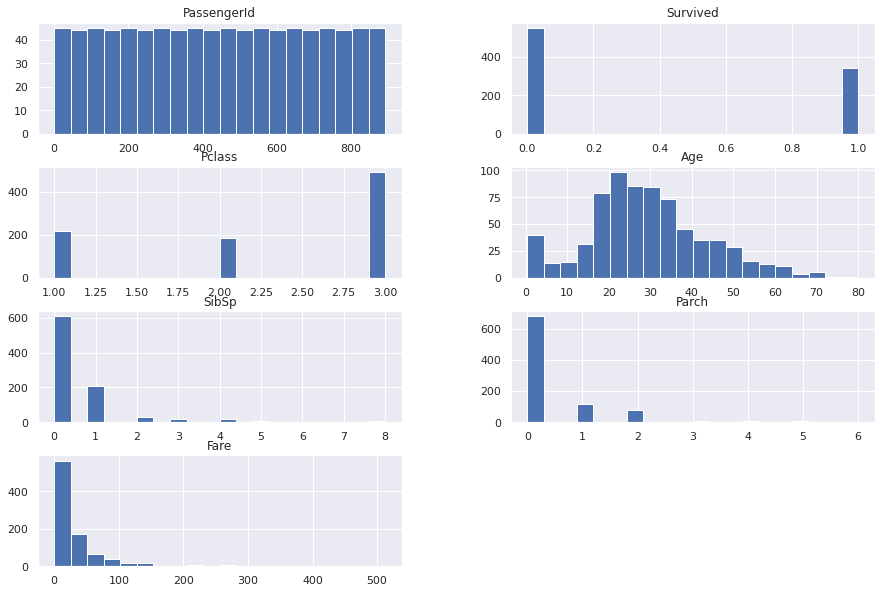

In [750]:
# Vẽ histogram cho những biến liên tục xem dữ liệu phân bố như thế nào
df.hist(bins=20, figsize=(15, 10), layout=(-1, 2))
plt.plot()

Một số quan sát có thể thấy được là:

- Age theo dạng Normal Distribution, Fare theo dạng Skewed Distribution
- Trong Age: Phần lớn hành khách có độ tuổi từ 18 -> 35
- Trong Fare: Với giá vé tăng, số khách hàng giảm
- Trong SibSp: Phần lớn hành khách không có anh chị em và vợ chồng đi cùng
- Trong Parch: Phần lớn hành khách không có bố mẹ và con cái đi cùng
- Trong Pclass: Nhiều hành khách thuộc hạng vé cao
- Trong Survived: Số lượng người sống sót và thiệt mạng có sự chênh lệch. Tuy chênh lệch không quá nhiều, có khả năng phải sử dụng một số biện pháp để ngăn ngừa các vấn đề về mất cân bằng dữ liệu


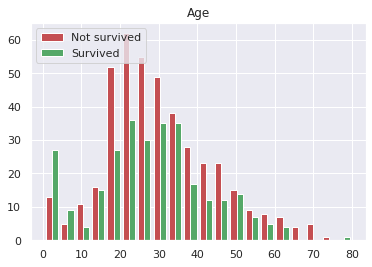

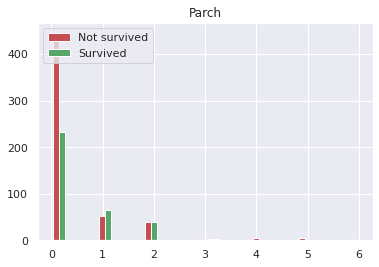

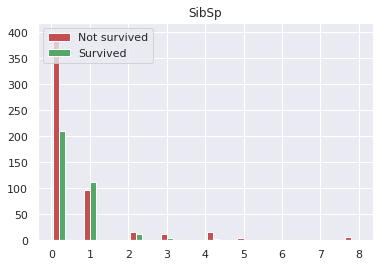

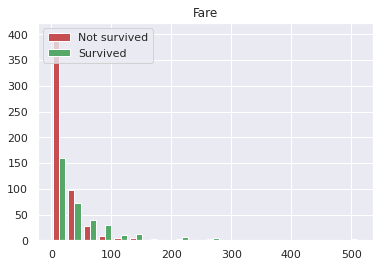

In [751]:
# Vẽ histogram cho từng biến Age, Parch, SibSp, Fare theo biến Survived
not_survived = df.loc[df["Survived"]==0.0]
survived = df.loc[df["Survived"]==1.0]
for column in ["Age", "Parch", "SibSp", "Fare"]:
    not_survived_data = not_survived[column]
    survived_data = survived[column]
    plt.hist([not_survived_data, survived_data], bins=20, color=["r", "g"], label=["Not survived", "Survived"])
    plt.legend(loc="upper left")
    plt.title(column)
    plt.show()

- Trẻ con dưới 10 tuổi và người khoảng 50 -55 tuổi có khả năng sống sót cao.
- Những người có phụ huynh hoặc trẻ có từ 1 dến 3 người có khả năng sống sót cao
- Những người có số anh em hoặc vợ chồng 1 và 2 có khả năng sống sót cao


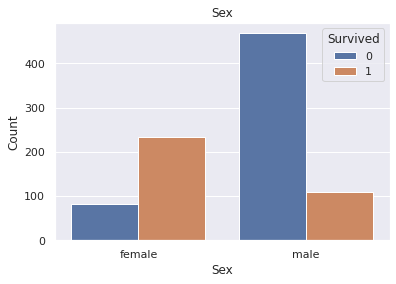

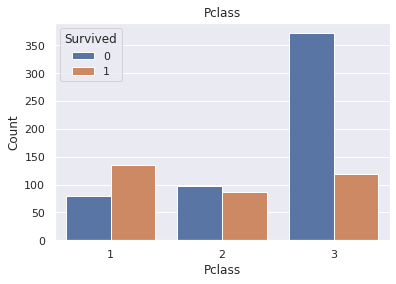

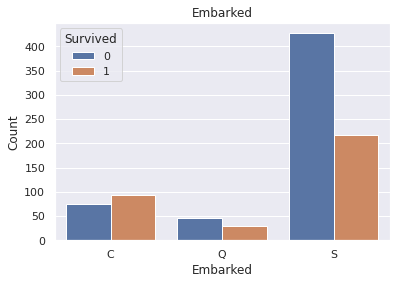

In [752]:
# Vẽ barchart cho biến Sex, Pclass, Embarked theo Survived
for feature in ["Sex", "Pclass", "Embarked"]:
    feature_data = df.groupby(["Survived", feature])["PassengerId"].count().reset_index(name="Count")
    sns.barplot(x=feature, y="Count", hue="Survived", data=feature_data)
    plt.title(feature)
    plt.show()

- Phụ nữ có tỷ lệ năng sống sót cao hơn đàn ông
- Khách hạng vé cao (Pclass thấp dần) có khả năng sống sót cao.
- Người xuất phát từ bến Cherbourg có khả năng sống sót cao.



### ***Correlation*** 

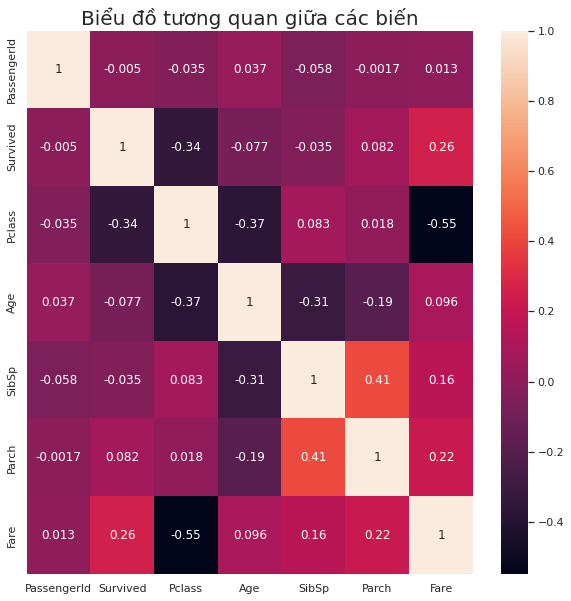

In [753]:
corr = df.corr()
fig = plt.figure(figsize = ([10,10]))
sns.heatmap(corr, annot= True)
plt.title('Biểu đồ tương quan giữa các biến',size = 20)
plt.show()

1. Theo cặp features
- PClass và Fare có tỉ lệ nghịch khá cao. Vì hạng vé càng cao (PClass càng thấp) thì trả tiền vé càng cao.
- SibSp (số anh em + vợ chồng) và Parch (số phụ huynh và con cái) có tỉ lệ thuận khá cao.
2. Giữa label (Survived) và các feature
- Hạng vé của hành khách (PClass) và khả năng sống sót có tỷ lệ nghịch. Vì PClass thấp thì hạng vé cao, những người hạng vé cao có khả năng lên thuyền cứu hộ hơn
- Giá vé và khả năng sống sót có tỷ lệ thuận.


## **Data Preprocessing**

### **Missing Values**

In [754]:
print('Số dữ liệu bị thiếu:\n')
df.isnull().sum()

Số dữ liệu bị thiếu:



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [755]:
print('Phần trăm dữ liệu bị thiếu:\n')
df.isnull().sum() / len(df) * 100

Phần trăm dữ liệu bị thiếu:



PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Vì biến 'Cabin' có missing values chiếm 77.1%, vì vậy không thể sử dụng impute để điền dữ liệu bị thiếu
=> Drop biến 'Cabin'

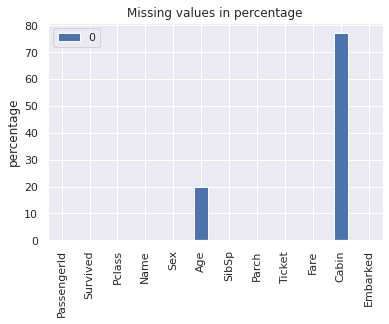

In [756]:
sns.set()
miss_vals = pd.DataFrame(df.isnull().sum() / len(df) * 100)
miss_vals.plot(kind='bar',title='Missing values in percentage',ylabel='percentage')

#### ***Remove Features***

In [757]:
# Drop biến Cabin vì thiếu nhiều dữ liệu
df.drop(["Cabin"], axis=1, inplace=True)

# Loại bỏ biến không cần thiết
df.drop(['Name','Ticket'], axis=1, inplace=True)

#### ***Imputation***

Sử dụng SimpleImputer() của sklearn

Giá trị NaN trong biến Age (numeric) sẽ thay bằng mean.

Giá trị NaN trong biến Embarked (categorical) sẽ thay bằng giá trị most_frequent 

In [758]:
def get_parameters(df):
    parameters = {}
    for col in df.columns[df.isnull().any()]:
 
        if df[col].dtype == 'float64' or df[col].dtype == 'int64' or df[col].dtype =='int32':
            strategy = 'mean'
        else:
            strategy = 'most_frequent'
        missing_values = df[col][df[col].isnull()].values[0]
        parameters[col] = {'missing_values':missing_values, 'strategy':strategy}
    return parameters
get_parameters(df)

{'Age': {'missing_values': nan, 'strategy': 'mean'},
 'Embarked': {'missing_values': nan, 'strategy': 'most_frequent'}}

In [759]:
parameters = get_parameters(df)
 
for col, param in parameters.items():
    missing_values = param['missing_values']
    strategy = param['strategy']
    imp = SimpleImputer(missing_values=missing_values,strategy=strategy)
    df[col] = imp.fit_transform(df[[col]])
 
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### **Feature Engineering**

Gộp biến Parch và SibSp lại thành biến Family vì tính chất 2 biến giống nhau 

In [760]:
df['Family'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,1
2,3,1,3,female,26.0,0,0,7.9250,S,0
3,4,1,1,female,35.0,1,0,53.1000,S,1
4,5,0,3,male,35.0,0,0,8.0500,S,0


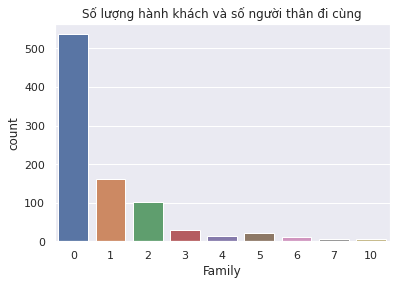

In [761]:
sns.countplot(x='Family', data=df)
plt.title('Số lượng hành khách và số người thân đi cùng')
plt.show()

### **Discretization**

Rời rạc hóa biến Age

In [762]:
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
for i in ['Age']:
    df[i] =  kbins.fit_transform(df[i].values.reshape(-1,1))

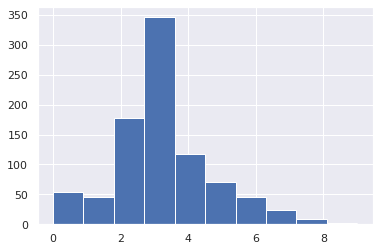

In [763]:
plt.hist(df['Age'], bins=10)
plt.show()

### **Scale numeric features**

#### ***LabelBinarizer***

Biến đổi biến Family thành biến nhị phân:

Với 1 (không đi cùng người thân) và 0 (đi cùng người thân)

In [764]:
lb = LabelBinarizer()
df['Family'] = lb.fit_transform(df['Family'])
df = df.rename(columns = {'Family': 'TravelAlone'}, inplace = False)

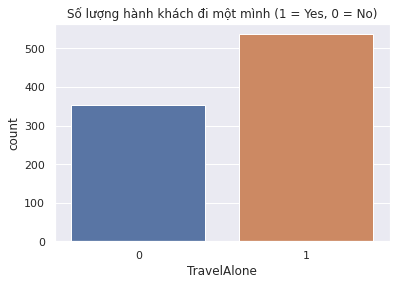

In [765]:
sns.countplot(x='TravelAlone', data=df)
plt.title('Số lượng hành khách đi một mình (1 = Yes, 0 = No)')
plt.show()

#### ***MinMaxScaler***

In [766]:
minmax = MinMaxScaler()
df['Fare'] =  minmax.fit_transform(df['Fare'].values.reshape(-1,1))

#### ***StandardScaler***

In [767]:
standard = StandardScaler()
df['Age'] = standard.fit_transform(df['Age'].values.reshape(-1,1))

In [768]:
df.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,TravelAlone
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,0.00,0.52,0.38,0.06,0.60
std,257.35,0.49,0.84,1.00,1.10,0.81,0.10,0.49
min,1.00,0.00,1.00,-1.94,0.00,0.00,0.00,0.00
25%,223.50,0.00,2.00,-0.70,0.00,0.00,0.02,0.00
50%,446.00,0.00,3.00,-0.08,0.00,0.00,0.03,1.00
75%,668.50,1.00,3.00,0.54,1.00,0.00,0.06,1.00
max,891.00,1.00,3.00,3.64,8.00,6.00,1.00,1.00


- Sau khi áp dụng StandardScaler, biến 'Age' có mean = 0 và std = 1
- Sau khi áp dụng MinMaxScaler, biến 'Fare' nằm trong khoảng [0, 1] với min = 0 và max = 1

### **Encoding categorical features**

#### ***LabelEncoder***

In [769]:
label = LabelEncoder()
label.fit(df["Embarked"])
df["Embarked"] = label.transform(df["Embarked"])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TravelAlone
0,1,0,3,male,-0.700285,1,0,0.014151,2,0
1,2,1,1,female,0.540180,1,0,0.139136,0,0
2,3,1,3,female,-0.080053,0,0,0.015469,2,1
3,4,1,1,female,0.540180,1,0,0.103644,2,0
4,5,0,3,male,0.540180,0,0,0.015713,2,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,-0.080053,0,0,0.025374,2,1
887,888,1,1,female,-0.700285,0,0,0.058556,2,1
888,889,0,3,female,-0.080053,1,2,0.045771,2,0
889,890,1,1,male,-0.080053,0,0,0.058556,0,1


#### ***OneHotEncoder***

In [770]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_cols

Index(['Sex'], dtype='object')

In [771]:
for col in cat_cols:
     
    append_to = list(df[col].unique())
    df[append_to] = OneHotEncoder().fit_transform(df[[col]]).toarray()
    df.drop(col, axis=1, inplace=True)
    df.drop(append_to[0], axis=1, inplace=True)
  
df.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,TravelAlone,female
0,1,0,3,-0.700285,1,0,0.014151,2,0,1.0
1,2,1,1,0.540180,1,0,0.139136,0,0,0.0
2,3,1,3,-0.080053,0,0,0.015469,2,1,0.0
3,4,1,1,0.540180,1,0,0.103644,2,0,0.0
4,5,0,3,0.540180,0,0,0.015713,2,1,1.0
